In [1]:
pwd

'/home/dcor/niskhizov/Rar'

In [2]:
cd object-detection-nn

/home/dcor/niskhizov/Rar/object-detection-nn


In [3]:
remote_mode = True

import sys
import os

from nn.YOLO_VGG16 import training_loop
from nn.YOLO_VGG16.utils.constants import ANCHORS
from nn.YOLO_VGG16.prepare_data.coco_dataset import CocoDataset
from nn.YOLO_VGG16.prepare_data.transforms import train_transform, test_transform
from nn.YOLO_VGG16.utils.helpers import convert_cells_to_bboxes, load_checkpoint, nms, plot_image, save_checkpoint
from nn.YOLO_VGG16.utils.constants import device, s, leanring_rate, save_model, checkpoint_file
from nn.YOLO_VGG16.model.YOLO_VGG16_full import YOLO_VGG16_F
import torch
import torch.optim as optim
from nn.YOLO_VGG16.model.loss import YOLOLoss
from pycocotools.coco import COCO
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import torchvision.transforms as T

if remote_mode:
    model_path_base = f"/home/dcor/niskhizov/Rar/object-detection-nn/nn/YOLO_VGG16/degug_notebooks/vgg_f_model"
    coco_path = lambda type: f'/home/dcor/niskhizov/Rar/object-detection-nn/nn/YOLO_VGG16/degug_notebooks/temp/instances_{type}2017.json'
else:
    model_path_base = f"nn/YOLO_VGG16/degug_notebooks/"
    coco_path = lambda type: f'nn/cocodataset/annotations/instances_{type}2017.json'


/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [4]:
coco = COCO(coco_path('train'))
categories = ["dog"]


loading annotations into memory...
Done (t=19.78s)
creating index...
index created!


In [5]:
# Creating the model from YOLOv3 class 
load_model = False
model = YOLO_VGG16_F(num_classes=len(categories)).to(device) 

# Defining the optimizer 
optimizer = optim.Adam(model.parameters(), lr = leanring_rate) 

# Defining the loss function 
loss_fn = YOLOLoss() 

# Defining the scaler for mixed precision training 
scaler = torch.amp.GradScaler(device=device) 
# Loading the checkpoint 
if load_model: 
    load_checkpoint(model_path_base + f"e11_vgg16_{checkpoint_file}", model, optimizer, leanring_rate, device) 

# Initialize TensorBoard writer
writer = SummaryWriter(log_dir='runs/YOLO_VGG16_F')



In [6]:
dataset = CocoDataset( 
	coco_obj=coco, 
	categories=categories,
	grid_sizes=[13, 26, 52], 
	anchors=ANCHORS, 
	transform=train_transform 
) 

# Defining the train data loader 
train_loader = torch.utils.data.DataLoader( 
	dataset=dataset, 
	batch_size=8, 
	shuffle=True, 
) 


In [7]:
# Load the validation dataset
val_coco = COCO(coco_path('val'))
val_categories = ["dog"]

val_dataset = CocoDataset(
    coco_obj=val_coco,
    categories=val_categories,
    grid_sizes=[13, 26, 52],
    anchors=ANCHORS,
    transform=test_transform  # Use the same transform for validation
)

# Create the validation data loader
val_loader = torch.utils.data.DataLoader(
    dataset=val_dataset,
    batch_size=1,
    shuffle=False,
)

val_loader_iter = iter(val_loader)

loading annotations into memory...
Done (t=2.42s)
creating index...
index created!


In [8]:
# Scaling the anchors 
scaled_anchors = ( 
	torch.tensor(ANCHORS) *
	torch.tensor(s).unsqueeze(1).unsqueeze(1).repeat(1,3,2) 
).to(device) 

Epoch: 0


  0%|                                                                                                                                          | 0/549 [00:00<?, ?it/s]

batch_idx: 0


  0%|                                                                                                                               | 0/549 [00:08<?, ?it/s, loss=11.6]

==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:20<1:29:08,  9.78s/it, loss=11.5]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:28<1:19:17,  8.71s/it, loss=11.3]

batch_idx: 2
batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:42<1:10:12,  7.74s/it, loss=11.2]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [00:49<1:06:51,  7.39s/it, loss=11.2]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [00:56<1:06:09,  7.32s/it, loss=11.1]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:03<1:06:14,  7.35s/it, loss=11.2]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:11<1:06:02,  7.34s/it, loss=11.1]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:17<1:04:38,  7.20s/it, loss=11.2]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:24<1:03:02,  7.03s/it, loss=11.2]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:31<1:03:15,  7.07s/it, loss=11.1]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:39<1:04:09,  7.18s/it, loss=11.1]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:46<1:05:05,  7.30s/it, loss=11.1]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [01:53<1:02:29,  7.02s/it, loss=11.1]

batch_idx: 14


  3%|███▍                                                                                                                  | 16/549 [02:00<1:03:23,  7.14s/it, loss=11]

batch_idx: 15


  3%|███▋                                                                                                                  | 17/549 [02:08<1:04:19,  7.25s/it, loss=11]

batch_idx: 16


  3%|███▊                                                                                                                  | 18/549 [02:15<1:03:35,  7.19s/it, loss=11]

batch_idx: 17


  3%|████                                                                                                                  | 19/549 [02:22<1:03:47,  7.22s/it, loss=11]

batch_idx: 18


  4%|████▎                                                                                                                 | 20/549 [02:29<1:03:18,  7.18s/it, loss=11]

batch_idx: 19


  4%|████▌                                                                                                                 | 21/549 [02:36<1:03:31,  7.22s/it, loss=11]

batch_idx: 20


  4%|████▋                                                                                                                 | 22/549 [02:43<1:02:33,  7.12s/it, loss=11]

batch_idx: 21


  4%|████▉                                                                                                                 | 23/549 [02:51<1:02:54,  7.18s/it, loss=11]

batch_idx: 22


  4%|█████▏                                                                                                                | 24/549 [02:58<1:02:42,  7.17s/it, loss=11]

batch_idx: 23


  5%|█████▎                                                                                                                | 25/549 [03:05<1:01:59,  7.10s/it, loss=11]

batch_idx: 24


  5%|█████▌                                                                                                                | 26/549 [03:12<1:01:30,  7.06s/it, loss=11]

batch_idx: 25
batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:25<1:00:35,  6.98s/it, loss=10.9]

batch_idx: 27


  5%|██████▏                                                                                                               | 29/549 [03:32<59:49,  6.90s/it, loss=10.9]

batch_idx: 28


  5%|██████▍                                                                                                               | 30/549 [03:39<59:49,  6.92s/it, loss=10.9]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [03:47<1:01:27,  7.12s/it, loss=10.9]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [03:54<1:02:48,  7.29s/it, loss=10.8]

batch_idx: 31
batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:10<1:04:26,  7.51s/it, loss=10.8]

batch_idx: 33


  6%|███████▍                                                                                                            | 35/549 [04:17<1:04:14,  7.50s/it, loss=10.8]

batch_idx: 34


  7%|███████▌                                                                                                            | 36/549 [04:24<1:03:25,  7.42s/it, loss=10.8]

batch_idx: 35


  7%|███████▊                                                                                                            | 37/549 [04:32<1:02:59,  7.38s/it, loss=10.8]

batch_idx: 36


  7%|████████                                                                                                            | 38/549 [04:39<1:02:05,  7.29s/it, loss=10.8]

batch_idx: 37
batch_idx: 38


  7%|████████▍                                                                                                           | 40/549 [04:53<1:01:21,  7.23s/it, loss=10.8]

batch_idx: 39


  7%|████████▋                                                                                                           | 41/549 [05:00<1:01:23,  7.25s/it, loss=10.8]

batch_idx: 40


  8%|████████▊                                                                                                           | 42/549 [05:08<1:01:04,  7.23s/it, loss=10.8]

batch_idx: 41


  8%|█████████▏                                                                                                            | 43/549 [05:14<59:58,  7.11s/it, loss=10.7]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:22<1:00:49,  7.23s/it, loss=10.7]

batch_idx: 43


  8%|█████████▌                                                                                                          | 45/549 [05:29<1:00:14,  7.17s/it, loss=10.7]

batch_idx: 44


  8%|█████████▉                                                                                                            | 46/549 [05:36<59:33,  7.10s/it, loss=10.7]

batch_idx: 45


  9%|█████████▉                                                                                                          | 47/549 [05:43<1:00:03,  7.18s/it, loss=10.7]

batch_idx: 46


  9%|██████████▏                                                                                                         | 48/549 [05:52<1:03:17,  7.58s/it, loss=10.6]

batch_idx: 47


  9%|██████████▎                                                                                                         | 49/549 [05:59<1:01:44,  7.41s/it, loss=10.7]

batch_idx: 48


  9%|██████████▌                                                                                                         | 50/549 [06:06<1:00:11,  7.24s/it, loss=10.6]

batch_idx: 49


  9%|██████████▊                                                                                                         | 51/549 [06:13<1:00:35,  7.30s/it, loss=10.6]

batch_idx: 50


  9%|██████████▉                                                                                                         | 52/549 [06:21<1:00:44,  7.33s/it, loss=10.6]

batch_idx: 51


 10%|███████████▍                                                                                                          | 53/549 [06:28<59:54,  7.25s/it, loss=10.6]

batch_idx: 52


 10%|███████████▍                                                                                                        | 54/549 [06:36<1:02:21,  7.56s/it, loss=10.6]

batch_idx: 53


 10%|███████████▌                                                                                                        | 55/549 [06:43<1:01:38,  7.49s/it, loss=10.6]

batch_idx: 54


 10%|███████████▊                                                                                                        | 56/549 [06:50<1:00:57,  7.42s/it, loss=10.5]

batch_idx: 55


 10%|████████████                                                                                                        | 57/549 [06:58<1:00:23,  7.36s/it, loss=10.6]

batch_idx: 56


 11%|████████████▎                                                                                                       | 58/549 [07:05<1:00:00,  7.33s/it, loss=10.5]

batch_idx: 57


 11%|████████████▋                                                                                                         | 59/549 [07:12<59:08,  7.24s/it, loss=10.5]

batch_idx: 58


 11%|████████████▋                                                                                                       | 60/549 [07:20<1:01:02,  7.49s/it, loss=10.5]

batch_idx: 59


 11%|████████████▉                                                                                                       | 61/549 [07:34<1:16:32,  9.41s/it, loss=10.5]

batch_idx: 60


 11%|█████████████                                                                                                       | 62/549 [07:41<1:10:07,  8.64s/it, loss=10.5]

batch_idx: 61


 11%|█████████████▎                                                                                                      | 63/549 [07:49<1:07:59,  8.39s/it, loss=10.5]

batch_idx: 62


 12%|█████████████▌                                                                                                      | 64/549 [07:55<1:03:04,  7.80s/it, loss=10.5]

batch_idx: 63


 12%|█████████████▋                                                                                                      | 65/549 [08:02<1:00:33,  7.51s/it, loss=10.5]

batch_idx: 64


 12%|█████████████▉                                                                                                      | 66/549 [08:09<1:00:07,  7.47s/it, loss=10.5]

batch_idx: 65
batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:23<57:17,  7.15s/it, loss=10.4]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:30<55:41,  6.96s/it, loss=10.4]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:37<55:46,  6.99s/it, loss=10.4]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:44<56:19,  7.07s/it, loss=10.4]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [08:51<56:07,  7.06s/it, loss=10.4]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [08:58<57:02,  7.19s/it, loss=10.4]

batch_idx: 72


 13%|███████████████▉                                                                                                      | 74/549 [09:06<57:29,  7.26s/it, loss=10.4]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:13<56:19,  7.13s/it, loss=10.4]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:19<55:31,  7.04s/it, loss=10.3]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:27<55:58,  7.12s/it, loss=10.3]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:34<55:30,  7.07s/it, loss=10.3]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:41<55:40,  7.11s/it, loss=10.3]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [09:48<55:32,  7.11s/it, loss=10.3]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [09:56<56:28,  7.24s/it, loss=10.3]

batch_idx: 80


 15%|█████████████████▌                                                                                                    | 82/549 [10:03<56:25,  7.25s/it, loss=10.3]

batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:10<56:29,  7.27s/it, loss=10.3]

batch_idx: 82


 15%|██████████████████                                                                                                    | 84/549 [10:17<55:20,  7.14s/it, loss=10.3]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:24<55:11,  7.14s/it, loss=10.3]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:31<54:18,  7.04s/it, loss=10.2]

batch_idx: 85


 16%|██████████████████▋                                                                                                   | 87/549 [10:38<54:53,  7.13s/it, loss=10.2]

batch_idx: 86


 16%|██████████████████▉                                                                                                   | 88/549 [10:45<54:48,  7.13s/it, loss=10.2]

batch_idx: 87


 16%|███████████████████▏                                                                                                  | 89/549 [10:52<54:23,  7.09s/it, loss=10.2]

batch_idx: 88


 16%|███████████████████▎                                                                                                  | 90/549 [10:59<52:57,  6.92s/it, loss=10.2]

batch_idx: 89


 17%|███████████████████▌                                                                                                  | 91/549 [11:06<53:28,  7.00s/it, loss=10.2]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:13<53:47,  7.06s/it, loss=10.2]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:21<54:03,  7.11s/it, loss=10.2]

batch_idx: 92


 17%|████████████████████▏                                                                                                 | 94/549 [11:28<54:31,  7.19s/it, loss=10.2]

batch_idx: 93


 17%|████████████████████▍                                                                                                 | 95/549 [11:35<53:36,  7.08s/it, loss=10.1]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:42<53:27,  7.08s/it, loss=10.1]

batch_idx: 95


 18%|████████████████████▊                                                                                                 | 97/549 [11:49<53:54,  7.16s/it, loss=10.1]

batch_idx: 96


 18%|█████████████████████                                                                                                 | 98/549 [11:56<53:44,  7.15s/it, loss=10.1]

batch_idx: 97


 18%|█████████████████████▎                                                                                                | 99/549 [12:04<54:17,  7.24s/it, loss=10.1]

batch_idx: 98


 18%|█████████████████████▎                                                                                               | 100/549 [12:11<54:27,  7.28s/it, loss=10.1]

batch_idx: 99


 18%|█████████████████████▌                                                                                               | 101/549 [12:18<54:25,  7.29s/it, loss=10.1]

batch_idx: 100


 19%|█████████████████████▋                                                                                               | 102/549 [12:25<52:10,  7.00s/it, loss=10.1]

batch_idx: 101


 19%|█████████████████████▉                                                                                               | 103/549 [12:32<53:12,  7.16s/it, loss=10.1]

batch_idx: 102


 19%|██████████████████████▏                                                                                              | 104/549 [12:40<53:29,  7.21s/it, loss=10.1]

batch_idx: 103


 19%|██████████████████████▍                                                                                              | 105/549 [12:47<53:06,  7.18s/it, loss=10.1]

batch_idx: 104


 19%|██████████████████████▉                                                                                                | 106/549 [12:53<51:57,  7.04s/it, loss=10]

batch_idx: 105


 19%|███████████████████████▏                                                                                               | 107/549 [13:01<52:09,  7.08s/it, loss=10]

batch_idx: 106


 20%|███████████████████████▍                                                                                               | 108/549 [13:08<52:37,  7.16s/it, loss=10]

batch_idx: 107


 20%|███████████████████████▋                                                                                               | 109/549 [13:15<51:45,  7.06s/it, loss=10]

batch_idx: 108


 20%|███████████████████████▊                                                                                               | 110/549 [13:22<52:30,  7.18s/it, loss=10]

batch_idx: 109


 20%|███████████████████████▋                                                                                             | 111/549 [13:28<50:12,  6.88s/it, loss=9.99]

batch_idx: 110


 20%|███████████████████████▊                                                                                             | 112/549 [13:36<50:32,  6.94s/it, loss=9.99]

batch_idx: 111


 21%|████████████████████████                                                                                             | 113/549 [13:43<51:37,  7.10s/it, loss=9.98]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [13:50<51:58,  7.17s/it, loss=9.97]

batch_idx: 113


 21%|████████████████████████▌                                                                                            | 115/549 [13:58<52:16,  7.23s/it, loss=9.96]

batch_idx: 114


 21%|████████████████████████▋                                                                                            | 116/549 [14:05<51:58,  7.20s/it, loss=9.95]

batch_idx: 115


 21%|████████████████████████▉                                                                                            | 117/549 [14:12<51:09,  7.11s/it, loss=9.94]

batch_idx: 116


 21%|█████████████████████████▏                                                                                           | 118/549 [14:19<52:25,  7.30s/it, loss=9.93]

batch_idx: 117


 22%|█████████████████████████▎                                                                                           | 119/549 [14:27<52:10,  7.28s/it, loss=9.93]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:33<50:51,  7.11s/it, loss=9.92]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [14:41<51:34,  7.23s/it, loss=9.91]

batch_idx: 120


 22%|██████████████████████████▏                                                                                           | 122/549 [14:48<50:49,  7.14s/it, loss=9.9]

batch_idx: 121


 22%|██████████████████████████▍                                                                                           | 123/549 [14:55<50:07,  7.06s/it, loss=9.9]

batch_idx: 122


 23%|██████████████████████████▍                                                                                          | 124/549 [15:02<50:12,  7.09s/it, loss=9.89]

batch_idx: 123


 23%|██████████████████████████▋                                                                                          | 125/549 [15:09<50:40,  7.17s/it, loss=9.88]

batch_idx: 124


 23%|██████████████████████████▊                                                                                          | 126/549 [15:16<49:43,  7.05s/it, loss=9.88]

batch_idx: 125


 23%|███████████████████████████                                                                                          | 127/549 [15:23<49:55,  7.10s/it, loss=9.87]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:30<49:45,  7.09s/it, loss=9.86]

batch_idx: 127


 23%|███████████████████████████▍                                                                                         | 129/549 [15:37<49:36,  7.09s/it, loss=9.85]

batch_idx: 128


 24%|███████████████████████████▋                                                                                         | 130/549 [15:44<49:26,  7.08s/it, loss=9.84]

batch_idx: 129


 24%|███████████████████████████▉                                                                                         | 131/549 [15:51<48:58,  7.03s/it, loss=9.83]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [15:59<49:36,  7.14s/it, loss=9.82]

batch_idx: 131


 24%|████████████████████████████▎                                                                                        | 133/549 [16:06<49:46,  7.18s/it, loss=9.81]

batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:13<49:20,  7.13s/it, loss=9.81]

batch_idx: 133


 25%|█████████████████████████████                                                                                         | 135/549 [16:20<48:23,  7.01s/it, loss=9.8]

batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:27<48:22,  7.03s/it, loss=9.79]

batch_idx: 135


 25%|█████████████████████████████▏                                                                                       | 137/549 [16:33<47:23,  6.90s/it, loss=9.78]

batch_idx: 136


 25%|█████████████████████████████▍                                                                                       | 138/549 [16:40<47:17,  6.90s/it, loss=9.77]

batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [16:47<47:25,  6.94s/it, loss=9.77]

batch_idx: 138


 26%|█████████████████████████████▊                                                                                       | 140/549 [16:54<47:37,  6.99s/it, loss=9.76]

batch_idx: 139


 26%|██████████████████████████████                                                                                       | 141/549 [17:02<48:21,  7.11s/it, loss=9.75]

batch_idx: 140
batch_idx: 141


 26%|██████████████████████████████▍                                                                                      | 143/549 [17:16<48:17,  7.14s/it, loss=9.73]

batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:23<47:47,  7.08s/it, loss=9.72]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:30<48:04,  7.14s/it, loss=9.71]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [17:38<48:46,  7.26s/it, loss=9.71]

batch_idx: 145


 27%|███████████████████████████████▌                                                                                      | 147/549 [17:46<49:28,  7.38s/it, loss=9.7]

batch_idx: 146


 27%|███████████████████████████████▌                                                                                     | 148/549 [17:53<49:38,  7.43s/it, loss=9.69]

batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [18:00<49:05,  7.36s/it, loss=9.68]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:08<49:09,  7.39s/it, loss=9.68]

batch_idx: 149


 28%|████████████████████████████████▏                                                                                    | 151/549 [18:15<48:27,  7.31s/it, loss=9.67]

batch_idx: 150


 28%|████████████████████████████████▍                                                                                    | 152/549 [18:22<47:34,  7.19s/it, loss=9.66]

batch_idx: 151


 28%|████████████████████████████████▌                                                                                    | 153/549 [18:28<45:53,  6.95s/it, loss=9.66]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [18:35<45:43,  6.94s/it, loss=9.65]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [18:42<44:49,  6.83s/it, loss=9.64]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [18:49<45:40,  6.97s/it, loss=9.63]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [18:56<44:46,  6.85s/it, loss=9.63]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:02<44:32,  6.84s/it, loss=9.62]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:10<45:52,  7.06s/it, loss=9.61]

batch_idx: 158


 29%|██████████████████████████████████▍                                                                                   | 160/549 [19:17<45:03,  6.95s/it, loss=9.6]

batch_idx: 159
batch_idx: 160


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:23<44:13,  6.84s/it, loss=9.59]

batch_idx: 161


 30%|██████████████████████████████████▌                                                                                  | 162/549 [19:31<45:01,  6.98s/it, loss=9.59]

batch_idx: 162


 30%|██████████████████████████████████▉                                                                                  | 164/549 [19:46<46:49,  7.30s/it, loss=9.57]

batch_idx: 163


 30%|███████████████████████████████████▏                                                                                 | 165/549 [19:53<46:00,  7.19s/it, loss=9.56]

batch_idx: 164


 30%|███████████████████████████████████▍                                                                                 | 166/549 [20:00<45:51,  7.18s/it, loss=9.55]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:07<46:15,  7.27s/it, loss=9.55]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:15<45:55,  7.23s/it, loss=9.54]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:22<45:30,  7.18s/it, loss=9.53]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [20:29<45:00,  7.13s/it, loss=9.52]

batch_idx: 169


 31%|████████████████████████████████████▍                                                                                | 171/549 [20:36<45:34,  7.23s/it, loss=9.51]

batch_idx: 170


 31%|████████████████████████████████████▋                                                                                | 172/549 [20:44<45:54,  7.31s/it, loss=9.51]

batch_idx: 171


 32%|████████████████████████████████████▊                                                                                | 173/549 [20:50<44:43,  7.14s/it, loss=9.51]

batch_idx: 172


 32%|█████████████████████████████████████▍                                                                                | 174/549 [20:57<44:07,  7.06s/it, loss=9.5]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:04<43:55,  7.05s/it, loss=9.49]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:11<43:49,  7.05s/it, loss=9.48]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [21:18<43:30,  7.02s/it, loss=9.47]

batch_idx: 176


 32%|█████████████████████████████████████▉                                                                               | 178/549 [21:25<43:45,  7.08s/it, loss=9.46]

batch_idx: 177


 33%|██████████████████████████████████████▏                                                                              | 179/549 [21:32<43:36,  7.07s/it, loss=9.45]

batch_idx: 178


 33%|██████████████████████████████████████▎                                                                              | 180/549 [21:40<44:10,  7.18s/it, loss=9.44]

batch_idx: 179


 33%|██████████████████████████████████████▌                                                                              | 181/549 [21:47<44:12,  7.21s/it, loss=9.43]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [21:54<43:39,  7.14s/it, loss=9.42]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [22:01<42:57,  7.04s/it, loss=9.42]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:08<42:25,  6.97s/it, loss=9.41]

batch_idx: 183


 34%|███████████████████████████████████████▊                                                                              | 185/549 [22:15<42:23,  6.99s/it, loss=9.4]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:22<43:28,  7.18s/it, loss=9.39]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [22:29<42:54,  7.11s/it, loss=9.38]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [22:37<43:07,  7.17s/it, loss=9.37]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [22:44<43:34,  7.26s/it, loss=9.36]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [22:52<43:49,  7.32s/it, loss=9.35]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [22:59<43:13,  7.24s/it, loss=9.35]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:06<43:15,  7.27s/it, loss=9.34]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:13<41:59,  7.08s/it, loss=9.33]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:20<42:15,  7.14s/it, loss=9.32]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [23:27<42:10,  7.15s/it, loss=9.32]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [23:34<41:47,  7.10s/it, loss=9.31]

batch_idx: 195


 36%|██████████████████████████████████████████▎                                                                           | 197/549 [23:42<42:22,  7.22s/it, loss=9.3]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [23:49<41:59,  7.18s/it, loss=9.29]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [23:56<41:18,  7.08s/it, loss=9.29]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:03<41:02,  7.06s/it, loss=9.28]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:09<41:02,  7.06s/it, loss=9.27]

batch_idx: 200
==> Saving checkpoint


 37%|███████████████████████████████████████████                                                                          | 202/549 [24:29<55:39,  9.62s/it, loss=9.26]

batch_idx: 201


 37%|███████████████████████████████████████████▎                                                                         | 203/549 [24:36<51:41,  8.97s/it, loss=9.25]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [24:44<49:00,  8.52s/it, loss=9.25]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [24:51<46:40,  8.14s/it, loss=9.24]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [24:58<44:59,  7.87s/it, loss=9.23]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:05<42:49,  7.51s/it, loss=9.22]

batch_idx: 206


 38%|████████████████████████████████████████████▎                                                                        | 208/549 [25:12<42:31,  7.48s/it, loss=9.22]

batch_idx: 207
batch_idx: 208


 38%|█████████████████████████████████████████████▏                                                                        | 210/549 [25:28<42:27,  7.51s/it, loss=9.2]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [25:35<41:45,  7.41s/it, loss=9.19]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [25:42<40:52,  7.28s/it, loss=9.19]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [25:49<40:30,  7.23s/it, loss=9.18]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [25:56<40:18,  7.22s/it, loss=9.17]

batch_idx: 213


 39%|█████████████████████████████████████████████▊                                                                       | 215/549 [26:03<40:34,  7.29s/it, loss=9.16]

batch_idx: 214


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:11<40:20,  7.27s/it, loss=9.15]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [26:18<40:32,  7.33s/it, loss=9.15]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [26:25<40:26,  7.33s/it, loss=9.14]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [26:33<40:41,  7.40s/it, loss=9.13]

batch_idx: 218


 40%|██████████████████████████████████████████████▉                                                                      | 220/549 [26:40<39:59,  7.29s/it, loss=9.13]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [26:47<39:52,  7.29s/it, loss=9.12]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [26:56<41:06,  7.54s/it, loss=9.11]

batch_idx: 221


 41%|███████████████████████████████████████████████▉                                                                      | 223/549 [27:02<40:05,  7.38s/it, loss=9.1]

batch_idx: 222


 41%|████████████████████████████████████████████████▏                                                                     | 224/549 [27:09<39:15,  7.25s/it, loss=9.1]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:17<39:06,  7.24s/it, loss=9.09]

batch_idx: 224


 41%|████████████████████████████████████████████████▏                                                                    | 226/549 [27:23<37:59,  7.06s/it, loss=9.08]

batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [27:31<38:32,  7.18s/it, loss=9.08]

batch_idx: 226


 42%|████████████████████████████████████████████████▌                                                                    | 228/549 [27:38<38:08,  7.13s/it, loss=9.07]

batch_idx: 227


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [27:45<38:04,  7.14s/it, loss=9.06]

batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [27:52<38:22,  7.22s/it, loss=9.05]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [27:59<37:50,  7.14s/it, loss=9.05]

batch_idx: 230


 42%|█████████████████████████████████████████████████▍                                                                   | 232/549 [28:06<37:48,  7.15s/it, loss=9.04]

batch_idx: 231


 42%|█████████████████████████████████████████████████▋                                                                   | 233/549 [28:14<37:36,  7.14s/it, loss=9.03]

batch_idx: 232


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [28:21<37:53,  7.22s/it, loss=9.02]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [28:28<37:35,  7.18s/it, loss=9.02]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [28:35<37:11,  7.13s/it, loss=9.01]

batch_idx: 235


 43%|███████████████████████████████████████████████████▊                                                                    | 237/549 [28:42<37:23,  7.19s/it, loss=9]

batch_idx: 236


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [28:50<37:43,  7.28s/it, loss=8.99]

batch_idx: 237


 44%|██████████████████████████████████████████████████▉                                                                  | 239/549 [28:56<36:30,  7.07s/it, loss=8.98]

batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [29:04<36:48,  7.15s/it, loss=8.98]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:11<37:02,  7.22s/it, loss=8.97]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:18<36:48,  7.19s/it, loss=8.96]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [29:26<37:02,  7.26s/it, loss=8.95]

batch_idx: 242


 44%|████████████████████████████████████████████████████                                                                 | 244/549 [29:33<37:20,  7.35s/it, loss=8.95]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [29:41<37:58,  7.49s/it, loss=8.94]

batch_idx: 244


 45%|████████████████████████████████████████████████████▍                                                                | 246/549 [29:48<37:02,  7.34s/it, loss=8.93]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [29:55<36:38,  7.28s/it, loss=8.92]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [30:02<36:21,  7.25s/it, loss=8.92]

batch_idx: 247


 45%|█████████████████████████████████████████████████████                                                                | 249/549 [30:10<36:36,  7.32s/it, loss=8.91]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▋                                                                | 250/549 [30:16<35:18,  7.08s/it, loss=8.9]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▍                                                               | 251/549 [30:24<35:46,  7.20s/it, loss=8.89]

batch_idx: 250


 46%|█████████████████████████████████████████████████████▋                                                               | 252/549 [30:31<35:12,  7.11s/it, loss=8.88]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▉                                                               | 253/549 [30:38<35:52,  7.27s/it, loss=8.88]

batch_idx: 252
batch_idx: 253


 46%|██████████████████████████████████████████████████████▎                                                              | 255/549 [30:53<35:33,  7.26s/it, loss=8.86]

batch_idx: 254
batch_idx: 255


 47%|██████████████████████████████████████████████████████▌                                                              | 256/549 [31:00<35:25,  7.25s/it, loss=8.86]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [31:15<34:44,  7.16s/it, loss=8.84]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▏                                                             | 259/549 [31:22<35:07,  7.27s/it, loss=8.83]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [31:29<34:43,  7.21s/it, loss=8.83]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [31:36<33:51,  7.06s/it, loss=8.82]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [31:44<34:43,  7.26s/it, loss=8.81]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [31:51<34:15,  7.19s/it, loss=8.81]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▋                                                             | 264/549 [31:58<33:46,  7.11s/it, loss=8.8]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▍                                                            | 265/549 [32:05<33:57,  7.17s/it, loss=8.79]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [32:12<33:55,  7.19s/it, loss=8.79]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [32:19<33:31,  7.13s/it, loss=8.78]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [32:26<32:26,  6.93s/it, loss=8.78]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [32:33<33:07,  7.10s/it, loss=8.77]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████▌                                                           | 270/549 [32:41<33:37,  7.23s/it, loss=8.76]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▊                                                           | 271/549 [32:48<34:01,  7.34s/it, loss=8.76]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▉                                                           | 272/549 [32:55<33:42,  7.30s/it, loss=8.75]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▏                                                          | 273/549 [33:02<32:23,  7.04s/it, loss=8.74]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▍                                                          | 274/549 [33:09<32:38,  7.12s/it, loss=8.74]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [33:16<32:05,  7.03s/it, loss=8.73]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▊                                                          | 276/549 [33:23<31:52,  7.01s/it, loss=8.73]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████                                                          | 277/549 [33:30<32:28,  7.16s/it, loss=8.72]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [33:38<32:21,  7.16s/it, loss=8.71]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [33:45<32:07,  7.14s/it, loss=8.71]

batch_idx: 278


 51%|████████████████████████████████████████████████████████████▏                                                         | 280/549 [33:52<32:02,  7.15s/it, loss=8.7]

batch_idx: 279


 51%|████████████████████████████████████████████████████████████▍                                                         | 281/549 [33:59<32:02,  7.18s/it, loss=8.7]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [34:06<31:53,  7.17s/it, loss=8.69]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:13<31:38,  7.14s/it, loss=8.68]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:21<31:39,  7.17s/it, loss=8.68]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [34:28<31:13,  7.10s/it, loss=8.67]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [34:35<31:48,  7.26s/it, loss=8.66]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [34:42<30:53,  7.07s/it, loss=8.65]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [34:48<29:50,  6.86s/it, loss=8.65]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [34:55<30:07,  6.95s/it, loss=8.64]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:03<30:29,  7.06s/it, loss=8.64]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [35:10<30:28,  7.09s/it, loss=8.63]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [35:17<30:44,  7.18s/it, loss=8.62]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [35:24<30:08,  7.06s/it, loss=8.62]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [35:32<30:37,  7.21s/it, loss=8.61]

batch_idx: 293


 54%|███████████████████████████████████████████████████████████████▍                                                      | 295/549 [35:39<30:32,  7.21s/it, loss=8.6]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████▌                                                      | 296/549 [35:46<30:23,  7.21s/it, loss=8.6]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [35:54<30:44,  7.32s/it, loss=8.59]

batch_idx: 296
batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:08<29:58,  7.19s/it, loss=8.59]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:15<29:31,  7.12s/it, loss=8.58]

batch_idx: 299


 55%|████████████████████████████████████████████████████████████████▏                                                    | 301/549 [36:21<29:01,  7.02s/it, loss=8.57]

batch_idx: 300


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [36:29<29:11,  7.09s/it, loss=8.56]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [36:35<28:43,  7.01s/it, loss=8.56]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [36:43<28:51,  7.07s/it, loss=8.55]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [36:50<28:40,  7.05s/it, loss=8.55]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [36:57<28:24,  7.02s/it, loss=8.54]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [37:03<27:55,  6.92s/it, loss=8.53]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [37:10<28:08,  7.01s/it, loss=8.53]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [37:17<27:22,  6.85s/it, loss=8.52]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [37:24<27:33,  6.92s/it, loss=8.51]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [37:31<27:58,  7.05s/it, loss=8.51]

batch_idx: 310


 57%|███████████████████████████████████████████████████████████████████                                                   | 312/549 [37:39<28:19,  7.17s/it, loss=8.5]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [37:46<27:53,  7.09s/it, loss=8.49]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [37:52<27:09,  6.94s/it, loss=8.49]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [37:59<27:07,  6.96s/it, loss=8.48]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▎                                                 | 316/549 [38:07<27:46,  7.15s/it, loss=8.48]

batch_idx: 315


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 317/549 [38:14<27:47,  7.19s/it, loss=8.47]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▊                                                 | 318/549 [38:21<27:18,  7.09s/it, loss=8.47]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 319/549 [38:29<27:59,  7.30s/it, loss=8.46]

batch_idx: 318


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [38:36<27:50,  7.29s/it, loss=8.45]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [38:43<27:21,  7.20s/it, loss=8.45]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████▌                                                | 322/549 [38:50<27:20,  7.23s/it, loss=8.44]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▊                                                | 323/549 [38:58<27:32,  7.31s/it, loss=8.44]

batch_idx: 322


 59%|█████████████████████████████████████████████████████████████████████                                                | 324/549 [39:05<27:12,  7.26s/it, loss=8.43]

batch_idx: 323


 59%|█████████████████████████████████████████████████████████████████████▎                                               | 325/549 [39:12<26:23,  7.07s/it, loss=8.42]

batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [39:19<26:19,  7.08s/it, loss=8.42]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [39:26<26:10,  7.08s/it, loss=8.41]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [39:33<26:03,  7.08s/it, loss=8.41]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████▋                                               | 329/549 [39:40<25:58,  7.09s/it, loss=8.4]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [39:48<27:04,  7.42s/it, loss=8.39]

batch_idx: 329


 60%|██████████████████████████████████████████████████████████████████████▌                                              | 331/549 [39:55<26:21,  7.26s/it, loss=8.39]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▊                                              | 332/549 [40:02<25:52,  7.16s/it, loss=8.38]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▉                                              | 333/549 [40:10<26:08,  7.26s/it, loss=8.37]

batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [40:17<26:10,  7.30s/it, loss=8.37]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [40:23<25:07,  7.04s/it, loss=8.36]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [40:31<25:07,  7.08s/it, loss=8.36]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [40:38<25:14,  7.14s/it, loss=8.35]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [40:45<24:39,  7.01s/it, loss=8.34]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [40:52<25:05,  7.17s/it, loss=8.34]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [40:59<24:42,  7.09s/it, loss=8.33]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [41:06<24:12,  6.98s/it, loss=8.33]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [41:12<23:30,  6.82s/it, loss=8.32]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [41:19<23:45,  6.92s/it, loss=8.32]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [41:27<24:33,  7.19s/it, loss=8.31]

batch_idx: 343


 63%|██████████████████████████████████████████████████████████████████████████▏                                           | 345/549 [41:34<24:35,  7.23s/it, loss=8.3]

batch_idx: 344


 63%|██████████████████████████████████████████████████████████████████████████▎                                           | 346/549 [41:42<24:32,  7.26s/it, loss=8.3]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [41:49<24:11,  7.19s/it, loss=8.29]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [41:56<24:29,  7.31s/it, loss=8.29]

batch_idx: 347


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 349/549 [42:04<24:22,  7.31s/it, loss=8.28]

batch_idx: 348


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [42:11<23:56,  7.22s/it, loss=8.27]

batch_idx: 349


 64%|██████████████████████████████████████████████████████████████████████████▊                                          | 351/549 [42:18<23:36,  7.16s/it, loss=8.27]

batch_idx: 350


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [42:25<23:39,  7.20s/it, loss=8.26]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [42:32<23:29,  7.19s/it, loss=8.26]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [42:39<22:38,  6.97s/it, loss=8.25]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [42:46<22:47,  7.05s/it, loss=8.25]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [42:53<22:35,  7.02s/it, loss=8.24]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [43:00<22:47,  7.12s/it, loss=8.24]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [43:08<23:18,  7.32s/it, loss=8.23]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [43:15<23:21,  7.38s/it, loss=8.23]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [43:23<23:05,  7.33s/it, loss=8.22]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [43:30<22:53,  7.30s/it, loss=8.21]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [43:37<22:52,  7.34s/it, loss=8.21]

batch_idx: 361


 66%|██████████████████████████████████████████████████████████████████████████████                                        | 363/549 [43:44<22:21,  7.21s/it, loss=8.2]

batch_idx: 362


 66%|██████████████████████████████████████████████████████████████████████████████▏                                       | 364/549 [43:51<22:01,  7.15s/it, loss=8.2]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [43:58<21:22,  6.97s/it, loss=8.19]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [44:05<21:01,  6.89s/it, loss=8.18]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [44:11<20:36,  6.79s/it, loss=8.18]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [44:18<20:56,  6.94s/it, loss=8.17]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [44:25<20:43,  6.91s/it, loss=8.17]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [44:33<21:02,  7.05s/it, loss=8.16]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [44:40<21:13,  7.16s/it, loss=8.16]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [44:47<20:49,  7.06s/it, loss=8.15]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [44:54<20:51,  7.11s/it, loss=8.15]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [45:01<20:50,  7.14s/it, loss=8.14]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [45:09<20:55,  7.22s/it, loss=8.13]

batch_idx: 374


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [45:16<20:39,  7.16s/it, loss=8.13]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [45:23<20:39,  7.21s/it, loss=8.12]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [45:31<20:46,  7.29s/it, loss=8.12]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [45:38<20:49,  7.35s/it, loss=8.11]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [45:45<20:39,  7.33s/it, loss=8.11]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▉                                    | 381/549 [45:53<20:29,  7.32s/it, loss=8.1]

batch_idx: 380


 70%|██████████████████████████████████████████████████████████████████████████████████                                    | 382/549 [46:00<20:16,  7.29s/it, loss=8.1]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [46:07<20:18,  7.34s/it, loss=8.09]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                   | 384/549 [46:14<19:29,  7.09s/it, loss=8.08]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [46:21<19:14,  7.04s/it, loss=8.08]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 386/549 [46:28<19:28,  7.17s/it, loss=8.07]

batch_idx: 385


 70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 387/549 [46:35<19:24,  7.19s/it, loss=8.07]

batch_idx: 386


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [46:42<19:10,  7.15s/it, loss=8.06]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 389/549 [46:49<18:51,  7.07s/it, loss=8.06]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 390/549 [46:57<18:57,  7.15s/it, loss=8.05]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [47:04<18:41,  7.10s/it, loss=8.05]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [47:11<19:06,  7.30s/it, loss=8.04]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [47:19<19:21,  7.45s/it, loss=8.04]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [47:27<19:16,  7.46s/it, loss=8.03]

batch_idx: 393


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 395/549 [47:34<18:43,  7.30s/it, loss=8.03]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [47:41<18:31,  7.26s/it, loss=8.02]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [47:48<18:20,  7.24s/it, loss=8.02]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [47:55<18:16,  7.26s/it, loss=8.01]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [48:03<18:16,  7.31s/it, loss=8.01]

batch_idx: 398


 73%|███████████████████████████████████████████████████████████████████████████████████████▍                                | 400/549 [48:10<18:27,  7.44s/it, loss=8]

batch_idx: 399


 73%|███████████████████████████████████████████████████████████████████████████████████████▍                                | 400/549 [48:18<18:27,  7.44s/it, loss=8]

batch_idx: 400
==> Saving checkpoint


 73%|███████████████████████████████████████████████████████████████████████████████████████▋                                | 401/549 [48:34<30:18, 12.29s/it, loss=8]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [48:48<23:24,  9.62s/it, loss=7.98]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [48:55<21:14,  8.79s/it, loss=7.98]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [49:02<19:59,  8.33s/it, loss=7.97]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [49:10<19:14,  8.07s/it, loss=7.97]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [49:17<18:35,  7.85s/it, loss=7.97]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [49:25<18:06,  7.71s/it, loss=7.96]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [49:32<17:28,  7.49s/it, loss=7.96]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                             | 410/549 [49:39<17:08,  7.40s/it, loss=7.95]

batch_idx: 409


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 411/549 [49:46<17:07,  7.44s/it, loss=7.95]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [49:54<17:06,  7.49s/it, loss=7.94]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [50:01<16:30,  7.28s/it, loss=7.94]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 414/549 [50:08<16:05,  7.15s/it, loss=7.93]

batch_idx: 413


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 415/549 [50:15<16:07,  7.22s/it, loss=7.93]

batch_idx: 414
batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 417/549 [50:29<15:48,  7.19s/it, loss=7.92]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████                            | 418/549 [50:36<15:22,  7.04s/it, loss=7.91]

batch_idx: 417


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [50:43<15:10,  7.00s/it, loss=7.91]

batch_idx: 418


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                           | 420/549 [50:50<15:09,  7.05s/it, loss=7.9]

batch_idx: 419


 77%|██████████████████████████████████████████████████████████████████████████████████████████▍                           | 421/549 [50:57<14:52,  6.97s/it, loss=7.9]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [51:04<14:49,  7.00s/it, loss=7.89]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [51:10<14:29,  6.90s/it, loss=7.89]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [51:18<14:39,  7.04s/it, loss=7.88]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [51:26<15:28,  7.49s/it, loss=7.88]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [51:33<15:03,  7.34s/it, loss=7.87]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [51:40<14:42,  7.23s/it, loss=7.87]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [51:48<14:34,  7.22s/it, loss=7.86]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [51:55<14:35,  7.29s/it, loss=7.86]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [52:02<14:12,  7.16s/it, loss=7.85]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 431/549 [52:09<14:15,  7.25s/it, loss=7.85]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████                         | 432/549 [52:16<13:56,  7.15s/it, loss=7.84]

batch_idx: 431


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 433/549 [52:23<13:34,  7.02s/it, loss=7.84]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [52:30<13:19,  6.95s/it, loss=7.83]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [52:37<13:25,  7.07s/it, loss=7.83]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [52:45<13:34,  7.21s/it, loss=7.82]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [52:52<13:24,  7.18s/it, loss=7.82]

batch_idx: 436


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                       | 438/549 [52:58<13:02,  7.05s/it, loss=7.82]

batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [53:06<13:03,  7.13s/it, loss=7.81]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [53:12<12:33,  6.91s/it, loss=7.81]

batch_idx: 439


 80%|██████████████████████████████████████████████████████████████████████████████████████████████▊                       | 441/549 [53:20<12:48,  7.12s/it, loss=7.8]

batch_idx: 440


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                       | 442/549 [53:27<12:33,  7.04s/it, loss=7.8]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [53:34<12:36,  7.14s/it, loss=7.79]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [53:42<12:42,  7.26s/it, loss=7.79]

batch_idx: 443
batch_idx: 444


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 445/549 [53:49<12:35,  7.26s/it, loss=7.78]

batch_idx: 445


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▎                     | 447/549 [54:03<12:20,  7.26s/it, loss=7.77]

batch_idx: 446
batch_idx: 447


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 449/549 [54:18<12:01,  7.21s/it, loss=7.76]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [54:25<11:52,  7.19s/it, loss=7.76]

batch_idx: 449


 82%|████████████████████████████████████████████████████████████████████████████████████████████████                     | 451/549 [54:31<11:28,  7.03s/it, loss=7.75]

batch_idx: 450


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 452/549 [54:39<11:33,  7.15s/it, loss=7.75]

batch_idx: 451
batch_idx: 452


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 454/549 [54:53<11:11,  7.07s/it, loss=7.74]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 455/549 [55:00<10:55,  6.97s/it, loss=7.74]

batch_idx: 454


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 456/549 [55:07<10:53,  7.03s/it, loss=7.73]

batch_idx: 455


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 457/549 [55:14<10:49,  7.06s/it, loss=7.73]

batch_idx: 456
batch_idx: 457


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 459/549 [55:28<10:38,  7.09s/it, loss=7.72]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                   | 460/549 [55:36<10:44,  7.24s/it, loss=7.71]

batch_idx: 459


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 461/549 [55:43<10:30,  7.16s/it, loss=7.71]

batch_idx: 460


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 462/549 [55:50<10:14,  7.07s/it, loss=7.71]

batch_idx: 461


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 463/549 [55:57<10:11,  7.11s/it, loss=7.7]

batch_idx: 462


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 464/549 [56:05<10:18,  7.28s/it, loss=7.7]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                  | 465/549 [56:11<10:02,  7.17s/it, loss=7.69]

batch_idx: 464


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 466/549 [56:18<09:46,  7.07s/it, loss=7.69]

batch_idx: 465


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 467/549 [56:25<09:34,  7.00s/it, loss=7.68]

batch_idx: 466
batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 469/549 [56:39<09:27,  7.09s/it, loss=7.68]

batch_idx: 468


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 470/549 [56:46<09:20,  7.09s/it, loss=7.67]

batch_idx: 469


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 471/549 [56:54<09:13,  7.09s/it, loss=7.67]

batch_idx: 470


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 472/549 [57:00<08:51,  6.91s/it, loss=7.66]

batch_idx: 471


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 473/549 [57:07<08:50,  6.97s/it, loss=7.66]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 474/549 [57:14<08:46,  7.02s/it, loss=7.65]

batch_idx: 473


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 475/549 [57:21<08:31,  6.91s/it, loss=7.65]

batch_idx: 474


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 476/549 [57:29<08:46,  7.22s/it, loss=7.64]

batch_idx: 475


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 477/549 [57:36<08:44,  7.28s/it, loss=7.64]

batch_idx: 476


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 478/549 [57:43<08:31,  7.20s/it, loss=7.64]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████               | 479/549 [57:50<08:10,  7.01s/it, loss=7.63]

batch_idx: 478


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 480/549 [57:57<08:04,  7.02s/it, loss=7.63]

batch_idx: 479


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 481/549 [58:04<07:56,  7.01s/it, loss=7.62]

batch_idx: 480


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 482/549 [58:11<07:59,  7.16s/it, loss=7.62]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 483/549 [58:19<07:57,  7.24s/it, loss=7.61]

batch_idx: 482


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 484/549 [58:26<07:45,  7.16s/it, loss=7.61]

batch_idx: 483


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 485/549 [58:33<07:43,  7.24s/it, loss=7.6]

batch_idx: 484


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 486/549 [58:41<07:40,  7.31s/it, loss=7.6]

batch_idx: 485


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 487/549 [58:48<07:32,  7.30s/it, loss=7.6]

batch_idx: 486


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████             | 488/549 [58:55<07:27,  7.33s/it, loss=7.59]

batch_idx: 487
batch_idx: 488


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 490/549 [59:10<07:07,  7.24s/it, loss=7.58]

batch_idx: 489


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 491/549 [59:17<06:51,  7.09s/it, loss=7.58]

batch_idx: 490


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 492/549 [59:24<06:45,  7.11s/it, loss=7.57]

batch_idx: 491


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████            | 493/549 [59:31<06:43,  7.21s/it, loss=7.57]

batch_idx: 492


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 494/549 [59:38<06:34,  7.16s/it, loss=7.57]

batch_idx: 493


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 495/549 [59:45<06:26,  7.15s/it, loss=7.56]

batch_idx: 494


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 496/549 [59:52<06:11,  7.02s/it, loss=7.56]

batch_idx: 495


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 497/549 [59:59<06:07,  7.06s/it, loss=7.55]

batch_idx: 496


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 498/549 [1:00:07<06:09,  7.24s/it, loss=7.55]

batch_idx: 497


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:00:14<06:05,  7.31s/it, loss=7.54]

batch_idx: 498


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:00:22<06:00,  7.37s/it, loss=7.54]

batch_idx: 499
batch_idx: 500


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:00:35<05:35,  7.13s/it, loss=7.53]

batch_idx: 501


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:00:43<05:29,  7.15s/it, loss=7.53]

batch_idx: 502


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 504/549 [1:00:50<05:23,  7.19s/it, loss=7.52]

batch_idx: 503
batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 506/549 [1:01:04<05:05,  7.11s/it, loss=7.51]

batch_idx: 505


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:01:11<04:59,  7.13s/it, loss=7.51]

batch_idx: 506
batch_idx: 507


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:01:26<04:46,  7.16s/it, loss=7.5]

batch_idx: 508


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:01:33<04:43,  7.28s/it, loss=7.5]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:01:40<04:35,  7.26s/it, loss=7.49]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:01:47<04:26,  7.21s/it, loss=7.49]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:01:54<04:13,  7.05s/it, loss=7.48]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:02:01<04:05,  7.02s/it, loss=7.48]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:02:08<03:57,  7.00s/it, loss=7.47]

batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:02:15<03:54,  7.11s/it, loss=7.47]

batch_idx: 515


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:02:22<03:43,  7.00s/it, loss=7.47]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:02:29<03:40,  7.11s/it, loss=7.46]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:02:36<03:32,  7.08s/it, loss=7.46]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:02:45<03:35,  7.43s/it, loss=7.45]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:02:52<03:25,  7.34s/it, loss=7.45]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:02:59<03:18,  7.37s/it, loss=7.44]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:03:06<03:09,  7.28s/it, loss=7.44]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:03:14<03:03,  7.34s/it, loss=7.44]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:03:21<02:53,  7.25s/it, loss=7.43]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:03:28<02:46,  7.26s/it, loss=7.43]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:03:35<02:40,  7.28s/it, loss=7.42]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:03:43<02:32,  7.24s/it, loss=7.42]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:03:50<02:22,  7.14s/it, loss=7.42]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:03:57<02:16,  7.16s/it, loss=7.41]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:04:04<02:11,  7.30s/it, loss=7.41]

batch_idx: 530


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:04:12<02:04,  7.31s/it, loss=7.4]

batch_idx: 531


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 533/549 [1:04:19<01:55,  7.19s/it, loss=7.4]

batch_idx: 532


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:04:26<01:49,  7.33s/it, loss=7.4]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:04:34<01:42,  7.31s/it, loss=7.39]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:04:41<01:34,  7.30s/it, loss=7.39]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:04:48<01:26,  7.24s/it, loss=7.38]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:04:55<01:18,  7.14s/it, loss=7.38]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:05:02<01:11,  7.17s/it, loss=7.37]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:05:10<01:06,  7.39s/it, loss=7.37]

batch_idx: 539


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:05:17<00:59,  7.38s/it, loss=7.37]

batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:05:25<00:51,  7.37s/it, loss=7.36]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:05:32<00:44,  7.36s/it, loss=7.36]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:05:39<00:36,  7.21s/it, loss=7.35]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:05:46<00:28,  7.12s/it, loss=7.35]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:05:53<00:21,  7.23s/it, loss=7.35]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:06:00<00:14,  7.14s/it, loss=7.34]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:06:07<00:07,  7.01s/it, loss=7.34]

batch_idx: 547
batch_idx: 548


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:06:08<00:00,  7.23s/it, loss=7.33]


==> Saving checkpoint


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


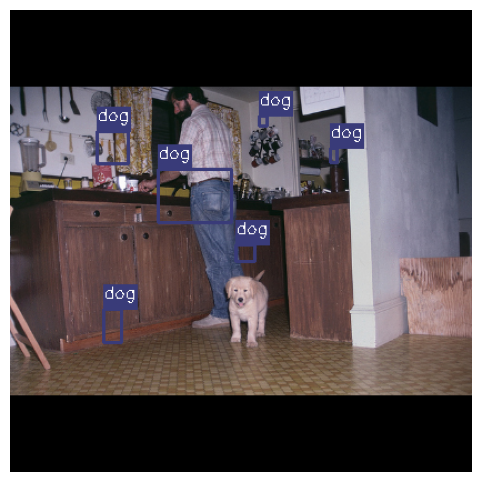

Epoch: 1


  0%|                                                                                                                                | 0/549 [00:06<?, ?it/s, loss=6.6]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:28<1:59:22, 13.09s/it, loss=5.76]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:36<1:35:08, 10.46s/it, loss=5.51]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:43<1:24:13,  9.27s/it, loss=5.39]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:51<1:18:22,  8.64s/it, loss=5.35]

batch_idx: 4


  1%|█▎                                                                                                                    | 6/549 [00:57<1:11:18,  7.88s/it, loss=5.3]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:04<1:09:45,  7.72s/it, loss=5.26]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:11<1:07:45,  7.52s/it, loss=5.22]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:19<1:06:35,  7.40s/it, loss=5.19]

batch_idx: 8


  2%|██▏                                                                                                                  | 10/549 [01:25<1:04:52,  7.22s/it, loss=5.2]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:33<1:05:25,  7.30s/it, loss=5.17]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:40<1:04:33,  7.21s/it, loss=5.16]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:47<1:03:43,  7.13s/it, loss=5.14]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:54<1:02:29,  7.01s/it, loss=5.14]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [02:01<1:02:52,  7.06s/it, loss=5.14]

batch_idx: 14


  3%|███▍                                                                                                                | 16/549 [02:08<1:03:12,  7.12s/it, loss=5.13]

batch_idx: 15


  3%|███▌                                                                                                                | 17/549 [02:15<1:02:55,  7.10s/it, loss=5.13]

batch_idx: 16


  3%|███▊                                                                                                                | 18/549 [02:22<1:03:36,  7.19s/it, loss=5.12]

batch_idx: 17


  3%|████                                                                                                                | 19/549 [02:29<1:03:05,  7.14s/it, loss=5.12]

batch_idx: 18


  4%|████▎                                                                                                                | 20/549 [02:36<1:01:21,  6.96s/it, loss=5.1]

batch_idx: 19


  4%|████▍                                                                                                               | 21/549 [02:43<1:01:57,  7.04s/it, loss=5.09]

batch_idx: 20


  4%|████▋                                                                                                               | 22/549 [02:51<1:02:35,  7.13s/it, loss=5.09]

batch_idx: 21


  4%|████▊                                                                                                               | 23/549 [02:58<1:01:58,  7.07s/it, loss=5.07]

batch_idx: 22


  4%|█████                                                                                                               | 24/549 [03:05<1:02:46,  7.17s/it, loss=5.08]

batch_idx: 23


  5%|█████▎                                                                                                              | 25/549 [03:12<1:01:10,  7.00s/it, loss=5.07]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:19<1:01:14,  7.03s/it, loss=5.06]

batch_idx: 25


  5%|█████▋                                                                                                              | 27/549 [03:25<1:00:43,  6.98s/it, loss=5.05]

batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:33<1:01:23,  7.07s/it, loss=5.05]

batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:40<1:01:09,  7.06s/it, loss=5.04]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:47<1:01:39,  7.13s/it, loss=5.03]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [03:54<1:02:08,  7.20s/it, loss=5.03]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [04:02<1:01:58,  7.19s/it, loss=5.02]

batch_idx: 31


  6%|██████▉                                                                                                             | 33/549 [04:08<1:00:45,  7.06s/it, loss=5.01]

batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:15<1:00:19,  7.03s/it, loss=5.01]

batch_idx: 33


  6%|███████▌                                                                                                               | 35/549 [04:23<1:00:49,  7.10s/it, loss=5]

batch_idx: 34


  7%|███████▊                                                                                                               | 36/549 [04:30<1:00:37,  7.09s/it, loss=5]

batch_idx: 35


  7%|████████▏                                                                                                                | 37/549 [04:37<59:51,  7.02s/it, loss=5]

batch_idx: 36


  7%|████████                                                                                                            | 38/549 [04:44<1:00:48,  7.14s/it, loss=4.99]

batch_idx: 37


  7%|████████▏                                                                                                           | 39/549 [04:52<1:02:05,  7.31s/it, loss=4.99]

batch_idx: 38


  7%|████████▍                                                                                                           | 40/549 [04:59<1:02:29,  7.37s/it, loss=4.99]

batch_idx: 39


  7%|████████▋                                                                                                           | 41/549 [05:07<1:02:49,  7.42s/it, loss=4.98]

batch_idx: 40


  8%|████████▊                                                                                                           | 42/549 [05:14<1:01:58,  7.33s/it, loss=4.99]

batch_idx: 41


  8%|█████████                                                                                                           | 43/549 [05:22<1:02:53,  7.46s/it, loss=4.98]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:28<1:01:20,  7.29s/it, loss=4.98]

batch_idx: 43


  8%|█████████▌                                                                                                          | 45/549 [05:35<1:00:32,  7.21s/it, loss=4.98]

batch_idx: 44


  8%|█████████▋                                                                                                          | 46/549 [05:43<1:00:10,  7.18s/it, loss=4.97]

batch_idx: 45


  9%|█████████▉                                                                                                          | 47/549 [05:50<1:00:03,  7.18s/it, loss=4.97]

batch_idx: 46


  9%|██████████▏                                                                                                         | 48/549 [05:57<1:00:43,  7.27s/it, loss=4.97]

batch_idx: 47


  9%|██████████▎                                                                                                         | 49/549 [06:04<1:00:15,  7.23s/it, loss=4.96]

batch_idx: 48


  9%|██████████▋                                                                                                           | 50/549 [06:12<59:48,  7.19s/it, loss=4.96]

batch_idx: 49


  9%|██████████▉                                                                                                           | 51/549 [06:19<59:57,  7.22s/it, loss=4.96]

batch_idx: 50


  9%|███████████▏                                                                                                          | 52/549 [06:25<58:16,  7.04s/it, loss=4.96]

batch_idx: 51


 10%|███████████▍                                                                                                          | 53/549 [06:33<58:47,  7.11s/it, loss=4.96]

batch_idx: 52


 10%|███████████▌                                                                                                          | 54/549 [06:40<59:13,  7.18s/it, loss=4.96]

batch_idx: 53


 10%|███████████▊                                                                                                          | 55/549 [06:47<58:48,  7.14s/it, loss=4.96]

batch_idx: 54


 10%|████████████                                                                                                          | 56/549 [06:55<59:44,  7.27s/it, loss=4.95]

batch_idx: 55


 10%|████████████▎                                                                                                         | 57/549 [07:02<59:00,  7.20s/it, loss=4.95]

batch_idx: 56


 11%|████████████▍                                                                                                         | 58/549 [07:09<58:44,  7.18s/it, loss=4.95]

batch_idx: 57


 11%|████████████▋                                                                                                         | 59/549 [07:16<58:47,  7.20s/it, loss=4.94]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:23<58:12,  7.14s/it, loss=4.94]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:30<58:06,  7.14s/it, loss=4.94]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:37<57:07,  7.04s/it, loss=4.94]

batch_idx: 61


 11%|█████████████▌                                                                                                        | 63/549 [07:44<56:25,  6.97s/it, loss=4.93]

batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [07:51<56:44,  7.02s/it, loss=4.93]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [07:58<56:58,  7.06s/it, loss=4.93]

batch_idx: 64


 12%|██████████████▏                                                                                                       | 66/549 [08:05<55:55,  6.95s/it, loss=4.92]

batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:12<56:20,  7.01s/it, loss=4.92]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:19<56:15,  7.02s/it, loss=4.92]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:26<56:04,  7.01s/it, loss=4.91]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:33<56:28,  7.07s/it, loss=4.91]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:40<56:41,  7.12s/it, loss=4.91]

batch_idx: 70


 13%|███████████████▌                                                                                                       | 72/549 [08:48<57:05,  7.18s/it, loss=4.9]

batch_idx: 71


 13%|███████████████▊                                                                                                       | 73/549 [08:55<57:22,  7.23s/it, loss=4.9]

batch_idx: 72


 13%|████████████████                                                                                                       | 74/549 [09:02<56:49,  7.18s/it, loss=4.9]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:09<55:57,  7.08s/it, loss=4.89]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:16<56:22,  7.15s/it, loss=4.89]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:24<56:47,  7.22s/it, loss=4.89]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:31<56:10,  7.16s/it, loss=4.89]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:38<55:49,  7.13s/it, loss=4.88]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [09:44<54:30,  6.97s/it, loss=4.88]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [09:52<56:01,  7.18s/it, loss=4.88]

batch_idx: 80


 15%|█████████████████▌                                                                                                    | 82/549 [09:59<54:15,  6.97s/it, loss=4.88]

batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:06<55:41,  7.17s/it, loss=4.87]

batch_idx: 82


 15%|██████████████████                                                                                                    | 84/549 [10:13<55:20,  7.14s/it, loss=4.87]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:20<55:07,  7.13s/it, loss=4.87]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:28<55:24,  7.18s/it, loss=4.86]

batch_idx: 85


 16%|██████████████████▋                                                                                                   | 87/549 [10:34<53:59,  7.01s/it, loss=4.86]

batch_idx: 86


 16%|██████████████████▉                                                                                                   | 88/549 [10:42<54:50,  7.14s/it, loss=4.86]

batch_idx: 87
batch_idx: 88


 16%|███████████████████▎                                                                                                  | 90/549 [10:56<53:52,  7.04s/it, loss=4.85]

batch_idx: 89


 17%|███████████████████▌                                                                                                  | 91/549 [11:03<54:03,  7.08s/it, loss=4.85]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:10<54:04,  7.10s/it, loss=4.85]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:17<54:22,  7.16s/it, loss=4.84]

batch_idx: 92
batch_idx: 93


 17%|████████████████████▏                                                                                                 | 94/549 [11:25<54:48,  7.23s/it, loss=4.84]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:39<55:22,  7.33s/it, loss=4.84]

batch_idx: 95


 18%|████████████████████▊                                                                                                 | 97/549 [11:46<54:16,  7.21s/it, loss=4.84]

batch_idx: 96


 18%|█████████████████████                                                                                                 | 98/549 [11:53<52:46,  7.02s/it, loss=4.83]

batch_idx: 97


 18%|█████████████████████▎                                                                                                | 99/549 [12:00<53:05,  7.08s/it, loss=4.83]

batch_idx: 98


 18%|█████████████████████▎                                                                                               | 100/549 [12:07<53:28,  7.15s/it, loss=4.83]

batch_idx: 99


 18%|█████████████████████▌                                                                                               | 101/549 [12:14<52:40,  7.05s/it, loss=4.83]

batch_idx: 100


 19%|█████████████████████▋                                                                                               | 102/549 [12:21<52:10,  7.00s/it, loss=4.83]

batch_idx: 101


 19%|█████████████████████▉                                                                                               | 103/549 [12:29<52:44,  7.10s/it, loss=4.82]

batch_idx: 102


 19%|██████████████████████▏                                                                                              | 104/549 [12:36<53:45,  7.25s/it, loss=4.82]

batch_idx: 103


 19%|██████████████████████▍                                                                                              | 105/549 [12:43<53:42,  7.26s/it, loss=4.82]

batch_idx: 104


 19%|██████████████████████▌                                                                                              | 106/549 [12:50<52:51,  7.16s/it, loss=4.82]

batch_idx: 105


 19%|██████████████████████▊                                                                                              | 107/549 [12:57<51:52,  7.04s/it, loss=4.82]

batch_idx: 106


 20%|███████████████████████                                                                                              | 108/549 [13:04<51:22,  6.99s/it, loss=4.82]

batch_idx: 107


 20%|███████████████████████▏                                                                                             | 109/549 [13:11<51:14,  6.99s/it, loss=4.82]

batch_idx: 108
batch_idx: 109


 20%|███████████████████████▋                                                                                             | 111/549 [13:25<51:38,  7.07s/it, loss=4.82]

batch_idx: 110


 20%|███████████████████████▊                                                                                             | 112/549 [13:32<50:49,  6.98s/it, loss=4.81]

batch_idx: 111


 21%|████████████████████████                                                                                             | 113/549 [13:40<52:26,  7.22s/it, loss=4.81]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [13:47<52:17,  7.21s/it, loss=4.81]

batch_idx: 113


 21%|████████████████████████▌                                                                                            | 115/549 [13:54<52:31,  7.26s/it, loss=4.81]

batch_idx: 114


 21%|████████████████████████▋                                                                                            | 116/549 [14:02<53:43,  7.44s/it, loss=4.81]

batch_idx: 115


 21%|█████████████████████████▏                                                                                            | 117/549 [14:09<52:51,  7.34s/it, loss=4.8]

batch_idx: 116


 21%|█████████████████████████▎                                                                                            | 118/549 [14:17<52:48,  7.35s/it, loss=4.8]

batch_idx: 117


 22%|█████████████████████████▌                                                                                            | 119/549 [14:24<52:42,  7.35s/it, loss=4.8]

batch_idx: 118


 22%|█████████████████████████▊                                                                                            | 120/549 [14:31<50:49,  7.11s/it, loss=4.8]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [14:38<51:21,  7.20s/it, loss=4.79]

batch_idx: 120


 22%|██████████████████████████                                                                                           | 122/549 [14:46<52:16,  7.35s/it, loss=4.79]

batch_idx: 121


 22%|██████████████████████████▏                                                                                          | 123/549 [14:53<51:22,  7.24s/it, loss=4.79]

batch_idx: 122


 23%|██████████████████████████▍                                                                                          | 124/549 [15:00<51:09,  7.22s/it, loss=4.79]

batch_idx: 123


 23%|██████████████████████████▋                                                                                          | 125/549 [15:06<49:32,  7.01s/it, loss=4.79]

batch_idx: 124


 23%|██████████████████████████▊                                                                                          | 126/549 [15:14<49:50,  7.07s/it, loss=4.78]

batch_idx: 125


 23%|███████████████████████████                                                                                          | 127/549 [15:20<49:12,  7.00s/it, loss=4.78]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:28<49:27,  7.05s/it, loss=4.78]

batch_idx: 127


 23%|███████████████████████████▍                                                                                         | 129/549 [15:34<48:49,  6.97s/it, loss=4.78]

batch_idx: 128


 24%|███████████████████████████▋                                                                                         | 130/549 [15:41<48:55,  7.01s/it, loss=4.78]

batch_idx: 129


 24%|███████████████████████████▉                                                                                         | 131/549 [15:49<50:01,  7.18s/it, loss=4.77]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [15:56<49:52,  7.18s/it, loss=4.77]

batch_idx: 131


 24%|████████████████████████████▎                                                                                        | 133/549 [16:03<49:25,  7.13s/it, loss=4.77]

batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:10<48:49,  7.06s/it, loss=4.77]

batch_idx: 133


 25%|████████████████████████████▊                                                                                        | 135/549 [16:17<48:37,  7.05s/it, loss=4.76]

batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:24<48:36,  7.06s/it, loss=4.76]

batch_idx: 135


 25%|█████████████████████████████▏                                                                                       | 137/549 [16:31<47:53,  6.97s/it, loss=4.76]

batch_idx: 136


 25%|█████████████████████████████▍                                                                                       | 138/549 [16:38<48:05,  7.02s/it, loss=4.76]

batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [16:45<48:27,  7.09s/it, loss=4.76]

batch_idx: 138


 26%|█████████████████████████████▊                                                                                       | 140/549 [16:53<48:32,  7.12s/it, loss=4.75]

batch_idx: 139


 26%|██████████████████████████████                                                                                       | 141/549 [16:59<47:48,  7.03s/it, loss=4.75]

batch_idx: 140


 26%|██████████████████████████████▎                                                                                      | 142/549 [17:07<48:17,  7.12s/it, loss=4.75]

batch_idx: 141


 26%|██████████████████████████████▍                                                                                      | 143/549 [17:14<48:20,  7.14s/it, loss=4.75]

batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:21<48:49,  7.23s/it, loss=4.75]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:28<48:22,  7.19s/it, loss=4.74]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [17:35<46:31,  6.93s/it, loss=4.74]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [17:41<45:45,  6.83s/it, loss=4.74]

batch_idx: 146


 27%|███████████████████████████████▌                                                                                     | 148/549 [17:48<44:54,  6.72s/it, loss=4.74]

batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [17:55<45:38,  6.85s/it, loss=4.73]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:02<46:09,  6.94s/it, loss=4.73]

batch_idx: 149


 28%|████████████████████████████████▏                                                                                    | 151/549 [18:10<47:18,  7.13s/it, loss=4.73]

batch_idx: 150


 28%|████████████████████████████████▍                                                                                    | 152/549 [18:17<46:59,  7.10s/it, loss=4.73]

batch_idx: 151


 28%|████████████████████████████████▌                                                                                    | 153/549 [18:24<47:21,  7.18s/it, loss=4.72]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [18:32<47:54,  7.28s/it, loss=4.72]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [18:39<47:23,  7.22s/it, loss=4.72]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [18:46<47:20,  7.23s/it, loss=4.72]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [18:52<45:37,  6.98s/it, loss=4.71]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:00<46:03,  7.07s/it, loss=4.71]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:07<46:47,  7.20s/it, loss=4.71]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:14<46:41,  7.20s/it, loss=4.71]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:22<47:30,  7.35s/it, loss=4.71]

batch_idx: 160


 30%|██████████████████████████████████▌                                                                                  | 162/549 [19:29<47:05,  7.30s/it, loss=4.71]

batch_idx: 161


 30%|███████████████████████████████████                                                                                   | 163/549 [19:37<47:09,  7.33s/it, loss=4.7]

batch_idx: 162


 30%|███████████████████████████████████▏                                                                                  | 164/549 [19:44<46:29,  7.25s/it, loss=4.7]

batch_idx: 163


 30%|███████████████████████████████████▍                                                                                  | 165/549 [19:51<46:22,  7.25s/it, loss=4.7]

batch_idx: 164


 30%|███████████████████████████████████▋                                                                                  | 166/549 [19:58<46:22,  7.27s/it, loss=4.7]

batch_idx: 165


 30%|███████████████████████████████████▉                                                                                  | 167/549 [20:05<46:14,  7.26s/it, loss=4.7]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:12<45:07,  7.11s/it, loss=4.69]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:19<44:27,  7.02s/it, loss=4.69]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [20:26<44:10,  6.99s/it, loss=4.69]

batch_idx: 169


 31%|████████████████████████████████████▍                                                                                | 171/549 [20:33<44:07,  7.00s/it, loss=4.69]

batch_idx: 170
batch_idx: 171


 31%|████████████████████████████████████▋                                                                                | 172/549 [20:40<44:21,  7.06s/it, loss=4.69]

batch_idx: 172


 32%|█████████████████████████████████████                                                                                | 174/549 [20:55<44:54,  7.18s/it, loss=4.69]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:02<44:21,  7.12s/it, loss=4.68]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:09<44:34,  7.17s/it, loss=4.68]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [21:16<44:51,  7.23s/it, loss=4.68]

batch_idx: 176


 32%|█████████████████████████████████████▉                                                                               | 178/549 [21:23<43:49,  7.09s/it, loss=4.68]

batch_idx: 177


 33%|██████████████████████████████████████▏                                                                              | 179/549 [21:30<43:23,  7.04s/it, loss=4.68]

batch_idx: 178


 33%|██████████████████████████████████████▎                                                                              | 180/549 [21:37<43:02,  7.00s/it, loss=4.67]

batch_idx: 179


 33%|██████████████████████████████████████▌                                                                              | 181/549 [21:44<42:57,  7.00s/it, loss=4.67]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [21:51<43:39,  7.14s/it, loss=4.67]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [21:58<43:18,  7.10s/it, loss=4.67]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:06<43:44,  7.19s/it, loss=4.66]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:13<44:02,  7.26s/it, loss=4.66]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:20<43:35,  7.20s/it, loss=4.66]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [22:28<43:47,  7.26s/it, loss=4.66]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [22:35<43:05,  7.16s/it, loss=4.66]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [22:42<42:43,  7.12s/it, loss=4.65]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [22:49<43:49,  7.32s/it, loss=4.65]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [22:57<43:46,  7.34s/it, loss=4.65]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:04<43:31,  7.32s/it, loss=4.65]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:11<42:47,  7.21s/it, loss=4.65]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:18<42:10,  7.13s/it, loss=4.64]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [23:25<41:40,  7.06s/it, loss=4.64]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [23:32<41:45,  7.10s/it, loss=4.64]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [23:39<41:59,  7.16s/it, loss=4.64]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [23:47<41:57,  7.17s/it, loss=4.64]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [23:53<40:44,  6.99s/it, loss=4.63]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:00<40:54,  7.03s/it, loss=4.63]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:08<40:54,  7.03s/it, loss=4.63]

batch_idx: 200
==> Saving checkpoint


 37%|███████████████████████████████████████████                                                                          | 202/549 [24:30<59:51, 10.35s/it, loss=4.63]

batch_idx: 201


 37%|███████████████████████████████████████████▎                                                                         | 203/549 [24:37<53:33,  9.29s/it, loss=4.63]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [24:44<49:27,  8.60s/it, loss=4.62]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [24:51<46:52,  8.18s/it, loss=4.62]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [24:58<44:41,  7.82s/it, loss=4.62]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:05<42:19,  7.43s/it, loss=4.62]

batch_idx: 206


 38%|████████████████████████████████████████████▎                                                                        | 208/549 [25:11<40:47,  7.18s/it, loss=4.62]

batch_idx: 207


 38%|████████████████████████████████████████████▌                                                                        | 209/549 [25:19<41:04,  7.25s/it, loss=4.61]

batch_idx: 208


 38%|████████████████████████████████████████████▊                                                                        | 210/549 [25:25<39:57,  7.07s/it, loss=4.61]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [25:32<39:29,  7.01s/it, loss=4.61]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [25:39<38:23,  6.84s/it, loss=4.61]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [25:46<39:46,  7.10s/it, loss=4.61]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [25:54<40:15,  7.21s/it, loss=4.61]

batch_idx: 213


 39%|██████████████████████████████████████████████▏                                                                       | 215/549 [26:01<39:52,  7.16s/it, loss=4.6]

batch_idx: 214


 39%|██████████████████████████████████████████████▍                                                                       | 216/549 [26:08<39:59,  7.20s/it, loss=4.6]

batch_idx: 215


 40%|██████████████████████████████████████████████▋                                                                       | 217/549 [26:16<40:03,  7.24s/it, loss=4.6]

batch_idx: 216


 40%|██████████████████████████████████████████████▊                                                                       | 218/549 [26:23<39:51,  7.23s/it, loss=4.6]

batch_idx: 217


 40%|███████████████████████████████████████████████                                                                       | 219/549 [26:30<39:56,  7.26s/it, loss=4.6]

batch_idx: 218


 40%|███████████████████████████████████████████████▎                                                                      | 220/549 [26:37<39:49,  7.26s/it, loss=4.6]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [26:44<39:04,  7.15s/it, loss=4.59]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [26:51<38:47,  7.12s/it, loss=4.59]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [26:58<38:18,  7.05s/it, loss=4.59]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:05<37:42,  6.96s/it, loss=4.59]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:12<37:01,  6.86s/it, loss=4.58]

batch_idx: 224


 41%|████████████████████████████████████████████████▏                                                                    | 226/549 [27:19<37:34,  6.98s/it, loss=4.58]

batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [27:25<36:51,  6.87s/it, loss=4.58]

batch_idx: 226


 42%|████████████████████████████████████████████████▌                                                                    | 228/549 [27:33<37:27,  7.00s/it, loss=4.58]

batch_idx: 227


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [27:40<37:32,  7.04s/it, loss=4.58]

batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [27:47<37:20,  7.02s/it, loss=4.57]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [27:54<37:16,  7.03s/it, loss=4.57]

batch_idx: 230


 42%|█████████████████████████████████████████████████▍                                                                   | 232/549 [28:01<37:46,  7.15s/it, loss=4.57]

batch_idx: 231


 42%|█████████████████████████████████████████████████▋                                                                   | 233/549 [28:09<38:46,  7.36s/it, loss=4.57]

batch_idx: 232


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [28:16<38:20,  7.30s/it, loss=4.57]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [28:23<37:10,  7.10s/it, loss=4.57]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [28:30<37:06,  7.11s/it, loss=4.57]

batch_idx: 235


 43%|██████████████████████████████████████████████████▌                                                                  | 237/549 [28:37<36:41,  7.06s/it, loss=4.56]

batch_idx: 236


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [28:45<37:39,  7.26s/it, loss=4.56]

batch_idx: 237


 44%|██████████████████████████████████████████████████▉                                                                  | 239/549 [28:51<36:21,  7.04s/it, loss=4.56]

batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [28:58<35:42,  6.93s/it, loss=4.56]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:05<35:21,  6.89s/it, loss=4.56]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:12<35:33,  6.95s/it, loss=4.56]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [29:19<35:50,  7.03s/it, loss=4.56]

batch_idx: 242


 44%|████████████████████████████████████████████████████                                                                 | 244/549 [29:26<36:03,  7.09s/it, loss=4.55]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [29:33<34:54,  6.89s/it, loss=4.55]

batch_idx: 244


 45%|████████████████████████████████████████████████████▍                                                                | 246/549 [29:40<35:08,  6.96s/it, loss=4.55]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [29:47<35:12,  7.00s/it, loss=4.55]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [29:54<34:51,  6.95s/it, loss=4.55]

batch_idx: 247


 45%|█████████████████████████████████████████████████████                                                                | 249/549 [30:01<34:30,  6.90s/it, loss=4.54]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:08<34:48,  6.98s/it, loss=4.54]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▍                                                               | 251/549 [30:15<34:53,  7.03s/it, loss=4.54]

batch_idx: 250


 46%|█████████████████████████████████████████████████████▋                                                               | 252/549 [30:22<35:28,  7.17s/it, loss=4.54]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▉                                                               | 253/549 [30:30<35:28,  7.19s/it, loss=4.54]

batch_idx: 252


 46%|██████████████████████████████████████████████████████▏                                                              | 254/549 [30:37<35:11,  7.16s/it, loss=4.54]

batch_idx: 253


 46%|██████████████████████████████████████████████████████▎                                                              | 255/549 [30:44<35:06,  7.16s/it, loss=4.53]

batch_idx: 254


 47%|██████████████████████████████████████████████████████▌                                                              | 256/549 [30:51<35:32,  7.28s/it, loss=4.53]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▊                                                              | 257/549 [30:58<34:36,  7.11s/it, loss=4.53]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [31:05<34:09,  7.04s/it, loss=4.53]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▏                                                             | 259/549 [31:12<34:17,  7.10s/it, loss=4.52]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [31:21<36:16,  7.53s/it, loss=4.52]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [31:28<35:31,  7.40s/it, loss=4.52]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [31:35<35:35,  7.44s/it, loss=4.52]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [31:43<35:14,  7.39s/it, loss=4.52]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▎                                                            | 264/549 [31:50<34:31,  7.27s/it, loss=4.51]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▍                                                            | 265/549 [31:57<33:59,  7.18s/it, loss=4.51]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [32:04<33:56,  7.20s/it, loss=4.51]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [32:11<33:33,  7.14s/it, loss=4.51]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [32:18<33:21,  7.12s/it, loss=4.51]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▊                                                            | 269/549 [32:25<33:18,  7.14s/it, loss=4.5]

batch_idx: 268


 49%|██████████████████████████████████████████████████████████                                                            | 270/549 [32:33<33:59,  7.31s/it, loss=4.5]

batch_idx: 269


 49%|██████████████████████████████████████████████████████████▏                                                           | 271/549 [32:40<33:21,  7.20s/it, loss=4.5]

batch_idx: 270


 50%|██████████████████████████████████████████████████████████▍                                                           | 272/549 [32:47<32:32,  7.05s/it, loss=4.5]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▋                                                           | 273/549 [32:54<33:15,  7.23s/it, loss=4.5]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▉                                                           | 274/549 [33:02<33:29,  7.31s/it, loss=4.5]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [33:09<32:47,  7.18s/it, loss=4.49]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▊                                                          | 276/549 [33:15<31:52,  7.00s/it, loss=4.49]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████                                                          | 277/549 [33:22<31:46,  7.01s/it, loss=4.49]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [33:29<31:49,  7.05s/it, loss=4.49]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [33:36<31:26,  6.99s/it, loss=4.49]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▋                                                         | 280/549 [33:43<31:38,  7.06s/it, loss=4.49]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▉                                                         | 281/549 [33:51<31:57,  7.16s/it, loss=4.48]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [33:58<31:49,  7.15s/it, loss=4.48]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:05<31:21,  7.07s/it, loss=4.48]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:12<31:52,  7.22s/it, loss=4.48]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [34:19<31:28,  7.15s/it, loss=4.48]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [34:26<31:21,  7.16s/it, loss=4.48]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [34:34<31:19,  7.17s/it, loss=4.48]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [34:41<31:30,  7.24s/it, loss=4.47]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [34:48<30:40,  7.08s/it, loss=4.47]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [34:55<30:32,  7.07s/it, loss=4.47]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [35:02<30:36,  7.12s/it, loss=4.47]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [35:09<29:37,  6.92s/it, loss=4.47]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [35:16<30:00,  7.03s/it, loss=4.47]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [35:23<29:50,  7.02s/it, loss=4.46]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [35:30<29:49,  7.04s/it, loss=4.46]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [35:37<29:50,  7.08s/it, loss=4.46]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [35:45<30:08,  7.18s/it, loss=4.46]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [35:51<29:33,  7.07s/it, loss=4.46]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [35:58<29:22,  7.05s/it, loss=4.46]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:06<29:29,  7.11s/it, loss=4.46]

batch_idx: 299


 55%|████████████████████████████████████████████████████████████████▏                                                    | 301/549 [36:13<29:18,  7.09s/it, loss=4.45]

batch_idx: 300


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [36:20<29:27,  7.16s/it, loss=4.45]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [36:27<28:57,  7.06s/it, loss=4.45]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [36:34<29:22,  7.19s/it, loss=4.45]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [36:41<29:15,  7.20s/it, loss=4.45]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [36:49<29:24,  7.26s/it, loss=4.45]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [36:56<29:34,  7.33s/it, loss=4.44]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [37:03<29:00,  7.22s/it, loss=4.44]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [37:10<28:10,  7.05s/it, loss=4.44]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [37:18<29:08,  7.31s/it, loss=4.44]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [37:25<28:28,  7.18s/it, loss=4.44]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [37:32<28:57,  7.33s/it, loss=4.43]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [37:40<29:17,  7.45s/it, loss=4.43]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [37:47<28:54,  7.38s/it, loss=4.43]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [37:55<28:58,  7.43s/it, loss=4.43]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▎                                                 | 316/549 [38:02<28:32,  7.35s/it, loss=4.43]

batch_idx: 315


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 317/549 [38:09<27:44,  7.17s/it, loss=4.42]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▊                                                 | 318/549 [38:16<27:25,  7.12s/it, loss=4.42]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 319/549 [38:24<27:52,  7.27s/it, loss=4.42]

batch_idx: 318


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [38:31<27:44,  7.27s/it, loss=4.42]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [38:38<27:12,  7.16s/it, loss=4.42]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████▌                                                | 322/549 [38:45<27:16,  7.21s/it, loss=4.41]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▊                                                | 323/549 [38:52<27:01,  7.17s/it, loss=4.41]

batch_idx: 322


 59%|█████████████████████████████████████████████████████████████████████                                                | 324/549 [38:59<27:02,  7.21s/it, loss=4.41]

batch_idx: 323


 59%|█████████████████████████████████████████████████████████████████████▎                                               | 325/549 [39:07<27:14,  7.30s/it, loss=4.41]

batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [39:14<27:08,  7.30s/it, loss=4.41]

batch_idx: 325


 60%|██████████████████████████████████████████████████████████████████████▎                                               | 327/549 [39:22<27:10,  7.35s/it, loss=4.4]

batch_idx: 326


 60%|██████████████████████████████████████████████████████████████████████▍                                               | 328/549 [39:29<27:04,  7.35s/it, loss=4.4]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████▋                                               | 329/549 [39:36<27:03,  7.38s/it, loss=4.4]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▉                                               | 330/549 [39:44<27:01,  7.41s/it, loss=4.4]

batch_idx: 329


 60%|███████████████████████████████████████████████████████████████████████▏                                              | 331/549 [39:51<26:59,  7.43s/it, loss=4.4]

batch_idx: 330


 60%|███████████████████████████████████████████████████████████████████████▎                                              | 332/549 [39:59<27:09,  7.51s/it, loss=4.4]

batch_idx: 331
batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [40:13<26:15,  7.33s/it, loss=4.39]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [40:21<25:55,  7.27s/it, loss=4.39]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [40:28<25:44,  7.25s/it, loss=4.39]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [40:35<25:28,  7.21s/it, loss=4.39]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [40:42<25:14,  7.18s/it, loss=4.38]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [40:49<24:58,  7.14s/it, loss=4.38]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [40:56<24:45,  7.11s/it, loss=4.38]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [41:03<24:37,  7.10s/it, loss=4.38]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [41:10<24:20,  7.06s/it, loss=4.38]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [41:18<24:44,  7.21s/it, loss=4.38]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [41:25<24:48,  7.26s/it, loss=4.37]

batch_idx: 343


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 345/549 [41:32<24:50,  7.31s/it, loss=4.37]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [41:40<24:56,  7.37s/it, loss=4.37]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [41:47<24:10,  7.18s/it, loss=4.37]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [41:54<24:11,  7.22s/it, loss=4.37]

batch_idx: 347


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 349/549 [42:01<23:58,  7.19s/it, loss=4.36]

batch_idx: 348


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [42:08<23:37,  7.12s/it, loss=4.36]

batch_idx: 349


 64%|██████████████████████████████████████████████████████████████████████████▊                                          | 351/549 [42:15<23:24,  7.09s/it, loss=4.36]

batch_idx: 350


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [42:23<23:58,  7.30s/it, loss=4.36]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [42:30<23:49,  7.29s/it, loss=4.36]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [42:37<23:06,  7.11s/it, loss=4.35]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [42:44<22:48,  7.06s/it, loss=4.35]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [42:51<23:01,  7.16s/it, loss=4.35]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [42:58<22:58,  7.18s/it, loss=4.35]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [43:06<23:05,  7.25s/it, loss=4.35]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [43:14<23:39,  7.47s/it, loss=4.35]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [43:21<22:51,  7.25s/it, loss=4.34]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [43:28<22:42,  7.25s/it, loss=4.34]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [43:35<22:24,  7.19s/it, loss=4.34]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [43:42<22:34,  7.28s/it, loss=4.34]

batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [43:50<22:46,  7.38s/it, loss=4.34]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [43:57<22:27,  7.32s/it, loss=4.34]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [44:05<22:30,  7.38s/it, loss=4.33]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [44:12<22:32,  7.43s/it, loss=4.33]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [44:20<22:39,  7.51s/it, loss=4.33]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [44:27<22:30,  7.50s/it, loss=4.33]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [44:35<22:04,  7.40s/it, loss=4.33]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [44:42<22:03,  7.43s/it, loss=4.33]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [44:49<21:42,  7.36s/it, loss=4.32]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [44:56<20:56,  7.14s/it, loss=4.32]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [45:03<20:49,  7.14s/it, loss=4.32]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [45:10<20:16,  6.99s/it, loss=4.32]

batch_idx: 374


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [45:17<20:30,  7.11s/it, loss=4.32]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [45:25<20:37,  7.20s/it, loss=4.32]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [45:31<20:15,  7.11s/it, loss=4.31]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [45:39<20:32,  7.25s/it, loss=4.31]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [45:47<20:42,  7.35s/it, loss=4.31]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▏                                   | 381/549 [45:53<19:43,  7.04s/it, loss=4.31]

batch_idx: 380


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                   | 382/549 [46:02<21:13,  7.63s/it, loss=4.31]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [46:09<21:00,  7.59s/it, loss=4.31]

batch_idx: 382


 70%|██████████████████████████████████████████████████████████████████████████████████▌                                   | 384/549 [46:17<20:34,  7.48s/it, loss=4.3]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████▊                                   | 385/549 [46:24<20:25,  7.47s/it, loss=4.3]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▉                                   | 386/549 [46:31<20:00,  7.37s/it, loss=4.3]

batch_idx: 385


 70%|███████████████████████████████████████████████████████████████████████████████████▏                                  | 387/549 [46:39<20:20,  7.53s/it, loss=4.3]

batch_idx: 386
batch_idx: 387


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                  | 389/549 [46:54<19:44,  7.40s/it, loss=4.3]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 390/549 [47:01<19:25,  7.33s/it, loss=4.29]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [47:08<19:22,  7.36s/it, loss=4.29]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [47:16<19:30,  7.46s/it, loss=4.29]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [47:23<18:58,  7.30s/it, loss=4.29]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [47:30<18:47,  7.27s/it, loss=4.29]

batch_idx: 393
batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [47:44<18:18,  7.18s/it, loss=4.28]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [47:52<18:28,  7.29s/it, loss=4.28]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [47:59<18:29,  7.35s/it, loss=4.28]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [48:06<18:03,  7.22s/it, loss=4.28]

batch_idx: 398
batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:21<18:00,  7.25s/it, loss=4.28]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [48:44<25:59, 10.61s/it, loss=4.28]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [48:51<23:28,  9.64s/it, loss=4.27]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [48:58<21:28,  8.89s/it, loss=4.27]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [49:06<20:11,  8.42s/it, loss=4.27]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [49:13<19:30,  8.18s/it, loss=4.27]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [49:21<19:00,  8.03s/it, loss=4.27]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [49:29<18:25,  7.84s/it, loss=4.27]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [49:36<17:53,  7.67s/it, loss=4.26]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                             | 410/549 [49:43<17:32,  7.57s/it, loss=4.26]

batch_idx: 409


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 411/549 [49:51<17:19,  7.54s/it, loss=4.26]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [49:58<17:01,  7.46s/it, loss=4.26]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [50:05<16:41,  7.36s/it, loss=4.26]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 414/549 [50:13<16:41,  7.42s/it, loss=4.26]

batch_idx: 413


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 415/549 [50:20<16:25,  7.35s/it, loss=4.26]

batch_idx: 414


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                            | 416/549 [50:27<16:16,  7.34s/it, loss=4.25]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 417/549 [50:34<16:01,  7.29s/it, loss=4.25]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████                            | 418/549 [50:41<15:45,  7.22s/it, loss=4.25]

batch_idx: 417


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [50:48<15:02,  6.94s/it, loss=4.25]

batch_idx: 418


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 420/549 [50:54<14:55,  6.94s/it, loss=4.25]

batch_idx: 419


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                           | 421/549 [51:02<15:03,  7.06s/it, loss=4.25]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [51:08<14:32,  6.87s/it, loss=4.24]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [51:16<15:03,  7.17s/it, loss=4.24]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [51:24<15:19,  7.36s/it, loss=4.24]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [51:30<14:40,  7.10s/it, loss=4.24]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [51:37<14:21,  7.00s/it, loss=4.24]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [51:45<14:47,  7.27s/it, loss=4.24]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [51:52<14:35,  7.23s/it, loss=4.23]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [51:59<14:16,  7.13s/it, loss=4.23]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [52:06<14:09,  7.14s/it, loss=4.23]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 431/549 [52:14<14:16,  7.26s/it, loss=4.23]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████                         | 432/549 [52:21<14:14,  7.31s/it, loss=4.23]

batch_idx: 431


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 433/549 [52:29<14:20,  7.42s/it, loss=4.23]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [52:36<14:03,  7.33s/it, loss=4.22]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [52:44<14:26,  7.60s/it, loss=4.22]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [52:52<14:19,  7.61s/it, loss=4.22]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [52:59<14:04,  7.54s/it, loss=4.22]

batch_idx: 436


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                       | 438/549 [53:06<13:41,  7.41s/it, loss=4.22]

batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [53:14<13:35,  7.42s/it, loss=4.22]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [53:21<13:32,  7.46s/it, loss=4.21]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [53:28<13:01,  7.23s/it, loss=4.21]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [53:36<13:02,  7.32s/it, loss=4.21]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [53:43<12:56,  7.32s/it, loss=4.21]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [53:51<13:03,  7.46s/it, loss=4.21]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 445/549 [53:58<12:40,  7.31s/it, loss=4.21]

batch_idx: 444


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▊                      | 446/549 [54:05<12:31,  7.30s/it, loss=4.2]

batch_idx: 445


 81%|████████████████████████████████████████████████████████████████████████████████████████████████                      | 447/549 [54:12<12:22,  7.28s/it, loss=4.2]

batch_idx: 446


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 448/549 [54:19<12:09,  7.22s/it, loss=4.2]

batch_idx: 447


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 449/549 [54:27<12:11,  7.32s/it, loss=4.2]

batch_idx: 448


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 450/549 [54:34<11:56,  7.23s/it, loss=4.2]

batch_idx: 449


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 451/549 [54:41<11:45,  7.20s/it, loss=4.2]

batch_idx: 450


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 452/549 [54:48<11:47,  7.29s/it, loss=4.19]

batch_idx: 451


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 453/549 [54:56<11:40,  7.30s/it, loss=4.19]

batch_idx: 452


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 454/549 [55:03<11:43,  7.41s/it, loss=4.19]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 455/549 [55:11<11:30,  7.34s/it, loss=4.19]

batch_idx: 454


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 456/549 [55:18<11:32,  7.45s/it, loss=4.19]

batch_idx: 455


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 457/549 [55:25<11:09,  7.28s/it, loss=4.19]

batch_idx: 456
batch_idx: 457


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 459/549 [55:40<10:52,  7.25s/it, loss=4.18]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                   | 460/549 [55:47<10:41,  7.21s/it, loss=4.18]

batch_idx: 459


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 461/549 [55:54<10:37,  7.24s/it, loss=4.18]

batch_idx: 460


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 462/549 [56:01<10:19,  7.12s/it, loss=4.18]

batch_idx: 461


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 463/549 [56:08<10:05,  7.04s/it, loss=4.18]

batch_idx: 462


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 464/549 [56:15<10:01,  7.08s/it, loss=4.17]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                  | 465/549 [56:22<09:56,  7.10s/it, loss=4.17]

batch_idx: 464
batch_idx: 465


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 467/549 [56:37<09:55,  7.27s/it, loss=4.17]

batch_idx: 466


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 468/549 [56:45<09:52,  7.31s/it, loss=4.17]

batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 469/549 [56:52<09:42,  7.28s/it, loss=4.17]

batch_idx: 468


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 470/549 [56:59<09:41,  7.36s/it, loss=4.17]

batch_idx: 469


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 471/549 [57:07<09:34,  7.36s/it, loss=4.16]

batch_idx: 470


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 472/549 [57:14<09:29,  7.40s/it, loss=4.16]

batch_idx: 471


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 473/549 [57:21<09:13,  7.28s/it, loss=4.16]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 474/549 [57:28<09:03,  7.24s/it, loss=4.16]

batch_idx: 473


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 475/549 [57:36<08:56,  7.25s/it, loss=4.16]

batch_idx: 474


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 476/549 [57:43<08:53,  7.30s/it, loss=4.16]

batch_idx: 475


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 477/549 [57:50<08:40,  7.22s/it, loss=4.15]

batch_idx: 476


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 478/549 [57:57<08:36,  7.28s/it, loss=4.15]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████               | 479/549 [58:05<08:26,  7.24s/it, loss=4.15]

batch_idx: 478


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 480/549 [58:12<08:18,  7.22s/it, loss=4.15]

batch_idx: 479


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 481/549 [58:18<08:00,  7.07s/it, loss=4.15]

batch_idx: 480


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 482/549 [58:25<07:49,  7.01s/it, loss=4.15]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 483/549 [58:33<08:03,  7.33s/it, loss=4.14]

batch_idx: 482


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 484/549 [58:41<07:55,  7.32s/it, loss=4.14]

batch_idx: 483


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 485/549 [58:48<07:46,  7.29s/it, loss=4.14]

batch_idx: 484


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 486/549 [58:55<07:40,  7.31s/it, loss=4.14]

batch_idx: 485


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 487/549 [59:03<07:32,  7.30s/it, loss=4.14]

batch_idx: 486


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████             | 488/549 [59:10<07:26,  7.32s/it, loss=4.14]

batch_idx: 487


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 489/549 [59:17<07:21,  7.35s/it, loss=4.14]

batch_idx: 488


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 490/549 [59:25<07:12,  7.33s/it, loss=4.13]

batch_idx: 489


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 491/549 [59:32<07:12,  7.45s/it, loss=4.13]

batch_idx: 490


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 492/549 [59:40<07:08,  7.51s/it, loss=4.13]

batch_idx: 491


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████            | 493/549 [59:48<07:04,  7.57s/it, loss=4.13]

batch_idx: 492


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 494/549 [59:55<06:46,  7.39s/it, loss=4.13]

batch_idx: 493


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 495/549 [1:00:02<06:31,  7.24s/it, loss=4.13]

batch_idx: 494


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 496/549 [1:00:09<06:24,  7.26s/it, loss=4.13]

batch_idx: 495
batch_idx: 496


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 498/549 [1:00:23<06:08,  7.22s/it, loss=4.12]

batch_idx: 497


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:00:31<05:59,  7.19s/it, loss=4.12]

batch_idx: 498


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:00:38<05:51,  7.17s/it, loss=4.12]

batch_idx: 499
batch_idx: 500


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:00:51<05:30,  7.03s/it, loss=4.12]

batch_idx: 501


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:00:59<05:28,  7.15s/it, loss=4.12]

batch_idx: 502


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 504/549 [1:01:06<05:21,  7.15s/it, loss=4.11]

batch_idx: 503


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:01:13<05:16,  7.19s/it, loss=4.11]

batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 506/549 [1:01:20<05:01,  7.01s/it, loss=4.11]

batch_idx: 505


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:01:27<04:58,  7.11s/it, loss=4.11]

batch_idx: 506


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:01:35<04:55,  7.21s/it, loss=4.11]

batch_idx: 507


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:01:42<04:48,  7.22s/it, loss=4.11]

batch_idx: 508


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:01:49<04:43,  7.26s/it, loss=4.11]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:01:56<04:33,  7.19s/it, loss=4.11]

batch_idx: 510


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:02:04<04:29,  7.28s/it, loss=4.1]

batch_idx: 511


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:02:11<04:20,  7.25s/it, loss=4.1]

batch_idx: 512


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 514/549 [1:02:18<04:12,  7.23s/it, loss=4.1]

batch_idx: 513


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 515/549 [1:02:26<04:10,  7.38s/it, loss=4.1]

batch_idx: 514


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:02:33<04:05,  7.45s/it, loss=4.1]

batch_idx: 515


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 517/549 [1:02:41<03:57,  7.43s/it, loss=4.1]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:02:48<03:44,  7.25s/it, loss=4.09]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:02:55<03:38,  7.28s/it, loss=4.09]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:03:02<03:32,  7.34s/it, loss=4.09]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:03:10<03:26,  7.39s/it, loss=4.09]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:03:16<03:12,  7.11s/it, loss=4.09]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:03:23<03:04,  7.08s/it, loss=4.09]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:03:31<02:59,  7.17s/it, loss=4.09]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:03:38<02:54,  7.26s/it, loss=4.08]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:03:45<02:46,  7.23s/it, loss=4.08]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:03:53<02:38,  7.21s/it, loss=4.08]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:03:59<02:28,  7.08s/it, loss=4.08]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:04:06<02:21,  7.05s/it, loss=4.08]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:04:14<02:14,  7.10s/it, loss=4.08]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:04:21<02:09,  7.19s/it, loss=4.08]

batch_idx: 530


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:04:28<02:02,  7.21s/it, loss=4.07]

batch_idx: 531


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:04:36<01:56,  7.29s/it, loss=4.07]

batch_idx: 532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:04:42<01:46,  7.09s/it, loss=4.07]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:04:49<01:38,  7.03s/it, loss=4.07]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:04:57<01:34,  7.29s/it, loss=4.07]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:05:05<01:28,  7.41s/it, loss=4.07]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:05:12<01:22,  7.46s/it, loss=4.06]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:05:20<01:13,  7.37s/it, loss=4.06]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:05:27<01:06,  7.33s/it, loss=4.06]

batch_idx: 539


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:05:34<00:58,  7.36s/it, loss=4.06]

batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:05:42<00:52,  7.45s/it, loss=4.06]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:05:49<00:43,  7.27s/it, loss=4.06]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:05:56<00:35,  7.19s/it, loss=4.06]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:06:03<00:29,  7.26s/it, loss=4.05]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:06:10<00:21,  7.25s/it, loss=4.05]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:06:18<00:14,  7.26s/it, loss=4.05]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:06:25<00:07,  7.21s/it, loss=4.05]

batch_idx: 547


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:06:26<00:00,  7.26s/it, loss=4.05]

batch_idx: 548
==> Saving checkpoint


display and report image


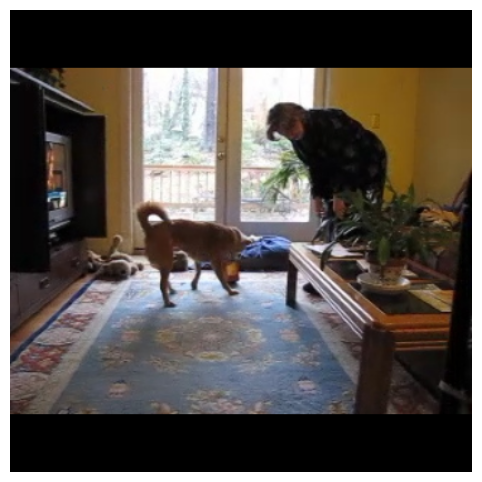

Epoch: 2


  0%|                                                                                                                               | 0/549 [00:07<?, ?it/s, loss=3.11]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:30<2:05:17, 13.74s/it, loss=3.36]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:37<1:38:46, 10.85s/it, loss=3.28]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:44<1:23:38,  9.21s/it, loss=3.29]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:51<1:17:55,  8.59s/it, loss=3.27]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [00:58<1:11:44,  7.93s/it, loss=3.28]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:05<1:09:33,  7.70s/it, loss=3.26]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:13<1:10:01,  7.77s/it, loss=3.26]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:21<1:09:37,  7.74s/it, loss=3.24]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:28<1:08:16,  7.60s/it, loss=3.25]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:35<1:07:18,  7.51s/it, loss=3.24]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:43<1:06:04,  7.38s/it, loss=3.23]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:50<1:06:28,  7.44s/it, loss=3.22]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:57<1:05:40,  7.37s/it, loss=3.22]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [02:05<1:06:14,  7.44s/it, loss=3.23]

batch_idx: 14


  3%|███▍                                                                                                                | 16/549 [02:12<1:05:39,  7.39s/it, loss=3.23]

batch_idx: 15


  3%|███▌                                                                                                                | 17/549 [02:19<1:05:13,  7.36s/it, loss=3.23]

batch_idx: 16


  3%|███▊                                                                                                                | 18/549 [02:27<1:05:27,  7.40s/it, loss=3.22]

batch_idx: 17


  3%|████                                                                                                                | 19/549 [02:34<1:05:47,  7.45s/it, loss=3.21]

batch_idx: 18


  4%|████▏                                                                                                               | 20/549 [02:42<1:04:32,  7.32s/it, loss=3.21]

batch_idx: 19


  4%|████▍                                                                                                               | 21/549 [02:49<1:04:04,  7.28s/it, loss=3.21]

batch_idx: 20


  4%|████▋                                                                                                               | 22/549 [02:56<1:04:30,  7.34s/it, loss=3.21]

batch_idx: 21


  4%|████▊                                                                                                               | 23/549 [03:04<1:05:23,  7.46s/it, loss=3.22]

batch_idx: 22


  4%|█████                                                                                                               | 24/549 [03:11<1:04:03,  7.32s/it, loss=3.21]

batch_idx: 23


  5%|█████▎                                                                                                              | 25/549 [03:18<1:03:37,  7.29s/it, loss=3.22]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:25<1:02:46,  7.20s/it, loss=3.22]

batch_idx: 25


  5%|█████▋                                                                                                              | 27/549 [03:33<1:03:25,  7.29s/it, loss=3.21]

batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:40<1:03:03,  7.26s/it, loss=3.21]

batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:48<1:04:01,  7.39s/it, loss=3.21]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:54<1:01:03,  7.06s/it, loss=3.21]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [04:01<1:01:57,  7.18s/it, loss=3.21]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [04:08<1:00:28,  7.02s/it, loss=3.21]

batch_idx: 31


  6%|███████▏                                                                                                               | 33/549 [04:15<59:35,  6.93s/it, loss=3.2]

batch_idx: 32


  6%|███████▏                                                                                                             | 34/549 [04:22<1:00:55,  7.10s/it, loss=3.2]

batch_idx: 33


  6%|███████▍                                                                                                             | 35/549 [04:29<1:01:19,  7.16s/it, loss=3.2]

batch_idx: 34


  7%|███████▋                                                                                                             | 36/549 [04:37<1:01:44,  7.22s/it, loss=3.2]

batch_idx: 35


  7%|███████▊                                                                                                            | 37/549 [04:44<1:01:56,  7.26s/it, loss=3.19]

batch_idx: 36


  7%|████████                                                                                                            | 38/549 [04:51<1:01:17,  7.20s/it, loss=3.19]

batch_idx: 37


  7%|████████▏                                                                                                           | 39/549 [04:59<1:01:46,  7.27s/it, loss=3.19]

batch_idx: 38


  7%|████████▍                                                                                                           | 40/549 [05:06<1:02:04,  7.32s/it, loss=3.19]

batch_idx: 39


  7%|████████▋                                                                                                            | 41/549 [05:13<1:01:21,  7.25s/it, loss=3.2]

batch_idx: 40


  8%|████████▊                                                                                                           | 42/549 [05:20<1:01:01,  7.22s/it, loss=3.19]

batch_idx: 41


  8%|█████████                                                                                                           | 43/549 [05:28<1:00:58,  7.23s/it, loss=3.19]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:35<1:00:57,  7.24s/it, loss=3.18]

batch_idx: 43


  8%|█████████▌                                                                                                          | 45/549 [05:42<1:00:12,  7.17s/it, loss=3.18]

batch_idx: 44


  8%|█████████▋                                                                                                          | 46/549 [05:49<1:00:14,  7.19s/it, loss=3.19]

batch_idx: 45


  9%|█████████▉                                                                                                          | 47/549 [05:57<1:01:00,  7.29s/it, loss=3.19]

batch_idx: 46


  9%|██████████▏                                                                                                         | 48/549 [06:04<1:00:39,  7.27s/it, loss=3.19]

batch_idx: 47


  9%|██████████▎                                                                                                         | 49/549 [06:11<1:00:27,  7.26s/it, loss=3.19]

batch_idx: 48


  9%|██████████▌                                                                                                         | 50/549 [06:18<1:00:53,  7.32s/it, loss=3.19]

batch_idx: 49


  9%|██████████▊                                                                                                         | 51/549 [06:26<1:00:10,  7.25s/it, loss=3.19]

batch_idx: 50


  9%|██████████▉                                                                                                         | 52/549 [06:33<1:00:21,  7.29s/it, loss=3.18]

batch_idx: 51


 10%|███████████▍                                                                                                          | 53/549 [06:40<59:48,  7.24s/it, loss=3.18]

batch_idx: 52


 10%|███████████▍                                                                                                        | 54/549 [06:47<1:00:02,  7.28s/it, loss=3.18]

batch_idx: 53


 10%|███████████▊                                                                                                          | 55/549 [06:54<58:08,  7.06s/it, loss=3.18]

batch_idx: 54


 10%|████████████                                                                                                          | 56/549 [07:01<58:48,  7.16s/it, loss=3.18]

batch_idx: 55


 10%|████████████▎                                                                                                         | 57/549 [07:08<57:50,  7.05s/it, loss=3.17]

batch_idx: 56


 11%|████████████▍                                                                                                         | 58/549 [07:16<58:29,  7.15s/it, loss=3.17]

batch_idx: 57


 11%|████████████▋                                                                                                         | 59/549 [07:22<57:43,  7.07s/it, loss=3.17]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:30<57:54,  7.11s/it, loss=3.17]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:37<57:39,  7.09s/it, loss=3.17]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:44<58:15,  7.18s/it, loss=3.17]

batch_idx: 61


 11%|█████████████▌                                                                                                        | 63/549 [07:51<57:17,  7.07s/it, loss=3.16]

batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [07:58<57:03,  7.06s/it, loss=3.16]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:05<56:46,  7.04s/it, loss=3.16]

batch_idx: 64


 12%|██████████████▏                                                                                                       | 66/549 [08:12<57:17,  7.12s/it, loss=3.16]

batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:20<58:17,  7.26s/it, loss=3.16]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:27<57:55,  7.22s/it, loss=3.16]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:34<57:27,  7.18s/it, loss=3.16]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:41<57:40,  7.23s/it, loss=3.16]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:49<58:01,  7.28s/it, loss=3.16]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [08:56<58:08,  7.31s/it, loss=3.16]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:03<57:24,  7.24s/it, loss=3.17]

batch_idx: 72


 13%|███████████████▉                                                                                                      | 74/549 [09:11<57:29,  7.26s/it, loss=3.16]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:17<56:31,  7.16s/it, loss=3.16]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:25<56:25,  7.16s/it, loss=3.16]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:32<56:50,  7.23s/it, loss=3.16]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:39<56:18,  7.17s/it, loss=3.16]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:47<57:09,  7.30s/it, loss=3.16]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [09:54<56:17,  7.20s/it, loss=3.16]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [10:01<55:56,  7.17s/it, loss=3.16]

batch_idx: 80


 15%|█████████████████▌                                                                                                    | 82/549 [10:08<55:42,  7.16s/it, loss=3.16]

batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:15<56:42,  7.30s/it, loss=3.16]

batch_idx: 82


 15%|██████████████████                                                                                                    | 84/549 [10:22<55:55,  7.22s/it, loss=3.15]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:30<56:16,  7.28s/it, loss=3.15]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:38<57:39,  7.47s/it, loss=3.15]

batch_idx: 85


 16%|██████████████████▋                                                                                                   | 87/549 [10:45<57:10,  7.43s/it, loss=3.15]

batch_idx: 86


 16%|██████████████████▉                                                                                                   | 88/549 [10:52<55:29,  7.22s/it, loss=3.15]

batch_idx: 87


 16%|███████████████████▏                                                                                                  | 89/549 [10:59<55:23,  7.22s/it, loss=3.15]

batch_idx: 88


 16%|███████████████████▎                                                                                                  | 90/549 [11:06<55:24,  7.24s/it, loss=3.14]

batch_idx: 89


 17%|███████████████████▌                                                                                                  | 91/549 [11:13<54:33,  7.15s/it, loss=3.14]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:20<53:28,  7.02s/it, loss=3.14]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:27<53:54,  7.09s/it, loss=3.14]

batch_idx: 92


 17%|████████████████████▏                                                                                                 | 94/549 [11:35<54:31,  7.19s/it, loss=3.14]

batch_idx: 93


 17%|████████████████████▍                                                                                                 | 95/549 [11:42<54:38,  7.22s/it, loss=3.14]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:50<56:17,  7.46s/it, loss=3.14]

batch_idx: 95


 18%|████████████████████▊                                                                                                 | 97/549 [11:57<55:06,  7.32s/it, loss=3.14]

batch_idx: 96


 18%|█████████████████████                                                                                                 | 98/549 [12:05<55:44,  7.42s/it, loss=3.14]

batch_idx: 97


 18%|█████████████████████▎                                                                                                | 99/549 [12:12<55:38,  7.42s/it, loss=3.13]

batch_idx: 98


 18%|█████████████████████▎                                                                                               | 100/549 [12:19<54:00,  7.22s/it, loss=3.13]

batch_idx: 99


 18%|█████████████████████▌                                                                                               | 101/549 [12:26<53:41,  7.19s/it, loss=3.13]

batch_idx: 100


 19%|█████████████████████▋                                                                                               | 102/549 [12:33<53:43,  7.21s/it, loss=3.13]

batch_idx: 101


 19%|█████████████████████▉                                                                                               | 103/549 [12:41<53:58,  7.26s/it, loss=3.13]

batch_idx: 102


 19%|██████████████████████▏                                                                                              | 104/549 [12:48<53:02,  7.15s/it, loss=3.13]

batch_idx: 103


 19%|██████████████████████▍                                                                                              | 105/549 [12:54<52:17,  7.07s/it, loss=3.13]

batch_idx: 104


 19%|██████████████████████▌                                                                                              | 106/549 [13:01<51:20,  6.95s/it, loss=3.13]

batch_idx: 105


 19%|██████████████████████▊                                                                                              | 107/549 [13:08<52:17,  7.10s/it, loss=3.13]

batch_idx: 106


 20%|███████████████████████                                                                                              | 108/549 [13:16<52:23,  7.13s/it, loss=3.12]

batch_idx: 107


 20%|███████████████████████▏                                                                                             | 109/549 [13:23<53:32,  7.30s/it, loss=3.12]

batch_idx: 108


 20%|███████████████████████▍                                                                                             | 110/549 [13:31<53:19,  7.29s/it, loss=3.12]

batch_idx: 109


 20%|███████████████████████▋                                                                                             | 111/549 [13:38<53:57,  7.39s/it, loss=3.12]

batch_idx: 110
batch_idx: 111


 21%|████████████████████████                                                                                             | 113/549 [13:53<54:25,  7.49s/it, loss=3.12]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [14:01<54:33,  7.53s/it, loss=3.12]

batch_idx: 113


 21%|████████████████████████▌                                                                                            | 115/549 [14:08<53:32,  7.40s/it, loss=3.12]

batch_idx: 114


 21%|████████████████████████▋                                                                                            | 116/549 [14:16<53:31,  7.42s/it, loss=3.11]

batch_idx: 115


 21%|████████████████████████▉                                                                                            | 117/549 [14:23<52:17,  7.26s/it, loss=3.11]

batch_idx: 116


 21%|█████████████████████████▏                                                                                           | 118/549 [14:30<52:00,  7.24s/it, loss=3.11]

batch_idx: 117


 22%|█████████████████████████▎                                                                                           | 119/549 [14:37<51:46,  7.22s/it, loss=3.11]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:44<51:02,  7.14s/it, loss=3.11]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [14:51<50:34,  7.09s/it, loss=3.11]

batch_idx: 120


 22%|██████████████████████████                                                                                           | 122/549 [14:58<49:42,  6.98s/it, loss=3.11]

batch_idx: 121


 22%|██████████████████████████▏                                                                                          | 123/549 [15:04<49:24,  6.96s/it, loss=3.11]

batch_idx: 122


 23%|██████████████████████████▍                                                                                          | 124/549 [15:11<49:16,  6.96s/it, loss=3.11]

batch_idx: 123


 23%|██████████████████████████▋                                                                                          | 125/549 [15:18<49:09,  6.96s/it, loss=3.11]

batch_idx: 124


 23%|██████████████████████████▊                                                                                          | 126/549 [15:26<50:08,  7.11s/it, loss=3.11]

batch_idx: 125


 23%|███████████████████████████                                                                                          | 127/549 [15:33<50:50,  7.23s/it, loss=3.11]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:41<50:53,  7.25s/it, loss=3.11]

batch_idx: 127


 23%|███████████████████████████▍                                                                                         | 129/549 [15:47<48:52,  6.98s/it, loss=3.11]

batch_idx: 128


 24%|███████████████████████████▉                                                                                          | 130/549 [15:54<49:27,  7.08s/it, loss=3.1]

batch_idx: 129


 24%|████████████████████████████▏                                                                                         | 131/549 [16:02<50:04,  7.19s/it, loss=3.1]

batch_idx: 130


 24%|████████████████████████████▎                                                                                         | 132/549 [16:09<51:07,  7.36s/it, loss=3.1]

batch_idx: 131


 24%|████████████████████████████▌                                                                                         | 133/549 [16:16<49:59,  7.21s/it, loss=3.1]

batch_idx: 132


 24%|████████████████████████████▊                                                                                         | 134/549 [16:24<49:50,  7.21s/it, loss=3.1]

batch_idx: 133


 25%|█████████████████████████████                                                                                         | 135/549 [16:31<50:19,  7.29s/it, loss=3.1]

batch_idx: 134


 25%|█████████████████████████████▏                                                                                        | 136/549 [16:38<50:02,  7.27s/it, loss=3.1]

batch_idx: 135


 25%|█████████████████████████████▍                                                                                        | 137/549 [16:45<47:50,  6.97s/it, loss=3.1]

batch_idx: 136


 25%|█████████████████████████████▍                                                                                       | 138/549 [16:52<48:54,  7.14s/it, loss=3.09]

batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [17:00<50:00,  7.32s/it, loss=3.09]

batch_idx: 138


 26%|█████████████████████████████▊                                                                                       | 140/549 [17:07<49:00,  7.19s/it, loss=3.09]

batch_idx: 139


 26%|██████████████████████████████                                                                                       | 141/549 [17:14<48:56,  7.20s/it, loss=3.09]

batch_idx: 140


 26%|██████████████████████████████▎                                                                                      | 142/549 [17:21<48:50,  7.20s/it, loss=3.09]

batch_idx: 141


 26%|██████████████████████████████▍                                                                                      | 143/549 [17:29<49:08,  7.26s/it, loss=3.09]

batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:36<48:55,  7.25s/it, loss=3.09]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:43<47:58,  7.13s/it, loss=3.08]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [17:50<47:55,  7.14s/it, loss=3.08]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [17:57<47:09,  7.04s/it, loss=3.08]

batch_idx: 146


 27%|███████████████████████████████▌                                                                                     | 148/549 [18:04<47:25,  7.10s/it, loss=3.08]

batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [18:11<47:48,  7.17s/it, loss=3.08]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:18<46:40,  7.02s/it, loss=3.08]

batch_idx: 149


 28%|████████████████████████████████▏                                                                                    | 151/549 [18:25<46:27,  7.00s/it, loss=3.08]

batch_idx: 150


 28%|████████████████████████████████▍                                                                                    | 152/549 [18:32<47:22,  7.16s/it, loss=3.08]

batch_idx: 151


 28%|████████████████████████████████▌                                                                                    | 153/549 [18:40<47:37,  7.22s/it, loss=3.08]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [18:46<46:04,  7.00s/it, loss=3.08]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [18:53<46:21,  7.06s/it, loss=3.08]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [19:01<47:14,  7.21s/it, loss=3.08]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [19:08<47:22,  7.25s/it, loss=3.07]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:15<46:57,  7.21s/it, loss=3.07]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:22<46:36,  7.17s/it, loss=3.07]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:30<47:02,  7.25s/it, loss=3.07]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:36<45:26,  7.03s/it, loss=3.07]

batch_idx: 160


 30%|██████████████████████████████████▌                                                                                  | 162/549 [19:43<44:52,  6.96s/it, loss=3.07]

batch_idx: 161


 30%|██████████████████████████████████▋                                                                                  | 163/549 [19:51<45:41,  7.10s/it, loss=3.07]

batch_idx: 162


 30%|██████████████████████████████████▉                                                                                  | 164/549 [19:58<46:09,  7.19s/it, loss=3.07]

batch_idx: 163


 30%|███████████████████████████████████▏                                                                                 | 165/549 [20:04<44:17,  6.92s/it, loss=3.06]

batch_idx: 164


 30%|███████████████████████████████████▍                                                                                 | 166/549 [20:12<45:03,  7.06s/it, loss=3.06]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:21<49:01,  7.70s/it, loss=3.06]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:28<47:48,  7.53s/it, loss=3.06]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:35<46:52,  7.40s/it, loss=3.06]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [20:42<46:09,  7.31s/it, loss=3.06]

batch_idx: 169
batch_idx: 170


 31%|████████████████████████████████████▋                                                                                | 172/549 [20:57<45:34,  7.25s/it, loss=3.06]

batch_idx: 171
batch_idx: 172


 32%|█████████████████████████████████████                                                                                | 174/549 [21:12<45:56,  7.35s/it, loss=3.06]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:19<46:58,  7.54s/it, loss=3.06]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:27<46:16,  7.44s/it, loss=3.06]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [21:34<45:45,  7.38s/it, loss=3.06]

batch_idx: 176


 32%|█████████████████████████████████████▉                                                                               | 178/549 [21:42<46:36,  7.54s/it, loss=3.05]

batch_idx: 177


 33%|██████████████████████████████████████▏                                                                              | 179/549 [21:49<46:18,  7.51s/it, loss=3.05]

batch_idx: 178


 33%|██████████████████████████████████████▎                                                                              | 180/549 [21:57<45:48,  7.45s/it, loss=3.05]

batch_idx: 179


 33%|██████████████████████████████████████▌                                                                              | 181/549 [22:04<45:21,  7.40s/it, loss=3.05]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [22:11<45:21,  7.42s/it, loss=3.05]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [22:18<44:08,  7.23s/it, loss=3.05]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:26<44:55,  7.38s/it, loss=3.05]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:34<45:56,  7.57s/it, loss=3.05]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:41<45:41,  7.55s/it, loss=3.05]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [22:48<44:18,  7.34s/it, loss=3.05]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [22:55<43:16,  7.19s/it, loss=3.05]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [23:02<42:48,  7.13s/it, loss=3.05]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [23:09<42:51,  7.16s/it, loss=3.04]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [23:16<42:10,  7.07s/it, loss=3.04]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:23<42:05,  7.08s/it, loss=3.04]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:30<41:53,  7.06s/it, loss=3.04]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:37<41:22,  6.99s/it, loss=3.04]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [23:44<41:12,  6.99s/it, loss=3.04]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [23:51<40:41,  6.92s/it, loss=3.04]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [23:58<41:00,  6.99s/it, loss=3.04]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [24:05<41:17,  7.06s/it, loss=3.03]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [24:13<42:13,  7.24s/it, loss=3.03]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:20<42:22,  7.28s/it, loss=3.03]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:27<42:22,  7.28s/it, loss=3.03]

batch_idx: 200
==> Saving checkpoint


 37%|██████████████████████████████████████████▎                                                                        | 202/549 [24:50<1:00:06, 10.39s/it, loss=3.03]

batch_idx: 201


 37%|███████████████████████████████████████████▎                                                                         | 203/549 [24:57<54:53,  9.52s/it, loss=3.03]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [25:05<50:53,  8.85s/it, loss=3.03]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [25:12<47:42,  8.32s/it, loss=3.03]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [25:19<45:54,  8.03s/it, loss=3.03]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:27<46:09,  8.10s/it, loss=3.03]

batch_idx: 206


 38%|████████████████████████████████████████████▎                                                                        | 208/549 [25:34<43:58,  7.74s/it, loss=3.03]

batch_idx: 207


 38%|████████████████████████████████████████████▌                                                                        | 209/549 [25:41<42:53,  7.57s/it, loss=3.02]

batch_idx: 208


 38%|████████████████████████████████████████████▊                                                                        | 210/549 [25:48<41:50,  7.41s/it, loss=3.02]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [25:56<41:55,  7.44s/it, loss=3.02]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [26:04<42:31,  7.57s/it, loss=3.02]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [26:11<40:58,  7.32s/it, loss=3.02]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [26:18<41:41,  7.47s/it, loss=3.02]

batch_idx: 213


 39%|█████████████████████████████████████████████▊                                                                       | 215/549 [26:26<41:07,  7.39s/it, loss=3.02]

batch_idx: 214


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:33<41:10,  7.42s/it, loss=3.02]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [26:41<41:05,  7.43s/it, loss=3.02]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [26:48<40:42,  7.38s/it, loss=3.02]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [26:55<40:26,  7.35s/it, loss=3.02]

batch_idx: 218


 40%|██████████████████████████████████████████████▉                                                                      | 220/549 [27:03<40:40,  7.42s/it, loss=3.02]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [27:10<39:52,  7.29s/it, loss=3.01]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [27:17<40:13,  7.38s/it, loss=3.01]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [27:25<40:13,  7.40s/it, loss=3.01]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:31<39:01,  7.21s/it, loss=3.01]

batch_idx: 223
batch_idx: 224


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:39<39:52,  7.38s/it, loss=3.01]

batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [27:54<39:36,  7.38s/it, loss=3.01]

batch_idx: 226
batch_idx: 227


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [28:09<38:58,  7.31s/it, loss=3.01]

batch_idx: 228
batch_idx: 229


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [28:15<38:05,  7.16s/it, loss=3.01]

batch_idx: 230


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [28:23<38:08,  7.20s/it, loss=3.01]

batch_idx: 231


 42%|██████████████████████████████████████████████████▉                                                                     | 233/549 [28:37<38:08,  7.24s/it, loss=3]

batch_idx: 232


 43%|███████████████████████████████████████████████████▏                                                                    | 234/549 [28:45<38:02,  7.25s/it, loss=3]

batch_idx: 233


 43%|███████████████████████████████████████████████████▎                                                                    | 235/549 [28:52<37:57,  7.25s/it, loss=3]

batch_idx: 234


 43%|███████████████████████████████████████████████████▌                                                                    | 236/549 [28:59<37:25,  7.18s/it, loss=3]

batch_idx: 235


 43%|███████████████████████████████████████████████████▊                                                                    | 237/549 [29:06<36:53,  7.10s/it, loss=3]

batch_idx: 236


 43%|████████████████████████████████████████████████████                                                                    | 238/549 [29:14<37:54,  7.31s/it, loss=3]

batch_idx: 237


 44%|████████████████████████████████████████████████████▏                                                                   | 239/549 [29:21<37:49,  7.32s/it, loss=3]

batch_idx: 238


 44%|████████████████████████████████████████████████████▍                                                                   | 240/549 [29:28<37:24,  7.26s/it, loss=3]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:35<36:48,  7.17s/it, loss=2.99]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:42<37:09,  7.26s/it, loss=2.99]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [29:50<36:57,  7.25s/it, loss=2.99]

batch_idx: 242


 44%|████████████████████████████████████████████████████                                                                 | 244/549 [29:57<36:34,  7.20s/it, loss=2.99]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [30:04<37:08,  7.33s/it, loss=2.99]

batch_idx: 244


 45%|████████████████████████████████████████████████████▍                                                                | 246/549 [30:12<36:56,  7.31s/it, loss=2.99]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [30:19<36:39,  7.28s/it, loss=2.99]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [30:26<37:00,  7.38s/it, loss=2.99]

batch_idx: 247


 45%|█████████████████████████████████████████████████████                                                                | 249/549 [30:33<36:11,  7.24s/it, loss=2.99]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:40<35:20,  7.09s/it, loss=2.99]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▍                                                               | 251/549 [30:47<34:52,  7.02s/it, loss=2.98]

batch_idx: 250


 46%|█████████████████████████████████████████████████████▋                                                               | 252/549 [30:54<34:48,  7.03s/it, loss=2.98]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▉                                                               | 253/549 [31:02<35:51,  7.27s/it, loss=2.98]

batch_idx: 252


 46%|██████████████████████████████████████████████████████▏                                                              | 254/549 [31:09<35:29,  7.22s/it, loss=2.98]

batch_idx: 253


 46%|██████████████████████████████████████████████████████▎                                                              | 255/549 [31:16<35:13,  7.19s/it, loss=2.98]

batch_idx: 254


 47%|██████████████████████████████████████████████████████▌                                                              | 256/549 [31:23<35:06,  7.19s/it, loss=2.98]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▊                                                              | 257/549 [31:30<35:04,  7.21s/it, loss=2.98]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [31:38<35:36,  7.34s/it, loss=2.98]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▏                                                             | 259/549 [31:46<35:36,  7.37s/it, loss=2.98]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [31:53<35:39,  7.40s/it, loss=2.98]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [32:00<35:32,  7.41s/it, loss=2.98]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [32:07<34:46,  7.27s/it, loss=2.97]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [32:15<34:44,  7.29s/it, loss=2.97]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▎                                                            | 264/549 [32:22<34:10,  7.20s/it, loss=2.97]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▍                                                            | 265/549 [32:29<33:33,  7.09s/it, loss=2.97]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [32:36<34:24,  7.29s/it, loss=2.97]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [32:44<34:42,  7.39s/it, loss=2.97]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [32:51<34:15,  7.31s/it, loss=2.97]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [32:59<34:37,  7.42s/it, loss=2.97]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████▌                                                           | 270/549 [33:06<33:55,  7.30s/it, loss=2.97]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▊                                                           | 271/549 [33:13<33:11,  7.16s/it, loss=2.97]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▉                                                           | 272/549 [33:20<32:51,  7.12s/it, loss=2.97]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▏                                                          | 273/549 [33:27<33:08,  7.20s/it, loss=2.97]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▍                                                          | 274/549 [33:34<32:53,  7.18s/it, loss=2.97]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [33:41<32:54,  7.21s/it, loss=2.96]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▊                                                          | 276/549 [33:49<32:57,  7.24s/it, loss=2.96]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████                                                          | 277/549 [33:56<33:17,  7.34s/it, loss=2.96]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [34:03<32:44,  7.25s/it, loss=2.96]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [34:11<33:21,  7.41s/it, loss=2.96]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▋                                                         | 280/549 [34:18<32:43,  7.30s/it, loss=2.96]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▉                                                         | 281/549 [34:26<32:55,  7.37s/it, loss=2.96]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [34:33<32:16,  7.25s/it, loss=2.96]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:40<32:06,  7.24s/it, loss=2.96]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:47<31:50,  7.21s/it, loss=2.96]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [34:55<32:03,  7.28s/it, loss=2.96]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [35:01<31:31,  7.19s/it, loss=2.95]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [35:09<31:38,  7.25s/it, loss=2.95]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [35:16<31:32,  7.25s/it, loss=2.95]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:24<32:02,  7.39s/it, loss=2.95]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:31<31:28,  7.29s/it, loss=2.95]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [35:38<30:49,  7.17s/it, loss=2.95]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [35:45<31:22,  7.33s/it, loss=2.95]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [35:52<30:42,  7.20s/it, loss=2.95]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [36:00<31:06,  7.32s/it, loss=2.95]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [36:07<30:20,  7.17s/it, loss=2.94]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [36:13<29:16,  6.94s/it, loss=2.95]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [36:21<29:37,  7.05s/it, loss=2.95]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:28<29:32,  7.06s/it, loss=2.94]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:35<29:32,  7.09s/it, loss=2.94]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:43<30:17,  7.30s/it, loss=2.94]

batch_idx: 299


 55%|████████████████████████████████████████████████████████████████▏                                                    | 301/549 [36:50<29:53,  7.23s/it, loss=2.94]

batch_idx: 300


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [36:57<29:53,  7.26s/it, loss=2.94]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [37:04<30:00,  7.32s/it, loss=2.94]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [37:12<29:47,  7.30s/it, loss=2.94]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:19<30:05,  7.40s/it, loss=2.94]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [37:27<29:55,  7.39s/it, loss=2.94]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [37:34<29:44,  7.37s/it, loss=2.94]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [37:41<29:44,  7.41s/it, loss=2.93]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [37:49<29:25,  7.36s/it, loss=2.93]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [37:56<29:31,  7.41s/it, loss=2.93]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [38:04<29:12,  7.37s/it, loss=2.93]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [38:11<28:55,  7.32s/it, loss=2.93]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [38:18<28:10,  7.16s/it, loss=2.93]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [38:24<27:35,  7.05s/it, loss=2.93]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [38:31<27:20,  7.01s/it, loss=2.93]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▎                                                 | 316/549 [38:38<27:12,  7.01s/it, loss=2.93]

batch_idx: 315


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 317/549 [38:45<27:10,  7.03s/it, loss=2.93]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▊                                                 | 318/549 [38:52<27:08,  7.05s/it, loss=2.93]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 319/549 [39:00<27:47,  7.25s/it, loss=2.92]

batch_idx: 318


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [39:08<27:50,  7.30s/it, loss=2.92]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [39:15<28:20,  7.46s/it, loss=2.92]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████▌                                                | 322/549 [39:22<27:02,  7.15s/it, loss=2.92]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▊                                                | 323/549 [39:29<27:23,  7.27s/it, loss=2.92]

batch_idx: 322


 59%|█████████████████████████████████████████████████████████████████████                                                | 324/549 [39:37<27:28,  7.32s/it, loss=2.92]

batch_idx: 323


 59%|█████████████████████████████████████████████████████████████████████▎                                               | 325/549 [39:45<27:51,  7.46s/it, loss=2.92]

batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [39:52<27:32,  7.41s/it, loss=2.92]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [39:59<27:18,  7.38s/it, loss=2.92]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [40:06<26:45,  7.26s/it, loss=2.92]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████                                               | 329/549 [40:13<25:55,  7.07s/it, loss=2.91]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [40:20<25:28,  6.98s/it, loss=2.91]

batch_idx: 329


 60%|██████████████████████████████████████████████████████████████████████▌                                              | 331/549 [40:27<25:33,  7.04s/it, loss=2.91]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▊                                              | 332/549 [40:34<25:50,  7.14s/it, loss=2.91]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▉                                              | 333/549 [40:41<25:20,  7.04s/it, loss=2.91]

batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [40:48<25:33,  7.13s/it, loss=2.91]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [40:56<25:38,  7.19s/it, loss=2.91]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [41:03<25:35,  7.21s/it, loss=2.91]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [41:10<25:27,  7.20s/it, loss=2.91]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [41:17<25:32,  7.26s/it, loss=2.91]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [41:24<25:12,  7.20s/it, loss=2.91]

batch_idx: 338


 62%|█████████████████████████████████████████████████████████████████████████                                             | 340/549 [41:32<25:35,  7.35s/it, loss=2.9]

batch_idx: 339


 62%|█████████████████████████████████████████████████████████████████████████▎                                            | 341/549 [41:40<25:29,  7.35s/it, loss=2.9]

batch_idx: 340


 62%|█████████████████████████████████████████████████████████████████████████▌                                            | 342/549 [41:47<25:43,  7.45s/it, loss=2.9]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████▋                                            | 343/549 [41:54<25:23,  7.39s/it, loss=2.9]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▉                                            | 344/549 [42:02<25:08,  7.36s/it, loss=2.9]

batch_idx: 343


 63%|██████████████████████████████████████████████████████████████████████████▏                                           | 345/549 [42:09<24:41,  7.26s/it, loss=2.9]

batch_idx: 344


 63%|██████████████████████████████████████████████████████████████████████████▎                                           | 346/549 [42:16<24:48,  7.33s/it, loss=2.9]

batch_idx: 345


 63%|██████████████████████████████████████████████████████████████████████████▌                                           | 347/549 [42:24<25:05,  7.45s/it, loss=2.9]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▊                                           | 348/549 [42:31<24:02,  7.18s/it, loss=2.9]

batch_idx: 347


 64%|███████████████████████████████████████████████████████████████████████████                                           | 349/549 [42:38<24:38,  7.39s/it, loss=2.9]

batch_idx: 348


 64%|███████████████████████████████████████████████████████████████████████████▏                                          | 350/549 [42:46<24:24,  7.36s/it, loss=2.9]

batch_idx: 349


 64%|███████████████████████████████████████████████████████████████████████████▍                                          | 351/549 [42:53<24:15,  7.35s/it, loss=2.9]

batch_idx: 350


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [43:00<23:48,  7.25s/it, loss=2.89]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [43:07<23:45,  7.27s/it, loss=2.89]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [43:15<23:30,  7.23s/it, loss=2.89]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [43:22<23:47,  7.36s/it, loss=2.89]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [43:30<23:43,  7.37s/it, loss=2.89]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [43:37<23:17,  7.28s/it, loss=2.89]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [43:44<23:36,  7.42s/it, loss=2.89]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [43:51<23:07,  7.30s/it, loss=2.89]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [43:59<22:49,  7.24s/it, loss=2.89]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [44:06<22:42,  7.25s/it, loss=2.89]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [44:13<22:22,  7.18s/it, loss=2.89]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [44:21<22:43,  7.33s/it, loss=2.89]

batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [44:28<22:46,  7.39s/it, loss=2.89]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [44:35<22:37,  7.38s/it, loss=2.88]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [44:43<22:32,  7.39s/it, loss=2.88]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [44:50<22:35,  7.45s/it, loss=2.88]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [44:58<22:32,  7.47s/it, loss=2.88]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [45:05<21:55,  7.31s/it, loss=2.88]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [45:12<21:58,  7.36s/it, loss=2.88]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [45:18<20:44,  6.99s/it, loss=2.88]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [45:25<20:37,  6.99s/it, loss=2.88]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [45:32<19:51,  6.77s/it, loss=2.88]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [45:39<20:33,  7.05s/it, loss=2.88]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [45:47<20:48,  7.17s/it, loss=2.88]

batch_idx: 374
batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [46:02<21:00,  7.33s/it, loss=2.87]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [46:09<20:52,  7.32s/it, loss=2.87]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [46:17<21:08,  7.46s/it, loss=2.87]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [46:24<20:19,  7.21s/it, loss=2.87]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▏                                   | 381/549 [46:31<20:06,  7.18s/it, loss=2.87]

batch_idx: 380
batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [46:45<19:51,  7.18s/it, loss=2.87]

batch_idx: 382
batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [46:59<19:33,  7.16s/it, loss=2.87]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 386/549 [47:06<19:27,  7.16s/it, loss=2.87]

batch_idx: 385


 70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 387/549 [47:14<19:29,  7.22s/it, loss=2.87]

batch_idx: 386


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [47:20<19:00,  7.08s/it, loss=2.87]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 389/549 [47:28<19:21,  7.26s/it, loss=2.87]

batch_idx: 388
batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [47:43<19:35,  7.44s/it, loss=2.86]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [47:50<18:50,  7.20s/it, loss=2.86]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [47:57<18:19,  7.05s/it, loss=2.86]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [48:04<18:43,  7.25s/it, loss=2.86]

batch_idx: 393
batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [48:18<18:03,  7.08s/it, loss=2.86]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [48:26<18:12,  7.19s/it, loss=2.86]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [48:32<17:49,  7.09s/it, loss=2.86]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [48:40<18:21,  7.35s/it, loss=2.86]

batch_idx: 398


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:47<17:58,  7.24s/it, loss=2.86]

batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:55<17:58,  7.24s/it, loss=2.85]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [49:18<25:47, 10.53s/it, loss=2.85]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [49:24<22:54,  9.42s/it, loss=2.85]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [49:32<21:04,  8.72s/it, loss=2.85]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [49:39<20:04,  8.36s/it, loss=2.85]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [49:46<18:41,  7.84s/it, loss=2.85]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [49:52<17:41,  7.47s/it, loss=2.85]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [50:00<17:39,  7.51s/it, loss=2.85]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [50:07<16:57,  7.27s/it, loss=2.85]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                             | 410/549 [50:14<16:42,  7.21s/it, loss=2.85]

batch_idx: 409


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 411/549 [50:21<16:53,  7.34s/it, loss=2.84]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [50:28<16:19,  7.15s/it, loss=2.84]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [50:35<16:22,  7.22s/it, loss=2.84]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 414/549 [50:43<16:15,  7.23s/it, loss=2.84]

batch_idx: 413


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 415/549 [50:50<16:13,  7.27s/it, loss=2.84]

batch_idx: 414


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                            | 416/549 [50:57<16:01,  7.23s/it, loss=2.84]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 417/549 [51:04<15:47,  7.18s/it, loss=2.84]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████                            | 418/549 [51:11<15:22,  7.04s/it, loss=2.84]

batch_idx: 417


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [51:18<15:23,  7.10s/it, loss=2.84]

batch_idx: 418


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 420/549 [51:26<15:41,  7.30s/it, loss=2.84]

batch_idx: 419


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                           | 421/549 [51:33<15:15,  7.15s/it, loss=2.84]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [51:40<15:14,  7.20s/it, loss=2.83]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [51:47<15:02,  7.17s/it, loss=2.83]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [51:54<14:52,  7.14s/it, loss=2.83]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [52:02<14:54,  7.22s/it, loss=2.83]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [52:09<14:59,  7.32s/it, loss=2.83]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [52:16<14:37,  7.20s/it, loss=2.83]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [52:24<14:44,  7.31s/it, loss=2.83]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [52:30<14:17,  7.15s/it, loss=2.83]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [52:37<14:01,  7.07s/it, loss=2.83]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 431/549 [52:45<14:15,  7.25s/it, loss=2.83]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████                         | 432/549 [52:53<14:24,  7.39s/it, loss=2.83]

batch_idx: 431


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 433/549 [53:00<14:17,  7.39s/it, loss=2.82]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [53:08<14:18,  7.47s/it, loss=2.82]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [53:15<14:00,  7.38s/it, loss=2.82]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [53:22<13:46,  7.31s/it, loss=2.82]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [53:29<13:37,  7.30s/it, loss=2.82]

batch_idx: 436


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                       | 438/549 [53:36<13:22,  7.23s/it, loss=2.82]

batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [53:43<13:08,  7.17s/it, loss=2.82]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [53:51<13:02,  7.18s/it, loss=2.82]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [53:58<12:59,  7.22s/it, loss=2.82]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [54:05<13:00,  7.29s/it, loss=2.82]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [54:13<13:06,  7.42s/it, loss=2.82]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [54:21<13:15,  7.58s/it, loss=2.82]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 445/549 [54:28<12:55,  7.46s/it, loss=2.81]

batch_idx: 444


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 446/549 [54:35<12:32,  7.31s/it, loss=2.81]

batch_idx: 445


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▎                     | 447/549 [54:42<12:22,  7.28s/it, loss=2.81]

batch_idx: 446


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 448/549 [54:50<12:12,  7.26s/it, loss=2.81]

batch_idx: 447


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 449/549 [54:56<11:46,  7.06s/it, loss=2.81]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [55:03<11:37,  7.05s/it, loss=2.81]

batch_idx: 449


 82%|████████████████████████████████████████████████████████████████████████████████████████████████                     | 451/549 [55:10<11:18,  6.93s/it, loss=2.81]

batch_idx: 450


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 452/549 [55:18<11:35,  7.17s/it, loss=2.81]

batch_idx: 451


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 453/549 [55:24<11:12,  7.01s/it, loss=2.81]

batch_idx: 452


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 454/549 [55:32<11:22,  7.19s/it, loss=2.81]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 455/549 [55:39<11:06,  7.09s/it, loss=2.81]

batch_idx: 454


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 456/549 [55:45<10:48,  6.97s/it, loss=2.81]

batch_idx: 455


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 457/549 [55:52<10:30,  6.85s/it, loss=2.8]

batch_idx: 456


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 458/549 [55:59<10:37,  7.00s/it, loss=2.8]

batch_idx: 457


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 459/549 [56:06<10:23,  6.92s/it, loss=2.8]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 460/549 [56:13<10:09,  6.85s/it, loss=2.8]

batch_idx: 459


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████                   | 461/549 [56:19<09:53,  6.75s/it, loss=2.8]

batch_idx: 460


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 462/549 [56:27<10:09,  7.00s/it, loss=2.8]

batch_idx: 461


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 463/549 [56:34<10:04,  7.03s/it, loss=2.8]

batch_idx: 462


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 464/549 [56:42<10:14,  7.23s/it, loss=2.8]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 465/549 [56:49<10:16,  7.34s/it, loss=2.8]

batch_idx: 464


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 466/549 [56:56<09:46,  7.06s/it, loss=2.8]

batch_idx: 465


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 467/549 [57:02<09:28,  6.94s/it, loss=2.8]

batch_idx: 466


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 468/549 [57:10<09:32,  7.07s/it, loss=2.79]

batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 469/549 [57:18<09:42,  7.28s/it, loss=2.79]

batch_idx: 468


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 470/549 [57:25<09:35,  7.29s/it, loss=2.79]

batch_idx: 469


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 471/549 [57:32<09:24,  7.23s/it, loss=2.79]

batch_idx: 470


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 472/549 [57:39<09:05,  7.09s/it, loss=2.79]

batch_idx: 471


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 473/549 [57:46<08:54,  7.04s/it, loss=2.79]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 474/549 [57:53<09:01,  7.23s/it, loss=2.79]

batch_idx: 473


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 475/549 [58:01<09:09,  7.42s/it, loss=2.79]

batch_idx: 474


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 476/549 [58:08<08:53,  7.30s/it, loss=2.79]

batch_idx: 475


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 477/549 [58:15<08:38,  7.20s/it, loss=2.79]

batch_idx: 476


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 478/549 [58:22<08:33,  7.23s/it, loss=2.79]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████               | 479/549 [58:29<08:18,  7.12s/it, loss=2.79]

batch_idx: 478


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 480/549 [58:36<08:02,  7.00s/it, loss=2.79]

batch_idx: 479


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 481/549 [58:43<07:58,  7.04s/it, loss=2.79]

batch_idx: 480


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 482/549 [58:50<07:57,  7.13s/it, loss=2.78]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 483/549 [58:58<07:49,  7.12s/it, loss=2.78]

batch_idx: 482


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 484/549 [59:05<07:41,  7.10s/it, loss=2.78]

batch_idx: 483


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 485/549 [59:12<07:39,  7.18s/it, loss=2.78]

batch_idx: 484


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 486/549 [59:19<07:23,  7.04s/it, loss=2.78]

batch_idx: 485


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 487/549 [59:26<07:22,  7.14s/it, loss=2.78]

batch_idx: 486


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████             | 488/549 [59:33<07:13,  7.10s/it, loss=2.78]

batch_idx: 487


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 489/549 [59:41<07:11,  7.20s/it, loss=2.78]

batch_idx: 488


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 490/549 [59:48<07:12,  7.34s/it, loss=2.78]

batch_idx: 489


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 491/549 [59:55<07:01,  7.27s/it, loss=2.78]

batch_idx: 490


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 492/549 [1:00:03<06:58,  7.35s/it, loss=2.78]

batch_idx: 491


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 493/549 [1:00:10<06:49,  7.32s/it, loss=2.77]

batch_idx: 492


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 494/549 [1:00:18<06:45,  7.38s/it, loss=2.77]

batch_idx: 493
batch_idx: 494


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 496/549 [1:00:32<06:26,  7.29s/it, loss=2.77]

batch_idx: 495


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [1:00:40<06:23,  7.38s/it, loss=2.77]

batch_idx: 496
batch_idx: 497


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 498/549 [1:00:46<06:09,  7.25s/it, loss=2.77]

batch_idx: 498


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:01:02<06:04,  7.45s/it, loss=2.77]

batch_idx: 499


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 501/549 [1:01:09<05:54,  7.39s/it, loss=2.77]

batch_idx: 500


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:01:15<05:33,  7.09s/it, loss=2.77]

batch_idx: 501


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:01:23<05:29,  7.17s/it, loss=2.76]

batch_idx: 502


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 504/549 [1:01:30<05:19,  7.10s/it, loss=2.76]

batch_idx: 503


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:01:37<05:12,  7.11s/it, loss=2.76]

batch_idx: 504
batch_idx: 505


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:01:52<05:10,  7.39s/it, loss=2.76]

batch_idx: 506


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:02:00<05:02,  7.38s/it, loss=2.76]

batch_idx: 507


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:02:07<04:57,  7.43s/it, loss=2.76]

batch_idx: 508


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:02:14<04:45,  7.33s/it, loss=2.76]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:02:22<04:38,  7.34s/it, loss=2.76]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:02:29<04:29,  7.28s/it, loss=2.76]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:02:36<04:19,  7.22s/it, loss=2.76]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:02:43<04:16,  7.34s/it, loss=2.76]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:02:50<04:00,  7.08s/it, loss=2.76]

batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:02:57<03:56,  7.18s/it, loss=2.76]

batch_idx: 515


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:03:05<03:51,  7.24s/it, loss=2.75]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:03:12<03:44,  7.24s/it, loss=2.75]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:03:20<03:42,  7.40s/it, loss=2.75]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:03:27<03:32,  7.32s/it, loss=2.75]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:03:34<03:24,  7.31s/it, loss=2.75]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:03:42<03:20,  7.41s/it, loss=2.75]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:03:49<03:11,  7.37s/it, loss=2.75]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:03:57<03:07,  7.51s/it, loss=2.75]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:04:04<02:57,  7.38s/it, loss=2.75]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:04:11<02:48,  7.33s/it, loss=2.75]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:04:18<02:39,  7.25s/it, loss=2.75]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:04:25<02:32,  7.24s/it, loss=2.75]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:04:33<02:29,  7.46s/it, loss=2.75]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:04:41<02:20,  7.41s/it, loss=2.75]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:04:48<02:13,  7.41s/it, loss=2.75]

batch_idx: 530


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:04:56<02:07,  7.52s/it, loss=2.74]

batch_idx: 531


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:05:03<01:57,  7.32s/it, loss=2.74]

batch_idx: 532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:05:10<01:48,  7.23s/it, loss=2.74]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:05:17<01:40,  7.19s/it, loss=2.74]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:05:24<01:33,  7.20s/it, loss=2.74]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:05:31<01:25,  7.15s/it, loss=2.74]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:05:39<01:20,  7.32s/it, loss=2.74]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:05:46<01:13,  7.36s/it, loss=2.74]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:05:54<01:06,  7.37s/it, loss=2.74]

batch_idx: 539


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:06:01<00:59,  7.42s/it, loss=2.74]

batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:06:09<00:53,  7.59s/it, loss=2.74]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:06:16<00:44,  7.49s/it, loss=2.74]

batch_idx: 542
batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:06:31<00:29,  7.32s/it, loss=2.73]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:06:38<00:21,  7.24s/it, loss=2.73]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:06:45<00:14,  7.22s/it, loss=2.73]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:06:52<00:07,  7.28s/it, loss=2.73]

batch_idx: 547


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:06:53<00:00,  7.31s/it, loss=2.73]

batch_idx: 548
==> Saving checkpoint


display and report image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


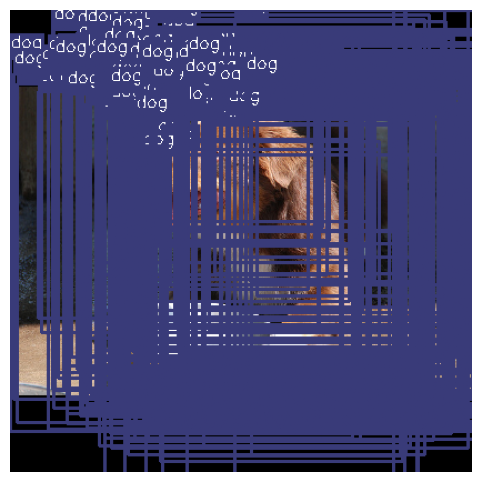

Epoch: 3


  0%|                                                                                                                               | 0/549 [00:07<?, ?it/s, loss=2.29]

batch_idx: 0
==> Saving checkpoint


  0%|▏                                                                                                                    | 1/549 [00:23<3:31:14, 23.13s/it, loss=2.29]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:37<1:38:39, 10.84s/it, loss=2.27]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:44<1:24:39,  9.32s/it, loss=2.27]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:52<1:19:22,  8.75s/it, loss=2.25]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [00:59<1:13:51,  8.16s/it, loss=2.27]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:06<1:09:34,  7.70s/it, loss=2.28]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:13<1:07:46,  7.52s/it, loss=2.27]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:20<1:05:37,  7.29s/it, loss=2.27]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:27<1:05:39,  7.31s/it, loss=2.27]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:34<1:04:21,  7.18s/it, loss=2.27]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:41<1:05:10,  7.28s/it, loss=2.27]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:49<1:06:02,  7.39s/it, loss=2.27]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:56<1:05:40,  7.37s/it, loss=2.27]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [02:04<1:05:51,  7.40s/it, loss=2.26]

batch_idx: 14


  3%|███▍                                                                                                                | 16/549 [02:11<1:05:22,  7.36s/it, loss=2.26]

batch_idx: 15


  3%|███▌                                                                                                                | 17/549 [02:19<1:05:32,  7.39s/it, loss=2.26]

batch_idx: 16


  3%|███▊                                                                                                                | 18/549 [02:26<1:05:13,  7.37s/it, loss=2.26]

batch_idx: 17


  3%|████                                                                                                                | 19/549 [02:33<1:03:57,  7.24s/it, loss=2.26]

batch_idx: 18


  4%|████▏                                                                                                               | 20/549 [02:40<1:04:49,  7.35s/it, loss=2.26]

batch_idx: 19


  4%|████▍                                                                                                               | 21/549 [02:47<1:04:00,  7.27s/it, loss=2.26]

batch_idx: 20


  4%|████▋                                                                                                               | 22/549 [02:55<1:03:43,  7.26s/it, loss=2.26]

batch_idx: 21


  4%|████▊                                                                                                               | 23/549 [03:01<1:02:00,  7.07s/it, loss=2.26]

batch_idx: 22


  4%|█████                                                                                                               | 24/549 [03:08<1:00:56,  6.97s/it, loss=2.26]

batch_idx: 23


  5%|█████▎                                                                                                              | 25/549 [03:15<1:01:53,  7.09s/it, loss=2.26]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:22<1:01:13,  7.02s/it, loss=2.26]

batch_idx: 25


  5%|█████▋                                                                                                              | 27/549 [03:30<1:01:35,  7.08s/it, loss=2.26]

batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:38<1:04:37,  7.44s/it, loss=2.26]

batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:46<1:05:23,  7.55s/it, loss=2.26]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:53<1:04:35,  7.47s/it, loss=2.25]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [04:00<1:03:57,  7.41s/it, loss=2.26]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [04:07<1:03:13,  7.34s/it, loss=2.26]

batch_idx: 31


  6%|██████▉                                                                                                             | 33/549 [04:15<1:03:29,  7.38s/it, loss=2.26]

batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:22<1:02:43,  7.31s/it, loss=2.26]

batch_idx: 33


  6%|███████▍                                                                                                            | 35/549 [04:30<1:03:56,  7.46s/it, loss=2.25]

batch_idx: 34


  7%|███████▌                                                                                                            | 36/549 [04:37<1:03:17,  7.40s/it, loss=2.26]

batch_idx: 35


  7%|███████▊                                                                                                            | 37/549 [04:44<1:01:24,  7.20s/it, loss=2.26]

batch_idx: 36


  7%|████████                                                                                                            | 38/549 [04:51<1:00:58,  7.16s/it, loss=2.26]

batch_idx: 37


  7%|████████▏                                                                                                           | 39/549 [04:58<1:01:01,  7.18s/it, loss=2.26]

batch_idx: 38


  7%|████████▍                                                                                                           | 40/549 [05:05<1:00:34,  7.14s/it, loss=2.25]

batch_idx: 39


  7%|████████▊                                                                                                             | 41/549 [05:12<58:55,  6.96s/it, loss=2.26]

batch_idx: 40


  8%|█████████                                                                                                             | 42/549 [05:19<59:44,  7.07s/it, loss=2.25]

batch_idx: 41


  8%|█████████                                                                                                           | 43/549 [05:26<1:00:32,  7.18s/it, loss=2.25]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:34<1:01:15,  7.28s/it, loss=2.25]

batch_idx: 43


  8%|█████████▌                                                                                                          | 45/549 [05:41<1:01:31,  7.32s/it, loss=2.25]

batch_idx: 44


  8%|█████████▋                                                                                                          | 46/549 [05:48<1:00:31,  7.22s/it, loss=2.25]

batch_idx: 45


  9%|█████████▉                                                                                                          | 47/549 [05:55<1:00:14,  7.20s/it, loss=2.24]

batch_idx: 46


  9%|██████████▏                                                                                                         | 48/549 [06:03<1:00:25,  7.24s/it, loss=2.24]

batch_idx: 47


  9%|██████████▎                                                                                                         | 49/549 [06:10<1:01:02,  7.32s/it, loss=2.24]

batch_idx: 48


  9%|██████████▌                                                                                                         | 50/549 [06:18<1:00:46,  7.31s/it, loss=2.24]

batch_idx: 49


  9%|██████████▉                                                                                                           | 51/549 [06:24<59:09,  7.13s/it, loss=2.24]

batch_idx: 50


  9%|██████████▉                                                                                                         | 52/549 [06:32<1:00:12,  7.27s/it, loss=2.23]

batch_idx: 51


 10%|███████████▏                                                                                                        | 53/549 [06:39<1:00:03,  7.26s/it, loss=2.24]

batch_idx: 52


 10%|███████████▍                                                                                                        | 54/549 [06:46<1:00:06,  7.29s/it, loss=2.23]

batch_idx: 53


 10%|███████████▌                                                                                                        | 55/549 [06:54<1:00:08,  7.31s/it, loss=2.23]

batch_idx: 54
batch_idx: 55


 10%|████████████▎                                                                                                         | 57/549 [07:08<59:49,  7.30s/it, loss=2.23]

batch_idx: 56
batch_idx: 57


 11%|████████████▍                                                                                                       | 59/549 [07:23<1:00:33,  7.41s/it, loss=2.22]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:31<59:58,  7.36s/it, loss=2.23]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:37<58:38,  7.21s/it, loss=2.23]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:44<57:26,  7.08s/it, loss=2.23]

batch_idx: 61


 11%|█████████████▌                                                                                                        | 63/549 [07:51<57:28,  7.10s/it, loss=2.23]

batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [07:58<56:12,  6.95s/it, loss=2.23]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:06<58:15,  7.22s/it, loss=2.23]

batch_idx: 64


 12%|██████████████▏                                                                                                       | 66/549 [08:13<58:28,  7.26s/it, loss=2.23]

batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:20<58:10,  7.24s/it, loss=2.23]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:28<58:23,  7.28s/it, loss=2.22]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:35<58:56,  7.37s/it, loss=2.22]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:43<58:28,  7.33s/it, loss=2.23]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:50<57:52,  7.27s/it, loss=2.23]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [08:57<58:56,  7.41s/it, loss=2.22]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:05<58:50,  7.42s/it, loss=2.22]

batch_idx: 72


 13%|███████████████▉                                                                                                      | 74/549 [09:12<58:45,  7.42s/it, loss=2.22]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:20<59:26,  7.52s/it, loss=2.22]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:27<58:36,  7.43s/it, loss=2.22]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:35<59:35,  7.57s/it, loss=2.22]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:42<57:56,  7.38s/it, loss=2.22]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:49<57:39,  7.36s/it, loss=2.22]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [09:57<57:06,  7.31s/it, loss=2.21]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [10:03<55:30,  7.12s/it, loss=2.21]

batch_idx: 80


 15%|█████████████████▌                                                                                                    | 82/549 [10:10<55:06,  7.08s/it, loss=2.21]

batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:17<54:21,  7.00s/it, loss=2.21]

batch_idx: 82


 15%|██████████████████                                                                                                    | 84/549 [10:24<54:33,  7.04s/it, loss=2.21]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:31<54:33,  7.06s/it, loss=2.21]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:39<55:11,  7.15s/it, loss=2.21]

batch_idx: 85


 16%|██████████████████▊                                                                                                    | 87/549 [10:46<54:50,  7.12s/it, loss=2.2]

batch_idx: 86


 16%|███████████████████                                                                                                    | 88/549 [10:53<55:45,  7.26s/it, loss=2.2]

batch_idx: 87


 16%|███████████████████▎                                                                                                   | 89/549 [11:01<55:35,  7.25s/it, loss=2.2]

batch_idx: 88


 16%|███████████████████▌                                                                                                   | 90/549 [11:08<55:56,  7.31s/it, loss=2.2]

batch_idx: 89


 17%|███████████████████▋                                                                                                   | 91/549 [11:15<54:33,  7.15s/it, loss=2.2]

batch_idx: 90


 17%|███████████████████▉                                                                                                   | 92/549 [11:22<54:21,  7.14s/it, loss=2.2]

batch_idx: 91


 17%|████████████████████▏                                                                                                  | 93/549 [11:29<54:37,  7.19s/it, loss=2.2]

batch_idx: 92


 17%|████████████████████▍                                                                                                  | 94/549 [11:37<55:39,  7.34s/it, loss=2.2]

batch_idx: 93


 17%|████████████████████▌                                                                                                  | 95/549 [11:44<54:22,  7.19s/it, loss=2.2]

batch_idx: 94


 17%|████████████████████▊                                                                                                  | 96/549 [11:50<53:06,  7.03s/it, loss=2.2]

batch_idx: 95


 18%|█████████████████████                                                                                                  | 97/549 [11:57<52:59,  7.03s/it, loss=2.2]

batch_idx: 96


 18%|█████████████████████▏                                                                                                 | 98/549 [12:05<53:38,  7.14s/it, loss=2.2]

batch_idx: 97


 18%|█████████████████████▍                                                                                                 | 99/549 [12:12<54:06,  7.21s/it, loss=2.2]

batch_idx: 98


 18%|█████████████████████▍                                                                                                | 100/549 [12:20<54:50,  7.33s/it, loss=2.2]

batch_idx: 99


 18%|█████████████████████▋                                                                                                | 101/549 [12:27<55:22,  7.42s/it, loss=2.2]

batch_idx: 100


 19%|█████████████████████▉                                                                                                | 102/549 [12:35<55:47,  7.49s/it, loss=2.2]

batch_idx: 101
batch_idx: 102


 19%|██████████████████████▏                                                                                              | 104/549 [12:49<54:19,  7.32s/it, loss=2.19]

batch_idx: 103


 19%|██████████████████████▍                                                                                              | 105/549 [12:57<53:44,  7.26s/it, loss=2.19]

batch_idx: 104


 19%|██████████████████████▌                                                                                              | 106/549 [13:03<52:46,  7.15s/it, loss=2.19]

batch_idx: 105


 19%|██████████████████████▊                                                                                              | 107/549 [13:10<51:01,  6.93s/it, loss=2.19]

batch_idx: 106


 20%|███████████████████████                                                                                              | 108/549 [13:17<51:22,  6.99s/it, loss=2.19]

batch_idx: 107


 20%|███████████████████████▏                                                                                             | 109/549 [13:24<52:20,  7.14s/it, loss=2.19]

batch_idx: 108


 20%|███████████████████████▍                                                                                             | 110/549 [13:32<52:03,  7.11s/it, loss=2.19]

batch_idx: 109


 20%|███████████████████████▋                                                                                             | 111/549 [13:39<52:02,  7.13s/it, loss=2.19]

batch_idx: 110


 20%|███████████████████████▊                                                                                             | 112/549 [13:46<52:43,  7.24s/it, loss=2.19]

batch_idx: 111


 21%|████████████████████████                                                                                             | 113/549 [13:53<52:05,  7.17s/it, loss=2.19]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [14:00<50:31,  6.97s/it, loss=2.19]

batch_idx: 113


 21%|████████████████████████▌                                                                                            | 115/549 [14:07<50:49,  7.03s/it, loss=2.18]

batch_idx: 114


 21%|████████████████████████▋                                                                                            | 116/549 [14:14<51:32,  7.14s/it, loss=2.18]

batch_idx: 115


 21%|████████████████████████▉                                                                                            | 117/549 [14:22<52:35,  7.30s/it, loss=2.18]

batch_idx: 116
batch_idx: 117


 21%|█████████████████████████▏                                                                                           | 118/549 [14:30<53:08,  7.40s/it, loss=2.18]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:43<50:13,  7.02s/it, loss=2.18]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [14:50<49:47,  6.98s/it, loss=2.18]

batch_idx: 120


 22%|██████████████████████████                                                                                           | 122/549 [14:57<50:08,  7.04s/it, loss=2.18]

batch_idx: 121
batch_idx: 122


 23%|██████████████████████████▍                                                                                          | 124/549 [15:12<51:08,  7.22s/it, loss=2.18]

batch_idx: 123


 23%|██████████████████████████▋                                                                                          | 125/549 [15:19<50:41,  7.17s/it, loss=2.18]

batch_idx: 124


 23%|██████████████████████████▊                                                                                          | 126/549 [15:26<51:04,  7.24s/it, loss=2.18]

batch_idx: 125
batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:41<50:07,  7.14s/it, loss=2.18]

batch_idx: 127


 23%|███████████████████████████▍                                                                                         | 129/549 [15:47<48:48,  6.97s/it, loss=2.18]

batch_idx: 128


 24%|███████████████████████████▋                                                                                         | 130/549 [15:54<48:53,  7.00s/it, loss=2.18]

batch_idx: 129


 24%|███████████████████████████▉                                                                                         | 131/549 [16:02<49:53,  7.16s/it, loss=2.17]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [16:09<49:49,  7.17s/it, loss=2.18]

batch_idx: 131


 24%|████████████████████████████▎                                                                                        | 133/549 [16:16<50:17,  7.25s/it, loss=2.18]

batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:25<51:49,  7.49s/it, loss=2.18]

batch_idx: 133


 25%|████████████████████████████▊                                                                                        | 135/549 [16:32<51:29,  7.46s/it, loss=2.18]

batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:39<50:00,  7.26s/it, loss=2.17]

batch_idx: 135


 25%|█████████████████████████████▏                                                                                       | 137/549 [16:46<49:29,  7.21s/it, loss=2.18]

batch_idx: 136
batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [17:00<48:56,  7.16s/it, loss=2.17]

batch_idx: 138


 26%|█████████████████████████████▊                                                                                       | 140/549 [17:07<49:14,  7.22s/it, loss=2.18]

batch_idx: 139
batch_idx: 140


 26%|██████████████████████████████▎                                                                                      | 142/549 [17:21<48:24,  7.14s/it, loss=2.17]

batch_idx: 141


 26%|██████████████████████████████▍                                                                                      | 143/549 [17:29<48:51,  7.22s/it, loss=2.17]

batch_idx: 142
batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:43<49:05,  7.29s/it, loss=2.17]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [17:50<48:02,  7.15s/it, loss=2.17]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [17:57<47:35,  7.10s/it, loss=2.17]

batch_idx: 146
batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [18:12<47:27,  7.12s/it, loss=2.17]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:19<47:23,  7.13s/it, loss=2.17]

batch_idx: 149


 28%|████████████████████████████████▏                                                                                    | 151/549 [18:26<47:45,  7.20s/it, loss=2.17]

batch_idx: 150


 28%|████████████████████████████████▍                                                                                    | 152/549 [18:33<46:57,  7.10s/it, loss=2.17]

batch_idx: 151


 28%|████████████████████████████████▌                                                                                    | 153/549 [18:40<47:06,  7.14s/it, loss=2.16]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [18:47<47:07,  7.16s/it, loss=2.17]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [18:55<47:16,  7.20s/it, loss=2.16]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [19:02<47:47,  7.30s/it, loss=2.16]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [19:09<46:22,  7.10s/it, loss=2.16]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:16<46:32,  7.14s/it, loss=2.16]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:24<47:27,  7.30s/it, loss=2.16]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:31<46:51,  7.23s/it, loss=2.16]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:38<46:24,  7.18s/it, loss=2.16]

batch_idx: 160


 30%|██████████████████████████████████▌                                                                                  | 162/549 [19:45<46:02,  7.14s/it, loss=2.16]

batch_idx: 161


 30%|██████████████████████████████████▋                                                                                  | 163/549 [19:52<46:11,  7.18s/it, loss=2.16]

batch_idx: 162


 30%|██████████████████████████████████▉                                                                                  | 164/549 [20:00<46:53,  7.31s/it, loss=2.16]

batch_idx: 163


 30%|███████████████████████████████████▏                                                                                 | 165/549 [20:07<46:21,  7.24s/it, loss=2.16]

batch_idx: 164


 30%|███████████████████████████████████▍                                                                                 | 166/549 [20:14<46:54,  7.35s/it, loss=2.16]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:21<46:02,  7.23s/it, loss=2.16]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:28<45:05,  7.10s/it, loss=2.16]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:35<44:27,  7.02s/it, loss=2.16]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [20:42<45:12,  7.16s/it, loss=2.15]

batch_idx: 169


 31%|████████████████████████████████████▍                                                                                | 171/549 [20:50<45:18,  7.19s/it, loss=2.15]

batch_idx: 170


 31%|████████████████████████████████████▋                                                                                | 172/549 [20:57<45:19,  7.21s/it, loss=2.15]

batch_idx: 171


 32%|████████████████████████████████████▊                                                                                | 173/549 [21:05<46:43,  7.46s/it, loss=2.15]

batch_idx: 172
batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:20<46:44,  7.50s/it, loss=2.15]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:28<47:19,  7.61s/it, loss=2.15]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [21:36<47:13,  7.62s/it, loss=2.15]

batch_idx: 176


 32%|█████████████████████████████████████▉                                                                               | 178/549 [21:42<45:11,  7.31s/it, loss=2.15]

batch_idx: 177
batch_idx: 178


 33%|██████████████████████████████████████▎                                                                              | 180/549 [21:57<45:00,  7.32s/it, loss=2.15]

batch_idx: 179
batch_idx: 180


 33%|██████████████████████████████████████▌                                                                              | 181/549 [22:04<44:49,  7.31s/it, loss=2.15]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [22:19<44:07,  7.23s/it, loss=2.15]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:26<43:52,  7.21s/it, loss=2.15]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:33<43:57,  7.25s/it, loss=2.15]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:41<44:18,  7.32s/it, loss=2.15]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [22:48<44:27,  7.37s/it, loss=2.14]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [22:56<44:27,  7.39s/it, loss=2.14]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [23:03<44:23,  7.40s/it, loss=2.14]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [23:10<43:26,  7.26s/it, loss=2.14]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [23:17<42:48,  7.18s/it, loss=2.14]

batch_idx: 190
batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:32<43:35,  7.35s/it, loss=2.14]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:39<42:31,  7.19s/it, loss=2.14]

batch_idx: 193
batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [23:53<42:12,  7.17s/it, loss=2.14]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [24:00<42:23,  7.23s/it, loss=2.14]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [24:08<43:04,  7.36s/it, loss=2.14]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [24:16<43:02,  7.38s/it, loss=2.14]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:23<42:29,  7.30s/it, loss=2.14]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:30<42:29,  7.30s/it, loss=2.14]

batch_idx: 200
==> Saving checkpoint


 37%|███████████████████████████████████████████                                                                          | 202/549 [24:51<59:07, 10.22s/it, loss=2.13]

batch_idx: 201


 37%|███████████████████████████████████████████▎                                                                         | 203/549 [24:59<54:42,  9.49s/it, loss=2.13]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [25:06<50:34,  8.80s/it, loss=2.13]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [25:13<46:53,  8.18s/it, loss=2.13]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [25:20<44:26,  7.78s/it, loss=2.13]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:28<44:00,  7.72s/it, loss=2.13]

batch_idx: 206


 38%|████████████████████████████████████████████▎                                                                        | 208/549 [25:35<42:44,  7.52s/it, loss=2.13]

batch_idx: 207


 38%|████████████████████████████████████████████▌                                                                        | 209/549 [25:42<42:14,  7.45s/it, loss=2.13]

batch_idx: 208


 38%|████████████████████████████████████████████▊                                                                        | 210/549 [25:49<41:37,  7.37s/it, loss=2.13]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [25:57<41:43,  7.41s/it, loss=2.13]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [26:04<41:14,  7.34s/it, loss=2.13]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [26:12<41:52,  7.48s/it, loss=2.13]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [26:19<41:04,  7.36s/it, loss=2.13]

batch_idx: 213


 39%|█████████████████████████████████████████████▊                                                                       | 215/549 [26:26<41:13,  7.41s/it, loss=2.13]

batch_idx: 214


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:34<41:12,  7.43s/it, loss=2.13]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [26:40<39:48,  7.19s/it, loss=2.12]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [26:48<39:57,  7.24s/it, loss=2.12]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [26:54<39:09,  7.12s/it, loss=2.12]

batch_idx: 218


 40%|██████████████████████████████████████████████▉                                                                      | 220/549 [27:01<38:15,  6.98s/it, loss=2.12]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [27:08<38:17,  7.00s/it, loss=2.12]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [27:16<38:56,  7.15s/it, loss=2.12]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [27:23<38:47,  7.14s/it, loss=2.12]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:30<38:35,  7.12s/it, loss=2.12]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:37<38:09,  7.07s/it, loss=2.12]

batch_idx: 224
batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [27:51<37:54,  7.06s/it, loss=2.12]

batch_idx: 226


 42%|████████████████████████████████████████████████▌                                                                    | 228/549 [27:58<38:38,  7.22s/it, loss=2.12]

batch_idx: 227
batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [28:14<39:27,  7.42s/it, loss=2.12]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [28:21<38:48,  7.32s/it, loss=2.12]

batch_idx: 230


 42%|█████████████████████████████████████████████████▍                                                                   | 232/549 [28:28<38:32,  7.29s/it, loss=2.12]

batch_idx: 231


 42%|█████████████████████████████████████████████████▋                                                                   | 233/549 [28:35<37:59,  7.21s/it, loss=2.12]

batch_idx: 232


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [28:42<37:20,  7.11s/it, loss=2.12]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [28:50<38:13,  7.30s/it, loss=2.12]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [28:58<39:06,  7.50s/it, loss=2.11]

batch_idx: 235


 43%|██████████████████████████████████████████████████▌                                                                  | 237/549 [29:05<38:25,  7.39s/it, loss=2.11]

batch_idx: 236


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [29:11<37:19,  7.20s/it, loss=2.11]

batch_idx: 237


 44%|██████████████████████████████████████████████████▉                                                                  | 239/549 [29:19<37:33,  7.27s/it, loss=2.11]

batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [29:26<37:43,  7.33s/it, loss=2.11]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:34<37:24,  7.29s/it, loss=2.11]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:41<36:57,  7.22s/it, loss=2.11]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [29:48<36:35,  7.18s/it, loss=2.11]

batch_idx: 242


 44%|████████████████████████████████████████████████████                                                                 | 244/549 [29:55<37:14,  7.33s/it, loss=2.11]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [30:02<36:43,  7.25s/it, loss=2.11]

batch_idx: 244


 45%|████████████████████████████████████████████████████▍                                                                | 246/549 [30:10<36:47,  7.29s/it, loss=2.11]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [30:17<36:40,  7.29s/it, loss=2.11]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [30:24<36:21,  7.25s/it, loss=2.11]

batch_idx: 247


 45%|█████████████████████████████████████████████████████                                                                | 249/549 [30:31<36:00,  7.20s/it, loss=2.11]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▋                                                                | 250/549 [30:39<36:36,  7.35s/it, loss=2.1]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▉                                                                | 251/549 [30:47<36:53,  7.43s/it, loss=2.1]

batch_idx: 250


 46%|██████████████████████████████████████████████████████▏                                                               | 252/549 [30:54<36:15,  7.32s/it, loss=2.1]

batch_idx: 251


 46%|██████████████████████████████████████████████████████▍                                                               | 253/549 [31:01<36:02,  7.30s/it, loss=2.1]

batch_idx: 252


 46%|██████████████████████████████████████████████████████▌                                                               | 254/549 [31:09<37:05,  7.54s/it, loss=2.1]

batch_idx: 253


 46%|██████████████████████████████████████████████████████▊                                                               | 255/549 [31:16<35:47,  7.30s/it, loss=2.1]

batch_idx: 254


 47%|███████████████████████████████████████████████████████                                                               | 256/549 [31:23<36:05,  7.39s/it, loss=2.1]

batch_idx: 255


 47%|███████████████████████████████████████████████████████▏                                                              | 257/549 [31:31<35:39,  7.33s/it, loss=2.1]

batch_idx: 256


 47%|███████████████████████████████████████████████████████▍                                                              | 258/549 [31:38<35:17,  7.28s/it, loss=2.1]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▋                                                              | 259/549 [31:45<34:51,  7.21s/it, loss=2.1]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▉                                                              | 260/549 [31:52<35:00,  7.27s/it, loss=2.1]

batch_idx: 259


 48%|████████████████████████████████████████████████████████                                                              | 261/549 [31:59<34:44,  7.24s/it, loss=2.1]

batch_idx: 260


 48%|████████████████████████████████████████████████████████▎                                                             | 262/549 [32:08<35:58,  7.52s/it, loss=2.1]

batch_idx: 261


 48%|████████████████████████████████████████████████████████▌                                                             | 263/549 [32:14<34:42,  7.28s/it, loss=2.1]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▋                                                             | 264/549 [32:21<33:58,  7.15s/it, loss=2.1]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▉                                                             | 265/549 [32:28<33:38,  7.11s/it, loss=2.1]

batch_idx: 264


 48%|█████████████████████████████████████████████████████████▏                                                            | 266/549 [32:35<33:34,  7.12s/it, loss=2.1]

batch_idx: 265


 49%|█████████████████████████████████████████████████████████▍                                                            | 267/549 [32:42<33:16,  7.08s/it, loss=2.1]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████▌                                                            | 268/549 [32:49<32:57,  7.04s/it, loss=2.1]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [32:57<33:23,  7.16s/it, loss=2.09]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████▌                                                           | 270/549 [33:04<33:34,  7.22s/it, loss=2.09]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▊                                                           | 271/549 [33:11<32:26,  7.00s/it, loss=2.09]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▉                                                           | 272/549 [33:18<32:34,  7.06s/it, loss=2.09]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▏                                                          | 273/549 [33:25<32:09,  6.99s/it, loss=2.09]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▍                                                          | 274/549 [33:32<32:53,  7.18s/it, loss=2.09]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [33:39<32:31,  7.12s/it, loss=2.09]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▊                                                          | 276/549 [33:47<33:11,  7.30s/it, loss=2.09]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████                                                          | 277/549 [33:54<33:12,  7.33s/it, loss=2.09]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [34:01<32:47,  7.26s/it, loss=2.09]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [34:09<33:15,  7.39s/it, loss=2.09]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▋                                                         | 280/549 [34:16<32:06,  7.16s/it, loss=2.09]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▉                                                         | 281/549 [34:23<32:26,  7.26s/it, loss=2.09]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [34:30<31:28,  7.07s/it, loss=2.09]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:37<31:29,  7.10s/it, loss=2.09]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:44<31:31,  7.14s/it, loss=2.09]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [34:52<31:46,  7.22s/it, loss=2.09]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [34:59<31:48,  7.26s/it, loss=2.08]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [35:06<31:22,  7.18s/it, loss=2.08]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [35:13<30:59,  7.12s/it, loss=2.08]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:20<30:59,  7.15s/it, loss=2.08]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:28<31:33,  7.31s/it, loss=2.08]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [35:34<30:31,  7.10s/it, loss=2.08]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [35:42<30:25,  7.10s/it, loss=2.08]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [35:49<30:14,  7.09s/it, loss=2.08]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [35:56<29:55,  7.04s/it, loss=2.08]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [36:03<30:02,  7.10s/it, loss=2.08]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [36:10<30:14,  7.17s/it, loss=2.08]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [36:17<30:07,  7.17s/it, loss=2.08]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:24<29:55,  7.15s/it, loss=2.08]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:32<30:51,  7.41s/it, loss=2.08]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:51<44:34, 10.74s/it, loss=2.08]

batch_idx: 299


 55%|████████████████████████████████████████████████████████████████▏                                                    | 301/549 [36:58<39:53,  9.65s/it, loss=2.08]

batch_idx: 300


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [37:05<36:38,  8.90s/it, loss=2.08]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [37:12<34:00,  8.29s/it, loss=2.08]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [37:20<32:56,  8.07s/it, loss=2.08]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:27<31:56,  7.85s/it, loss=2.08]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [37:34<30:45,  7.59s/it, loss=2.07]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [37:42<30:57,  7.68s/it, loss=2.07]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [37:48<28:58,  7.21s/it, loss=2.07]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [37:55<29:00,  7.25s/it, loss=2.07]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [38:02<28:30,  7.16s/it, loss=2.07]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [38:09<28:08,  7.09s/it, loss=2.07]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [38:16<28:12,  7.14s/it, loss=2.07]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [38:23<27:49,  7.07s/it, loss=2.07]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [38:31<28:13,  7.21s/it, loss=2.07]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [38:38<28:32,  7.32s/it, loss=2.07]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▎                                                 | 316/549 [38:46<28:43,  7.40s/it, loss=2.07]

batch_idx: 315


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 317/549 [38:53<28:11,  7.29s/it, loss=2.07]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▊                                                 | 318/549 [39:00<27:21,  7.11s/it, loss=2.07]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 319/549 [39:07<27:32,  7.18s/it, loss=2.07]

batch_idx: 318


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [39:15<28:10,  7.38s/it, loss=2.07]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [39:22<28:09,  7.41s/it, loss=2.07]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████▌                                                | 322/549 [39:29<27:25,  7.25s/it, loss=2.07]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▊                                                | 323/549 [39:37<27:23,  7.27s/it, loss=2.07]

batch_idx: 322


 59%|█████████████████████████████████████████████████████████████████████                                                | 324/549 [39:44<26:54,  7.18s/it, loss=2.07]

batch_idx: 323
batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [39:58<26:28,  7.12s/it, loss=2.07]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [40:05<26:24,  7.14s/it, loss=2.07]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [40:12<26:45,  7.26s/it, loss=2.07]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████                                               | 329/549 [40:20<26:43,  7.29s/it, loss=2.06]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [40:27<26:57,  7.39s/it, loss=2.06]

batch_idx: 329


 60%|██████████████████████████████████████████████████████████████████████▌                                              | 331/549 [40:35<26:38,  7.33s/it, loss=2.06]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▊                                              | 332/549 [40:42<26:25,  7.31s/it, loss=2.06]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▉                                              | 333/549 [40:49<26:11,  7.28s/it, loss=2.06]

batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [40:56<26:06,  7.28s/it, loss=2.06]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [41:03<25:53,  7.26s/it, loss=2.06]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [41:10<25:27,  7.17s/it, loss=2.06]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [41:18<25:24,  7.19s/it, loss=2.06]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [41:25<25:33,  7.27s/it, loss=2.06]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [41:32<25:21,  7.25s/it, loss=2.06]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [41:40<25:10,  7.23s/it, loss=2.06]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [41:46<24:21,  7.03s/it, loss=2.06]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [41:53<24:38,  7.14s/it, loss=2.06]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [42:01<24:32,  7.15s/it, loss=2.06]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [42:08<24:29,  7.17s/it, loss=2.06]

batch_idx: 343


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 345/549 [42:15<24:46,  7.29s/it, loss=2.06]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [42:22<24:22,  7.20s/it, loss=2.06]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [42:30<24:34,  7.30s/it, loss=2.06]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [42:38<24:57,  7.45s/it, loss=2.06]

batch_idx: 347


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 349/549 [42:45<24:23,  7.32s/it, loss=2.05]

batch_idx: 348


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [42:52<23:55,  7.22s/it, loss=2.05]

batch_idx: 349


 64%|██████████████████████████████████████████████████████████████████████████▊                                          | 351/549 [42:59<23:31,  7.13s/it, loss=2.05]

batch_idx: 350


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [43:06<23:24,  7.13s/it, loss=2.05]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [43:13<23:45,  7.27s/it, loss=2.05]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [43:20<22:59,  7.07s/it, loss=2.05]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [43:27<22:54,  7.08s/it, loss=2.05]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [43:34<22:59,  7.15s/it, loss=2.05]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [43:42<23:20,  7.29s/it, loss=2.05]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [43:50<23:41,  7.44s/it, loss=2.05]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [43:57<23:45,  7.50s/it, loss=2.05]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [44:04<22:58,  7.30s/it, loss=2.05]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [44:11<22:43,  7.25s/it, loss=2.05]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [44:19<22:46,  7.31s/it, loss=2.05]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [44:26<22:32,  7.27s/it, loss=2.05]

batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [44:33<22:20,  7.25s/it, loss=2.05]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [44:41<22:15,  7.26s/it, loss=2.05]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [44:48<22:00,  7.22s/it, loss=2.05]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [44:55<21:56,  7.24s/it, loss=2.04]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [45:02<22:02,  7.31s/it, loss=2.04]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [45:10<22:15,  7.42s/it, loss=2.04]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [45:17<21:37,  7.25s/it, loss=2.04]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [45:24<21:23,  7.21s/it, loss=2.04]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [45:31<21:18,  7.22s/it, loss=2.04]

batch_idx: 371
batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [45:46<20:57,  7.18s/it, loss=2.04]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [45:53<20:49,  7.18s/it, loss=2.04]

batch_idx: 374


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [46:00<20:38,  7.16s/it, loss=2.04]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [46:07<20:38,  7.20s/it, loss=2.04]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [46:14<19:45,  6.94s/it, loss=2.04]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [46:20<19:04,  6.73s/it, loss=2.04]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [46:27<19:31,  6.93s/it, loss=2.04]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▏                                   | 381/549 [46:35<20:16,  7.24s/it, loss=2.04]

batch_idx: 380


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                   | 382/549 [46:42<20:03,  7.21s/it, loss=2.04]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [46:49<19:45,  7.14s/it, loss=2.04]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                   | 384/549 [46:57<19:40,  7.16s/it, loss=2.04]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [47:03<19:04,  6.98s/it, loss=2.04]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 386/549 [47:10<19:03,  7.01s/it, loss=2.04]

batch_idx: 385


 70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 387/549 [47:17<19:09,  7.09s/it, loss=2.03]

batch_idx: 386


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [47:24<18:58,  7.07s/it, loss=2.03]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 389/549 [47:32<19:04,  7.15s/it, loss=2.03]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 390/549 [47:40<19:22,  7.31s/it, loss=2.03]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [47:47<19:11,  7.29s/it, loss=2.03]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [47:54<19:05,  7.30s/it, loss=2.03]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [48:01<18:57,  7.29s/it, loss=2.03]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [48:08<18:33,  7.19s/it, loss=2.03]

batch_idx: 393


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 395/549 [48:16<18:47,  7.32s/it, loss=2.03]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [48:23<18:26,  7.23s/it, loss=2.03]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [48:30<18:34,  7.33s/it, loss=2.03]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [48:37<18:10,  7.22s/it, loss=2.03]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [48:45<18:05,  7.24s/it, loss=2.03]

batch_idx: 398


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:52<17:52,  7.20s/it, loss=2.03]

batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:59<17:52,  7.20s/it, loss=2.03]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [49:21<25:10, 10.28s/it, loss=2.03]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [49:29<23:05,  9.49s/it, loss=2.03]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [49:36<21:06,  8.73s/it, loss=2.03]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [49:43<20:03,  8.35s/it, loss=2.03]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [49:50<19:10,  8.04s/it, loss=2.03]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [49:58<18:39,  7.88s/it, loss=2.02]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [50:06<18:21,  7.81s/it, loss=2.02]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [50:13<18:07,  7.77s/it, loss=2.02]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                             | 410/549 [50:20<17:11,  7.42s/it, loss=2.02]

batch_idx: 409


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 411/549 [50:27<16:48,  7.31s/it, loss=2.02]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [50:34<16:31,  7.24s/it, loss=2.02]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [50:41<16:35,  7.32s/it, loss=2.02]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 414/549 [50:48<16:15,  7.23s/it, loss=2.02]

batch_idx: 413


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 415/549 [50:56<16:17,  7.30s/it, loss=2.02]

batch_idx: 414


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                            | 416/549 [51:03<16:01,  7.23s/it, loss=2.02]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 417/549 [51:10<16:01,  7.28s/it, loss=2.02]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████                            | 418/549 [51:17<15:43,  7.20s/it, loss=2.02]

batch_idx: 417


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [51:24<15:21,  7.09s/it, loss=2.02]

batch_idx: 418


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 420/549 [51:31<15:17,  7.11s/it, loss=2.02]

batch_idx: 419


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                           | 421/549 [51:39<15:10,  7.12s/it, loss=2.02]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [51:46<15:10,  7.17s/it, loss=2.02]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [51:53<14:51,  7.08s/it, loss=2.02]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [51:59<14:09,  6.79s/it, loss=2.02]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [52:06<14:06,  6.83s/it, loss=2.02]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [52:13<14:11,  6.92s/it, loss=2.02]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [52:21<14:39,  7.21s/it, loss=2.02]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [52:28<14:40,  7.28s/it, loss=2.02]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [52:36<14:51,  7.43s/it, loss=2.01]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [52:44<15:10,  7.65s/it, loss=2.01]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 431/549 [52:51<14:48,  7.53s/it, loss=2.01]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████                         | 432/549 [52:58<14:23,  7.38s/it, loss=2.01]

batch_idx: 431


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 433/549 [53:06<14:16,  7.38s/it, loss=2.01]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [53:13<14:00,  7.31s/it, loss=2.01]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [53:20<13:58,  7.36s/it, loss=2.01]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [53:28<13:45,  7.31s/it, loss=2.01]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [53:35<13:30,  7.24s/it, loss=2.01]

batch_idx: 436


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                       | 438/549 [53:42<13:29,  7.29s/it, loss=2.01]

batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [53:50<13:28,  7.35s/it, loss=2.01]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [53:56<13:04,  7.19s/it, loss=2.01]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [54:04<12:57,  7.20s/it, loss=2.01]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [54:11<13:05,  7.34s/it, loss=2.01]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [54:18<12:45,  7.22s/it, loss=2.01]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [54:25<12:37,  7.22s/it, loss=2.01]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 445/549 [54:32<12:22,  7.14s/it, loss=2.01]

batch_idx: 444
batch_idx: 445


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▎                     | 447/549 [54:47<12:03,  7.10s/it, loss=2.01]

batch_idx: 446
batch_idx: 447


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 449/549 [55:00<11:41,  7.02s/it, loss=2.01]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [55:08<11:35,  7.02s/it, loss=2.01]

batch_idx: 449


 82%|████████████████████████████████████████████████████████████████████████████████████████████████                     | 451/549 [55:14<11:23,  6.98s/it, loss=2.01]

batch_idx: 450


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 452/549 [55:21<11:07,  6.88s/it, loss=2.01]

batch_idx: 451


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 453/549 [55:28<11:03,  6.91s/it, loss=2.01]

batch_idx: 452


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 454/549 [55:35<10:57,  6.92s/it, loss=2]

batch_idx: 453


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 455/549 [55:41<10:35,  6.76s/it, loss=2]

batch_idx: 454


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 456/549 [55:48<10:34,  6.82s/it, loss=2]

batch_idx: 455


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 457/549 [55:55<10:36,  6.92s/it, loss=2]

batch_idx: 456


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 458/549 [56:03<10:45,  7.10s/it, loss=2]

batch_idx: 457


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 459/549 [56:11<10:51,  7.24s/it, loss=2]

batch_idx: 458


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 460/549 [56:18<10:50,  7.31s/it, loss=2]

batch_idx: 459


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 461/549 [56:25<10:38,  7.26s/it, loss=2]

batch_idx: 460


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 462/549 [56:33<10:38,  7.33s/it, loss=2]

batch_idx: 461


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 463/549 [56:40<10:33,  7.37s/it, loss=2]

batch_idx: 462


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 464/549 [56:47<10:12,  7.20s/it, loss=2]

batch_idx: 463


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 465/549 [56:54<10:05,  7.21s/it, loss=2]

batch_idx: 464


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 466/549 [57:01<09:56,  7.18s/it, loss=2]

batch_idx: 465


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████                  | 467/549 [57:08<09:38,  7.06s/it, loss=2]

batch_idx: 466


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 468/549 [57:15<09:38,  7.14s/it, loss=2]

batch_idx: 467


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 469/549 [57:23<09:40,  7.26s/it, loss=2]

batch_idx: 468


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 470/549 [57:30<09:24,  7.14s/it, loss=2]

batch_idx: 469


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 471/549 [57:37<09:11,  7.07s/it, loss=2]

batch_idx: 470
batch_idx: 471


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 473/549 [57:52<09:13,  7.28s/it, loss=2]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 474/549 [57:59<08:59,  7.19s/it, loss=1.99]

batch_idx: 473


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 475/549 [58:06<08:54,  7.22s/it, loss=1.99]

batch_idx: 474


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 476/549 [58:13<08:31,  7.01s/it, loss=1.99]

batch_idx: 475


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 477/549 [58:20<08:40,  7.24s/it, loss=1.99]

batch_idx: 476


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 478/549 [58:28<08:34,  7.24s/it, loss=1.99]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████               | 479/549 [58:35<08:24,  7.21s/it, loss=1.99]

batch_idx: 478


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 480/549 [58:42<08:17,  7.21s/it, loss=1.99]

batch_idx: 479


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 481/549 [58:49<08:04,  7.13s/it, loss=1.99]

batch_idx: 480


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 482/549 [58:55<07:40,  6.88s/it, loss=1.99]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 483/549 [59:02<07:33,  6.88s/it, loss=1.99]

batch_idx: 482


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 484/549 [59:09<07:34,  6.99s/it, loss=1.99]

batch_idx: 483


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 485/549 [59:17<07:33,  7.08s/it, loss=1.99]

batch_idx: 484


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 486/549 [59:23<07:18,  6.95s/it, loss=1.99]

batch_idx: 485


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 487/549 [59:30<07:04,  6.85s/it, loss=1.99]

batch_idx: 486


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████             | 488/549 [59:37<06:58,  6.86s/it, loss=1.99]

batch_idx: 487


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 489/549 [59:44<07:02,  7.04s/it, loss=1.99]

batch_idx: 488


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 490/549 [59:50<06:42,  6.82s/it, loss=1.99]

batch_idx: 489


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 491/549 [59:58<06:45,  7.00s/it, loss=1.99]

batch_idx: 490
batch_idx: 491


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 493/549 [1:00:13<06:42,  7.19s/it, loss=1.99]

batch_idx: 492


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 494/549 [1:00:20<06:37,  7.22s/it, loss=1.99]

batch_idx: 493
batch_idx: 494


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 496/549 [1:00:34<06:23,  7.23s/it, loss=1.98]

batch_idx: 495


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [1:00:42<06:17,  7.26s/it, loss=1.98]

batch_idx: 496


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 498/549 [1:00:49<06:07,  7.21s/it, loss=1.98]

batch_idx: 497


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:00:56<06:07,  7.35s/it, loss=1.98]

batch_idx: 498


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:01:04<06:04,  7.44s/it, loss=1.98]

batch_idx: 499


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 501/549 [1:01:11<05:53,  7.37s/it, loss=1.98]

batch_idx: 500


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:01:19<05:44,  7.34s/it, loss=1.98]

batch_idx: 501


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:01:25<05:31,  7.21s/it, loss=1.98]

batch_idx: 502


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 504/549 [1:01:33<05:27,  7.27s/it, loss=1.98]

batch_idx: 503


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:01:40<05:21,  7.32s/it, loss=1.98]

batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 506/549 [1:01:48<05:15,  7.35s/it, loss=1.98]

batch_idx: 505


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:01:55<05:03,  7.23s/it, loss=1.98]

batch_idx: 506


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:02:02<04:54,  7.19s/it, loss=1.98]

batch_idx: 507


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:02:09<04:50,  7.26s/it, loss=1.98]

batch_idx: 508


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:02:16<04:40,  7.20s/it, loss=1.98]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:02:23<04:33,  7.20s/it, loss=1.98]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:02:31<04:25,  7.19s/it, loss=1.98]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:02:38<04:17,  7.15s/it, loss=1.98]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:02:45<04:09,  7.12s/it, loss=1.98]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:02:51<03:58,  7.02s/it, loss=1.98]

batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:02:59<03:53,  7.09s/it, loss=1.98]

batch_idx: 515


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:03:06<03:45,  7.06s/it, loss=1.97]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:03:13<03:37,  7.01s/it, loss=1.97]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:03:20<03:32,  7.08s/it, loss=1.97]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:03:27<03:30,  7.24s/it, loss=1.97]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:03:34<03:21,  7.18s/it, loss=1.97]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:03:42<03:15,  7.24s/it, loss=1.97]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:03:49<03:05,  7.13s/it, loss=1.97]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:03:56<03:01,  7.27s/it, loss=1.97]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:04:04<02:55,  7.32s/it, loss=1.97]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:04:11<02:47,  7.30s/it, loss=1.97]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:04:18<02:41,  7.34s/it, loss=1.97]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:04:26<02:32,  7.26s/it, loss=1.97]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:04:33<02:24,  7.21s/it, loss=1.97]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:04:39<02:14,  7.06s/it, loss=1.97]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:04:47<02:09,  7.21s/it, loss=1.97]

batch_idx: 530


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:04:53<01:59,  7.01s/it, loss=1.97]

batch_idx: 531


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:05:01<01:52,  7.05s/it, loss=1.97]

batch_idx: 532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:05:08<01:47,  7.16s/it, loss=1.97]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:05:15<01:40,  7.16s/it, loss=1.97]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:05:22<01:31,  7.07s/it, loss=1.97]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:05:29<01:24,  7.06s/it, loss=1.96]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:05:36<01:18,  7.17s/it, loss=1.96]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:05:44<01:13,  7.32s/it, loss=1.96]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:05:51<01:05,  7.31s/it, loss=1.96]

batch_idx: 539


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:05:59<00:58,  7.29s/it, loss=1.96]

batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:06:06<00:50,  7.25s/it, loss=1.96]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:06:13<00:43,  7.18s/it, loss=1.96]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:06:20<00:35,  7.13s/it, loss=1.96]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:06:27<00:28,  7.13s/it, loss=1.96]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:06:34<00:21,  7.08s/it, loss=1.96]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:06:41<00:14,  7.04s/it, loss=1.96]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:06:48<00:07,  7.19s/it, loss=1.96]

batch_idx: 547


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:06:49<00:00,  7.30s/it, loss=1.96]

batch_idx: 548
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


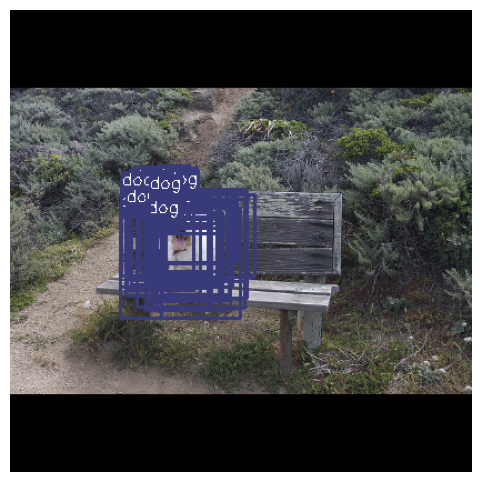

Epoch: 4


  0%|                                                                                                                               | 0/549 [00:06<?, ?it/s, loss=1.51]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:35<2:24:12, 15.82s/it, loss=1.57]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:42<1:47:36, 11.83s/it, loss=1.66]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:49<1:29:32,  9.86s/it, loss=1.66]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:56<1:20:35,  8.89s/it, loss=1.66]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [01:03<1:14:27,  8.23s/it, loss=1.64]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:10<1:11:48,  7.95s/it, loss=1.64]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:18<1:09:34,  7.72s/it, loss=1.64]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:25<1:07:44,  7.53s/it, loss=1.65]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:32<1:06:46,  7.43s/it, loss=1.65]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:39<1:05:25,  7.30s/it, loss=1.64]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:47<1:06:09,  7.39s/it, loss=1.64]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:54<1:05:14,  7.30s/it, loss=1.64]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [02:01<1:04:46,  7.26s/it, loss=1.64]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [02:08<1:04:51,  7.29s/it, loss=1.64]

batch_idx: 14


  3%|███▍                                                                                                                | 16/549 [02:15<1:04:25,  7.25s/it, loss=1.64]

batch_idx: 15


  3%|███▌                                                                                                                | 17/549 [02:23<1:04:15,  7.25s/it, loss=1.65]

batch_idx: 16


  3%|███▊                                                                                                                | 18/549 [02:29<1:01:46,  6.98s/it, loss=1.64]

batch_idx: 17


  3%|████                                                                                                                | 19/549 [02:36<1:01:38,  6.98s/it, loss=1.64]

batch_idx: 18


  4%|████▏                                                                                                               | 20/549 [02:43<1:02:48,  7.12s/it, loss=1.64]

batch_idx: 19


  4%|████▍                                                                                                               | 21/549 [02:51<1:03:19,  7.20s/it, loss=1.64]

batch_idx: 20


  4%|████▋                                                                                                               | 22/549 [02:58<1:03:35,  7.24s/it, loss=1.64]

batch_idx: 21
batch_idx: 22


  4%|████▊                                                                                                               | 23/549 [03:05<1:02:51,  7.17s/it, loss=1.65]

batch_idx: 23


  5%|█████▎                                                                                                              | 25/549 [03:20<1:03:52,  7.31s/it, loss=1.65]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:27<1:02:41,  7.19s/it, loss=1.65]

batch_idx: 25


  5%|█████▋                                                                                                              | 27/549 [03:34<1:03:13,  7.27s/it, loss=1.66]

batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:42<1:03:11,  7.28s/it, loss=1.66]

batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:48<1:00:26,  6.97s/it, loss=1.65]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:55<1:01:06,  7.06s/it, loss=1.65]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [04:02<1:01:17,  7.10s/it, loss=1.65]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [04:09<1:01:07,  7.09s/it, loss=1.65]

batch_idx: 31


  6%|██████▉                                                                                                             | 33/549 [04:16<1:00:08,  6.99s/it, loss=1.65]

batch_idx: 32


  6%|███████▎                                                                                                              | 34/549 [04:23<59:43,  6.96s/it, loss=1.65]

batch_idx: 33


  6%|███████▍                                                                                                            | 35/549 [04:30<1:00:08,  7.02s/it, loss=1.65]

batch_idx: 34


  7%|███████▌                                                                                                            | 36/549 [04:38<1:01:41,  7.22s/it, loss=1.65]

batch_idx: 35


  7%|███████▊                                                                                                            | 37/549 [04:45<1:01:38,  7.22s/it, loss=1.65]

batch_idx: 36


  7%|████████                                                                                                            | 38/549 [04:52<1:00:58,  7.16s/it, loss=1.65]

batch_idx: 37


  7%|████████▏                                                                                                           | 39/549 [04:59<1:01:16,  7.21s/it, loss=1.65]

batch_idx: 38


  7%|████████▍                                                                                                           | 40/549 [05:06<1:00:00,  7.07s/it, loss=1.66]

batch_idx: 39


  7%|████████▋                                                                                                           | 41/549 [05:14<1:01:18,  7.24s/it, loss=1.66]

batch_idx: 40


  8%|████████▊                                                                                                           | 42/549 [05:21<1:01:27,  7.27s/it, loss=1.66]

batch_idx: 41


  8%|█████████                                                                                                           | 43/549 [05:28<1:00:50,  7.22s/it, loss=1.66]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:36<1:00:55,  7.24s/it, loss=1.65]

batch_idx: 43


  8%|█████████▌                                                                                                          | 45/549 [05:43<1:00:22,  7.19s/it, loss=1.65]

batch_idx: 44


  8%|█████████▉                                                                                                            | 46/549 [05:49<58:59,  7.04s/it, loss=1.65]

batch_idx: 45


  9%|██████████                                                                                                            | 47/549 [05:56<58:22,  6.98s/it, loss=1.65]

batch_idx: 46


  9%|██████████▎                                                                                                           | 48/549 [06:03<58:23,  6.99s/it, loss=1.65]

batch_idx: 47


  9%|██████████▌                                                                                                           | 49/549 [06:10<59:01,  7.08s/it, loss=1.66]

batch_idx: 48


  9%|██████████▋                                                                                                           | 50/549 [06:18<59:05,  7.10s/it, loss=1.66]

batch_idx: 49


  9%|██████████▊                                                                                                         | 51/549 [06:25<1:00:08,  7.25s/it, loss=1.66]

batch_idx: 50


  9%|███████████▏                                                                                                          | 52/549 [06:32<59:45,  7.21s/it, loss=1.66]

batch_idx: 51


 10%|███████████▍                                                                                                          | 53/549 [06:39<59:34,  7.21s/it, loss=1.66]

batch_idx: 52


 10%|███████████▌                                                                                                          | 54/549 [06:47<58:58,  7.15s/it, loss=1.65]

batch_idx: 53


 10%|███████████▊                                                                                                          | 55/549 [06:53<57:34,  6.99s/it, loss=1.65]

batch_idx: 54


 10%|████████████                                                                                                          | 56/549 [07:00<57:25,  6.99s/it, loss=1.65]

batch_idx: 55


 10%|████████████▎                                                                                                         | 57/549 [07:07<56:33,  6.90s/it, loss=1.65]

batch_idx: 56


 11%|████████████▍                                                                                                         | 58/549 [07:13<55:45,  6.81s/it, loss=1.65]

batch_idx: 57


 11%|████████████▋                                                                                                         | 59/549 [07:20<55:59,  6.86s/it, loss=1.65]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:28<56:54,  6.98s/it, loss=1.65]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:35<57:55,  7.12s/it, loss=1.65]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:43<58:55,  7.26s/it, loss=1.65]

batch_idx: 61


 11%|█████████████▌                                                                                                        | 63/549 [07:49<57:24,  7.09s/it, loss=1.65]

batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [07:56<56:10,  6.95s/it, loss=1.65]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:03<57:07,  7.08s/it, loss=1.64]

batch_idx: 64


 12%|██████████████▏                                                                                                       | 66/549 [08:11<58:31,  7.27s/it, loss=1.64]

batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:18<57:03,  7.10s/it, loss=1.65]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:25<58:20,  7.28s/it, loss=1.65]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:33<59:01,  7.38s/it, loss=1.64]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:40<57:47,  7.24s/it, loss=1.64]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:47<57:37,  7.23s/it, loss=1.65]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [08:54<57:05,  7.18s/it, loss=1.65]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:02<57:59,  7.31s/it, loss=1.65]

batch_idx: 72


 13%|███████████████▉                                                                                                      | 74/549 [09:09<56:30,  7.14s/it, loss=1.64]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:16<57:02,  7.22s/it, loss=1.64]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:23<56:41,  7.19s/it, loss=1.65]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:31<57:26,  7.30s/it, loss=1.65]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:38<57:43,  7.35s/it, loss=1.65]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:45<56:50,  7.26s/it, loss=1.65]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [09:52<55:49,  7.14s/it, loss=1.65]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [09:59<55:37,  7.13s/it, loss=1.65]

batch_idx: 80


 15%|█████████████████▌                                                                                                    | 82/549 [10:06<54:54,  7.06s/it, loss=1.65]

batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:13<55:31,  7.15s/it, loss=1.65]

batch_idx: 82


 15%|██████████████████                                                                                                    | 84/549 [10:20<53:50,  6.95s/it, loss=1.65]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:28<55:19,  7.16s/it, loss=1.65]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:35<55:27,  7.19s/it, loss=1.65]

batch_idx: 85


 16%|██████████████████▋                                                                                                   | 87/549 [10:42<55:42,  7.23s/it, loss=1.65]

batch_idx: 86
batch_idx: 87


 16%|██████████████████▉                                                                                                   | 88/549 [10:49<55:26,  7.22s/it, loss=1.65]

batch_idx: 88


 16%|███████████████████▎                                                                                                  | 90/549 [11:03<53:03,  6.94s/it, loss=1.64]

batch_idx: 89


 17%|███████████████████▌                                                                                                  | 91/549 [11:09<51:45,  6.78s/it, loss=1.64]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:16<52:00,  6.83s/it, loss=1.64]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:24<53:05,  6.99s/it, loss=1.64]

batch_idx: 92


 17%|████████████████████▏                                                                                                 | 94/549 [11:31<54:41,  7.21s/it, loss=1.64]

batch_idx: 93


 17%|████████████████████▍                                                                                                 | 95/549 [11:38<53:38,  7.09s/it, loss=1.64]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:46<54:15,  7.19s/it, loss=1.64]

batch_idx: 95


 18%|████████████████████▊                                                                                                 | 97/549 [11:52<53:15,  7.07s/it, loss=1.64]

batch_idx: 96


 18%|█████████████████████                                                                                                 | 98/549 [12:00<53:33,  7.13s/it, loss=1.64]

batch_idx: 97


 18%|█████████████████████▎                                                                                                | 99/549 [12:07<53:24,  7.12s/it, loss=1.64]

batch_idx: 98


 18%|█████████████████████▎                                                                                               | 100/549 [12:14<53:36,  7.16s/it, loss=1.64]

batch_idx: 99
batch_idx: 100


 19%|█████████████████████▋                                                                                               | 102/549 [12:28<52:21,  7.03s/it, loss=1.64]

batch_idx: 101


 19%|█████████████████████▉                                                                                               | 103/549 [12:36<54:29,  7.33s/it, loss=1.64]

batch_idx: 102


 19%|██████████████████████▏                                                                                              | 104/549 [12:44<55:05,  7.43s/it, loss=1.64]

batch_idx: 103


 19%|██████████████████████▍                                                                                              | 105/549 [12:50<52:45,  7.13s/it, loss=1.64]

batch_idx: 104


 19%|██████████████████████▌                                                                                              | 106/549 [12:57<53:06,  7.19s/it, loss=1.63]

batch_idx: 105


 19%|██████████████████████▊                                                                                              | 107/549 [13:04<52:55,  7.18s/it, loss=1.63]

batch_idx: 106


 20%|███████████████████████                                                                                              | 108/549 [13:12<53:04,  7.22s/it, loss=1.63]

batch_idx: 107


 20%|███████████████████████▏                                                                                             | 109/549 [13:19<52:28,  7.16s/it, loss=1.63]

batch_idx: 108


 20%|███████████████████████▍                                                                                             | 110/549 [13:26<52:03,  7.12s/it, loss=1.63]

batch_idx: 109


 20%|███████████████████████▋                                                                                             | 111/549 [13:33<51:47,  7.10s/it, loss=1.63]

batch_idx: 110


 20%|███████████████████████▊                                                                                             | 112/549 [13:40<51:25,  7.06s/it, loss=1.64]

batch_idx: 111


 21%|████████████████████████                                                                                             | 113/549 [13:47<51:03,  7.03s/it, loss=1.63]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [13:54<50:38,  6.98s/it, loss=1.64]

batch_idx: 113
batch_idx: 114


 21%|████████████████████████▌                                                                                            | 115/549 [14:01<50:36,  7.00s/it, loss=1.64]

batch_idx: 115


 21%|████████████████████████▉                                                                                            | 117/549 [14:15<51:01,  7.09s/it, loss=1.63]

batch_idx: 116


 21%|█████████████████████████▏                                                                                           | 118/549 [14:22<51:07,  7.12s/it, loss=1.63]

batch_idx: 117


 22%|█████████████████████████▎                                                                                           | 119/549 [14:30<52:14,  7.29s/it, loss=1.63]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:37<52:07,  7.29s/it, loss=1.63]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [14:45<52:47,  7.40s/it, loss=1.63]

batch_idx: 120


 22%|██████████████████████████                                                                                           | 122/549 [14:52<51:43,  7.27s/it, loss=1.63]

batch_idx: 121


 22%|██████████████████████████▏                                                                                          | 123/549 [14:59<50:47,  7.15s/it, loss=1.63]

batch_idx: 122


 23%|██████████████████████████▍                                                                                          | 124/549 [15:05<49:32,  6.99s/it, loss=1.63]

batch_idx: 123


 23%|██████████████████████████▋                                                                                          | 125/549 [15:12<48:26,  6.86s/it, loss=1.63]

batch_idx: 124


 23%|██████████████████████████▊                                                                                          | 126/549 [15:19<48:13,  6.84s/it, loss=1.63]

batch_idx: 125


 23%|███████████████████████████                                                                                          | 127/549 [15:26<48:41,  6.92s/it, loss=1.63]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:33<49:31,  7.06s/it, loss=1.63]

batch_idx: 127


 23%|███████████████████████████▍                                                                                         | 129/549 [15:40<49:10,  7.02s/it, loss=1.63]

batch_idx: 128


 24%|███████████████████████████▋                                                                                         | 130/549 [15:47<48:08,  6.89s/it, loss=1.63]

batch_idx: 129


 24%|███████████████████████████▉                                                                                         | 131/549 [15:54<48:51,  7.01s/it, loss=1.63]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [16:01<48:38,  7.00s/it, loss=1.63]

batch_idx: 131


 24%|████████████████████████████▎                                                                                        | 133/549 [16:08<48:19,  6.97s/it, loss=1.63]

batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:15<49:17,  7.13s/it, loss=1.63]

batch_idx: 133


 25%|████████████████████████████▊                                                                                        | 135/549 [16:22<48:04,  6.97s/it, loss=1.63]

batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:29<48:14,  7.01s/it, loss=1.63]

batch_idx: 135


 25%|█████████████████████████████▏                                                                                       | 137/549 [16:36<47:37,  6.94s/it, loss=1.63]

batch_idx: 136


 25%|█████████████████████████████▍                                                                                       | 138/549 [16:43<47:34,  6.94s/it, loss=1.63]

batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [16:50<47:31,  6.95s/it, loss=1.63]

batch_idx: 138


 26%|█████████████████████████████▊                                                                                       | 140/549 [16:57<48:21,  7.09s/it, loss=1.63]

batch_idx: 139


 26%|██████████████████████████████                                                                                       | 141/549 [17:04<48:19,  7.11s/it, loss=1.63]

batch_idx: 140


 26%|██████████████████████████████▎                                                                                      | 142/549 [17:11<48:25,  7.14s/it, loss=1.63]

batch_idx: 141
batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:26<49:01,  7.26s/it, loss=1.63]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:34<49:18,  7.32s/it, loss=1.63]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [17:41<48:29,  7.22s/it, loss=1.63]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [17:48<48:26,  7.23s/it, loss=1.63]

batch_idx: 146


 27%|███████████████████████████████▌                                                                                     | 148/549 [17:55<48:43,  7.29s/it, loss=1.63]

batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [18:02<48:18,  7.25s/it, loss=1.63]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:10<48:04,  7.23s/it, loss=1.63]

batch_idx: 149


 28%|████████████████████████████████▏                                                                                    | 151/549 [18:17<47:44,  7.20s/it, loss=1.63]

batch_idx: 150


 28%|████████████████████████████████▍                                                                                    | 152/549 [18:24<47:53,  7.24s/it, loss=1.63]

batch_idx: 151


 28%|████████████████████████████████▌                                                                                    | 153/549 [18:31<47:40,  7.22s/it, loss=1.63]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [18:39<47:59,  7.29s/it, loss=1.63]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [18:46<48:13,  7.34s/it, loss=1.63]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [18:53<47:54,  7.31s/it, loss=1.63]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [19:00<46:35,  7.13s/it, loss=1.63]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:07<46:22,  7.12s/it, loss=1.63]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:14<46:25,  7.14s/it, loss=1.63]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:22<47:18,  7.30s/it, loss=1.63]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:29<46:47,  7.24s/it, loss=1.63]

batch_idx: 160


 30%|██████████████████████████████████▌                                                                                  | 162/549 [19:36<46:46,  7.25s/it, loss=1.63]

batch_idx: 161


 30%|██████████████████████████████████▋                                                                                  | 163/549 [19:44<46:19,  7.20s/it, loss=1.63]

batch_idx: 162


 30%|██████████████████████████████████▉                                                                                  | 164/549 [19:51<47:01,  7.33s/it, loss=1.63]

batch_idx: 163


 30%|███████████████████████████████████▏                                                                                 | 165/549 [19:58<46:20,  7.24s/it, loss=1.63]

batch_idx: 164


 30%|███████████████████████████████████▍                                                                                 | 166/549 [20:06<46:38,  7.31s/it, loss=1.62]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:13<46:59,  7.38s/it, loss=1.62]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:20<46:35,  7.34s/it, loss=1.62]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:27<45:15,  7.15s/it, loss=1.62]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [20:33<43:17,  6.85s/it, loss=1.62]

batch_idx: 169


 31%|████████████████████████████████████▍                                                                                | 171/549 [20:40<43:26,  6.90s/it, loss=1.62]

batch_idx: 170


 31%|████████████████████████████████████▋                                                                                | 172/549 [20:47<43:31,  6.93s/it, loss=1.62]

batch_idx: 171


 32%|████████████████████████████████████▊                                                                                | 173/549 [20:55<44:11,  7.05s/it, loss=1.62]

batch_idx: 172


 32%|█████████████████████████████████████                                                                                | 174/549 [21:01<43:36,  6.98s/it, loss=1.62]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:09<44:03,  7.07s/it, loss=1.62]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:16<43:51,  7.05s/it, loss=1.62]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [21:22<42:29,  6.85s/it, loss=1.62]

batch_idx: 176


 32%|█████████████████████████████████████▉                                                                               | 178/549 [21:29<43:07,  6.97s/it, loss=1.62]

batch_idx: 177


 33%|██████████████████████████████████████▏                                                                              | 179/549 [21:37<43:25,  7.04s/it, loss=1.62]

batch_idx: 178


 33%|██████████████████████████████████████▎                                                                              | 180/549 [21:44<43:43,  7.11s/it, loss=1.62]

batch_idx: 179


 33%|██████████████████████████████████████▌                                                                              | 181/549 [21:51<44:11,  7.20s/it, loss=1.62]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [21:58<43:17,  7.08s/it, loss=1.62]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [22:05<42:58,  7.04s/it, loss=1.62]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:12<43:15,  7.11s/it, loss=1.62]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:20<43:25,  7.16s/it, loss=1.62]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:27<43:44,  7.23s/it, loss=1.62]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [22:34<43:34,  7.22s/it, loss=1.62]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [22:41<43:13,  7.18s/it, loss=1.62]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [22:49<43:16,  7.21s/it, loss=1.62]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [22:56<43:08,  7.21s/it, loss=1.62]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [23:04<44:04,  7.39s/it, loss=1.62]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:11<44:33,  7.49s/it, loss=1.62]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:18<43:05,  7.26s/it, loss=1.62]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:25<41:56,  7.09s/it, loss=1.61]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [23:32<41:53,  7.10s/it, loss=1.61]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [23:39<42:19,  7.20s/it, loss=1.61]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [23:46<41:50,  7.13s/it, loss=1.61]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [23:53<41:43,  7.13s/it, loss=1.61]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [24:01<42:28,  7.28s/it, loss=1.61]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:08<42:00,  7.22s/it, loss=1.61]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:15<42:00,  7.22s/it, loss=1.61]

batch_idx: 200
==> Saving checkpoint


 37%|██████████████████████████████████████████▎                                                                        | 202/549 [24:38<1:00:23, 10.44s/it, loss=1.61]

batch_idx: 201


 37%|███████████████████████████████████████████▎                                                                         | 203/549 [24:45<54:21,  9.43s/it, loss=1.61]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [24:52<50:11,  8.73s/it, loss=1.61]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [24:59<47:34,  8.30s/it, loss=1.61]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [25:07<46:18,  8.10s/it, loss=1.61]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:14<43:53,  7.70s/it, loss=1.61]

batch_idx: 206


 38%|████████████████████████████████████████████▎                                                                        | 208/549 [25:21<42:45,  7.52s/it, loss=1.61]

batch_idx: 207
batch_idx: 208


 38%|████████████████████████████████████████████▊                                                                        | 210/549 [25:35<41:05,  7.27s/it, loss=1.61]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [25:43<42:13,  7.49s/it, loss=1.61]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [25:50<41:06,  7.32s/it, loss=1.61]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [25:57<41:35,  7.43s/it, loss=1.61]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [26:05<41:08,  7.37s/it, loss=1.61]

batch_idx: 213


 39%|█████████████████████████████████████████████▊                                                                       | 215/549 [26:12<41:38,  7.48s/it, loss=1.61]

batch_idx: 214


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:20<41:31,  7.48s/it, loss=1.61]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [26:27<40:57,  7.40s/it, loss=1.61]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [26:35<40:56,  7.42s/it, loss=1.61]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [26:42<40:22,  7.34s/it, loss=1.61]

batch_idx: 218


 40%|██████████████████████████████████████████████▉                                                                      | 220/549 [26:49<39:58,  7.29s/it, loss=1.61]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [26:56<39:33,  7.24s/it, loss=1.61]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [27:04<40:10,  7.37s/it, loss=1.61]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [27:11<39:42,  7.31s/it, loss=1.61]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:18<40:02,  7.39s/it, loss=1.61]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:26<39:45,  7.36s/it, loss=1.61]

batch_idx: 224


 41%|████████████████████████████████████████████████▌                                                                     | 226/549 [27:33<40:04,  7.45s/it, loss=1.6]

batch_idx: 225


 41%|████████████████████████████████████████████████▊                                                                     | 227/549 [27:41<40:15,  7.50s/it, loss=1.6]

batch_idx: 226


 42%|█████████████████████████████████████████████████                                                                     | 228/549 [27:48<38:57,  7.28s/it, loss=1.6]

batch_idx: 227


 42%|█████████████████████████████████████████████████▏                                                                    | 229/549 [27:55<37:59,  7.12s/it, loss=1.6]

batch_idx: 228


 42%|█████████████████████████████████████████████████▍                                                                    | 230/549 [28:02<38:04,  7.16s/it, loss=1.6]

batch_idx: 229


 42%|█████████████████████████████████████████████████▋                                                                    | 231/549 [28:09<38:32,  7.27s/it, loss=1.6]

batch_idx: 230


 42%|█████████████████████████████████████████████████▊                                                                    | 232/549 [28:16<38:04,  7.21s/it, loss=1.6]

batch_idx: 231


 42%|██████████████████████████████████████████████████                                                                    | 233/549 [28:23<37:26,  7.11s/it, loss=1.6]

batch_idx: 232


 43%|██████████████████████████████████████████████████▎                                                                   | 234/549 [28:30<36:40,  6.99s/it, loss=1.6]

batch_idx: 233


 43%|██████████████████████████████████████████████████▌                                                                   | 235/549 [28:37<36:38,  7.00s/it, loss=1.6]

batch_idx: 234


 43%|██████████████████████████████████████████████████▋                                                                   | 236/549 [28:44<37:04,  7.11s/it, loss=1.6]

batch_idx: 235


 43%|██████████████████████████████████████████████████▉                                                                   | 237/549 [28:51<36:35,  7.04s/it, loss=1.6]

batch_idx: 236


 43%|███████████████████████████████████████████████████▏                                                                  | 238/549 [28:58<36:18,  7.00s/it, loss=1.6]

batch_idx: 237


 44%|███████████████████████████████████████████████████▎                                                                  | 239/549 [29:06<37:03,  7.17s/it, loss=1.6]

batch_idx: 238


 44%|███████████████████████████████████████████████████▌                                                                  | 240/549 [29:13<36:53,  7.16s/it, loss=1.6]

batch_idx: 239


 44%|███████████████████████████████████████████████████▊                                                                  | 241/549 [29:20<37:03,  7.22s/it, loss=1.6]

batch_idx: 240


 44%|████████████████████████████████████████████████████                                                                  | 242/549 [29:27<36:50,  7.20s/it, loss=1.6]

batch_idx: 241


 44%|████████████████████████████████████████████████████▏                                                                 | 243/549 [29:34<36:25,  7.14s/it, loss=1.6]

batch_idx: 242


 44%|████████████████████████████████████████████████████▍                                                                 | 244/549 [29:41<36:17,  7.14s/it, loss=1.6]

batch_idx: 243


 45%|████████████████████████████████████████████████████▋                                                                 | 245/549 [29:48<35:45,  7.06s/it, loss=1.6]

batch_idx: 244


 45%|████████████████████████████████████████████████████▊                                                                 | 246/549 [29:56<36:48,  7.29s/it, loss=1.6]

batch_idx: 245


 45%|█████████████████████████████████████████████████████                                                                 | 247/549 [30:03<35:28,  7.05s/it, loss=1.6]

batch_idx: 246


 45%|█████████████████████████████████████████████████████▎                                                                | 248/549 [30:10<35:24,  7.06s/it, loss=1.6]

batch_idx: 247


 45%|█████████████████████████████████████████████████████▌                                                                | 249/549 [30:17<35:44,  7.15s/it, loss=1.6]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▋                                                                | 250/549 [30:24<35:50,  7.19s/it, loss=1.6]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▉                                                                | 251/549 [30:33<37:07,  7.47s/it, loss=1.6]

batch_idx: 250


 46%|██████████████████████████████████████████████████████▏                                                               | 252/549 [30:40<36:59,  7.47s/it, loss=1.6]

batch_idx: 251


 46%|██████████████████████████████████████████████████████▍                                                               | 253/549 [30:47<36:26,  7.39s/it, loss=1.6]

batch_idx: 252


 46%|██████████████████████████████████████████████████████▌                                                               | 254/549 [30:54<35:14,  7.17s/it, loss=1.6]

batch_idx: 253
batch_idx: 254


 47%|███████████████████████████████████████████████████████                                                               | 256/549 [31:08<35:12,  7.21s/it, loss=1.6]

batch_idx: 255


 47%|███████████████████████████████████████████████████████▏                                                              | 257/549 [31:16<35:12,  7.24s/it, loss=1.6]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [31:23<35:31,  7.33s/it, loss=1.59]

batch_idx: 257
batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [31:38<35:15,  7.32s/it, loss=1.59]

batch_idx: 259
batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [31:53<35:19,  7.39s/it, loss=1.59]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [32:00<35:28,  7.44s/it, loss=1.59]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▎                                                            | 264/549 [32:07<34:13,  7.21s/it, loss=1.59]

batch_idx: 263
batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [32:21<33:53,  7.18s/it, loss=1.59]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [32:28<33:33,  7.14s/it, loss=1.59]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [32:36<34:00,  7.26s/it, loss=1.59]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [32:43<33:27,  7.17s/it, loss=1.59]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████▌                                                           | 270/549 [32:51<33:52,  7.28s/it, loss=1.59]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▊                                                           | 271/549 [32:58<33:33,  7.24s/it, loss=1.59]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▉                                                           | 272/549 [33:05<33:27,  7.25s/it, loss=1.59]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▏                                                          | 273/549 [33:12<33:40,  7.32s/it, loss=1.59]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▍                                                          | 274/549 [33:20<33:39,  7.34s/it, loss=1.59]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [33:27<33:41,  7.38s/it, loss=1.59]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▊                                                          | 276/549 [33:35<33:32,  7.37s/it, loss=1.59]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████                                                          | 277/549 [33:42<33:38,  7.42s/it, loss=1.59]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [33:50<33:50,  7.49s/it, loss=1.59]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [33:57<33:14,  7.39s/it, loss=1.59]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▋                                                         | 280/549 [34:04<33:11,  7.40s/it, loss=1.58]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▉                                                         | 281/549 [34:11<32:38,  7.31s/it, loss=1.58]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [34:19<32:11,  7.23s/it, loss=1.58]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:26<31:53,  7.19s/it, loss=1.58]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:32<31:16,  7.08s/it, loss=1.58]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [34:40<31:25,  7.14s/it, loss=1.58]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [34:47<31:13,  7.12s/it, loss=1.58]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [34:53<30:31,  6.99s/it, loss=1.58]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [35:01<30:55,  7.11s/it, loss=1.58]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:08<31:18,  7.23s/it, loss=1.58]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:16<31:20,  7.26s/it, loss=1.58]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [35:23<31:08,  7.24s/it, loss=1.58]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [35:30<30:50,  7.20s/it, loss=1.58]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [35:37<30:27,  7.14s/it, loss=1.58]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [35:44<30:45,  7.24s/it, loss=1.58]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [35:51<30:11,  7.13s/it, loss=1.58]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [35:59<30:27,  7.22s/it, loss=1.58]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [36:07<31:04,  7.40s/it, loss=1.58]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:14<30:23,  7.26s/it, loss=1.58]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:20<29:38,  7.11s/it, loss=1.58]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:27<29:12,  7.04s/it, loss=1.58]

batch_idx: 299


 55%|████████████████████████████████████████████████████████████████▏                                                    | 301/549 [36:35<29:33,  7.15s/it, loss=1.58]

batch_idx: 300


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [36:42<29:48,  7.24s/it, loss=1.58]

batch_idx: 301
batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [36:56<28:52,  7.07s/it, loss=1.58]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:02<27:55,  6.87s/it, loss=1.58]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [37:09<28:08,  6.95s/it, loss=1.57]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [37:16<28:10,  6.98s/it, loss=1.57]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [37:24<28:49,  7.18s/it, loss=1.57]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [37:31<28:48,  7.20s/it, loss=1.57]

batch_idx: 308
batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [37:46<28:57,  7.30s/it, loss=1.57]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [37:53<28:29,  7.21s/it, loss=1.57]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [38:00<27:37,  7.02s/it, loss=1.57]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [38:07<27:59,  7.15s/it, loss=1.57]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [38:13<26:37,  6.83s/it, loss=1.57]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▎                                                 | 316/549 [38:21<26:58,  6.95s/it, loss=1.57]

batch_idx: 315


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 317/549 [38:28<26:59,  6.98s/it, loss=1.57]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▊                                                 | 318/549 [38:35<27:15,  7.08s/it, loss=1.57]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 319/549 [38:42<27:29,  7.17s/it, loss=1.57]

batch_idx: 318


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [38:49<27:07,  7.10s/it, loss=1.57]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [38:56<26:45,  7.04s/it, loss=1.57]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████▌                                                | 322/549 [39:04<27:30,  7.27s/it, loss=1.57]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▊                                                | 323/549 [39:12<27:40,  7.35s/it, loss=1.57]

batch_idx: 322
batch_idx: 323


 59%|█████████████████████████████████████████████████████████████████████▎                                               | 325/549 [39:26<27:08,  7.27s/it, loss=1.57]

batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [39:34<28:09,  7.58s/it, loss=1.57]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [39:41<27:12,  7.36s/it, loss=1.57]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [39:48<27:12,  7.39s/it, loss=1.57]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████                                               | 329/549 [39:56<27:04,  7.38s/it, loss=1.57]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [40:03<26:48,  7.34s/it, loss=1.57]

batch_idx: 329


 60%|██████████████████████████████████████████████████████████████████████▌                                              | 331/549 [40:11<26:58,  7.42s/it, loss=1.57]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▊                                              | 332/549 [40:18<26:58,  7.46s/it, loss=1.57]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▉                                              | 333/549 [40:25<26:32,  7.37s/it, loss=1.57]

batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [40:33<26:25,  7.37s/it, loss=1.57]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [40:40<26:05,  7.31s/it, loss=1.57]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [40:47<26:06,  7.36s/it, loss=1.57]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [40:54<25:39,  7.26s/it, loss=1.57]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [41:02<25:24,  7.23s/it, loss=1.57]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [41:09<25:24,  7.26s/it, loss=1.57]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [41:16<24:58,  7.17s/it, loss=1.57]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [41:23<24:31,  7.07s/it, loss=1.56]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [41:30<24:50,  7.20s/it, loss=1.56]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [41:37<24:33,  7.15s/it, loss=1.56]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [41:44<24:27,  7.16s/it, loss=1.56]

batch_idx: 343


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 345/549 [41:51<24:03,  7.07s/it, loss=1.56]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [41:58<23:42,  7.01s/it, loss=1.56]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [42:05<23:48,  7.07s/it, loss=1.56]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [42:13<24:26,  7.30s/it, loss=1.56]

batch_idx: 347


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 349/549 [42:20<23:56,  7.18s/it, loss=1.56]

batch_idx: 348


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [42:27<23:28,  7.08s/it, loss=1.56]

batch_idx: 349


 64%|██████████████████████████████████████████████████████████████████████████▊                                          | 351/549 [42:34<23:32,  7.13s/it, loss=1.56]

batch_idx: 350


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [42:41<23:26,  7.14s/it, loss=1.56]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [42:49<23:33,  7.21s/it, loss=1.56]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [42:55<22:59,  7.08s/it, loss=1.56]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [43:03<23:33,  7.29s/it, loss=1.56]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [43:10<22:56,  7.13s/it, loss=1.56]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [43:17<22:37,  7.07s/it, loss=1.56]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [43:24<22:49,  7.17s/it, loss=1.56]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [43:31<22:34,  7.13s/it, loss=1.56]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [43:38<22:21,  7.10s/it, loss=1.56]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [43:46<22:17,  7.12s/it, loss=1.56]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [43:53<22:54,  7.35s/it, loss=1.56]

batch_idx: 361
batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [44:08<22:39,  7.35s/it, loss=1.56]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [44:15<22:09,  7.22s/it, loss=1.56]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [44:23<22:20,  7.33s/it, loss=1.56]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [44:29<22:20,  7.33s/it, loss=1.56]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [44:29<21:43,  7.16s/it, loss=1.56]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [44:43<21:04,  7.02s/it, loss=1.56]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [44:50<21:14,  7.12s/it, loss=1.56]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [44:58<21:12,  7.15s/it, loss=1.56]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [45:04<20:46,  7.04s/it, loss=1.56]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [45:12<20:43,  7.07s/it, loss=1.55]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [45:19<20:49,  7.14s/it, loss=1.55]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [45:26<20:21,  7.02s/it, loss=1.55]

batch_idx: 374


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [45:33<20:26,  7.09s/it, loss=1.55]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [45:40<20:23,  7.12s/it, loss=1.55]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [45:47<20:01,  7.03s/it, loss=1.55]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [45:54<20:20,  7.18s/it, loss=1.55]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [46:01<20:02,  7.11s/it, loss=1.55]

batch_idx: 379
batch_idx: 380


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                   | 382/549 [46:16<20:02,  7.20s/it, loss=1.55]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [46:23<19:56,  7.21s/it, loss=1.55]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                   | 384/549 [46:31<20:00,  7.28s/it, loss=1.55]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [46:38<20:09,  7.38s/it, loss=1.55]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 386/549 [46:44<19:03,  7.01s/it, loss=1.55]

batch_idx: 385


 70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 387/549 [46:51<18:57,  7.02s/it, loss=1.55]

batch_idx: 386


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [46:59<19:13,  7.17s/it, loss=1.55]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 389/549 [47:06<18:56,  7.10s/it, loss=1.55]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 390/549 [47:13<18:59,  7.17s/it, loss=1.55]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [47:20<18:50,  7.16s/it, loss=1.55]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [47:27<18:27,  7.06s/it, loss=1.55]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [47:34<18:24,  7.08s/it, loss=1.55]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [47:41<18:16,  7.08s/it, loss=1.55]

batch_idx: 393


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 395/549 [47:48<18:09,  7.07s/it, loss=1.55]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [47:56<18:17,  7.18s/it, loss=1.55]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [48:03<18:17,  7.22s/it, loss=1.55]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [48:11<18:25,  7.32s/it, loss=1.55]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [48:18<18:08,  7.26s/it, loss=1.55]

batch_idx: 398


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:25<17:45,  7.15s/it, loss=1.55]

batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:32<17:45,  7.15s/it, loss=1.55]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [49:02<29:32, 12.06s/it, loss=1.55]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [49:10<25:44, 10.58s/it, loss=1.55]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [49:17<23:16,  9.63s/it, loss=1.54]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [49:24<21:29,  8.95s/it, loss=1.54]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [49:31<19:48,  8.31s/it, loss=1.54]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [49:38<18:37,  7.87s/it, loss=1.54]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [49:45<17:51,  7.60s/it, loss=1.54]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [49:52<17:33,  7.53s/it, loss=1.54]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                             | 410/549 [50:00<17:15,  7.45s/it, loss=1.54]

batch_idx: 409


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 411/549 [50:07<16:49,  7.31s/it, loss=1.54]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [50:14<16:41,  7.31s/it, loss=1.54]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [50:21<16:28,  7.27s/it, loss=1.54]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 414/549 [50:29<16:32,  7.35s/it, loss=1.54]

batch_idx: 413


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 415/549 [50:36<16:24,  7.34s/it, loss=1.54]

batch_idx: 414


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                            | 416/549 [50:43<16:03,  7.25s/it, loss=1.54]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 417/549 [50:50<15:39,  7.12s/it, loss=1.54]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████                            | 418/549 [50:56<15:14,  6.98s/it, loss=1.54]

batch_idx: 417


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [51:03<15:05,  6.97s/it, loss=1.54]

batch_idx: 418


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 420/549 [51:10<14:41,  6.83s/it, loss=1.54]

batch_idx: 419


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                           | 421/549 [51:17<15:00,  7.03s/it, loss=1.54]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [51:25<15:03,  7.11s/it, loss=1.54]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [51:32<14:49,  7.06s/it, loss=1.54]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [51:39<15:09,  7.28s/it, loss=1.54]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [51:47<14:58,  7.24s/it, loss=1.54]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [51:53<14:26,  7.05s/it, loss=1.54]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [52:00<14:27,  7.11s/it, loss=1.54]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [52:08<14:35,  7.23s/it, loss=1.54]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [52:15<14:16,  7.13s/it, loss=1.54]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [52:22<14:07,  7.12s/it, loss=1.54]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 431/549 [52:29<13:56,  7.09s/it, loss=1.54]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████                         | 432/549 [52:36<13:41,  7.03s/it, loss=1.54]

batch_idx: 431


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 433/549 [52:43<13:39,  7.06s/it, loss=1.54]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [52:50<13:34,  7.08s/it, loss=1.54]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [52:58<13:46,  7.25s/it, loss=1.54]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [53:05<13:48,  7.33s/it, loss=1.54]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [53:12<13:27,  7.21s/it, loss=1.54]

batch_idx: 436


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                       | 438/549 [53:19<13:12,  7.14s/it, loss=1.54]

batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [53:26<12:51,  7.02s/it, loss=1.54]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [53:33<12:52,  7.09s/it, loss=1.54]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [53:41<12:55,  7.18s/it, loss=1.54]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [53:48<12:44,  7.14s/it, loss=1.53]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [53:55<12:32,  7.10s/it, loss=1.53]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [54:02<12:27,  7.12s/it, loss=1.53]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 445/549 [54:09<12:23,  7.15s/it, loss=1.53]

batch_idx: 444


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 446/549 [54:16<12:04,  7.03s/it, loss=1.53]

batch_idx: 445


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▎                     | 447/549 [54:23<12:00,  7.07s/it, loss=1.53]

batch_idx: 446


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 448/549 [54:30<12:07,  7.21s/it, loss=1.53]

batch_idx: 447


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 449/549 [54:37<11:57,  7.17s/it, loss=1.53]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [54:44<11:42,  7.10s/it, loss=1.53]

batch_idx: 449


 82%|████████████████████████████████████████████████████████████████████████████████████████████████                     | 451/549 [54:51<11:25,  6.99s/it, loss=1.53]

batch_idx: 450


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 452/549 [54:58<11:18,  7.00s/it, loss=1.53]

batch_idx: 451


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 453/549 [55:05<11:15,  7.03s/it, loss=1.53]

batch_idx: 452


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 454/549 [55:12<11:13,  7.09s/it, loss=1.53]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 455/549 [55:20<11:16,  7.20s/it, loss=1.53]

batch_idx: 454


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 456/549 [55:27<10:58,  7.08s/it, loss=1.53]

batch_idx: 455


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 457/549 [55:34<11:03,  7.21s/it, loss=1.53]

batch_idx: 456


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 458/549 [55:42<11:03,  7.30s/it, loss=1.53]

batch_idx: 457


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 459/549 [55:49<10:43,  7.15s/it, loss=1.53]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                   | 460/549 [55:55<10:27,  7.04s/it, loss=1.53]

batch_idx: 459


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 461/549 [56:03<10:29,  7.15s/it, loss=1.53]

batch_idx: 460


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 462/549 [56:10<10:36,  7.31s/it, loss=1.53]

batch_idx: 461


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 463/549 [56:17<10:12,  7.12s/it, loss=1.53]

batch_idx: 462


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 464/549 [56:26<10:45,  7.60s/it, loss=1.53]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                  | 465/549 [56:33<10:17,  7.35s/it, loss=1.53]

batch_idx: 464


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 466/549 [56:40<10:01,  7.24s/it, loss=1.53]

batch_idx: 465


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 467/549 [56:47<10:00,  7.32s/it, loss=1.53]

batch_idx: 466


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 468/549 [56:55<09:58,  7.39s/it, loss=1.53]

batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 469/549 [57:01<09:25,  7.07s/it, loss=1.53]

batch_idx: 468


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 470/549 [57:08<09:19,  7.08s/it, loss=1.53]

batch_idx: 469


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 471/549 [57:15<09:05,  6.99s/it, loss=1.53]

batch_idx: 470


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 472/549 [57:22<09:05,  7.09s/it, loss=1.53]

batch_idx: 471


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 473/549 [57:29<09:02,  7.14s/it, loss=1.53]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 474/549 [57:36<08:42,  6.97s/it, loss=1.53]

batch_idx: 473


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 475/549 [57:43<08:34,  6.96s/it, loss=1.53]

batch_idx: 474


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 476/549 [57:50<08:31,  7.01s/it, loss=1.53]

batch_idx: 475


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 477/549 [57:57<08:19,  6.94s/it, loss=1.53]

batch_idx: 476


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 478/549 [58:04<08:15,  6.98s/it, loss=1.53]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████               | 479/549 [58:11<08:03,  6.90s/it, loss=1.53]

batch_idx: 478


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 480/549 [58:18<08:07,  7.07s/it, loss=1.53]

batch_idx: 479


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 481/549 [58:25<08:04,  7.13s/it, loss=1.52]

batch_idx: 480


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 482/549 [58:33<08:04,  7.23s/it, loss=1.52]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 483/549 [58:40<07:58,  7.26s/it, loss=1.52]

batch_idx: 482


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 484/549 [58:48<08:00,  7.39s/it, loss=1.52]

batch_idx: 483


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 485/549 [58:55<07:47,  7.30s/it, loss=1.52]

batch_idx: 484


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 486/549 [59:02<07:38,  7.28s/it, loss=1.52]

batch_idx: 485
batch_idx: 486


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████             | 488/549 [59:17<07:27,  7.34s/it, loss=1.52]

batch_idx: 487
batch_idx: 488


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 490/549 [59:31<07:05,  7.22s/it, loss=1.52]

batch_idx: 489


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 491/549 [59:39<07:01,  7.26s/it, loss=1.52]

batch_idx: 490


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 492/549 [59:46<06:57,  7.33s/it, loss=1.52]

batch_idx: 491


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████            | 493/549 [59:53<06:49,  7.32s/it, loss=1.52]

batch_idx: 492


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 494/549 [1:00:00<06:37,  7.23s/it, loss=1.52]

batch_idx: 493


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 495/549 [1:00:08<06:32,  7.27s/it, loss=1.52]

batch_idx: 494


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 496/549 [1:00:15<06:24,  7.25s/it, loss=1.52]

batch_idx: 495


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [1:00:22<06:17,  7.27s/it, loss=1.52]

batch_idx: 496


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 498/549 [1:00:29<05:56,  6.99s/it, loss=1.52]

batch_idx: 497


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:00:36<05:58,  7.16s/it, loss=1.52]

batch_idx: 498


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:00:43<05:48,  7.11s/it, loss=1.52]

batch_idx: 499


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 501/549 [1:00:50<05:37,  7.03s/it, loss=1.52]

batch_idx: 500


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:00:57<05:31,  7.06s/it, loss=1.52]

batch_idx: 501


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:01:04<05:23,  7.04s/it, loss=1.52]

batch_idx: 502


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 504/549 [1:01:11<05:13,  6.97s/it, loss=1.52]

batch_idx: 503


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:01:18<05:09,  7.03s/it, loss=1.52]

batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 506/549 [1:01:26<05:07,  7.16s/it, loss=1.52]

batch_idx: 505


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:01:33<05:03,  7.23s/it, loss=1.52]

batch_idx: 506


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:01:40<04:57,  7.25s/it, loss=1.52]

batch_idx: 507


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:01:47<04:39,  7.00s/it, loss=1.52]

batch_idx: 508


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:01:54<04:38,  7.13s/it, loss=1.52]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:02:01<04:31,  7.15s/it, loss=1.52]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:02:09<04:27,  7.22s/it, loss=1.52]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:02:16<04:19,  7.21s/it, loss=1.52]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:02:24<04:17,  7.35s/it, loss=1.52]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:02:31<04:05,  7.21s/it, loss=1.52]

batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:02:38<04:00,  7.30s/it, loss=1.52]

batch_idx: 515


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:02:45<03:51,  7.25s/it, loss=1.52]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:02:53<03:47,  7.34s/it, loss=1.52]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:03:00<03:39,  7.31s/it, loss=1.52]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:03:07<03:27,  7.15s/it, loss=1.52]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:03:14<03:18,  7.07s/it, loss=1.52]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:03:21<03:10,  7.06s/it, loss=1.51]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:03:28<03:05,  7.14s/it, loss=1.51]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:03:35<02:57,  7.10s/it, loss=1.51]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:03:43<02:54,  7.25s/it, loss=1.51]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:03:49<02:43,  7.11s/it, loss=1.51]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:03:56<02:32,  6.94s/it, loss=1.51]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:04:04<02:30,  7.16s/it, loss=1.51]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:04:11<02:26,  7.32s/it, loss=1.51]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:04:18<02:16,  7.16s/it, loss=1.51]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:04:25<02:08,  7.13s/it, loss=1.51]

batch_idx: 530


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:04:32<02:00,  7.06s/it, loss=1.51]

batch_idx: 531


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:04:39<01:52,  7.03s/it, loss=1.51]

batch_idx: 532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:04:46<01:45,  7.01s/it, loss=1.51]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:04:54<01:40,  7.18s/it, loss=1.51]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:05:01<01:32,  7.12s/it, loss=1.51]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:05:08<01:25,  7.13s/it, loss=1.51]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:05:16<01:21,  7.39s/it, loss=1.51]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:05:22<01:11,  7.13s/it, loss=1.51]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:05:29<01:03,  7.03s/it, loss=1.51]

batch_idx: 539


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:05:37<00:58,  7.30s/it, loss=1.51]

batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:05:44<00:50,  7.20s/it, loss=1.51]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:05:51<00:43,  7.22s/it, loss=1.51]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:05:59<00:36,  7.27s/it, loss=1.51]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:06:06<00:29,  7.25s/it, loss=1.51]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:06:13<00:21,  7.20s/it, loss=1.51]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:06:20<00:14,  7.14s/it, loss=1.51]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:06:27<00:07,  7.15s/it, loss=1.51]

batch_idx: 547


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:06:28<00:00,  7.26s/it, loss=1.51]

batch_idx: 548
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


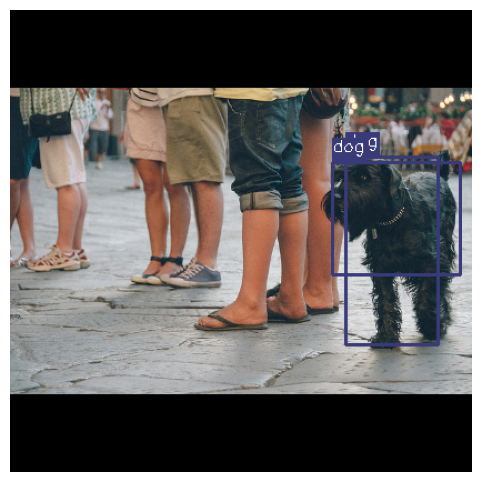

Epoch: 5


  0%|                                                                                                                               | 0/549 [00:07<?, ?it/s, loss=1.45]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:35<2:26:01, 16.02s/it, loss=1.41]

batch_idx: 1


  1%|▋                                                                                                                     | 3/549 [00:42<1:47:49, 11.85s/it, loss=1.4]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:50<1:32:20, 10.17s/it, loss=1.35]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:57<1:21:25,  8.98s/it, loss=1.34]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [01:04<1:16:20,  8.44s/it, loss=1.32]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:11<1:12:18,  8.00s/it, loss=1.32]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:18<1:08:29,  7.60s/it, loss=1.31]

batch_idx: 7


  2%|█▉                                                                                                                    | 9/549 [01:25<1:07:57,  7.55s/it, loss=1.3]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:32<1:06:01,  7.35s/it, loss=1.31]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:39<1:05:19,  7.29s/it, loss=1.31]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:46<1:04:23,  7.19s/it, loss=1.32]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:53<1:03:55,  7.16s/it, loss=1.32]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [02:01<1:04:03,  7.18s/it, loss=1.32]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [02:08<1:04:10,  7.21s/it, loss=1.32]

batch_idx: 14


  3%|███▍                                                                                                                | 16/549 [02:15<1:04:17,  7.24s/it, loss=1.34]

batch_idx: 15


  3%|███▌                                                                                                                | 17/549 [02:22<1:02:27,  7.04s/it, loss=1.33]

batch_idx: 16


  3%|███▊                                                                                                                | 18/549 [02:29<1:03:01,  7.12s/it, loss=1.33]

batch_idx: 17


  3%|████                                                                                                                | 19/549 [02:36<1:02:00,  7.02s/it, loss=1.35]

batch_idx: 18


  4%|████▏                                                                                                               | 20/549 [02:44<1:03:30,  7.20s/it, loss=1.34]

batch_idx: 19


  4%|████▍                                                                                                               | 21/549 [02:50<1:00:49,  6.91s/it, loss=1.33]

batch_idx: 20


  4%|████▋                                                                                                               | 22/549 [02:57<1:01:32,  7.01s/it, loss=1.33]

batch_idx: 21


  4%|████▊                                                                                                               | 23/549 [03:04<1:02:30,  7.13s/it, loss=1.33]

batch_idx: 22


  4%|█████                                                                                                               | 24/549 [03:11<1:01:21,  7.01s/it, loss=1.32]

batch_idx: 23


  5%|█████▎                                                                                                                | 25/549 [03:18<59:41,  6.83s/it, loss=1.32]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:25<1:00:45,  6.97s/it, loss=1.32]

batch_idx: 25


  5%|█████▋                                                                                                              | 27/549 [03:32<1:01:06,  7.02s/it, loss=1.31]

batch_idx: 26
batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:46<1:01:18,  7.07s/it, loss=1.31]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:54<1:01:42,  7.13s/it, loss=1.31]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [04:00<1:00:48,  7.04s/it, loss=1.31]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [04:08<1:01:44,  7.17s/it, loss=1.32]

batch_idx: 31


  6%|██████▉                                                                                                             | 33/549 [04:16<1:02:59,  7.32s/it, loss=1.32]

batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:22<1:01:48,  7.20s/it, loss=1.32]

batch_idx: 33


  6%|███████▌                                                                                                              | 35/549 [04:28<58:16,  6.80s/it, loss=1.32]

batch_idx: 34


  7%|███████▋                                                                                                              | 36/549 [04:36<59:19,  6.94s/it, loss=1.32]

batch_idx: 35


  7%|███████▊                                                                                                            | 37/549 [04:43<1:00:20,  7.07s/it, loss=1.32]

batch_idx: 36


  7%|████████                                                                                                            | 38/549 [04:51<1:01:47,  7.25s/it, loss=1.32]

batch_idx: 37


  7%|████████▏                                                                                                           | 39/549 [04:58<1:01:10,  7.20s/it, loss=1.32]

batch_idx: 38


  7%|████████▍                                                                                                           | 40/549 [05:05<1:02:26,  7.36s/it, loss=1.32]

batch_idx: 39


  7%|████████▋                                                                                                           | 41/549 [05:13<1:02:44,  7.41s/it, loss=1.32]

batch_idx: 40


  8%|████████▊                                                                                                           | 42/549 [05:20<1:02:08,  7.36s/it, loss=1.32]

batch_idx: 41


  8%|█████████                                                                                                           | 43/549 [05:28<1:03:27,  7.52s/it, loss=1.33]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:35<1:00:53,  7.23s/it, loss=1.33]

batch_idx: 43


  8%|█████████▌                                                                                                          | 45/549 [05:42<1:00:24,  7.19s/it, loss=1.32]

batch_idx: 44


  8%|█████████▉                                                                                                            | 46/549 [05:48<58:21,  6.96s/it, loss=1.33]

batch_idx: 45


  9%|██████████                                                                                                            | 47/549 [05:55<58:29,  6.99s/it, loss=1.32]

batch_idx: 46


  9%|██████████▎                                                                                                           | 48/549 [06:03<59:57,  7.18s/it, loss=1.33]

batch_idx: 47


  9%|██████████▌                                                                                                           | 49/549 [06:10<59:13,  7.11s/it, loss=1.32]

batch_idx: 48


  9%|██████████▋                                                                                                           | 50/549 [06:17<58:16,  7.01s/it, loss=1.32]

batch_idx: 49


  9%|██████████▉                                                                                                           | 51/549 [06:23<57:18,  6.90s/it, loss=1.32]

batch_idx: 50


  9%|███████████▏                                                                                                          | 52/549 [06:30<57:19,  6.92s/it, loss=1.32]

batch_idx: 51


 10%|███████████▍                                                                                                          | 53/549 [06:37<57:25,  6.95s/it, loss=1.32]

batch_idx: 52


 10%|███████████▌                                                                                                          | 54/549 [06:44<57:45,  7.00s/it, loss=1.32]

batch_idx: 53


 10%|███████████▊                                                                                                          | 55/549 [06:51<57:45,  7.02s/it, loss=1.32]

batch_idx: 54


 10%|████████████                                                                                                          | 56/549 [06:59<58:30,  7.12s/it, loss=1.32]

batch_idx: 55


 10%|████████████▎                                                                                                         | 57/549 [07:06<58:27,  7.13s/it, loss=1.32]

batch_idx: 56


 11%|████████████▍                                                                                                         | 58/549 [07:13<59:22,  7.26s/it, loss=1.32]

batch_idx: 57


 11%|████████████▋                                                                                                         | 59/549 [07:21<59:18,  7.26s/it, loss=1.32]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:28<59:31,  7.30s/it, loss=1.32]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:35<59:08,  7.27s/it, loss=1.32]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:43<59:24,  7.32s/it, loss=1.32]

batch_idx: 61


 11%|█████████████▌                                                                                                        | 63/549 [07:50<59:31,  7.35s/it, loss=1.32]

batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [07:57<59:17,  7.33s/it, loss=1.32]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:05<58:55,  7.31s/it, loss=1.32]

batch_idx: 64


 12%|██████████████▏                                                                                                       | 66/549 [08:11<57:10,  7.10s/it, loss=1.31]

batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:18<57:10,  7.12s/it, loss=1.31]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:26<57:13,  7.14s/it, loss=1.31]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:33<56:36,  7.08s/it, loss=1.31]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:40<56:49,  7.12s/it, loss=1.32]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:46<55:07,  6.92s/it, loss=1.32]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [08:53<55:12,  6.94s/it, loss=1.32]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:01<55:50,  7.04s/it, loss=1.31]

batch_idx: 72


 13%|███████████████▉                                                                                                      | 74/549 [09:08<56:28,  7.13s/it, loss=1.32]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:16<57:59,  7.34s/it, loss=1.32]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:23<57:34,  7.30s/it, loss=1.31]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:31<58:14,  7.40s/it, loss=1.31]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:38<57:56,  7.38s/it, loss=1.32]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:45<56:40,  7.23s/it, loss=1.32]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [09:53<58:10,  7.44s/it, loss=1.31]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [10:00<57:01,  7.31s/it, loss=1.31]

batch_idx: 80
batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:14<56:14,  7.24s/it, loss=1.31]

batch_idx: 82


 15%|██████████████████                                                                                                    | 84/549 [10:21<55:37,  7.18s/it, loss=1.31]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:28<54:50,  7.09s/it, loss=1.31]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:35<55:31,  7.20s/it, loss=1.31]

batch_idx: 85
batch_idx: 86


 16%|██████████████████▉                                                                                                   | 88/549 [10:50<56:05,  7.30s/it, loss=1.31]

batch_idx: 87


 16%|███████████████████▏                                                                                                  | 89/549 [10:57<55:39,  7.26s/it, loss=1.31]

batch_idx: 88


 16%|███████████████████▎                                                                                                  | 90/549 [11:04<55:07,  7.21s/it, loss=1.31]

batch_idx: 89


 17%|███████████████████▌                                                                                                  | 91/549 [11:11<54:01,  7.08s/it, loss=1.31]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:19<54:43,  7.18s/it, loss=1.31]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:26<54:21,  7.15s/it, loss=1.31]

batch_idx: 92


 17%|████████████████████▏                                                                                                 | 94/549 [11:33<54:01,  7.12s/it, loss=1.31]

batch_idx: 93


 17%|████████████████████▍                                                                                                 | 95/549 [11:40<53:05,  7.02s/it, loss=1.31]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:47<52:58,  7.02s/it, loss=1.31]

batch_idx: 95


 18%|████████████████████▊                                                                                                 | 97/549 [11:53<51:41,  6.86s/it, loss=1.31]

batch_idx: 96


 18%|█████████████████████                                                                                                 | 98/549 [12:00<52:30,  6.99s/it, loss=1.31]

batch_idx: 97


 18%|█████████████████████▍                                                                                                 | 99/549 [12:07<52:41,  7.03s/it, loss=1.3]

batch_idx: 98


 18%|█████████████████████▎                                                                                               | 100/549 [12:14<52:02,  6.96s/it, loss=1.31]

batch_idx: 99


 18%|█████████████████████▌                                                                                               | 101/549 [12:21<51:56,  6.96s/it, loss=1.31]

batch_idx: 100


 19%|█████████████████████▋                                                                                               | 102/549 [12:28<51:33,  6.92s/it, loss=1.31]

batch_idx: 101


 19%|█████████████████████▉                                                                                               | 103/549 [12:35<51:46,  6.96s/it, loss=1.31]

batch_idx: 102


 19%|██████████████████████▏                                                                                              | 104/549 [12:42<52:15,  7.05s/it, loss=1.31]

batch_idx: 103


 19%|██████████████████████▍                                                                                              | 105/549 [12:49<52:16,  7.06s/it, loss=1.31]

batch_idx: 104


 19%|██████████████████████▊                                                                                               | 106/549 [12:57<53:32,  7.25s/it, loss=1.3]

batch_idx: 105


 19%|██████████████████████▉                                                                                               | 107/549 [13:04<52:36,  7.14s/it, loss=1.3]

batch_idx: 106


 20%|███████████████████████▏                                                                                              | 108/549 [13:11<52:53,  7.20s/it, loss=1.3]

batch_idx: 107


 20%|███████████████████████▍                                                                                              | 109/549 [13:18<52:15,  7.13s/it, loss=1.3]

batch_idx: 108


 20%|███████████████████████▋                                                                                              | 110/549 [13:25<50:11,  6.86s/it, loss=1.3]

batch_idx: 109


 20%|███████████████████████▊                                                                                              | 111/549 [13:32<52:19,  7.17s/it, loss=1.3]

batch_idx: 110


 20%|████████████████████████                                                                                              | 112/549 [13:40<52:41,  7.23s/it, loss=1.3]

batch_idx: 111


 21%|████████████████████████▎                                                                                             | 113/549 [13:47<53:17,  7.33s/it, loss=1.3]

batch_idx: 112


 21%|████████████████████████▌                                                                                             | 114/549 [13:54<52:38,  7.26s/it, loss=1.3]

batch_idx: 113


 21%|████████████████████████▋                                                                                             | 115/549 [14:01<50:48,  7.02s/it, loss=1.3]

batch_idx: 114


 21%|████████████████████████▉                                                                                             | 116/549 [14:08<50:04,  6.94s/it, loss=1.3]

batch_idx: 115


 21%|█████████████████████████▏                                                                                            | 117/549 [14:15<50:32,  7.02s/it, loss=1.3]

batch_idx: 116


 21%|█████████████████████████▎                                                                                            | 118/549 [14:22<50:06,  6.97s/it, loss=1.3]

batch_idx: 117


 22%|█████████████████████████▎                                                                                           | 119/549 [14:30<51:42,  7.22s/it, loss=1.29]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:37<53:02,  7.42s/it, loss=1.29]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [14:45<52:46,  7.40s/it, loss=1.29]

batch_idx: 120


 22%|██████████████████████████▏                                                                                           | 122/549 [14:52<52:42,  7.41s/it, loss=1.3]

batch_idx: 121


 22%|██████████████████████████▍                                                                                           | 123/549 [14:59<51:43,  7.29s/it, loss=1.3]

batch_idx: 122


 23%|██████████████████████████▋                                                                                           | 124/549 [15:07<52:43,  7.44s/it, loss=1.3]

batch_idx: 123


 23%|██████████████████████████▋                                                                                          | 125/549 [15:14<51:54,  7.35s/it, loss=1.29]

batch_idx: 124


 23%|███████████████████████████                                                                                           | 126/549 [15:21<50:50,  7.21s/it, loss=1.3]

batch_idx: 125


 23%|███████████████████████████▎                                                                                          | 127/549 [15:28<51:03,  7.26s/it, loss=1.3]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:36<51:22,  7.32s/it, loss=1.29]

batch_idx: 127


 23%|███████████████████████████▋                                                                                          | 129/549 [15:43<51:50,  7.41s/it, loss=1.3]

batch_idx: 128


 24%|███████████████████████████▉                                                                                          | 130/549 [15:51<51:50,  7.42s/it, loss=1.3]

batch_idx: 129


 24%|████████████████████████████▏                                                                                         | 131/549 [15:59<52:10,  7.49s/it, loss=1.3]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [16:05<50:31,  7.27s/it, loss=1.29]

batch_idx: 131


 24%|████████████████████████████▎                                                                                        | 133/549 [16:12<50:05,  7.22s/it, loss=1.29]

batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:19<49:14,  7.12s/it, loss=1.29]

batch_idx: 133


 25%|████████████████████████████▊                                                                                        | 135/549 [16:27<49:20,  7.15s/it, loss=1.29]

batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:34<50:02,  7.27s/it, loss=1.29]

batch_idx: 135


 25%|█████████████████████████████▍                                                                                        | 137/549 [16:42<50:26,  7.35s/it, loss=1.3]

batch_idx: 136


 25%|█████████████████████████████▍                                                                                       | 138/549 [16:48<49:04,  7.17s/it, loss=1.29]

batch_idx: 137


 26%|██████████████████████████████▌                                                                                       | 142/549 [17:17<49:10,  7.25s/it, loss=1.3]

batch_idx: 141


 26%|██████████████████████████████▋                                                                                       | 143/549 [17:25<49:14,  7.28s/it, loss=1.3]

batch_idx: 142


 26%|██████████████████████████████▉                                                                                       | 144/549 [17:31<47:52,  7.09s/it, loss=1.3]

batch_idx: 143


 26%|███████████████████████████████▏                                                                                      | 145/549 [17:38<47:18,  7.03s/it, loss=1.3]

batch_idx: 144


 27%|███████████████████████████████▍                                                                                      | 146/549 [17:46<48:51,  7.27s/it, loss=1.3]

batch_idx: 145


 27%|███████████████████████████████▌                                                                                      | 147/549 [17:53<48:34,  7.25s/it, loss=1.3]

batch_idx: 146


 27%|███████████████████████████████▊                                                                                      | 148/549 [18:01<49:23,  7.39s/it, loss=1.3]

batch_idx: 147


 27%|████████████████████████████████                                                                                      | 149/549 [18:08<47:18,  7.10s/it, loss=1.3]

batch_idx: 148


 27%|████████████████████████████████▏                                                                                     | 150/549 [18:15<47:00,  7.07s/it, loss=1.3]

batch_idx: 149


 28%|████████████████████████████████▍                                                                                     | 151/549 [18:22<47:09,  7.11s/it, loss=1.3]

batch_idx: 150


 28%|████████████████████████████████▋                                                                                     | 152/549 [18:29<46:56,  7.09s/it, loss=1.3]

batch_idx: 151


 28%|████████████████████████████████▉                                                                                     | 153/549 [18:36<47:07,  7.14s/it, loss=1.3]

batch_idx: 152


 28%|█████████████████████████████████                                                                                     | 154/549 [18:43<46:21,  7.04s/it, loss=1.3]

batch_idx: 153


 28%|█████████████████████████████████▎                                                                                    | 155/549 [18:50<46:19,  7.06s/it, loss=1.3]

batch_idx: 154


 28%|█████████████████████████████████▌                                                                                    | 156/549 [18:57<45:41,  6.98s/it, loss=1.3]

batch_idx: 155


 29%|█████████████████████████████████▋                                                                                    | 157/549 [19:04<46:28,  7.11s/it, loss=1.3]

batch_idx: 156


 29%|█████████████████████████████████▉                                                                                    | 158/549 [19:11<46:32,  7.14s/it, loss=1.3]

batch_idx: 157


 29%|██████████████████████████████████▏                                                                                   | 159/549 [19:19<46:21,  7.13s/it, loss=1.3]

batch_idx: 158


 29%|██████████████████████████████████▍                                                                                   | 160/549 [19:26<46:34,  7.18s/it, loss=1.3]

batch_idx: 159


 29%|██████████████████████████████████▌                                                                                   | 161/549 [19:33<46:31,  7.20s/it, loss=1.3]

batch_idx: 160


 30%|██████████████████████████████████▊                                                                                   | 162/549 [19:40<46:55,  7.28s/it, loss=1.3]

batch_idx: 161


 30%|███████████████████████████████████                                                                                   | 163/549 [19:48<47:29,  7.38s/it, loss=1.3]

batch_idx: 162


 30%|███████████████████████████████████▏                                                                                  | 164/549 [19:55<47:01,  7.33s/it, loss=1.3]

batch_idx: 163


 30%|███████████████████████████████████▍                                                                                  | 165/549 [20:02<46:08,  7.21s/it, loss=1.3]

batch_idx: 164


 30%|███████████████████████████████████▋                                                                                  | 166/549 [20:10<46:09,  7.23s/it, loss=1.3]

batch_idx: 165


 30%|███████████████████████████████████▉                                                                                  | 167/549 [20:16<45:23,  7.13s/it, loss=1.3]

batch_idx: 166


 31%|████████████████████████████████████                                                                                  | 168/549 [20:24<45:23,  7.15s/it, loss=1.3]

batch_idx: 167


 31%|████████████████████████████████████▎                                                                                 | 169/549 [20:31<45:37,  7.20s/it, loss=1.3]

batch_idx: 168


 31%|████████████████████████████████████▌                                                                                 | 170/549 [20:38<45:18,  7.17s/it, loss=1.3]

batch_idx: 169


 31%|████████████████████████████████████▊                                                                                 | 171/549 [20:45<44:54,  7.13s/it, loss=1.3]

batch_idx: 170


 31%|████████████████████████████████████▉                                                                                 | 172/549 [20:53<46:06,  7.34s/it, loss=1.3]

batch_idx: 171


 32%|█████████████████████████████████████▏                                                                                | 173/549 [21:00<45:13,  7.22s/it, loss=1.3]

batch_idx: 172


 32%|█████████████████████████████████████                                                                                | 174/549 [21:07<44:56,  7.19s/it, loss=1.29]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:14<43:49,  7.03s/it, loss=1.29]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:21<43:53,  7.06s/it, loss=1.29]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [21:28<44:06,  7.11s/it, loss=1.29]

batch_idx: 176


 32%|█████████████████████████████████████▉                                                                               | 178/549 [21:34<42:35,  6.89s/it, loss=1.29]

batch_idx: 177


 33%|██████████████████████████████████████▎                                                                              | 180/549 [21:49<43:09,  7.02s/it, loss=1.29]

batch_idx: 179


 33%|██████████████████████████████████████▌                                                                              | 181/549 [21:56<43:48,  7.14s/it, loss=1.29]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [22:03<43:10,  7.06s/it, loss=1.29]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [22:10<43:01,  7.05s/it, loss=1.29]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:17<43:31,  7.15s/it, loss=1.29]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:24<42:23,  6.99s/it, loss=1.29]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:31<42:47,  7.07s/it, loss=1.29]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [22:39<43:14,  7.17s/it, loss=1.29]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [22:46<43:26,  7.22s/it, loss=1.29]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [22:53<43:05,  7.18s/it, loss=1.29]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [23:00<42:07,  7.04s/it, loss=1.29]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [23:07<42:06,  7.06s/it, loss=1.29]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:14<42:31,  7.15s/it, loss=1.29]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:21<42:19,  7.13s/it, loss=1.29]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:28<41:54,  7.08s/it, loss=1.29]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [23:35<41:56,  7.11s/it, loss=1.29]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [23:42<41:17,  7.02s/it, loss=1.29]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [23:49<41:22,  7.05s/it, loss=1.29]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [23:57<41:27,  7.09s/it, loss=1.29]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [24:04<41:33,  7.13s/it, loss=1.29]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:11<42:12,  7.26s/it, loss=1.29]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:19<42:12,  7.26s/it, loss=1.29]

batch_idx: 200
==> Saving checkpoint


 37%|██████████████████████████████████████████▎                                                                        | 202/549 [24:42<1:01:03, 10.56s/it, loss=1.29]

batch_idx: 201


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [24:56<50:11,  8.73s/it, loss=1.29]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [25:03<47:52,  8.35s/it, loss=1.29]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [25:10<45:59,  8.05s/it, loss=1.29]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:18<44:34,  7.82s/it, loss=1.29]

batch_idx: 206


 38%|████████████████████████████████████████████▎                                                                        | 208/549 [25:25<43:27,  7.65s/it, loss=1.29]

batch_idx: 207


 38%|████████████████████████████████████████████▌                                                                        | 209/549 [25:32<41:52,  7.39s/it, loss=1.29]

batch_idx: 208


 38%|████████████████████████████████████████████▊                                                                        | 210/549 [25:39<41:23,  7.33s/it, loss=1.29]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [25:46<41:00,  7.28s/it, loss=1.29]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [25:53<40:55,  7.29s/it, loss=1.29]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [26:01<40:55,  7.31s/it, loss=1.29]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [26:08<40:50,  7.32s/it, loss=1.29]

batch_idx: 213


 39%|█████████████████████████████████████████████▊                                                                       | 215/549 [26:16<41:06,  7.38s/it, loss=1.29]

batch_idx: 214


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:23<40:32,  7.31s/it, loss=1.29]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [26:30<40:59,  7.41s/it, loss=1.29]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [26:38<40:42,  7.38s/it, loss=1.29]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [26:45<40:46,  7.41s/it, loss=1.29]

batch_idx: 218


 40%|██████████████████████████████████████████████▉                                                                      | 220/549 [26:52<39:59,  7.29s/it, loss=1.29]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [27:00<40:07,  7.34s/it, loss=1.29]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [27:07<39:39,  7.28s/it, loss=1.29]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [27:14<39:34,  7.28s/it, loss=1.29]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:21<38:48,  7.16s/it, loss=1.29]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:28<39:03,  7.23s/it, loss=1.29]

batch_idx: 224


 41%|████████████████████████████████████████████████▏                                                                    | 226/549 [27:35<38:01,  7.06s/it, loss=1.29]

batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [27:42<38:23,  7.15s/it, loss=1.28]

batch_idx: 226


 42%|████████████████████████████████████████████████▌                                                                    | 228/549 [27:49<37:28,  7.00s/it, loss=1.28]

batch_idx: 227


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [27:56<37:50,  7.10s/it, loss=1.28]

batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [28:03<37:12,  7.00s/it, loss=1.28]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [28:11<37:56,  7.16s/it, loss=1.28]

batch_idx: 230


 42%|█████████████████████████████████████████████████▍                                                                   | 232/549 [28:18<37:23,  7.08s/it, loss=1.28]

batch_idx: 231


 42%|█████████████████████████████████████████████████▋                                                                   | 233/549 [28:24<36:31,  6.94s/it, loss=1.28]

batch_idx: 232


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [28:31<36:42,  6.99s/it, loss=1.28]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [28:38<36:17,  6.94s/it, loss=1.28]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [28:46<37:00,  7.09s/it, loss=1.28]

batch_idx: 235


 43%|██████████████████████████████████████████████████▌                                                                  | 237/549 [28:53<36:57,  7.11s/it, loss=1.28]

batch_idx: 236


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [29:00<36:20,  7.01s/it, loss=1.28]

batch_idx: 237


 44%|██████████████████████████████████████████████████▉                                                                  | 239/549 [29:07<37:04,  7.18s/it, loss=1.28]

batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [29:14<36:40,  7.12s/it, loss=1.28]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:22<37:14,  7.25s/it, loss=1.28]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:29<37:06,  7.25s/it, loss=1.28]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [29:36<36:37,  7.18s/it, loss=1.28]

batch_idx: 242


 44%|████████████████████████████████████████████████████                                                                 | 244/549 [29:43<37:03,  7.29s/it, loss=1.28]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [29:50<36:15,  7.16s/it, loss=1.28]

batch_idx: 244


 45%|████████████████████████████████████████████████████▍                                                                | 246/549 [29:58<36:58,  7.32s/it, loss=1.28]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [30:05<36:10,  7.19s/it, loss=1.28]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [30:12<36:02,  7.19s/it, loss=1.28]

batch_idx: 247


 45%|█████████████████████████████████████████████████████                                                                | 249/549 [30:20<36:31,  7.30s/it, loss=1.28]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:26<35:34,  7.14s/it, loss=1.28]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▍                                                               | 251/549 [30:34<36:19,  7.31s/it, loss=1.28]

batch_idx: 250


 46%|█████████████████████████████████████████████████████▋                                                               | 252/549 [30:41<36:00,  7.27s/it, loss=1.28]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▉                                                               | 253/549 [30:49<35:54,  7.28s/it, loss=1.28]

batch_idx: 252


 46%|██████████████████████████████████████████████████████▏                                                              | 254/549 [30:56<35:24,  7.20s/it, loss=1.28]

batch_idx: 253


 46%|██████████████████████████████████████████████████████▎                                                              | 255/549 [31:03<36:01,  7.35s/it, loss=1.28]

batch_idx: 254


 47%|██████████████████████████████████████████████████████▌                                                              | 256/549 [31:10<34:55,  7.15s/it, loss=1.28]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▊                                                              | 257/549 [31:17<34:30,  7.09s/it, loss=1.28]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [31:24<34:22,  7.09s/it, loss=1.28]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▏                                                             | 259/549 [31:31<34:40,  7.17s/it, loss=1.28]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [31:39<35:00,  7.27s/it, loss=1.28]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [31:46<35:21,  7.37s/it, loss=1.28]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [31:54<34:47,  7.27s/it, loss=1.28]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [32:00<33:36,  7.05s/it, loss=1.28]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▎                                                            | 264/549 [32:07<32:56,  6.93s/it, loss=1.28]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▍                                                            | 265/549 [32:14<33:56,  7.17s/it, loss=1.28]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [32:21<33:13,  7.05s/it, loss=1.28]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [32:29<33:53,  7.21s/it, loss=1.28]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [32:36<33:51,  7.23s/it, loss=1.28]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [32:43<33:22,  7.15s/it, loss=1.28]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████▌                                                           | 270/549 [32:50<32:48,  7.05s/it, loss=1.28]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▊                                                           | 271/549 [32:57<32:32,  7.02s/it, loss=1.28]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▉                                                           | 272/549 [33:04<32:44,  7.09s/it, loss=1.28]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▏                                                          | 273/549 [33:11<32:14,  7.01s/it, loss=1.28]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▍                                                          | 274/549 [33:18<32:40,  7.13s/it, loss=1.28]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [33:25<32:36,  7.14s/it, loss=1.28]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▊                                                          | 276/549 [33:32<32:12,  7.08s/it, loss=1.28]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████                                                          | 277/549 [33:39<31:25,  6.93s/it, loss=1.28]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [33:46<32:04,  7.10s/it, loss=1.28]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [33:54<32:35,  7.24s/it, loss=1.28]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▋                                                         | 280/549 [34:01<31:58,  7.13s/it, loss=1.28]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▉                                                         | 281/549 [34:08<31:21,  7.02s/it, loss=1.27]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [34:15<31:33,  7.09s/it, loss=1.27]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:22<31:52,  7.19s/it, loss=1.27]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:30<31:49,  7.21s/it, loss=1.28]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [34:36<31:15,  7.10s/it, loss=1.28]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [34:44<31:18,  7.14s/it, loss=1.28]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [34:51<31:02,  7.11s/it, loss=1.28]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [34:58<31:22,  7.21s/it, loss=1.27]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:06<31:26,  7.26s/it, loss=1.27]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:12<30:51,  7.15s/it, loss=1.27]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [35:20<30:56,  7.20s/it, loss=1.27]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [35:27<30:53,  7.21s/it, loss=1.27]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [35:34<30:16,  7.09s/it, loss=1.27]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [35:41<30:20,  7.14s/it, loss=1.27]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [35:48<29:37,  7.00s/it, loss=1.27]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [35:55<29:43,  7.05s/it, loss=1.27]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [36:02<29:43,  7.08s/it, loss=1.27]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:09<29:53,  7.15s/it, loss=1.27]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:17<29:55,  7.18s/it, loss=1.27]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:24<29:49,  7.19s/it, loss=1.27]

batch_idx: 299


 55%|████████████████████████████████████████████████████████████████▏                                                    | 301/549 [36:31<29:28,  7.13s/it, loss=1.27]

batch_idx: 300


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [36:38<29:46,  7.23s/it, loss=1.27]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [36:46<29:47,  7.27s/it, loss=1.27]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [36:53<29:40,  7.27s/it, loss=1.27]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:00<29:17,  7.20s/it, loss=1.27]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [37:07<29:02,  7.17s/it, loss=1.27]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [37:14<29:03,  7.21s/it, loss=1.27]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [37:21<28:51,  7.18s/it, loss=1.27]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [37:29<29:03,  7.27s/it, loss=1.27]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [37:37<29:33,  7.42s/it, loss=1.27]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [37:44<29:15,  7.38s/it, loss=1.27]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [37:51<28:44,  7.27s/it, loss=1.27]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [37:59<28:50,  7.33s/it, loss=1.27]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [38:06<28:42,  7.33s/it, loss=1.27]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [38:13<28:24,  7.28s/it, loss=1.27]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▎                                                 | 316/549 [38:20<28:06,  7.24s/it, loss=1.27]

batch_idx: 315


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 317/549 [38:27<27:52,  7.21s/it, loss=1.27]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▊                                                 | 318/549 [38:34<27:31,  7.15s/it, loss=1.27]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 319/549 [38:41<26:58,  7.04s/it, loss=1.27]

batch_idx: 318


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [38:48<26:54,  7.05s/it, loss=1.27]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [38:55<26:24,  6.95s/it, loss=1.27]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████▌                                                | 322/549 [39:02<26:45,  7.07s/it, loss=1.26]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▊                                                | 323/549 [39:09<26:39,  7.08s/it, loss=1.26]

batch_idx: 322


 59%|█████████████████████████████████████████████████████████████████████                                                | 324/549 [39:17<26:57,  7.19s/it, loss=1.26]

batch_idx: 323


 59%|█████████████████████████████████████████████████████████████████████▎                                               | 325/549 [39:23<26:18,  7.05s/it, loss=1.26]

batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [39:31<26:34,  7.15s/it, loss=1.26]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [39:38<26:16,  7.10s/it, loss=1.26]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [39:45<26:21,  7.16s/it, loss=1.26]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████                                               | 329/549 [39:52<25:49,  7.04s/it, loss=1.26]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [39:59<26:00,  7.13s/it, loss=1.26]

batch_idx: 329


 60%|██████████████████████████████████████████████████████████████████████▌                                              | 331/549 [40:06<25:47,  7.10s/it, loss=1.26]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▊                                              | 332/549 [40:13<25:28,  7.05s/it, loss=1.27]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▉                                              | 333/549 [40:21<25:44,  7.15s/it, loss=1.27]

batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [40:28<26:08,  7.29s/it, loss=1.27]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [40:36<26:05,  7.31s/it, loss=1.26]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [40:43<26:03,  7.34s/it, loss=1.26]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [40:50<25:43,  7.28s/it, loss=1.26]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [40:58<25:58,  7.39s/it, loss=1.26]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [41:05<25:49,  7.38s/it, loss=1.26]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [41:12<25:09,  7.22s/it, loss=1.26]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [41:19<25:04,  7.23s/it, loss=1.26]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [41:26<24:45,  7.18s/it, loss=1.26]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [41:34<25:07,  7.32s/it, loss=1.26]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [41:41<24:46,  7.25s/it, loss=1.26]

batch_idx: 343


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 345/549 [41:48<24:46,  7.29s/it, loss=1.26]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [41:55<24:02,  7.11s/it, loss=1.26]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [42:03<24:22,  7.24s/it, loss=1.26]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [42:09<23:42,  7.08s/it, loss=1.26]

batch_idx: 347


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 349/549 [42:17<23:44,  7.12s/it, loss=1.26]

batch_idx: 348


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [42:23<23:22,  7.05s/it, loss=1.26]

batch_idx: 349


 64%|██████████████████████████████████████████████████████████████████████████▊                                          | 351/549 [42:30<23:09,  7.02s/it, loss=1.26]

batch_idx: 350


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [42:37<22:54,  6.98s/it, loss=1.26]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [42:44<22:54,  7.01s/it, loss=1.26]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [42:52<22:55,  7.05s/it, loss=1.26]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [42:59<23:21,  7.23s/it, loss=1.26]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [43:06<23:09,  7.20s/it, loss=1.26]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [43:14<23:05,  7.21s/it, loss=1.26]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [43:20<22:44,  7.14s/it, loss=1.26]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [43:28<23:23,  7.39s/it, loss=1.26]

batch_idx: 358
batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [43:44<23:25,  7.48s/it, loss=1.26]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [43:51<23:10,  7.44s/it, loss=1.26]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [43:58<22:47,  7.35s/it, loss=1.26]

batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [44:05<22:29,  7.30s/it, loss=1.26]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [44:13<22:25,  7.31s/it, loss=1.26]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [44:19<21:39,  7.10s/it, loss=1.26]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [44:27<22:14,  7.33s/it, loss=1.26]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [44:35<22:19,  7.40s/it, loss=1.26]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [44:42<21:55,  7.31s/it, loss=1.26]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [44:49<21:44,  7.29s/it, loss=1.26]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [44:56<21:27,  7.23s/it, loss=1.26]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [45:04<22:00,  7.46s/it, loss=1.26]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [45:11<21:22,  7.29s/it, loss=1.26]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [45:18<20:52,  7.16s/it, loss=1.26]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [45:25<20:44,  7.15s/it, loss=1.26]

batch_idx: 374


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [45:32<20:47,  7.21s/it, loss=1.26]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [45:39<20:13,  7.06s/it, loss=1.26]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [45:46<20:20,  7.13s/it, loss=1.26]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [45:54<20:17,  7.16s/it, loss=1.26]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [46:01<20:11,  7.17s/it, loss=1.26]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▏                                   | 381/549 [46:08<20:16,  7.24s/it, loss=1.26]

batch_idx: 380


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                   | 382/549 [46:15<20:05,  7.22s/it, loss=1.26]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [46:23<20:05,  7.26s/it, loss=1.26]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                   | 384/549 [46:30<20:07,  7.32s/it, loss=1.26]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [46:37<19:35,  7.17s/it, loss=1.26]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 386/549 [46:44<19:40,  7.24s/it, loss=1.25]

batch_idx: 385


 70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 387/549 [46:51<19:17,  7.14s/it, loss=1.25]

batch_idx: 386


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [46:59<19:10,  7.15s/it, loss=1.25]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 389/549 [47:06<18:55,  7.10s/it, loss=1.25]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 390/549 [47:13<19:03,  7.19s/it, loss=1.25]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [47:20<18:52,  7.17s/it, loss=1.25]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [47:27<18:42,  7.15s/it, loss=1.25]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [47:34<18:43,  7.20s/it, loss=1.25]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [47:42<18:51,  7.30s/it, loss=1.25]

batch_idx: 393


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 395/549 [47:49<18:27,  7.19s/it, loss=1.25]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [47:56<18:26,  7.23s/it, loss=1.25]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [48:03<18:05,  7.14s/it, loss=1.25]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [48:10<17:38,  7.01s/it, loss=1.25]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [48:17<17:44,  7.10s/it, loss=1.25]

batch_idx: 398


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:25<17:59,  7.24s/it, loss=1.25]

batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:31<17:59,  7.24s/it, loss=1.25]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [48:49<22:52,  9.34s/it, loss=1.25]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [48:56<20:48,  8.55s/it, loss=1.25]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [49:03<19:24,  8.03s/it, loss=1.25]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [49:10<18:42,  7.79s/it, loss=1.25]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [49:17<17:49,  7.48s/it, loss=1.25]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [49:24<17:23,  7.35s/it, loss=1.25]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [49:31<17:12,  7.32s/it, loss=1.25]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [49:38<17:03,  7.31s/it, loss=1.25]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                             | 410/549 [49:45<16:38,  7.18s/it, loss=1.25]

batch_idx: 409
batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 411/549 [49:52<16:11,  7.04s/it, loss=1.25]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [50:06<16:14,  7.16s/it, loss=1.25]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 414/549 [50:13<15:56,  7.09s/it, loss=1.25]

batch_idx: 413


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 415/549 [50:21<15:53,  7.12s/it, loss=1.25]

batch_idx: 414


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                            | 416/549 [50:28<15:48,  7.14s/it, loss=1.25]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 417/549 [50:35<15:57,  7.25s/it, loss=1.25]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [50:50<15:42,  7.25s/it, loss=1.25]

batch_idx: 418


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 420/549 [50:56<15:11,  7.06s/it, loss=1.25]

batch_idx: 419
batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [51:10<14:50,  7.01s/it, loss=1.25]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [51:17<14:43,  7.01s/it, loss=1.25]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [51:25<14:43,  7.07s/it, loss=1.25]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [51:31<14:29,  7.01s/it, loss=1.25]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [51:39<14:24,  7.03s/it, loss=1.25]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [51:46<14:20,  7.06s/it, loss=1.25]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [51:53<14:23,  7.14s/it, loss=1.25]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [52:01<14:36,  7.30s/it, loss=1.25]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [52:08<14:18,  7.22s/it, loss=1.25]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 431/549 [52:15<14:25,  7.34s/it, loss=1.25]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████                         | 432/549 [52:22<13:57,  7.16s/it, loss=1.25]

batch_idx: 431


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 433/549 [52:29<13:40,  7.08s/it, loss=1.25]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [52:36<13:19,  6.95s/it, loss=1.25]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [52:43<13:29,  7.10s/it, loss=1.25]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [52:50<13:30,  7.18s/it, loss=1.25]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [52:58<13:45,  7.37s/it, loss=1.25]

batch_idx: 436


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                       | 438/549 [53:05<13:30,  7.30s/it, loss=1.25]

batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [53:12<13:09,  7.18s/it, loss=1.25]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [53:20<13:14,  7.29s/it, loss=1.24]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [53:27<13:04,  7.27s/it, loss=1.24]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [53:34<12:33,  7.05s/it, loss=1.24]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [53:41<12:29,  7.07s/it, loss=1.24]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [53:48<12:21,  7.06s/it, loss=1.24]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 445/549 [53:55<12:13,  7.05s/it, loss=1.24]

batch_idx: 444


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 446/549 [54:02<12:19,  7.18s/it, loss=1.24]

batch_idx: 445


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▎                     | 447/549 [54:09<12:00,  7.07s/it, loss=1.24]

batch_idx: 446


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 448/549 [54:16<11:42,  6.96s/it, loss=1.24]

batch_idx: 447


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 449/549 [54:23<11:36,  6.97s/it, loss=1.24]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [54:30<11:36,  7.03s/it, loss=1.24]

batch_idx: 449


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 452/549 [54:44<11:26,  7.08s/it, loss=1.24]

batch_idx: 451


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 453/549 [54:52<11:26,  7.15s/it, loss=1.24]

batch_idx: 452


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 454/549 [54:59<11:29,  7.26s/it, loss=1.24]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 455/549 [55:06<11:10,  7.13s/it, loss=1.24]

batch_idx: 454


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 456/549 [55:13<11:00,  7.11s/it, loss=1.24]

batch_idx: 455


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 457/549 [55:20<10:49,  7.06s/it, loss=1.24]

batch_idx: 456


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 458/549 [55:27<10:48,  7.13s/it, loss=1.24]

batch_idx: 457


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 459/549 [55:34<10:41,  7.13s/it, loss=1.24]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                   | 460/549 [55:41<10:35,  7.14s/it, loss=1.24]

batch_idx: 459


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 461/549 [55:48<10:19,  7.04s/it, loss=1.24]

batch_idx: 460


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 462/549 [55:55<10:06,  6.97s/it, loss=1.24]

batch_idx: 461


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 463/549 [56:02<09:58,  6.96s/it, loss=1.24]

batch_idx: 462


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 464/549 [56:09<09:45,  6.89s/it, loss=1.24]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                  | 465/549 [56:16<09:40,  6.91s/it, loss=1.24]

batch_idx: 464


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 466/549 [56:23<09:39,  6.98s/it, loss=1.24]

batch_idx: 465


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 467/549 [56:30<09:34,  7.00s/it, loss=1.24]

batch_idx: 466


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 468/549 [56:37<09:26,  7.00s/it, loss=1.24]

batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 469/549 [56:44<09:16,  6.96s/it, loss=1.24]

batch_idx: 468


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 470/549 [56:51<09:08,  6.94s/it, loss=1.24]

batch_idx: 469


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 471/549 [56:57<08:57,  6.90s/it, loss=1.24]

batch_idx: 470


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 472/549 [57:05<09:03,  7.06s/it, loss=1.24]

batch_idx: 471


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 473/549 [57:12<09:08,  7.22s/it, loss=1.24]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 474/549 [57:19<08:56,  7.15s/it, loss=1.24]

batch_idx: 473


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 475/549 [57:27<08:52,  7.19s/it, loss=1.24]

batch_idx: 474


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 476/549 [57:34<08:35,  7.06s/it, loss=1.24]

batch_idx: 475


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 477/549 [57:41<08:33,  7.13s/it, loss=1.24]

batch_idx: 476


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 478/549 [57:48<08:22,  7.07s/it, loss=1.24]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████               | 479/549 [57:55<08:25,  7.23s/it, loss=1.24]

batch_idx: 478


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 480/549 [58:03<08:18,  7.23s/it, loss=1.24]

batch_idx: 479


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 481/549 [58:10<08:06,  7.15s/it, loss=1.24]

batch_idx: 480


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 482/549 [58:16<07:46,  6.96s/it, loss=1.24]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 483/549 [58:23<07:31,  6.85s/it, loss=1.24]

batch_idx: 482


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 484/549 [58:30<07:31,  6.94s/it, loss=1.24]

batch_idx: 483


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 485/549 [58:37<07:33,  7.09s/it, loss=1.24]

batch_idx: 484


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 486/549 [58:45<07:32,  7.18s/it, loss=1.24]

batch_idx: 485


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 487/549 [58:52<07:31,  7.29s/it, loss=1.24]

batch_idx: 486


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████             | 488/549 [58:59<07:21,  7.23s/it, loss=1.24]

batch_idx: 487


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 489/549 [59:07<07:15,  7.25s/it, loss=1.24]

batch_idx: 488


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 490/549 [59:14<07:08,  7.27s/it, loss=1.24]

batch_idx: 489


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 491/549 [59:21<06:58,  7.21s/it, loss=1.24]

batch_idx: 490


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 492/549 [59:28<06:50,  7.20s/it, loss=1.24]

batch_idx: 491


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████            | 493/549 [59:35<06:45,  7.25s/it, loss=1.24]

batch_idx: 492


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 494/549 [59:42<06:24,  6.99s/it, loss=1.24]

batch_idx: 493


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 495/549 [59:49<06:12,  6.90s/it, loss=1.24]

batch_idx: 494


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 496/549 [59:56<06:15,  7.09s/it, loss=1.24]

batch_idx: 495


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [1:00:03<06:04,  7.01s/it, loss=1.24]

batch_idx: 496


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 498/549 [1:00:10<06:01,  7.08s/it, loss=1.24]

batch_idx: 497


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:00:17<05:54,  7.09s/it, loss=1.24]

batch_idx: 498


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:00:25<05:54,  7.23s/it, loss=1.23]

batch_idx: 499


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 501/549 [1:00:32<05:40,  7.10s/it, loss=1.23]

batch_idx: 500


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:00:39<05:37,  7.19s/it, loss=1.23]

batch_idx: 501


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:00:46<05:27,  7.12s/it, loss=1.23]

batch_idx: 502


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 504/549 [1:00:53<05:18,  7.08s/it, loss=1.23]

batch_idx: 503


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:01:00<05:16,  7.19s/it, loss=1.23]

batch_idx: 504


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:01:15<05:06,  7.29s/it, loss=1.23]

batch_idx: 506


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:01:22<04:58,  7.27s/it, loss=1.23]

batch_idx: 507


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:01:30<04:51,  7.28s/it, loss=1.23]

batch_idx: 508


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:01:37<04:47,  7.37s/it, loss=1.23]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:01:44<04:29,  7.10s/it, loss=1.23]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:01:50<04:18,  6.99s/it, loss=1.23]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:01:58<04:19,  7.20s/it, loss=1.23]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:02:05<04:12,  7.22s/it, loss=1.23]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:02:12<03:58,  7.03s/it, loss=1.23]

batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:02:19<03:51,  7.01s/it, loss=1.23]

batch_idx: 515
batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:02:33<03:36,  7.00s/it, loss=1.23]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:02:40<03:28,  6.96s/it, loss=1.23]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:02:46<03:16,  6.77s/it, loss=1.23]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:02:54<03:16,  7.01s/it, loss=1.23]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:03:00<03:08,  6.97s/it, loss=1.23]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:03:07<03:00,  6.95s/it, loss=1.23]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:03:15<02:59,  7.17s/it, loss=1.23]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:03:22<02:51,  7.13s/it, loss=1.23]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:03:29<02:43,  7.09s/it, loss=1.23]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:03:36<02:34,  7.03s/it, loss=1.23]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:03:43<02:27,  7.04s/it, loss=1.23]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:03:50<02:19,  6.95s/it, loss=1.23]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:03:57<02:13,  7.05s/it, loss=1.23]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:04:03<02:03,  6.86s/it, loss=1.23]

batch_idx: 530
batch_idx: 531


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:04:18<01:52,  7.01s/it, loss=1.23]

batch_idx: 532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:04:25<01:47,  7.14s/it, loss=1.23]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:04:32<01:38,  7.01s/it, loss=1.23]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:04:39<01:31,  7.03s/it, loss=1.23]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:04:46<01:24,  7.07s/it, loss=1.23]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:04:53<01:16,  6.98s/it, loss=1.23]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:05:00<01:09,  6.97s/it, loss=1.23]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:05:07<01:03,  7.07s/it, loss=1.23]

batch_idx: 539
batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:05:21<00:49,  7.07s/it, loss=1.23]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:05:28<00:41,  6.96s/it, loss=1.23]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:05:35<00:35,  7.05s/it, loss=1.23]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:05:43<00:28,  7.07s/it, loss=1.23]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:05:49<00:20,  6.90s/it, loss=1.23]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:05:56<00:13,  6.91s/it, loss=1.23]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:06:03<00:06,  6.92s/it, loss=1.23]

batch_idx: 547


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:06:04<00:00,  7.22s/it, loss=1.23]

batch_idx: 548
==> Saving checkpoint


display and report image


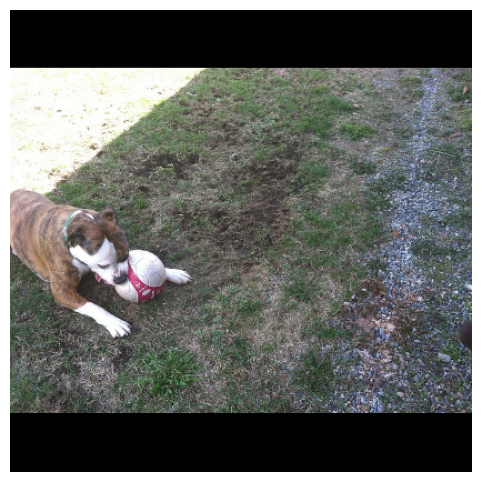

Epoch: 6


  0%|                                                                                                                               | 0/549 [00:06<?, ?it/s, loss=1.27]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:29<2:00:50, 13.25s/it, loss=1.21]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:36<1:35:28, 10.49s/it, loss=1.16]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:44<1:25:09,  9.38s/it, loss=1.16]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:51<1:19:14,  8.74s/it, loss=1.13]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [00:59<1:15:04,  8.29s/it, loss=1.09]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:06<1:11:30,  7.92s/it, loss=1.11]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:13<1:10:04,  7.77s/it, loss=1.11]

batch_idx: 7


  2%|█▉                                                                                                                    | 9/549 [01:21<1:09:35,  7.73s/it, loss=1.1]

batch_idx: 8


  2%|██▏                                                                                                                  | 10/549 [01:28<1:07:29,  7.51s/it, loss=1.1]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:35<1:06:38,  7.43s/it, loss=1.11]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:43<1:06:56,  7.48s/it, loss=1.11]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:50<1:05:45,  7.36s/it, loss=1.12]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:56<1:03:45,  7.15s/it, loss=1.11]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [02:04<1:04:45,  7.28s/it, loss=1.11]

batch_idx: 14


  3%|███▍                                                                                                                 | 16/549 [02:11<1:04:26,  7.25s/it, loss=1.1]

batch_idx: 15


  3%|███▌                                                                                                                | 17/549 [02:18<1:03:33,  7.17s/it, loss=1.11]

batch_idx: 16


  3%|███▊                                                                                                                | 18/549 [02:25<1:03:03,  7.13s/it, loss=1.11]

batch_idx: 17


  3%|████                                                                                                                | 19/549 [02:33<1:04:01,  7.25s/it, loss=1.12]

batch_idx: 18


  4%|████▏                                                                                                               | 20/549 [02:40<1:02:59,  7.14s/it, loss=1.11]

batch_idx: 19


  4%|████▍                                                                                                               | 21/549 [02:47<1:02:26,  7.10s/it, loss=1.11]

batch_idx: 20


  4%|████▋                                                                                                                | 22/549 [02:54<1:02:26,  7.11s/it, loss=1.1]

batch_idx: 21


  4%|████▉                                                                                                                | 23/549 [03:01<1:03:47,  7.28s/it, loss=1.1]

batch_idx: 22


  4%|█████                                                                                                                | 24/549 [03:09<1:04:19,  7.35s/it, loss=1.1]

batch_idx: 23


  5%|█████▎                                                                                                               | 25/549 [03:16<1:03:41,  7.29s/it, loss=1.1]

batch_idx: 24


  5%|█████▌                                                                                                               | 26/549 [03:23<1:03:42,  7.31s/it, loss=1.1]

batch_idx: 25


  5%|█████▊                                                                                                               | 27/549 [03:31<1:03:54,  7.35s/it, loss=1.1]

batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:38<1:03:39,  7.33s/it, loss=1.09]

batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:45<1:02:16,  7.19s/it, loss=1.09]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:52<1:01:50,  7.15s/it, loss=1.09]

batch_idx: 29


  6%|██████▌                                                                                                              | 31/549 [03:59<1:00:44,  7.04s/it, loss=1.1]

batch_idx: 30


  6%|██████▊                                                                                                              | 32/549 [04:06<1:00:33,  7.03s/it, loss=1.1]

batch_idx: 31


  6%|███████                                                                                                              | 33/549 [04:13<1:00:17,  7.01s/it, loss=1.1]

batch_idx: 32


  6%|███████▏                                                                                                             | 34/549 [04:20<1:00:27,  7.04s/it, loss=1.1]

batch_idx: 33


  6%|███████▌                                                                                                               | 35/549 [04:27<59:57,  7.00s/it, loss=1.1]

batch_idx: 34


  7%|███████▊                                                                                                               | 36/549 [04:34<59:41,  6.98s/it, loss=1.1]

batch_idx: 35


  7%|████████                                                                                                               | 37/549 [04:40<58:48,  6.89s/it, loss=1.1]

batch_idx: 36


  7%|████████▏                                                                                                              | 38/549 [04:48<59:51,  7.03s/it, loss=1.1]

batch_idx: 37
batch_idx: 38


  7%|████████▌                                                                                                            | 40/549 [05:03<1:01:29,  7.25s/it, loss=1.1]

batch_idx: 39


  7%|████████▋                                                                                                            | 41/549 [05:10<1:01:21,  7.25s/it, loss=1.1]

batch_idx: 40


  8%|████████▊                                                                                                           | 42/549 [05:17<1:00:29,  7.16s/it, loss=1.09]

batch_idx: 41


  8%|█████████                                                                                                           | 43/549 [05:24<1:00:25,  7.17s/it, loss=1.09]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:31<1:00:51,  7.23s/it, loss=1.09]

batch_idx: 43


  8%|█████████▊                                                                                                             | 45/549 [05:38<59:33,  7.09s/it, loss=1.1]

batch_idx: 44


  8%|█████████▋                                                                                                          | 46/549 [05:46<1:00:37,  7.23s/it, loss=1.09]

batch_idx: 45


  9%|█████████▉                                                                                                          | 47/549 [05:53<1:00:37,  7.25s/it, loss=1.09]

batch_idx: 46


  9%|██████████▏                                                                                                         | 48/549 [06:00<1:00:07,  7.20s/it, loss=1.09]

batch_idx: 47


  9%|██████████▌                                                                                                           | 49/549 [06:07<59:24,  7.13s/it, loss=1.09]

batch_idx: 48


  9%|██████████▋                                                                                                           | 50/549 [06:14<59:12,  7.12s/it, loss=1.09]

batch_idx: 49


  9%|██████████▉                                                                                                           | 51/549 [06:22<59:38,  7.19s/it, loss=1.09]

batch_idx: 50


  9%|██████████▉                                                                                                         | 52/549 [06:29<1:00:37,  7.32s/it, loss=1.09]

batch_idx: 51


 11%|████████████▍                                                                                                         | 58/549 [07:12<59:33,  7.28s/it, loss=1.09]

batch_idx: 57


 11%|████████████▋                                                                                                         | 59/549 [07:20<58:58,  7.22s/it, loss=1.09]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:27<58:46,  7.21s/it, loss=1.09]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:34<59:02,  7.26s/it, loss=1.08]

batch_idx: 60


 11%|█████████████                                                                                                       | 62/549 [07:42<1:00:32,  7.46s/it, loss=1.08]

batch_idx: 61


 11%|█████████████▌                                                                                                        | 63/549 [07:49<59:49,  7.39s/it, loss=1.08]

batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [07:56<57:52,  7.16s/it, loss=1.08]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:03<57:55,  7.18s/it, loss=1.08]

batch_idx: 64


 12%|██████████████▏                                                                                                       | 66/549 [08:10<58:05,  7.22s/it, loss=1.09]

batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:18<58:26,  7.27s/it, loss=1.09]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:25<58:31,  7.30s/it, loss=1.09]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:32<57:21,  7.17s/it, loss=1.09]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:39<56:46,  7.11s/it, loss=1.09]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:47<57:59,  7.28s/it, loss=1.09]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [08:54<57:31,  7.23s/it, loss=1.09]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:01<57:24,  7.24s/it, loss=1.09]

batch_idx: 72


 13%|███████████████▉                                                                                                      | 74/549 [09:08<56:17,  7.11s/it, loss=1.09]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:15<55:43,  7.05s/it, loss=1.09]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:22<55:25,  7.03s/it, loss=1.09]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:29<55:47,  7.09s/it, loss=1.09]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:36<55:18,  7.05s/it, loss=1.09]

batch_idx: 77


 15%|██████████████████                                                                                                    | 84/549 [10:19<55:41,  7.19s/it, loss=1.09]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:26<54:27,  7.04s/it, loss=1.09]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:33<55:04,  7.14s/it, loss=1.09]

batch_idx: 85


 16%|██████████████████▋                                                                                                   | 87/549 [10:41<54:51,  7.12s/it, loss=1.09]

batch_idx: 86


 16%|██████████████████▉                                                                                                   | 88/549 [10:48<55:50,  7.27s/it, loss=1.09]

batch_idx: 87


 16%|███████████████████▏                                                                                                  | 89/549 [10:55<55:28,  7.24s/it, loss=1.09]

batch_idx: 88


 16%|███████████████████▎                                                                                                  | 90/549 [11:02<54:10,  7.08s/it, loss=1.09]

batch_idx: 89


 17%|███████████████████▌                                                                                                  | 91/549 [11:09<53:30,  7.01s/it, loss=1.09]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:16<53:45,  7.06s/it, loss=1.09]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:23<54:18,  7.15s/it, loss=1.09]

batch_idx: 92


 17%|████████████████████▏                                                                                                 | 94/549 [11:30<53:59,  7.12s/it, loss=1.08]

batch_idx: 93


 17%|████████████████████▍                                                                                                 | 95/549 [11:38<53:43,  7.10s/it, loss=1.09]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:44<52:47,  6.99s/it, loss=1.09]

batch_idx: 95


 18%|████████████████████▊                                                                                                 | 97/549 [11:51<52:43,  7.00s/it, loss=1.09]

batch_idx: 96


 18%|█████████████████████                                                                                                 | 98/549 [11:58<52:53,  7.04s/it, loss=1.09]

batch_idx: 97


 18%|█████████████████████▎                                                                                                | 99/549 [12:05<52:23,  6.99s/it, loss=1.09]

batch_idx: 98


 19%|█████████████████████▋                                                                                               | 102/549 [12:28<54:17,  7.29s/it, loss=1.09]

batch_idx: 101


 19%|█████████████████████▉                                                                                               | 103/549 [12:35<54:22,  7.31s/it, loss=1.09]

batch_idx: 102


 19%|██████████████████████▏                                                                                              | 104/549 [12:42<53:30,  7.21s/it, loss=1.09]

batch_idx: 103


 19%|██████████████████████▍                                                                                              | 105/549 [12:49<52:48,  7.14s/it, loss=1.09]

batch_idx: 104


 19%|██████████████████████▌                                                                                              | 106/549 [12:57<53:26,  7.24s/it, loss=1.09]

batch_idx: 105


 19%|██████████████████████▊                                                                                              | 107/549 [13:04<52:44,  7.16s/it, loss=1.09]

batch_idx: 106


 20%|███████████████████████                                                                                              | 108/549 [13:11<52:21,  7.12s/it, loss=1.09]

batch_idx: 107


 20%|███████████████████████▏                                                                                             | 109/549 [13:18<52:07,  7.11s/it, loss=1.09]

batch_idx: 108


 20%|███████████████████████▍                                                                                             | 110/549 [13:25<52:29,  7.18s/it, loss=1.09]

batch_idx: 109


 20%|███████████████████████▋                                                                                             | 111/549 [13:32<52:30,  7.19s/it, loss=1.09]

batch_idx: 110


 20%|███████████████████████▊                                                                                             | 112/549 [13:40<52:53,  7.26s/it, loss=1.08]

batch_idx: 111


 21%|████████████████████████                                                                                             | 113/549 [13:47<53:08,  7.31s/it, loss=1.08]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [13:54<52:10,  7.20s/it, loss=1.08]

batch_idx: 113


 21%|████████████████████████▌                                                                                            | 115/549 [14:01<52:16,  7.23s/it, loss=1.08]

batch_idx: 114


 21%|████████████████████████▋                                                                                            | 116/549 [14:08<51:55,  7.20s/it, loss=1.08]

batch_idx: 115


 21%|████████████████████████▉                                                                                            | 117/549 [14:16<53:25,  7.42s/it, loss=1.08]

batch_idx: 116


 21%|█████████████████████████▏                                                                                           | 118/549 [14:24<53:50,  7.49s/it, loss=1.08]

batch_idx: 117


 22%|█████████████████████████▎                                                                                           | 119/549 [14:31<53:27,  7.46s/it, loss=1.08]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:38<51:17,  7.17s/it, loss=1.08]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [14:46<52:15,  7.33s/it, loss=1.08]

batch_idx: 120


 22%|██████████████████████████                                                                                           | 122/549 [14:53<51:33,  7.24s/it, loss=1.08]

batch_idx: 121


 22%|██████████████████████████▏                                                                                          | 123/549 [15:00<50:39,  7.14s/it, loss=1.08]

batch_idx: 122


 23%|██████████████████████████▍                                                                                          | 124/549 [15:07<50:25,  7.12s/it, loss=1.08]

batch_idx: 123


 23%|██████████████████████████▋                                                                                          | 125/549 [15:14<49:59,  7.08s/it, loss=1.08]

batch_idx: 124


 23%|██████████████████████████▊                                                                                          | 126/549 [15:21<49:49,  7.07s/it, loss=1.08]

batch_idx: 125


 23%|███████████████████████████                                                                                          | 127/549 [15:28<50:23,  7.17s/it, loss=1.08]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:36<51:00,  7.27s/it, loss=1.08]

batch_idx: 127


 23%|███████████████████████████▍                                                                                         | 129/549 [15:43<50:50,  7.26s/it, loss=1.08]

batch_idx: 128


 24%|███████████████████████████▋                                                                                         | 130/549 [15:49<49:27,  7.08s/it, loss=1.08]

batch_idx: 129


 24%|███████████████████████████▉                                                                                         | 131/549 [15:56<49:14,  7.07s/it, loss=1.08]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [16:04<49:37,  7.14s/it, loss=1.08]

batch_idx: 131
batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:18<49:19,  7.13s/it, loss=1.08]

batch_idx: 133
batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:32<49:00,  7.12s/it, loss=1.08]

batch_idx: 135
batch_idx: 136


 25%|█████████████████████████████▍                                                                                       | 138/549 [16:47<49:19,  7.20s/it, loss=1.08]

batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [16:54<48:51,  7.15s/it, loss=1.08]

batch_idx: 138


 26%|█████████████████████████████▊                                                                                       | 140/549 [17:01<47:47,  7.01s/it, loss=1.08]

batch_idx: 139


 26%|██████████████████████████████                                                                                       | 141/549 [17:08<47:21,  6.97s/it, loss=1.08]

batch_idx: 140


 26%|██████████████████████████████                                                                                       | 141/549 [17:14<47:21,  6.97s/it, loss=1.08]

batch_idx: 141


 27%|███████████████████████████████▌                                                                                     | 148/549 [17:57<47:54,  7.17s/it, loss=1.08]

batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [18:04<47:15,  7.09s/it, loss=1.09]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:11<47:47,  7.19s/it, loss=1.09]

batch_idx: 149


 28%|████████████████████████████████▏                                                                                    | 151/549 [18:19<47:54,  7.22s/it, loss=1.09]

batch_idx: 150


 28%|████████████████████████████████▍                                                                                    | 152/549 [18:26<47:40,  7.21s/it, loss=1.08]

batch_idx: 151


 28%|████████████████████████████████▌                                                                                    | 153/549 [18:33<47:06,  7.14s/it, loss=1.08]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [18:40<46:51,  7.12s/it, loss=1.08]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [18:47<47:23,  7.22s/it, loss=1.08]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [18:54<46:58,  7.17s/it, loss=1.08]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [19:02<47:20,  7.25s/it, loss=1.08]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:08<45:41,  7.01s/it, loss=1.08]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:15<45:33,  7.01s/it, loss=1.08]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:23<46:51,  7.23s/it, loss=1.08]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:30<46:37,  7.21s/it, loss=1.08]

batch_idx: 160


 30%|██████████████████████████████████▌                                                                                  | 162/549 [19:37<45:40,  7.08s/it, loss=1.08]

batch_idx: 161


 30%|██████████████████████████████████▋                                                                                  | 163/549 [19:45<46:59,  7.31s/it, loss=1.08]

batch_idx: 162


 30%|██████████████████████████████████▉                                                                                  | 164/549 [19:52<46:47,  7.29s/it, loss=1.08]

batch_idx: 163


 30%|███████████████████████████████████▏                                                                                 | 165/549 [19:59<46:18,  7.24s/it, loss=1.08]

batch_idx: 164


 30%|███████████████████████████████████▍                                                                                 | 166/549 [20:06<45:48,  7.17s/it, loss=1.08]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:13<45:45,  7.19s/it, loss=1.08]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:20<45:15,  7.13s/it, loss=1.08]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:28<45:53,  7.25s/it, loss=1.08]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [20:35<45:45,  7.25s/it, loss=1.08]

batch_idx: 169


 32%|████████████████████████████████████▊                                                                                | 173/549 [20:56<45:03,  7.19s/it, loss=1.08]

batch_idx: 172


 32%|█████████████████████████████████████                                                                                | 174/549 [21:04<45:16,  7.24s/it, loss=1.08]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:10<42:56,  6.89s/it, loss=1.08]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:17<43:58,  7.07s/it, loss=1.08]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [21:25<44:08,  7.12s/it, loss=1.08]

batch_idx: 176


 32%|█████████████████████████████████████▉                                                                               | 178/549 [21:32<44:06,  7.13s/it, loss=1.08]

batch_idx: 177


 33%|██████████████████████████████████████▏                                                                              | 179/549 [21:39<44:43,  7.25s/it, loss=1.08]

batch_idx: 178


 33%|██████████████████████████████████████▎                                                                              | 180/549 [21:46<44:07,  7.18s/it, loss=1.08]

batch_idx: 179


 33%|██████████████████████████████████████▌                                                                              | 181/549 [21:54<44:07,  7.20s/it, loss=1.08]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [22:01<44:05,  7.21s/it, loss=1.08]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [22:08<43:32,  7.14s/it, loss=1.07]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:15<43:16,  7.11s/it, loss=1.07]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:22<43:02,  7.09s/it, loss=1.07]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:29<43:23,  7.17s/it, loss=1.07]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [22:36<42:51,  7.10s/it, loss=1.07]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [22:43<42:33,  7.07s/it, loss=1.07]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [22:50<42:20,  7.06s/it, loss=1.07]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [22:57<42:21,  7.08s/it, loss=1.07]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [23:05<42:32,  7.13s/it, loss=1.07]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:12<43:04,  7.24s/it, loss=1.07]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:20<43:47,  7.38s/it, loss=1.07]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:27<43:26,  7.34s/it, loss=1.07]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [23:34<42:53,  7.27s/it, loss=1.07]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [23:41<42:19,  7.19s/it, loss=1.07]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [23:48<42:18,  7.21s/it, loss=1.07]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [23:56<42:22,  7.24s/it, loss=1.07]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [24:03<42:34,  7.30s/it, loss=1.07]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:11<42:51,  7.37s/it, loss=1.07]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:18<42:51,  7.37s/it, loss=1.07]

batch_idx: 200
==> Saving checkpoint


 37%|██████████████████████████████████████████▎                                                                        | 202/549 [24:41<1:01:53, 10.70s/it, loss=1.07]

batch_idx: 201


 37%|███████████████████████████████████████████▎                                                                         | 203/549 [24:48<54:50,  9.51s/it, loss=1.07]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [24:55<50:10,  8.73s/it, loss=1.07]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [25:02<46:45,  8.16s/it, loss=1.07]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [25:09<45:26,  7.95s/it, loss=1.07]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:17<44:01,  7.72s/it, loss=1.07]

batch_idx: 206


 38%|████████████████████████████████████████████▎                                                                        | 208/549 [25:23<41:58,  7.39s/it, loss=1.07]

batch_idx: 207


 38%|████████████████████████████████████████████▌                                                                        | 209/549 [25:31<42:28,  7.50s/it, loss=1.07]

batch_idx: 208


 38%|████████████████████████████████████████████▊                                                                        | 210/549 [25:38<41:49,  7.40s/it, loss=1.07]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [25:46<41:57,  7.45s/it, loss=1.07]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [25:53<41:14,  7.34s/it, loss=1.07]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [26:00<40:27,  7.22s/it, loss=1.07]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [26:07<39:43,  7.11s/it, loss=1.07]

batch_idx: 213


 39%|█████████████████████████████████████████████▊                                                                       | 215/549 [26:14<39:20,  7.07s/it, loss=1.07]

batch_idx: 214


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:21<39:23,  7.10s/it, loss=1.07]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [26:27<38:40,  6.99s/it, loss=1.07]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [26:35<39:10,  7.10s/it, loss=1.07]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [26:42<39:42,  7.22s/it, loss=1.07]

batch_idx: 218


 40%|██████████████████████████████████████████████▉                                                                      | 220/549 [26:50<39:47,  7.26s/it, loss=1.07]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [26:57<39:36,  7.25s/it, loss=1.07]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [27:05<40:12,  7.38s/it, loss=1.07]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [27:12<39:40,  7.30s/it, loss=1.07]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:19<39:48,  7.35s/it, loss=1.07]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:26<38:59,  7.22s/it, loss=1.07]

batch_idx: 224


 41%|████████████████████████████████████████████████▏                                                                    | 226/549 [27:33<38:14,  7.10s/it, loss=1.07]

batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [27:39<37:10,  6.93s/it, loss=1.07]

batch_idx: 226


 42%|████████████████████████████████████████████████▌                                                                    | 228/549 [27:47<37:57,  7.10s/it, loss=1.07]

batch_idx: 227


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [27:54<37:44,  7.08s/it, loss=1.07]

batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [28:01<37:22,  7.03s/it, loss=1.07]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [28:08<37:33,  7.09s/it, loss=1.07]

batch_idx: 230


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [28:30<38:13,  7.28s/it, loss=1.07]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [28:38<38:22,  7.33s/it, loss=1.07]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [28:45<38:22,  7.36s/it, loss=1.07]

batch_idx: 235


 43%|██████████████████████████████████████████████████▌                                                                  | 237/549 [28:53<38:30,  7.40s/it, loss=1.07]

batch_idx: 236


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [29:00<38:10,  7.36s/it, loss=1.07]

batch_idx: 237


 44%|██████████████████████████████████████████████████▉                                                                  | 239/549 [29:07<37:21,  7.23s/it, loss=1.07]

batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [29:14<36:52,  7.16s/it, loss=1.07]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:21<36:42,  7.15s/it, loss=1.07]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:28<37:10,  7.27s/it, loss=1.07]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [29:35<36:34,  7.17s/it, loss=1.07]

batch_idx: 242


 44%|████████████████████████████████████████████████████                                                                 | 244/549 [29:42<36:16,  7.14s/it, loss=1.07]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [29:49<35:17,  6.97s/it, loss=1.07]

batch_idx: 244


 45%|████████████████████████████████████████████████████▍                                                                | 246/549 [29:56<35:10,  6.96s/it, loss=1.07]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [30:03<35:41,  7.09s/it, loss=1.07]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [30:11<35:42,  7.12s/it, loss=1.07]

batch_idx: 247


 45%|█████████████████████████████████████████████████████                                                                | 249/549 [30:18<35:26,  7.09s/it, loss=1.07]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:24<34:47,  6.98s/it, loss=1.07]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▍                                                               | 251/549 [30:31<34:57,  7.04s/it, loss=1.07]

batch_idx: 250


 46%|█████████████████████████████████████████████████████▋                                                               | 252/549 [30:39<35:28,  7.17s/it, loss=1.06]

batch_idx: 251


 47%|██████████████████████████████████████████████████████▊                                                              | 257/549 [31:16<35:07,  7.22s/it, loss=1.06]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [31:23<34:44,  7.16s/it, loss=1.07]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▏                                                             | 259/549 [31:30<34:12,  7.08s/it, loss=1.06]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [31:37<33:53,  7.04s/it, loss=1.06]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [31:44<34:06,  7.11s/it, loss=1.07]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [31:51<33:59,  7.11s/it, loss=1.07]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [31:59<34:54,  7.32s/it, loss=1.07]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▎                                                            | 264/549 [32:06<35:02,  7.38s/it, loss=1.07]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▍                                                            | 265/549 [32:13<34:11,  7.22s/it, loss=1.06]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [32:20<34:03,  7.22s/it, loss=1.07]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [32:28<34:21,  7.31s/it, loss=1.06]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [32:35<33:47,  7.21s/it, loss=1.06]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [32:42<34:04,  7.30s/it, loss=1.06]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████▌                                                           | 270/549 [32:50<34:02,  7.32s/it, loss=1.06]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▊                                                           | 271/549 [32:57<33:41,  7.27s/it, loss=1.06]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▉                                                           | 272/549 [33:04<34:00,  7.37s/it, loss=1.06]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▏                                                          | 273/549 [33:11<32:59,  7.17s/it, loss=1.06]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▍                                                          | 274/549 [33:18<33:01,  7.21s/it, loss=1.06]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [33:26<33:13,  7.28s/it, loss=1.06]

batch_idx: 274


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [33:46<31:30,  6.98s/it, loss=1.06]

batch_idx: 277
batch_idx: 278


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [33:53<31:15,  6.95s/it, loss=1.06]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▉                                                         | 281/549 [34:08<31:49,  7.12s/it, loss=1.06]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [34:15<31:24,  7.06s/it, loss=1.06]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:22<31:09,  7.03s/it, loss=1.06]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:29<30:51,  6.99s/it, loss=1.06]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [34:36<31:34,  7.18s/it, loss=1.06]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [34:44<31:37,  7.22s/it, loss=1.06]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [34:51<31:39,  7.25s/it, loss=1.06]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [34:58<30:41,  7.06s/it, loss=1.06]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:05<31:14,  7.21s/it, loss=1.06]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:12<30:49,  7.14s/it, loss=1.06]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [35:19<30:27,  7.08s/it, loss=1.06]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [35:26<30:22,  7.09s/it, loss=1.06]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [35:33<30:20,  7.11s/it, loss=1.06]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [35:40<30:05,  7.08s/it, loss=1.06]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [35:47<29:56,  7.07s/it, loss=1.06]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [35:55<29:52,  7.09s/it, loss=1.06]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [36:01<29:36,  7.05s/it, loss=1.06]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:09<29:43,  7.10s/it, loss=1.06]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:16<30:03,  7.21s/it, loss=1.06]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:23<29:35,  7.13s/it, loss=1.06]

batch_idx: 299


 55%|████████████████████████████████████████████████████████████████▏                                                    | 301/549 [36:31<30:06,  7.28s/it, loss=1.06]

batch_idx: 300


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [36:38<29:32,  7.18s/it, loss=1.06]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [36:45<29:25,  7.18s/it, loss=1.06]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [36:52<29:25,  7.21s/it, loss=1.06]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [36:59<29:18,  7.21s/it, loss=1.06]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [37:14<28:51,  7.15s/it, loss=1.06]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [37:21<28:59,  7.22s/it, loss=1.05]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [37:28<28:17,  7.07s/it, loss=1.06]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [37:34<27:43,  6.96s/it, loss=1.05]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [37:42<28:01,  7.07s/it, loss=1.06]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [37:49<28:22,  7.18s/it, loss=1.05]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [37:56<28:11,  7.17s/it, loss=1.06]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [38:03<27:51,  7.11s/it, loss=1.05]

batch_idx: 313


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [38:46<27:24,  7.18s/it, loss=1.05]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [38:52<26:30,  6.98s/it, loss=1.05]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████▌                                                | 322/549 [38:59<26:07,  6.90s/it, loss=1.05]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▊                                                | 323/549 [39:06<25:49,  6.86s/it, loss=1.05]

batch_idx: 322


 59%|█████████████████████████████████████████████████████████████████████                                                | 324/549 [39:13<26:03,  6.95s/it, loss=1.05]

batch_idx: 323


 59%|█████████████████████████████████████████████████████████████████████▎                                               | 325/549 [39:20<26:24,  7.08s/it, loss=1.06]

batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [39:28<26:36,  7.16s/it, loss=1.06]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [39:35<26:23,  7.13s/it, loss=1.06]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [39:42<26:29,  7.19s/it, loss=1.06]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████                                               | 329/549 [39:50<26:48,  7.31s/it, loss=1.06]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [39:57<26:41,  7.31s/it, loss=1.06]

batch_idx: 329


 60%|██████████████████████████████████████████████████████████████████████▌                                              | 331/549 [40:04<26:21,  7.25s/it, loss=1.06]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▊                                              | 332/549 [40:11<26:10,  7.24s/it, loss=1.05]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▉                                              | 333/549 [40:18<25:42,  7.14s/it, loss=1.05]

batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [40:25<25:25,  7.10s/it, loss=1.05]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [40:33<25:26,  7.13s/it, loss=1.05]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [40:39<25:00,  7.05s/it, loss=1.05]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [40:47<25:14,  7.14s/it, loss=1.05]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [40:54<25:09,  7.15s/it, loss=1.05]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [41:01<24:49,  7.09s/it, loss=1.05]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [41:07<23:46,  6.82s/it, loss=1.05]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [41:14<23:56,  6.90s/it, loss=1.05]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [41:21<23:33,  6.83s/it, loss=1.05]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [41:28<23:43,  6.91s/it, loss=1.05]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [41:35<23:59,  7.02s/it, loss=1.05]

batch_idx: 343


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 345/549 [41:43<24:16,  7.14s/it, loss=1.05]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [41:50<23:56,  7.08s/it, loss=1.05]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [41:56<23:41,  7.04s/it, loss=1.05]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [42:04<23:35,  7.04s/it, loss=1.05]

batch_idx: 347


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 349/549 [42:10<23:23,  7.02s/it, loss=1.05]

batch_idx: 348


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [42:17<23:02,  6.95s/it, loss=1.05]

batch_idx: 349


 64%|██████████████████████████████████████████████████████████████████████████▊                                          | 351/549 [42:24<23:03,  6.99s/it, loss=1.05]

batch_idx: 350


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [42:32<23:07,  7.04s/it, loss=1.05]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [42:39<23:06,  7.07s/it, loss=1.05]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [42:45<22:45,  7.00s/it, loss=1.05]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [42:53<22:50,  7.07s/it, loss=1.05]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [43:00<22:51,  7.10s/it, loss=1.05]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [43:07<22:29,  7.03s/it, loss=1.05]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [43:14<22:31,  7.08s/it, loss=1.05]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [43:21<22:19,  7.05s/it, loss=1.05]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [43:28<22:17,  7.08s/it, loss=1.05]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [43:35<21:57,  7.01s/it, loss=1.05]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [43:42<21:33,  6.92s/it, loss=1.05]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [43:48<21:23,  6.90s/it, loss=1.05]

batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [43:55<21:07,  6.85s/it, loss=1.05]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [44:02<21:15,  6.93s/it, loss=1.05]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [44:09<20:56,  6.87s/it, loss=1.05]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [44:16<20:51,  6.88s/it, loss=1.05]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [44:23<20:31,  6.81s/it, loss=1.05]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [44:30<20:34,  6.86s/it, loss=1.05]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [44:36<20:26,  6.85s/it, loss=1.05]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [44:44<20:44,  6.99s/it, loss=1.05]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [44:51<20:41,  7.01s/it, loss=1.05]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [44:58<20:19,  6.93s/it, loss=1.05]

batch_idx: 372


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [45:19<20:30,  7.11s/it, loss=1.05]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [45:26<20:41,  7.22s/it, loss=1.05]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [45:33<20:25,  7.17s/it, loss=1.05]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [45:40<20:13,  7.14s/it, loss=1.05]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [45:47<19:52,  7.06s/it, loss=1.05]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▏                                   | 381/549 [45:54<19:45,  7.06s/it, loss=1.05]

batch_idx: 380


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                   | 382/549 [46:01<19:36,  7.05s/it, loss=1.05]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [46:08<19:24,  7.02s/it, loss=1.05]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                   | 384/549 [46:16<19:32,  7.11s/it, loss=1.05]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [46:22<19:15,  7.04s/it, loss=1.05]

batch_idx: 384


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [46:43<18:32,  6.91s/it, loss=1.05]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 389/549 [46:50<18:37,  6.99s/it, loss=1.05]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 390/549 [46:57<18:12,  6.87s/it, loss=1.05]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [47:04<18:12,  6.92s/it, loss=1.05]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [47:11<18:04,  6.91s/it, loss=1.05]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [47:18<17:59,  6.92s/it, loss=1.05]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [47:25<18:13,  7.05s/it, loss=1.05]

batch_idx: 393


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 395/549 [47:32<18:24,  7.17s/it, loss=1.05]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [47:40<18:15,  7.16s/it, loss=1.05]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [47:47<18:03,  7.13s/it, loss=1.05]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [47:54<18:04,  7.18s/it, loss=1.05]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [48:01<17:46,  7.11s/it, loss=1.05]

batch_idx: 398


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:08<17:36,  7.09s/it, loss=1.05]

batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:14<17:36,  7.09s/it, loss=1.05]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [48:36<24:22,  9.95s/it, loss=1.05]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [48:43<22:03,  9.07s/it, loss=1.05]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [48:50<20:39,  8.55s/it, loss=1.05]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [48:57<19:36,  8.17s/it, loss=1.05]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [49:04<18:19,  7.69s/it, loss=1.05]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [49:11<17:43,  7.49s/it, loss=1.05]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [49:18<17:07,  7.29s/it, loss=1.05]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [49:25<16:53,  7.24s/it, loss=1.05]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [49:46<16:15,  7.12s/it, loss=1.05]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [49:53<15:57,  7.04s/it, loss=1.05]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 414/549 [49:59<15:30,  6.89s/it, loss=1.05]

batch_idx: 413


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 415/549 [50:06<15:18,  6.85s/it, loss=1.05]

batch_idx: 414


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                            | 416/549 [50:13<14:58,  6.76s/it, loss=1.05]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 417/549 [50:19<14:49,  6.74s/it, loss=1.05]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████                            | 418/549 [50:27<14:57,  6.85s/it, loss=1.05]

batch_idx: 417


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [50:34<14:57,  6.90s/it, loss=1.05]

batch_idx: 418


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 420/549 [50:41<14:59,  6.97s/it, loss=1.05]

batch_idx: 419


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                           | 421/549 [50:47<14:24,  6.76s/it, loss=1.04]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [50:54<14:41,  6.94s/it, loss=1.04]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [51:01<14:21,  6.84s/it, loss=1.04]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [51:09<14:51,  7.13s/it, loss=1.04]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [51:17<15:15,  7.38s/it, loss=1.04]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [51:24<15:11,  7.41s/it, loss=1.04]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [51:32<15:08,  7.45s/it, loss=1.04]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [51:39<14:47,  7.34s/it, loss=1.04]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [51:46<14:45,  7.38s/it, loss=1.04]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [51:53<14:25,  7.28s/it, loss=1.04]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 431/549 [52:01<14:15,  7.25s/it, loss=1.04]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████                         | 432/549 [52:08<14:02,  7.20s/it, loss=1.04]

batch_idx: 431


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 433/549 [52:15<14:05,  7.29s/it, loss=1.04]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [52:22<13:45,  7.17s/it, loss=1.04]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [52:30<13:51,  7.30s/it, loss=1.04]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [52:37<13:34,  7.21s/it, loss=1.04]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [52:44<13:35,  7.28s/it, loss=1.04]

batch_idx: 436


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                       | 438/549 [52:51<13:30,  7.30s/it, loss=1.04]

batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [52:58<13:07,  7.16s/it, loss=1.04]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [53:05<13:01,  7.17s/it, loss=1.04]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [53:13<13:04,  7.27s/it, loss=1.04]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [53:20<12:55,  7.24s/it, loss=1.04]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [53:27<12:50,  7.27s/it, loss=1.04]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [53:34<12:20,  7.05s/it, loss=1.04]

batch_idx: 443
batch_idx: 444


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 446/549 [53:47<11:46,  6.86s/it, loss=1.04]

batch_idx: 445


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▎                     | 447/549 [53:55<12:00,  7.06s/it, loss=1.04]

batch_idx: 446


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 448/549 [54:02<12:02,  7.15s/it, loss=1.04]

batch_idx: 447


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 449/549 [54:09<11:50,  7.10s/it, loss=1.04]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [54:17<11:57,  7.25s/it, loss=1.04]

batch_idx: 449


 82%|████████████████████████████████████████████████████████████████████████████████████████████████                     | 451/549 [54:24<11:52,  7.27s/it, loss=1.04]

batch_idx: 450


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 452/549 [54:32<11:53,  7.35s/it, loss=1.04]

batch_idx: 451


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 453/549 [54:39<11:33,  7.22s/it, loss=1.04]

batch_idx: 452


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 454/549 [54:46<11:30,  7.27s/it, loss=1.04]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 455/549 [54:53<11:19,  7.23s/it, loss=1.04]

batch_idx: 454


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 456/549 [55:00<11:09,  7.20s/it, loss=1.04]

batch_idx: 455


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 459/549 [55:22<10:46,  7.18s/it, loss=1.04]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                   | 460/549 [55:28<10:29,  7.07s/it, loss=1.04]

batch_idx: 459


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 461/549 [55:36<10:23,  7.08s/it, loss=1.04]

batch_idx: 460


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 462/549 [55:43<10:22,  7.15s/it, loss=1.04]

batch_idx: 461


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 463/549 [55:50<10:23,  7.25s/it, loss=1.04]

batch_idx: 462


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 464/549 [55:58<10:13,  7.22s/it, loss=1.04]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                  | 465/549 [56:05<10:04,  7.20s/it, loss=1.04]

batch_idx: 464


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 466/549 [56:12<09:59,  7.23s/it, loss=1.04]

batch_idx: 465


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 467/549 [56:19<09:51,  7.22s/it, loss=1.04]

batch_idx: 466


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 468/549 [56:26<09:35,  7.11s/it, loss=1.04]

batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 469/549 [56:33<09:37,  7.22s/it, loss=1.04]

batch_idx: 468


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 470/549 [56:41<09:30,  7.23s/it, loss=1.04]

batch_idx: 469


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 471/549 [56:48<09:14,  7.11s/it, loss=1.04]

batch_idx: 470


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 472/549 [56:55<09:14,  7.20s/it, loss=1.04]

batch_idx: 471


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 473/549 [57:02<09:03,  7.15s/it, loss=1.04]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 474/549 [57:09<08:48,  7.05s/it, loss=1.04]

batch_idx: 473


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 475/549 [57:16<08:49,  7.16s/it, loss=1.04]

batch_idx: 474


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 476/549 [57:23<08:33,  7.03s/it, loss=1.04]

batch_idx: 475


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 477/549 [57:29<08:14,  6.87s/it, loss=1.04]

batch_idx: 476


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████               | 479/549 [57:44<08:07,  6.97s/it, loss=1.04]

batch_idx: 478


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 480/549 [57:51<08:06,  7.06s/it, loss=1.04]

batch_idx: 479


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 481/549 [57:57<07:48,  6.88s/it, loss=1.04]

batch_idx: 480


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 482/549 [58:04<07:33,  6.77s/it, loss=1.04]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 483/549 [58:11<07:39,  6.96s/it, loss=1.04]

batch_idx: 482


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 484/549 [58:18<07:28,  6.90s/it, loss=1.04]

batch_idx: 483


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 485/549 [58:25<07:21,  6.91s/it, loss=1.04]

batch_idx: 484


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 486/549 [58:32<07:14,  6.89s/it, loss=1.04]

batch_idx: 485


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 487/549 [58:39<07:14,  7.00s/it, loss=1.04]

batch_idx: 486


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████            | 493/549 [59:22<06:42,  7.19s/it, loss=1.03]

batch_idx: 492


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 494/549 [59:29<06:29,  7.07s/it, loss=1.03]

batch_idx: 493
batch_idx: 494


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 496/549 [59:43<06:17,  7.12s/it, loss=1.03]

batch_idx: 495


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 497/549 [59:50<06:08,  7.08s/it, loss=1.03]

batch_idx: 496


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 498/549 [59:57<06:01,  7.08s/it, loss=1.03]

batch_idx: 497


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:00:05<05:58,  7.17s/it, loss=1.03]

batch_idx: 498


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:00:12<05:57,  7.29s/it, loss=1.03]

batch_idx: 499


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 501/549 [1:00:20<05:52,  7.34s/it, loss=1.03]

batch_idx: 500


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:00:27<05:38,  7.21s/it, loss=1.03]

batch_idx: 501


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:00:34<05:30,  7.18s/it, loss=1.03]

batch_idx: 502


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 504/549 [1:00:40<05:11,  6.93s/it, loss=1.03]

batch_idx: 503


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:00:48<05:11,  7.08s/it, loss=1.03]

batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 506/549 [1:00:55<05:11,  7.24s/it, loss=1.03]

batch_idx: 505


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:01:02<05:02,  7.21s/it, loss=1.03]

batch_idx: 506


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:01:10<05:02,  7.39s/it, loss=1.03]

batch_idx: 507


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:01:18<04:56,  7.41s/it, loss=1.03]

batch_idx: 508


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:01:24<04:42,  7.23s/it, loss=1.03]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:01:32<04:41,  7.41s/it, loss=1.03]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:01:40<04:35,  7.43s/it, loss=1.03]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:01:47<04:27,  7.42s/it, loss=1.03]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:01:54<04:15,  7.30s/it, loss=1.03]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:02:02<04:10,  7.38s/it, loss=1.03]

batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:02:16<03:52,  7.26s/it, loss=1.03]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:02:23<03:44,  7.24s/it, loss=1.03]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:02:30<03:37,  7.24s/it, loss=1.03]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:02:37<03:25,  7.10s/it, loss=1.03]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:02:45<03:23,  7.28s/it, loss=1.03]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:02:52<03:14,  7.19s/it, loss=1.03]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:02:59<03:06,  7.19s/it, loss=1.03]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:03:06<02:58,  7.14s/it, loss=1.03]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:03:13<02:51,  7.13s/it, loss=1.03]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:03:20<02:42,  7.08s/it, loss=1.03]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:03:27<02:35,  7.06s/it, loss=1.03]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:03:34<02:29,  7.13s/it, loss=1.03]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:03:41<02:20,  7.04s/it, loss=1.03]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:03:48<02:12,  6.97s/it, loss=1.03]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:03:56<02:08,  7.16s/it, loss=1.03]

batch_idx: 530


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:04:02<01:59,  7.04s/it, loss=1.03]

batch_idx: 531


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:04:10<01:53,  7.11s/it, loss=1.03]

batch_idx: 532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:04:16<01:43,  6.90s/it, loss=1.03]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:04:24<01:39,  7.12s/it, loss=1.03]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:04:31<01:31,  7.05s/it, loss=1.03]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:04:38<01:24,  7.03s/it, loss=1.03]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:04:44<01:16,  7.00s/it, loss=1.03]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:04:52<01:10,  7.09s/it, loss=1.03]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:04:59<01:05,  7.27s/it, loss=1.03]

batch_idx: 539


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:05:07<00:58,  7.30s/it, loss=1.03]

batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:05:13<00:49,  7.05s/it, loss=1.03]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:05:20<00:41,  6.93s/it, loss=1.03]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:05:27<00:34,  6.99s/it, loss=1.03]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:05:35<00:28,  7.15s/it, loss=1.03]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:05:42<00:21,  7.08s/it, loss=1.03]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:05:49<00:14,  7.27s/it, loss=1.03]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:05:57<00:07,  7.31s/it, loss=1.03]

batch_idx: 547


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:05:58<00:00,  7.21s/it, loss=1.03]

batch_idx: 548
==> Saving checkpoint



  0%|▍                                                                                                                   | 2/549 [00:29<2:02:56, 13.49s/it, loss=0.971]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:36<1:36:24, 10.59s/it, loss=1.05]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:44<1:25:12,  9.38s/it, loss=1.05]

batch_idx: 3


  1%|█                                                                                                                   | 5/549 [00:51<1:17:03,  8.50s/it, loss=0.995]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [00:58<1:11:17,  7.88s/it, loss=1.02]

batch_idx: 5


  1%|█▌                                                                                                                      | 7/549 [01:04<1:08:00,  7.53s/it, loss=1]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:11<1:06:37,  7.39s/it, loss=1.04]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:19<1:07:07,  7.46s/it, loss=1.03]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:26<1:06:04,  7.35s/it, loss=1.01]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:33<1:05:21,  7.29s/it, loss=0.99]

batch_idx: 10


  2%|██▌                                                                                                                | 12/549 [01:40<1:04:29,  7.21s/it, loss=0.993]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:47<1:03:18,  7.09s/it, loss=0.98]

batch_idx: 12


  3%|██▉                                                                                                                | 14/549 [01:54<1:02:16,  6.98s/it, loss=0.972]

batch_idx: 13


  3%|███▏                                                                                                               | 15/549 [02:02<1:05:04,  7.31s/it, loss=0.965]

batch_idx: 14


  3%|███▎                                                                                                               | 16/549 [02:10<1:06:26,  7.48s/it, loss=0.965]

batch_idx: 15


  3%|███▌                                                                                                               | 17/549 [02:17<1:05:16,  7.36s/it, loss=0.964]

batch_idx: 16


  3%|███▊                                                                                                               | 18/549 [02:24<1:05:19,  7.38s/it, loss=0.973]

batch_idx: 17


  3%|███▉                                                                                                               | 19/549 [02:32<1:05:16,  7.39s/it, loss=0.969]

batch_idx: 18


  4%|████▏                                                                                                              | 20/549 [02:38<1:03:25,  7.19s/it, loss=0.967]

batch_idx: 19


  4%|████▍                                                                                                              | 21/549 [02:45<1:02:44,  7.13s/it, loss=0.968]

batch_idx: 20


  4%|████▌                                                                                                              | 22/549 [02:52<1:02:07,  7.07s/it, loss=0.964]

batch_idx: 21


  4%|████▊                                                                                                              | 23/549 [02:59<1:01:27,  7.01s/it, loss=0.958]

batch_idx: 22


  4%|█████                                                                                                              | 24/549 [03:06<1:01:40,  7.05s/it, loss=0.957]

batch_idx: 23


  5%|█████▏                                                                                                             | 25/549 [03:14<1:02:06,  7.11s/it, loss=0.962]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:21<1:01:38,  7.07s/it, loss=0.96]

batch_idx: 25


  5%|█████▋                                                                                                             | 27/549 [03:28<1:01:47,  7.10s/it, loss=0.965]

batch_idx: 26


  5%|█████▊                                                                                                             | 28/549 [03:35<1:01:50,  7.12s/it, loss=0.963]

batch_idx: 27


  5%|██████                                                                                                             | 29/549 [03:42<1:01:08,  7.06s/it, loss=0.969]

batch_idx: 28


  5%|██████▎                                                                                                            | 30/549 [03:49<1:00:37,  7.01s/it, loss=0.971]

batch_idx: 29


  6%|██████▍                                                                                                            | 31/549 [03:56<1:01:09,  7.08s/it, loss=0.977]

batch_idx: 30


  6%|██████▋                                                                                                            | 32/549 [04:03<1:01:58,  7.19s/it, loss=0.971]

batch_idx: 31


  6%|██████▉                                                                                                            | 33/549 [04:11<1:03:08,  7.34s/it, loss=0.968]

batch_idx: 32


  6%|███████                                                                                                            | 34/549 [04:18<1:02:43,  7.31s/it, loss=0.972]

batch_idx: 33


  6%|███████▎                                                                                                           | 35/549 [04:26<1:03:33,  7.42s/it, loss=0.971]

batch_idx: 34


  7%|███████▌                                                                                                           | 36/549 [04:33<1:02:41,  7.33s/it, loss=0.971]

batch_idx: 35


  7%|███████▊                                                                                                           | 37/549 [04:40<1:02:07,  7.28s/it, loss=0.969]

batch_idx: 36


  7%|███████▉                                                                                                           | 38/549 [04:47<1:01:23,  7.21s/it, loss=0.969]

batch_idx: 37


  7%|████████▏                                                                                                          | 39/549 [04:54<1:00:06,  7.07s/it, loss=0.973]

batch_idx: 38


  7%|████████▍                                                                                                           | 40/549 [05:01<1:00:00,  7.07s/it, loss=0.97]

batch_idx: 39


  7%|████████▋                                                                                                            | 41/549 [05:08<59:54,  7.08s/it, loss=0.967]

batch_idx: 40


  8%|████████▊                                                                                                          | 42/549 [05:16<1:00:34,  7.17s/it, loss=0.968]

batch_idx: 41


  8%|█████████                                                                                                           | 43/549 [05:23<1:00:34,  7.18s/it, loss=0.97]

batch_idx: 42


  8%|█████████▍                                                                                                            | 44/549 [05:30<59:35,  7.08s/it, loss=0.97]

batch_idx: 43


  8%|█████████▌                                                                                                           | 45/549 [05:37<59:41,  7.11s/it, loss=0.968]

batch_idx: 44


  8%|█████████▋                                                                                                         | 46/549 [05:45<1:01:04,  7.28s/it, loss=0.964]

batch_idx: 45


  9%|██████████                                                                                                           | 47/549 [05:51<59:34,  7.12s/it, loss=0.961]

batch_idx: 46


  9%|██████████▏                                                                                                          | 48/549 [05:58<59:06,  7.08s/it, loss=0.961]

batch_idx: 47


  9%|██████████▍                                                                                                          | 49/549 [06:05<58:29,  7.02s/it, loss=0.959]

batch_idx: 48


  9%|██████████▋                                                                                                          | 50/549 [06:12<57:38,  6.93s/it, loss=0.956]

batch_idx: 49


  9%|███████████                                                                                                          | 52/549 [06:27<59:23,  7.17s/it, loss=0.955]

batch_idx: 51


 10%|███████████▎                                                                                                         | 53/549 [06:34<59:09,  7.16s/it, loss=0.956]

batch_idx: 52


 10%|███████████▌                                                                                                         | 54/549 [06:41<59:53,  7.26s/it, loss=0.959]

batch_idx: 53


 10%|███████████▋                                                                                                         | 55/549 [06:48<59:08,  7.18s/it, loss=0.961]

batch_idx: 54


 10%|████████████                                                                                                          | 56/549 [06:56<59:53,  7.29s/it, loss=0.96]

batch_idx: 55


 10%|████████████▏                                                                                                        | 57/549 [07:03<59:37,  7.27s/it, loss=0.958]

batch_idx: 56


 11%|████████████▎                                                                                                        | 58/549 [07:10<58:40,  7.17s/it, loss=0.957]

batch_idx: 57


 11%|████████████▌                                                                                                        | 59/549 [07:17<58:41,  7.19s/it, loss=0.955]

batch_idx: 58


 11%|████████████▊                                                                                                        | 60/549 [07:25<58:29,  7.18s/it, loss=0.958]

batch_idx: 59


 11%|█████████████                                                                                                        | 61/549 [07:32<59:11,  7.28s/it, loss=0.962]

batch_idx: 60


 11%|█████████████▏                                                                                                       | 62/549 [07:39<58:03,  7.15s/it, loss=0.963]

batch_idx: 61


 11%|█████████████▍                                                                                                       | 63/549 [07:46<58:45,  7.25s/it, loss=0.963]

batch_idx: 62


 12%|█████████████▍                                                                                                     | 64/549 [07:54<1:00:00,  7.42s/it, loss=0.961]

batch_idx: 63


 12%|█████████████▋                                                                                                      | 65/549 [08:02<1:00:17,  7.47s/it, loss=0.96]

batch_idx: 64


 12%|██████████████                                                                                                       | 66/549 [08:08<57:35,  7.15s/it, loss=0.959]

batch_idx: 65


 12%|██████████████▎                                                                                                      | 67/549 [08:14<55:17,  6.88s/it, loss=0.956]

batch_idx: 66


 12%|██████████████▍                                                                                                      | 68/549 [08:22<56:59,  7.11s/it, loss=0.956]

batch_idx: 67


 13%|██████████████▋                                                                                                      | 69/549 [08:29<57:27,  7.18s/it, loss=0.957]

batch_idx: 68


 13%|██████████████▉                                                                                                      | 70/549 [08:37<57:22,  7.19s/it, loss=0.958]

batch_idx: 69


 13%|███████████████▏                                                                                                     | 71/549 [08:43<56:16,  7.06s/it, loss=0.956]

batch_idx: 70


 13%|███████████████▎                                                                                                     | 72/549 [08:51<58:00,  7.30s/it, loss=0.955]

batch_idx: 71


 13%|███████████████▌                                                                                                     | 73/549 [08:58<56:31,  7.13s/it, loss=0.955]

batch_idx: 72


 13%|███████████████▊                                                                                                     | 74/549 [09:05<55:10,  6.97s/it, loss=0.957]

batch_idx: 73


 14%|███████████████▉                                                                                                     | 75/549 [09:12<55:49,  7.07s/it, loss=0.955]

batch_idx: 74


 14%|████████████████▏                                                                                                    | 76/549 [09:19<55:11,  7.00s/it, loss=0.955]

batch_idx: 75


 14%|████████████████▍                                                                                                    | 77/549 [09:26<54:37,  6.94s/it, loss=0.953]

batch_idx: 76


 14%|████████████████▌                                                                                                    | 78/549 [09:33<55:15,  7.04s/it, loss=0.954]

batch_idx: 77


 14%|████████████████▊                                                                                                    | 79/549 [09:40<55:12,  7.05s/it, loss=0.954]

batch_idx: 78


 15%|█████████████████                                                                                                    | 80/549 [09:47<55:26,  7.09s/it, loss=0.956]

batch_idx: 79


 15%|█████████████████▎                                                                                                   | 81/549 [09:54<55:35,  7.13s/it, loss=0.956]

batch_idx: 80


 15%|██████████████████                                                                                                   | 85/549 [10:23<55:06,  7.13s/it, loss=0.951]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:31<55:58,  7.25s/it, loss=0.95]

batch_idx: 85


 16%|██████████████████▌                                                                                                  | 87/549 [10:38<55:25,  7.20s/it, loss=0.948]

batch_idx: 86


 16%|██████████████████▊                                                                                                  | 88/549 [10:45<55:52,  7.27s/it, loss=0.948]

batch_idx: 87


 16%|██████████████████▉                                                                                                  | 89/549 [10:52<55:52,  7.29s/it, loss=0.947]

batch_idx: 88


 16%|███████████████████▏                                                                                                 | 90/549 [10:59<54:51,  7.17s/it, loss=0.947]

batch_idx: 89


 17%|███████████████████▍                                                                                                 | 91/549 [11:07<55:15,  7.24s/it, loss=0.945]

batch_idx: 90


 17%|███████████████████▌                                                                                                 | 92/549 [11:14<54:24,  7.14s/it, loss=0.947]

batch_idx: 91


 17%|███████████████████▊                                                                                                 | 93/549 [11:21<53:48,  7.08s/it, loss=0.947]

batch_idx: 92


 17%|████████████████████                                                                                                 | 94/549 [11:28<54:05,  7.13s/it, loss=0.947]

batch_idx: 93


 17%|████████████████████▏                                                                                                | 95/549 [11:35<54:31,  7.21s/it, loss=0.946]

batch_idx: 94


 17%|████████████████████▍                                                                                                | 96/549 [11:42<53:42,  7.11s/it, loss=0.946]

batch_idx: 95


 18%|████████████████████▋                                                                                                | 97/549 [11:49<52:17,  6.94s/it, loss=0.945]

batch_idx: 96


 18%|████████████████████▉                                                                                                | 98/549 [11:56<53:02,  7.06s/it, loss=0.945]

batch_idx: 97


 18%|█████████████████████                                                                                                | 99/549 [12:03<52:50,  7.05s/it, loss=0.945]

batch_idx: 98


 18%|█████████████████████▏                                                                                              | 100/549 [12:10<52:37,  7.03s/it, loss=0.945]

batch_idx: 99


 18%|█████████████████████▎                                                                                              | 101/549 [12:18<53:45,  7.20s/it, loss=0.945]

batch_idx: 100


 19%|█████████████████████▌                                                                                              | 102/549 [12:25<54:15,  7.28s/it, loss=0.946]

batch_idx: 101


 19%|█████████████████████▊                                                                                              | 103/549 [12:32<54:19,  7.31s/it, loss=0.946]

batch_idx: 102
batch_idx: 103


 19%|██████████████████████▏                                                                                             | 105/549 [12:47<54:27,  7.36s/it, loss=0.947]

batch_idx: 104


 19%|██████████████████████▍                                                                                             | 106/549 [12:54<53:59,  7.31s/it, loss=0.945]

batch_idx: 105


 19%|██████████████████████▌                                                                                             | 107/549 [13:01<53:25,  7.25s/it, loss=0.944]

batch_idx: 106


 20%|██████████████████████▊                                                                                             | 108/549 [13:09<53:39,  7.30s/it, loss=0.942]

batch_idx: 107


 20%|███████████████████████▏                                                                                             | 109/549 [13:16<53:58,  7.36s/it, loss=0.94]

batch_idx: 108


 20%|███████████████████████▏                                                                                            | 110/549 [13:24<54:14,  7.41s/it, loss=0.939]

batch_idx: 109


 20%|███████████████████████▍                                                                                            | 111/549 [13:32<54:46,  7.50s/it, loss=0.937]

batch_idx: 110


 20%|███████████████████████▋                                                                                            | 112/549 [13:39<54:17,  7.45s/it, loss=0.937]

batch_idx: 111


 21%|███████████████████████▉                                                                                            | 113/549 [13:47<54:33,  7.51s/it, loss=0.936]

batch_idx: 112


 21%|████████████████████████                                                                                            | 114/549 [13:53<53:02,  7.32s/it, loss=0.937]

batch_idx: 113


 21%|████████████████████████▎                                                                                           | 115/549 [14:00<51:56,  7.18s/it, loss=0.937]

batch_idx: 114


 21%|████████████████████████▌                                                                                           | 116/549 [14:07<51:43,  7.17s/it, loss=0.938]

batch_idx: 115


 21%|████████████████████████▋                                                                                           | 117/549 [14:14<50:58,  7.08s/it, loss=0.938]

batch_idx: 116


 21%|████████████████████████▉                                                                                           | 118/549 [14:21<50:38,  7.05s/it, loss=0.937]

batch_idx: 117


 22%|█████████████████████████▏                                                                                          | 119/549 [14:28<50:26,  7.04s/it, loss=0.938]

batch_idx: 118


 22%|█████████████████████████▎                                                                                          | 120/549 [14:36<50:57,  7.13s/it, loss=0.938]

batch_idx: 119


 22%|█████████████████████████▌                                                                                          | 121/549 [14:43<50:45,  7.11s/it, loss=0.938]

batch_idx: 120


 22%|█████████████████████████▊                                                                                          | 122/549 [14:51<52:16,  7.34s/it, loss=0.937]

batch_idx: 121


 22%|█████████████████████████▉                                                                                          | 123/549 [14:59<54:01,  7.61s/it, loss=0.936]

batch_idx: 122


 23%|██████████████████████████▏                                                                                         | 124/549 [15:06<52:20,  7.39s/it, loss=0.937]

batch_idx: 123


 24%|███████████████████████████▍                                                                                        | 130/549 [15:48<49:35,  7.10s/it, loss=0.935]

batch_idx: 129


 24%|███████████████████████████▋                                                                                        | 131/549 [15:55<49:37,  7.12s/it, loss=0.935]

batch_idx: 130


 24%|███████████████████████████▉                                                                                        | 132/549 [16:02<49:26,  7.11s/it, loss=0.936]

batch_idx: 131


 24%|████████████████████████████                                                                                        | 133/549 [16:10<49:48,  7.19s/it, loss=0.935]

batch_idx: 132


 24%|████████████████████████████▎                                                                                       | 134/549 [16:17<49:33,  7.17s/it, loss=0.934]

batch_idx: 133


 25%|████████████████████████████▌                                                                                       | 135/549 [16:24<49:19,  7.15s/it, loss=0.933]

batch_idx: 134


 25%|████████████████████████████▋                                                                                       | 136/549 [16:31<49:23,  7.17s/it, loss=0.935]

batch_idx: 135


 25%|████████████████████████████▉                                                                                       | 137/549 [16:38<49:18,  7.18s/it, loss=0.933]

batch_idx: 136


 25%|█████████████████████████████▏                                                                                      | 138/549 [16:45<49:06,  7.17s/it, loss=0.933]

batch_idx: 137


 25%|█████████████████████████████▎                                                                                      | 139/549 [16:52<48:32,  7.10s/it, loss=0.931]

batch_idx: 138


 26%|█████████████████████████████▌                                                                                      | 140/549 [17:00<49:48,  7.31s/it, loss=0.932]

batch_idx: 139


 26%|█████████████████████████████▊                                                                                      | 141/549 [17:08<50:22,  7.41s/it, loss=0.932]

batch_idx: 140


 26%|██████████████████████████████                                                                                      | 142/549 [17:15<49:45,  7.34s/it, loss=0.931]

batch_idx: 141


 26%|██████████████████████████████▏                                                                                     | 143/549 [17:22<49:25,  7.30s/it, loss=0.931]

batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:29<48:55,  7.25s/it, loss=0.93]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:36<47:59,  7.13s/it, loss=0.93]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [17:43<48:07,  7.17s/it, loss=0.93]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [17:50<47:15,  7.05s/it, loss=0.93]

batch_idx: 146


 27%|███████████████████████████████▎                                                                                    | 148/549 [17:57<46:49,  7.01s/it, loss=0.931]

batch_idx: 147


 27%|███████████████████████████████▍                                                                                    | 149/549 [18:04<47:09,  7.07s/it, loss=0.932]

batch_idx: 148


 27%|███████████████████████████████▋                                                                                    | 150/549 [18:11<46:09,  6.94s/it, loss=0.932]

batch_idx: 149


 28%|███████████████████████████████▉                                                                                    | 151/549 [18:18<46:36,  7.03s/it, loss=0.933]

batch_idx: 150


 28%|████████████████████████████████                                                                                    | 152/549 [18:26<47:13,  7.14s/it, loss=0.932]

batch_idx: 151


 28%|████████████████████████████████▎                                                                                   | 153/549 [18:33<46:48,  7.09s/it, loss=0.932]

batch_idx: 152


 28%|████████████████████████████████▌                                                                                   | 154/549 [18:40<46:40,  7.09s/it, loss=0.933]

batch_idx: 153


 28%|████████████████████████████████▊                                                                                   | 155/549 [18:47<46:07,  7.02s/it, loss=0.933]

batch_idx: 154


 28%|████████████████████████████████▉                                                                                   | 156/549 [18:54<45:59,  7.02s/it, loss=0.934]

batch_idx: 155
batch_idx: 156


 29%|█████████████████████████████████▍                                                                                  | 158/549 [19:09<47:19,  7.26s/it, loss=0.933]

batch_idx: 157


 29%|█████████████████████████████████▌                                                                                  | 159/549 [19:15<46:12,  7.11s/it, loss=0.934]

batch_idx: 158


 29%|█████████████████████████████████▊                                                                                  | 160/549 [19:23<46:53,  7.23s/it, loss=0.933]

batch_idx: 159


 29%|██████████████████████████████████                                                                                  | 161/549 [19:30<47:08,  7.29s/it, loss=0.933]

batch_idx: 160


 30%|██████████████████████████████████▏                                                                                 | 162/549 [19:37<45:33,  7.06s/it, loss=0.933]

batch_idx: 161


 30%|██████████████████████████████████▍                                                                                 | 163/549 [19:43<44:26,  6.91s/it, loss=0.931]

batch_idx: 162


 30%|██████████████████████████████████▋                                                                                 | 164/549 [19:50<43:47,  6.83s/it, loss=0.932]

batch_idx: 163


 30%|██████████████████████████████████▊                                                                                 | 165/549 [19:57<44:01,  6.88s/it, loss=0.933]

batch_idx: 164


 30%|███████████████████████████████████                                                                                 | 166/549 [20:04<43:54,  6.88s/it, loss=0.931]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:11<43:26,  6.82s/it, loss=0.93]

batch_idx: 166


 31%|███████████████████████████████████▍                                                                                | 168/549 [20:18<43:45,  6.89s/it, loss=0.929]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:24<43:29,  6.87s/it, loss=0.93]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [20:32<44:21,  7.02s/it, loss=0.93]

batch_idx: 169


 31%|████████████████████████████████████▏                                                                               | 171/549 [20:39<45:16,  7.19s/it, loss=0.929]

batch_idx: 170


 31%|████████████████████████████████████▎                                                                               | 172/549 [20:47<45:22,  7.22s/it, loss=0.928]

batch_idx: 171


 32%|████████████████████████████████████▌                                                                               | 173/549 [20:54<44:43,  7.14s/it, loss=0.929]

batch_idx: 172


 32%|████████████████████████████████████▊                                                                               | 174/549 [21:01<44:36,  7.14s/it, loss=0.928]

batch_idx: 173


 32%|████████████████████████████████████▉                                                                               | 175/549 [21:08<45:02,  7.23s/it, loss=0.928]

batch_idx: 174
batch_idx: 175


 32%|█████████████████████████████████████▏                                                                              | 176/549 [21:15<44:58,  7.23s/it, loss=0.928]

batch_idx: 176


 32%|█████████████████████████████████████▌                                                                              | 178/549 [21:31<46:00,  7.44s/it, loss=0.928]

batch_idx: 177


 33%|█████████████████████████████████████▊                                                                              | 179/549 [21:37<44:41,  7.25s/it, loss=0.928]

batch_idx: 178


 33%|██████████████████████████████████████                                                                              | 180/549 [21:44<43:55,  7.14s/it, loss=0.927]

batch_idx: 179


 33%|██████████████████████████████████████▏                                                                             | 181/549 [21:52<43:58,  7.17s/it, loss=0.928]

batch_idx: 180


 33%|██████████████████████████████████████▍                                                                             | 182/549 [21:58<43:04,  7.04s/it, loss=0.928]

batch_idx: 181


 33%|██████████████████████████████████████▋                                                                             | 183/549 [22:06<43:34,  7.14s/it, loss=0.928]

batch_idx: 182


 34%|██████████████████████████████████████▉                                                                             | 184/549 [22:13<43:52,  7.21s/it, loss=0.927]

batch_idx: 183


 34%|███████████████████████████████████████▉                                                                            | 189/549 [22:49<43:42,  7.29s/it, loss=0.927]

batch_idx: 188


 35%|████████████████████████████████████████▏                                                                           | 190/549 [22:57<43:23,  7.25s/it, loss=0.928]

batch_idx: 189


 35%|████████████████████████████████████████▎                                                                           | 191/549 [23:04<43:42,  7.32s/it, loss=0.928]

batch_idx: 190


 35%|████████████████████████████████████████▌                                                                           | 192/549 [23:11<43:11,  7.26s/it, loss=0.927]

batch_idx: 191


 35%|████████████████████████████████████████▊                                                                           | 193/549 [23:18<42:11,  7.11s/it, loss=0.927]

batch_idx: 192


 35%|████████████████████████████████████████▉                                                                           | 194/549 [23:25<41:56,  7.09s/it, loss=0.927]

batch_idx: 193


 36%|█████████████████████████████████████████▏                                                                          | 195/549 [23:32<41:27,  7.03s/it, loss=0.927]

batch_idx: 194


 36%|█████████████████████████████████████████▍                                                                          | 196/549 [23:39<40:56,  6.96s/it, loss=0.927]

batch_idx: 195


 36%|█████████████████████████████████████████▌                                                                          | 197/549 [23:46<41:16,  7.03s/it, loss=0.926]

batch_idx: 196


 36%|█████████████████████████████████████████▊                                                                          | 198/549 [23:53<41:03,  7.02s/it, loss=0.926]

batch_idx: 197


 36%|██████████████████████████████████████████                                                                          | 199/549 [24:00<41:09,  7.05s/it, loss=0.926]

batch_idx: 198


 36%|██████████████████████████████████████████▎                                                                         | 200/549 [24:07<41:18,  7.10s/it, loss=0.926]

batch_idx: 199


 36%|██████████████████████████████████████████▎                                                                         | 200/549 [24:14<41:18,  7.10s/it, loss=0.925]

batch_idx: 200
==> Saving checkpoint


 37%|██████████████████████████████████████████▋                                                                         | 202/549 [24:37<59:36, 10.31s/it, loss=0.926]

batch_idx: 201


 37%|██████████████████████████████████████████▉                                                                         | 203/549 [24:44<54:37,  9.47s/it, loss=0.925]

batch_idx: 202


 37%|███████████████████████████████████████████                                                                         | 204/549 [24:52<50:39,  8.81s/it, loss=0.926]

batch_idx: 203


 37%|███████████████████████████████████████████▎                                                                        | 205/549 [24:59<47:13,  8.24s/it, loss=0.926]

batch_idx: 204


 38%|███████████████████████████████████████████▋                                                                        | 207/549 [25:13<44:43,  7.85s/it, loss=0.925]

batch_idx: 206


 38%|███████████████████████████████████████████▉                                                                        | 208/549 [25:21<44:05,  7.76s/it, loss=0.924]

batch_idx: 207


 38%|████████████████████████████████████████████▏                                                                       | 209/549 [25:28<42:52,  7.57s/it, loss=0.925]

batch_idx: 208


 38%|████████████████████████████████████████████▎                                                                       | 210/549 [25:36<42:30,  7.52s/it, loss=0.924]

batch_idx: 209


 38%|████████████████████████████████████████████▌                                                                       | 211/549 [25:42<41:27,  7.36s/it, loss=0.924]

batch_idx: 210


 39%|████████████████████████████████████████████▊                                                                       | 212/549 [25:50<41:35,  7.41s/it, loss=0.923]

batch_idx: 211


 39%|█████████████████████████████████████████████                                                                       | 213/549 [25:57<40:43,  7.27s/it, loss=0.923]

batch_idx: 212


 39%|█████████████████████████████████████████████▏                                                                      | 214/549 [26:04<40:16,  7.21s/it, loss=0.922]

batch_idx: 213


 39%|█████████████████████████████████████████████▍                                                                      | 215/549 [26:11<40:20,  7.25s/it, loss=0.923]

batch_idx: 214


 39%|█████████████████████████████████████████████▋                                                                      | 216/549 [26:19<40:04,  7.22s/it, loss=0.924]

batch_idx: 215


 40%|█████████████████████████████████████████████▊                                                                      | 217/549 [26:25<39:16,  7.10s/it, loss=0.923]

batch_idx: 216


 40%|██████████████████████████████████████████████                                                                      | 218/549 [26:32<38:24,  6.96s/it, loss=0.923]

batch_idx: 217


 40%|██████████████████████████████████████████████▎                                                                     | 219/549 [26:39<38:43,  7.04s/it, loss=0.922]

batch_idx: 218


 40%|██████████████████████████████████████████████▍                                                                     | 220/549 [26:46<38:26,  7.01s/it, loss=0.922]

batch_idx: 219


 40%|██████████████████████████████████████████████▋                                                                     | 221/549 [26:53<38:34,  7.06s/it, loss=0.922]

batch_idx: 220


 40%|██████████████████████████████████████████████▉                                                                     | 222/549 [27:01<38:56,  7.15s/it, loss=0.922]

batch_idx: 221


 41%|███████████████████████████████████████████████                                                                     | 223/549 [27:08<38:32,  7.09s/it, loss=0.922]

batch_idx: 222


 41%|███████████████████████████████████████████████▎                                                                    | 224/549 [27:15<38:45,  7.16s/it, loss=0.923]

batch_idx: 223


 41%|███████████████████████████████████████████████▌                                                                    | 225/549 [27:22<38:28,  7.12s/it, loss=0.922]

batch_idx: 224


 41%|███████████████████████████████████████████████▊                                                                    | 226/549 [27:29<38:05,  7.08s/it, loss=0.923]

batch_idx: 225


 41%|███████████████████████████████████████████████▉                                                                    | 227/549 [27:36<38:31,  7.18s/it, loss=0.922]

batch_idx: 226


 42%|████████████████████████████████████████████████▏                                                                   | 228/549 [27:43<37:54,  7.09s/it, loss=0.921]

batch_idx: 227


 42%|████████████████████████████████████████████████▍                                                                   | 229/549 [27:51<38:33,  7.23s/it, loss=0.921]

batch_idx: 228


 42%|████████████████████████████████████████████████▌                                                                   | 230/549 [27:58<38:51,  7.31s/it, loss=0.921]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [28:06<39:00,  7.36s/it, loss=0.92]

batch_idx: 230


 42%|█████████████████████████████████████████████████                                                                   | 232/549 [28:13<38:55,  7.37s/it, loss=0.919]

batch_idx: 231


 42%|█████████████████████████████████████████████████▏                                                                  | 233/549 [28:20<38:02,  7.22s/it, loss=0.921]

batch_idx: 232


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [28:27<37:51,  7.21s/it, loss=0.92]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [28:34<37:15,  7.12s/it, loss=0.92]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [28:41<36:50,  7.06s/it, loss=0.92]

batch_idx: 235


 43%|██████████████████████████████████████████████████                                                                  | 237/549 [28:49<37:42,  7.25s/it, loss=0.919]

batch_idx: 236


 43%|██████████████████████████████████████████████████▎                                                                 | 238/549 [28:56<37:53,  7.31s/it, loss=0.919]

batch_idx: 237


 44%|██████████████████████████████████████████████████▉                                                                  | 239/549 [29:03<37:27,  7.25s/it, loss=0.92]

batch_idx: 238


 44%|██████████████████████████████████████████████████▋                                                                 | 240/549 [29:10<36:21,  7.06s/it, loss=0.919]

batch_idx: 239


 44%|██████████████████████████████████████████████████▉                                                                 | 241/549 [29:18<37:55,  7.39s/it, loss=0.919]

batch_idx: 240


 44%|███████████████████████████████████████████████████▏                                                                | 242/549 [29:25<36:45,  7.19s/it, loss=0.918]

batch_idx: 241


 44%|███████████████████████████████████████████████████▎                                                                | 243/549 [29:32<37:00,  7.26s/it, loss=0.918]

batch_idx: 242


 44%|███████████████████████████████████████████████████▌                                                                | 244/549 [29:39<36:46,  7.24s/it, loss=0.918]

batch_idx: 243


 45%|███████████████████████████████████████████████████▊                                                                | 245/549 [29:46<35:20,  6.98s/it, loss=0.918]

batch_idx: 244


 45%|███████████████████████████████████████████████████▉                                                                | 246/549 [29:53<36:00,  7.13s/it, loss=0.918]

batch_idx: 245


 45%|████████████████████████████████████████████████████▏                                                               | 247/549 [30:01<36:16,  7.21s/it, loss=0.918]

batch_idx: 246


 45%|████████████████████████████████████████████████████▍                                                               | 248/549 [30:08<35:52,  7.15s/it, loss=0.918]

batch_idx: 247


 45%|████████████████████████████████████████████████████▌                                                               | 249/549 [30:15<36:27,  7.29s/it, loss=0.918]

batch_idx: 248


 46%|████████████████████████████████████████████████████▊                                                               | 250/549 [30:22<35:06,  7.05s/it, loss=0.918]

batch_idx: 249


 46%|█████████████████████████████████████████████████████                                                               | 251/549 [30:29<35:21,  7.12s/it, loss=0.918]

batch_idx: 250


 46%|█████████████████████████████████████████████████████▏                                                              | 252/549 [30:36<35:23,  7.15s/it, loss=0.917]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▍                                                              | 253/549 [30:43<34:55,  7.08s/it, loss=0.917]

batch_idx: 252


 46%|█████████████████████████████████████████████████████▋                                                              | 254/549 [30:51<35:20,  7.19s/it, loss=0.917]

batch_idx: 253


 46%|█████████████████████████████████████████████████████▉                                                              | 255/549 [30:58<35:03,  7.16s/it, loss=0.916]

batch_idx: 254


 47%|██████████████████████████████████████████████████████                                                              | 256/549 [31:05<35:25,  7.26s/it, loss=0.916]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▎                                                             | 257/549 [31:12<34:16,  7.04s/it, loss=0.917]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▌                                                             | 258/549 [31:18<33:43,  6.95s/it, loss=0.918]

batch_idx: 257


 47%|██████████████████████████████████████████████████████▋                                                             | 259/549 [31:25<33:17,  6.89s/it, loss=0.918]

batch_idx: 258


 47%|██████████████████████████████████████████████████████▉                                                             | 260/549 [31:32<33:38,  6.99s/it, loss=0.918]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▏                                                            | 261/549 [31:39<32:42,  6.81s/it, loss=0.918]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▎                                                            | 262/549 [31:46<32:58,  6.89s/it, loss=0.917]

batch_idx: 261


 48%|███████████████████████████████████████████████████████▌                                                            | 263/549 [31:53<32:39,  6.85s/it, loss=0.918]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▏                                                           | 266/549 [32:15<34:21,  7.28s/it, loss=0.917]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▍                                                           | 267/549 [32:22<34:01,  7.24s/it, loss=0.917]

batch_idx: 266


 49%|████████████████████████████████████████████████████████▋                                                           | 268/549 [32:29<33:32,  7.16s/it, loss=0.917]

batch_idx: 267


 49%|████████████████████████████████████████████████████████▊                                                           | 269/549 [32:36<32:52,  7.04s/it, loss=0.917]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████                                                           | 270/549 [32:43<33:06,  7.12s/it, loss=0.917]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▎                                                          | 271/549 [32:50<31:56,  6.89s/it, loss=0.917]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▍                                                          | 272/549 [32:57<31:55,  6.91s/it, loss=0.917]

batch_idx: 271


 50%|█████████████████████████████████████████████████████████▋                                                          | 273/549 [33:04<32:27,  7.06s/it, loss=0.917]

batch_idx: 272


 50%|█████████████████████████████████████████████████████████▉                                                          | 274/549 [33:12<33:05,  7.22s/it, loss=0.917]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████                                                          | 275/549 [33:19<32:38,  7.15s/it, loss=0.917]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▎                                                         | 276/549 [33:26<32:48,  7.21s/it, loss=0.916]

batch_idx: 275


 50%|██████████████████████████████████████████████████████████▌                                                         | 277/549 [33:33<32:18,  7.13s/it, loss=0.916]

batch_idx: 276


 51%|██████████████████████████████████████████████████████████▋                                                         | 278/549 [33:40<32:26,  7.18s/it, loss=0.915]

batch_idx: 277


 51%|██████████████████████████████████████████████████████████▉                                                         | 279/549 [33:47<32:11,  7.15s/it, loss=0.915]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▏                                                        | 280/549 [33:54<31:58,  7.13s/it, loss=0.915]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▎                                                        | 281/549 [34:01<31:22,  7.02s/it, loss=0.915]

batch_idx: 280


 51%|███████████████████████████████████████████████████████████▌                                                        | 282/549 [34:08<30:43,  6.91s/it, loss=0.914]

batch_idx: 281


 52%|███████████████████████████████████████████████████████████▊                                                        | 283/549 [34:15<30:51,  6.96s/it, loss=0.914]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████                                                        | 284/549 [34:22<31:04,  7.04s/it, loss=0.914]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▏                                                       | 285/549 [34:29<31:00,  7.05s/it, loss=0.914]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▍                                                       | 286/549 [34:36<30:35,  6.98s/it, loss=0.914]

batch_idx: 285


 53%|█████████████████████████████████████████████████████████████▎                                                      | 290/549 [35:05<31:07,  7.21s/it, loss=0.914]

batch_idx: 289


 53%|█████████████████████████████████████████████████████████████▍                                                      | 291/549 [35:12<30:12,  7.03s/it, loss=0.913]

batch_idx: 290


 53%|█████████████████████████████████████████████████████████████▋                                                      | 292/549 [35:19<30:03,  7.02s/it, loss=0.914]

batch_idx: 291


 53%|█████████████████████████████████████████████████████████████▉                                                      | 293/549 [35:26<29:51,  7.00s/it, loss=0.913]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████                                                      | 294/549 [35:33<30:05,  7.08s/it, loss=0.913]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▎                                                     | 295/549 [35:40<29:38,  7.00s/it, loss=0.913]

batch_idx: 294
batch_idx: 295


 54%|██████████████████████████████████████████████████████████████▊                                                     | 297/549 [35:54<29:22,  6.99s/it, loss=0.913]

batch_idx: 296


 54%|██████████████████████████████████████████████████████████████▉                                                     | 298/549 [36:01<29:27,  7.04s/it, loss=0.913]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▏                                                    | 299/549 [36:08<29:54,  7.18s/it, loss=0.913]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▍                                                    | 300/549 [36:16<29:56,  7.21s/it, loss=0.913]

batch_idx: 299


 55%|███████████████████████████████████████████████████████████████▌                                                    | 301/549 [36:23<29:50,  7.22s/it, loss=0.914]

batch_idx: 300


 55%|███████████████████████████████████████████████████████████████▊                                                    | 302/549 [36:29<28:35,  6.94s/it, loss=0.914]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████                                                    | 303/549 [36:36<28:51,  7.04s/it, loss=0.914]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▏                                                   | 304/549 [36:44<29:01,  7.11s/it, loss=0.913]

batch_idx: 303


 56%|████████████████████████████████████████████████████████████████▍                                                   | 305/549 [36:50<28:36,  7.03s/it, loss=0.913]

batch_idx: 304


 56%|████████████████████████████████████████████████████████████████▋                                                   | 306/549 [36:57<28:06,  6.94s/it, loss=0.912]

batch_idx: 305


 56%|████████████████████████████████████████████████████████████████▊                                                   | 307/549 [37:04<28:05,  6.96s/it, loss=0.911]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▎                                                  | 309/549 [37:17<27:03,  6.77s/it, loss=0.911]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [37:25<27:29,  6.90s/it, loss=0.91]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [37:32<27:40,  6.98s/it, loss=0.91]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [37:39<28:09,  7.13s/it, loss=0.91]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [37:46<27:43,  7.05s/it, loss=0.91]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [37:54<28:06,  7.18s/it, loss=0.91]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [38:01<27:56,  7.16s/it, loss=0.91]

batch_idx: 314


 58%|██████████████████████████████████████████████████████████████████▊                                                 | 316/549 [38:07<27:20,  7.04s/it, loss=0.909]

batch_idx: 315


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 317/549 [38:15<27:52,  7.21s/it, loss=0.909]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▏                                                | 318/549 [38:22<27:52,  7.24s/it, loss=0.908]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▍                                                | 319/549 [38:30<27:44,  7.24s/it, loss=0.908]

batch_idx: 318


 58%|███████████████████████████████████████████████████████████████████▌                                                | 320/549 [38:37<27:17,  7.15s/it, loss=0.908]

batch_idx: 319


 58%|███████████████████████████████████████████████████████████████████▊                                                | 321/549 [38:43<26:52,  7.07s/it, loss=0.908]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████                                                | 322/549 [38:51<27:06,  7.16s/it, loss=0.909]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▏                                               | 323/549 [38:58<27:18,  7.25s/it, loss=0.908]

batch_idx: 322


 59%|████████████████████████████████████████████████████████████████████▍                                               | 324/549 [39:06<27:16,  7.27s/it, loss=0.908]

batch_idx: 323


 59%|████████████████████████████████████████████████████████████████████▋                                               | 325/549 [39:12<26:39,  7.14s/it, loss=0.908]

batch_idx: 324


 59%|████████████████████████████████████████████████████████████████████▉                                               | 326/549 [39:20<26:51,  7.23s/it, loss=0.909]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████                                               | 327/549 [39:27<27:05,  7.32s/it, loss=0.908]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▎                                              | 328/549 [39:34<26:10,  7.11s/it, loss=0.908]

batch_idx: 327


 60%|█████████████████████████████████████████████████████████████████████▌                                              | 329/549 [39:41<25:46,  7.03s/it, loss=0.908]

batch_idx: 328


 60%|█████████████████████████████████████████████████████████████████████▋                                              | 330/549 [39:48<26:04,  7.15s/it, loss=0.907]

batch_idx: 329


 60%|█████████████████████████████████████████████████████████████████████▉                                              | 331/549 [39:55<25:47,  7.10s/it, loss=0.907]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▏                                             | 332/549 [40:03<26:14,  7.26s/it, loss=0.907]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▎                                             | 333/549 [40:10<26:13,  7.28s/it, loss=0.907]

batch_idx: 332


 61%|██████████████████████████████████████████████████████████████████████▌                                             | 334/549 [40:17<25:24,  7.09s/it, loss=0.907]

batch_idx: 333


 61%|██████████████████████████████████████████████████████████████████████▊                                             | 335/549 [40:24<25:06,  7.04s/it, loss=0.907]

batch_idx: 334


 61%|██████████████████████████████████████████████████████████████████████▉                                             | 336/549 [40:31<24:47,  6.98s/it, loss=0.906]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▏                                            | 337/549 [40:38<24:52,  7.04s/it, loss=0.906]

batch_idx: 336


 62%|███████████████████████████████████████████████████████████████████████▍                                            | 338/549 [40:45<25:00,  7.11s/it, loss=0.906]

batch_idx: 337


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 339/549 [40:52<25:02,  7.15s/it, loss=0.906]

batch_idx: 338


 62%|███████████████████████████████████████████████████████████████████████▊                                            | 340/549 [40:59<24:45,  7.11s/it, loss=0.906]

batch_idx: 339
batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 342/549 [41:14<24:28,  7.09s/it, loss=0.906]

batch_idx: 341


 62%|████████████████████████████████████████████████████████████████████████▍                                           | 343/549 [41:20<24:00,  6.99s/it, loss=0.905]

batch_idx: 342


 63%|████████████████████████████████████████████████████████████████████████▋                                           | 344/549 [41:28<24:25,  7.15s/it, loss=0.905]

batch_idx: 343


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 345/549 [41:35<24:09,  7.10s/it, loss=0.905]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████                                           | 346/549 [41:41<23:15,  6.87s/it, loss=0.905]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▎                                          | 347/549 [41:48<23:23,  6.95s/it, loss=0.905]

batch_idx: 346


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 348/549 [41:55<23:29,  7.01s/it, loss=0.904]

batch_idx: 347


 64%|█████████████████████████████████████████████████████████████████████████▋                                          | 349/549 [42:02<23:19,  7.00s/it, loss=0.904]

batch_idx: 348


 64%|█████████████████████████████████████████████████████████████████████████▉                                          | 350/549 [42:10<23:26,  7.07s/it, loss=0.904]

batch_idx: 349


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 351/549 [42:16<23:01,  6.98s/it, loss=0.905]

batch_idx: 350


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 352/549 [42:23<22:41,  6.91s/it, loss=0.905]

batch_idx: 351


 64%|██████████████████████████████████████████████████████████████████████████▌                                         | 353/549 [42:31<23:07,  7.08s/it, loss=0.904]

batch_idx: 352


 64%|██████████████████████████████████████████████████████████████████████████▊                                         | 354/549 [42:37<22:40,  6.98s/it, loss=0.904]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████                                         | 355/549 [42:44<22:40,  7.01s/it, loss=0.904]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▏                                        | 356/549 [42:52<23:09,  7.20s/it, loss=0.905]

batch_idx: 355


 65%|███████████████████████████████████████████████████████████████████████████▍                                        | 357/549 [42:59<23:10,  7.24s/it, loss=0.905]

batch_idx: 356


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 358/549 [43:07<22:56,  7.21s/it, loss=0.904]

batch_idx: 357


 65%|███████████████████████████████████████████████████████████████████████████▊                                        | 359/549 [43:13<22:29,  7.10s/it, loss=0.904]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████                                        | 360/549 [43:21<22:35,  7.17s/it, loss=0.904]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 361/549 [43:28<22:52,  7.30s/it, loss=0.904]

batch_idx: 360


 66%|████████████████████████████████████████████████████████████████████████████▍                                       | 362/549 [43:36<22:47,  7.31s/it, loss=0.903]

batch_idx: 361


 66%|████████████████████████████████████████████████████████████████████████████▋                                       | 363/549 [43:43<22:20,  7.21s/it, loss=0.903]

batch_idx: 362


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 364/549 [43:50<22:04,  7.16s/it, loss=0.903]

batch_idx: 363


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 367/549 [44:10<21:17,  7.02s/it, loss=0.903]

batch_idx: 366


 67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 368/549 [44:17<20:50,  6.91s/it, loss=0.902]

batch_idx: 367


 67%|█████████████████████████████████████████████████████████████████████████████▉                                      | 369/549 [44:24<20:43,  6.91s/it, loss=0.902]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 370/549 [44:32<21:07,  7.08s/it, loss=0.902]

batch_idx: 369


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 371/549 [44:39<20:54,  7.05s/it, loss=0.903]

batch_idx: 370


 68%|██████████████████████████████████████████████████████████████████████████████▌                                     | 372/549 [44:46<21:12,  7.19s/it, loss=0.903]

batch_idx: 371


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 373/549 [44:53<21:13,  7.24s/it, loss=0.903]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 374/549 [45:01<21:13,  7.28s/it, loss=0.903]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▏                                    | 375/549 [45:07<20:24,  7.04s/it, loss=0.903]

batch_idx: 374


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 376/549 [45:14<20:28,  7.10s/it, loss=0.903]

batch_idx: 375


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 377/549 [45:22<20:27,  7.14s/it, loss=0.903]

batch_idx: 376


 69%|███████████████████████████████████████████████████████████████████████████████▊                                    | 378/549 [45:29<20:14,  7.10s/it, loss=0.902]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 379/549 [45:36<19:56,  7.04s/it, loss=0.902]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 380/549 [45:43<19:55,  7.07s/it, loss=0.902]

batch_idx: 379


 69%|████████████████████████████████████████████████████████████████████████████████▌                                   | 381/549 [45:50<19:58,  7.14s/it, loss=0.902]

batch_idx: 380


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 382/549 [45:58<20:09,  7.24s/it, loss=0.901]

batch_idx: 381


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 383/549 [46:04<19:40,  7.11s/it, loss=0.901]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▏                                  | 384/549 [46:12<19:42,  7.17s/it, loss=0.901]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████▊                                   | 385/549 [46:19<19:30,  7.14s/it, loss=0.9]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▉                                   | 386/549 [46:26<19:28,  7.17s/it, loss=0.9]

batch_idx: 385


 70%|███████████████████████████████████████████████████████████████████████████████████▏                                  | 387/549 [46:33<18:59,  7.03s/it, loss=0.9]

batch_idx: 386


 71%|███████████████████████████████████████████████████████████████████████████████████▍                                  | 388/549 [46:40<19:01,  7.09s/it, loss=0.9]

batch_idx: 387


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                  | 389/549 [46:47<18:35,  6.97s/it, loss=0.9]

batch_idx: 388


 71%|██████████████████████████████████████████████████████████████████████████████████▍                                 | 390/549 [46:54<18:27,  6.97s/it, loss=0.899]

batch_idx: 389


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 391/549 [47:00<18:04,  6.86s/it, loss=0.899]

batch_idx: 390


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 392/549 [47:07<18:13,  6.96s/it, loss=0.899]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 393/549 [47:15<18:22,  7.06s/it, loss=0.899]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▏                                | 394/549 [47:22<18:42,  7.24s/it, loss=0.899]

batch_idx: 393


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 395/549 [47:29<18:29,  7.21s/it, loss=0.898]

batch_idx: 394


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 396/549 [47:36<18:13,  7.14s/it, loss=0.898]

batch_idx: 395


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                | 397/549 [47:43<17:50,  7.04s/it, loss=0.898]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 398/549 [47:51<17:53,  7.11s/it, loss=0.898]

batch_idx: 397


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 399/549 [47:57<17:37,  7.05s/it, loss=0.898]

batch_idx: 398


 73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 400/549 [48:04<17:30,  7.05s/it, loss=0.897]

batch_idx: 399


 73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 400/549 [48:12<17:30,  7.05s/it, loss=0.897]

batch_idx: 400
==> Saving checkpoint


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 401/549 [48:28<29:13, 11.85s/it, loss=0.897]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                              | 403/549 [48:42<22:53,  9.41s/it, loss=0.897]

batch_idx: 402


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 404/549 [48:49<21:12,  8.77s/it, loss=0.897]

batch_idx: 403


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 405/549 [48:57<20:16,  8.45s/it, loss=0.897]

batch_idx: 404


 74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 406/549 [49:04<19:14,  8.07s/it, loss=0.896]

batch_idx: 405


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 407/549 [49:11<18:41,  7.90s/it, loss=0.896]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 408/549 [49:18<17:49,  7.58s/it, loss=0.896]

batch_idx: 407


 74%|██████████████████████████████████████████████████████████████████████████████████████▍                             | 409/549 [49:25<17:13,  7.38s/it, loss=0.896]

batch_idx: 408


 75%|██████████████████████████████████████████████████████████████████████████████████████▋                             | 410/549 [49:32<17:04,  7.37s/it, loss=0.896]

batch_idx: 409


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 411/549 [49:40<17:07,  7.44s/it, loss=0.895]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 412/549 [49:48<17:06,  7.49s/it, loss=0.895]

batch_idx: 411


 75%|███████████████████████████████████████████████████████████████████████████████████████▎                            | 413/549 [49:54<16:26,  7.25s/it, loss=0.895]

batch_idx: 412


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 414/549 [50:01<16:05,  7.15s/it, loss=0.895]

batch_idx: 413


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 415/549 [50:08<16:01,  7.17s/it, loss=0.895]

batch_idx: 414


 76%|███████████████████████████████████████████████████████████████████████████████████████▉                            | 416/549 [50:15<15:36,  7.04s/it, loss=0.894]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 417/549 [50:22<15:16,  6.94s/it, loss=0.894]

batch_idx: 416


 76%|████████████████████████████████████████████████████████████████████████████████████████▎                           | 418/549 [50:29<15:21,  7.04s/it, loss=0.894]

batch_idx: 417


 76%|████████████████████████████████████████████████████████████████████████████████████████▌                           | 419/549 [50:36<15:17,  7.06s/it, loss=0.894]

batch_idx: 418


 77%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 420/549 [50:43<15:02,  7.00s/it, loss=0.894]

batch_idx: 419


 77%|████████████████████████████████████████████████████████████████████████████████████████▉                           | 421/549 [50:50<15:02,  7.05s/it, loss=0.894]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▏                          | 422/549 [50:58<15:14,  7.20s/it, loss=0.895]

batch_idx: 421


 77%|█████████████████████████████████████████████████████████████████████████████████████████▍                          | 423/549 [51:05<15:06,  7.19s/it, loss=0.895]

batch_idx: 422


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 424/549 [51:12<14:40,  7.05s/it, loss=0.895]

batch_idx: 423


 77%|█████████████████████████████████████████████████████████████████████████████████████████▊                          | 425/549 [51:19<14:44,  7.13s/it, loss=0.895]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████                          | 426/549 [51:26<14:31,  7.09s/it, loss=0.894]

batch_idx: 425


 78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 427/549 [51:33<14:35,  7.18s/it, loss=0.894]

batch_idx: 426


 78%|██████████████████████████████████████████████████████████████████████████████████████████▍                         | 428/549 [51:40<14:09,  7.02s/it, loss=0.894]

batch_idx: 427


 78%|██████████████████████████████████████████████████████████████████████████████████████████▋                         | 429/549 [51:47<14:07,  7.06s/it, loss=0.894]

batch_idx: 428


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                         | 430/549 [51:54<13:41,  6.90s/it, loss=0.894]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████                         | 431/549 [52:00<13:25,  6.82s/it, loss=0.894]

batch_idx: 430


 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                        | 432/549 [52:07<13:24,  6.88s/it, loss=0.894]

batch_idx: 431


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 433/549 [52:14<13:16,  6.87s/it, loss=0.894]

batch_idx: 432


 79%|███████████████████████████████████████████████████████████████████████████████████████████▋                        | 434/549 [52:21<13:05,  6.83s/it, loss=0.895]

batch_idx: 433


 79%|███████████████████████████████████████████████████████████████████████████████████████████▉                        | 435/549 [52:28<13:21,  7.03s/it, loss=0.895]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 436/549 [52:36<13:23,  7.11s/it, loss=0.895]

batch_idx: 435


 80%|████████████████████████████████████████████████████████████████████████████████████████████▎                       | 437/549 [52:42<13:02,  6.98s/it, loss=0.895]

batch_idx: 436


 80%|████████████████████████████████████████████████████████████████████████████████████████████▌                       | 438/549 [52:49<12:54,  6.97s/it, loss=0.895]

batch_idx: 437


 80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 439/549 [52:57<12:57,  7.06s/it, loss=0.895]

batch_idx: 438


 80%|████████████████████████████████████████████████████████████████████████████████████████████▉                       | 440/549 [53:04<12:55,  7.12s/it, loss=0.894]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                      | 441/549 [53:11<12:43,  7.07s/it, loss=0.895]

batch_idx: 440


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                      | 442/549 [53:18<12:45,  7.15s/it, loss=0.895]

batch_idx: 441


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▌                      | 443/549 [53:25<12:18,  6.97s/it, loss=0.895]

batch_idx: 442


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▊                      | 444/549 [53:32<12:12,  6.98s/it, loss=0.895]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████                      | 445/549 [53:38<11:58,  6.91s/it, loss=0.895]

batch_idx: 444


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                     | 446/549 [53:46<11:59,  6.99s/it, loss=0.895]

batch_idx: 445


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                     | 447/549 [53:52<11:42,  6.89s/it, loss=0.895]

batch_idx: 446


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                     | 448/549 [54:00<11:49,  7.02s/it, loss=0.895]

batch_idx: 447


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▊                     | 449/549 [54:07<11:54,  7.14s/it, loss=0.895]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████                     | 450/549 [54:14<11:47,  7.15s/it, loss=0.895]

batch_idx: 449


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                    | 451/549 [54:22<11:51,  7.26s/it, loss=0.895]

batch_idx: 450


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 452/549 [54:29<11:34,  7.16s/it, loss=0.896]

batch_idx: 451


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                    | 453/549 [54:36<11:43,  7.33s/it, loss=0.896]

batch_idx: 452


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                    | 454/549 [54:43<11:21,  7.18s/it, loss=0.896]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 455/549 [54:50<11:06,  7.09s/it, loss=0.896]

batch_idx: 454


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 456/549 [54:58<11:18,  7.30s/it, loss=0.895]

batch_idx: 455


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 457/549 [55:05<10:58,  7.16s/it, loss=0.895]

batch_idx: 456


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 458/549 [55:12<10:49,  7.14s/it, loss=0.895]

batch_idx: 457


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 459/549 [55:19<10:50,  7.23s/it, loss=0.895]

batch_idx: 458


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 460/549 [55:26<10:43,  7.23s/it, loss=0.895]

batch_idx: 459


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 461/549 [55:34<10:49,  7.38s/it, loss=0.895]

batch_idx: 460


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 462/549 [55:41<10:33,  7.28s/it, loss=0.895]

batch_idx: 461


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 463/549 [55:48<10:20,  7.22s/it, loss=0.896]

batch_idx: 462


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 464/549 [55:56<10:13,  7.22s/it, loss=0.896]

batch_idx: 463


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 465/549 [56:03<10:03,  7.18s/it, loss=0.896]

batch_idx: 464


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 466/549 [56:10<09:55,  7.18s/it, loss=0.896]

batch_idx: 465


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 467/549 [56:17<09:43,  7.12s/it, loss=0.896]

batch_idx: 466


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 468/549 [56:24<09:30,  7.04s/it, loss=0.895]

batch_idx: 467


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 470/549 [56:39<09:34,  7.28s/it, loss=0.895]

batch_idx: 469


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 471/549 [56:46<09:26,  7.26s/it, loss=0.895]

batch_idx: 470


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                | 472/549 [56:53<09:23,  7.31s/it, loss=0.895]

batch_idx: 471


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                | 473/549 [57:00<09:13,  7.29s/it, loss=0.895]

batch_idx: 472


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 474/549 [57:08<09:10,  7.34s/it, loss=0.895]

batch_idx: 473


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 475/549 [57:15<09:07,  7.40s/it, loss=0.895]

batch_idx: 474


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 476/549 [57:23<08:56,  7.35s/it, loss=0.895]

batch_idx: 475


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 477/549 [57:30<08:43,  7.27s/it, loss=0.895]

batch_idx: 476


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 478/549 [57:37<08:28,  7.17s/it, loss=0.894]

batch_idx: 477


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 479/549 [57:43<08:13,  7.04s/it, loss=0.894]

batch_idx: 478


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 480/549 [57:50<07:56,  6.91s/it, loss=0.894]

batch_idx: 479


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 481/549 [57:57<07:58,  7.04s/it, loss=0.894]

batch_idx: 480


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 482/549 [58:05<07:52,  7.05s/it, loss=0.893]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 483/549 [58:12<07:46,  7.06s/it, loss=0.893]

batch_idx: 482


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 484/549 [58:19<07:49,  7.22s/it, loss=0.893]

batch_idx: 483


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 485/549 [58:27<07:47,  7.30s/it, loss=0.893]

batch_idx: 484


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 486/549 [58:34<07:44,  7.37s/it, loss=0.892]

batch_idx: 485


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 487/549 [58:41<07:30,  7.26s/it, loss=0.892]

batch_idx: 486


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 488/549 [58:48<07:19,  7.21s/it, loss=0.892]

batch_idx: 487


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 489/549 [58:55<07:06,  7.10s/it, loss=0.892]

batch_idx: 488


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 490/549 [59:03<07:07,  7.24s/it, loss=0.892]

batch_idx: 489


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 491/549 [59:10<06:54,  7.14s/it, loss=0.892]

batch_idx: 490


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 492/549 [59:17<06:55,  7.28s/it, loss=0.892]

batch_idx: 491


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 493/549 [59:24<06:46,  7.25s/it, loss=0.892]

batch_idx: 492


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 494/549 [59:31<06:30,  7.11s/it, loss=0.892]

batch_idx: 493


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 495/549 [59:39<06:30,  7.22s/it, loss=0.891]

batch_idx: 494


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 496/549 [59:46<06:22,  7.21s/it, loss=0.892]

batch_idx: 495


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [59:53<06:13,  7.18s/it, loss=0.891]

batch_idx: 496


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 498/549 [1:00:00<06:09,  7.25s/it, loss=0.891]

batch_idx: 497


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:00:07<05:57,  7.16s/it, loss=0.891]

batch_idx: 498


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 500/549 [1:00:14<05:47,  7.09s/it, loss=0.891]

batch_idx: 499


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████          | 501/549 [1:00:21<05:42,  7.14s/it, loss=0.891]

batch_idx: 500


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:00:28<05:27,  6.97s/it, loss=0.891]

batch_idx: 501


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:01:03<04:50,  6.92s/it, loss=0.89]

batch_idx: 506


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:01:09<04:39,  6.81s/it, loss=0.89]

batch_idx: 507


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:01:17<04:37,  6.93s/it, loss=0.89]

batch_idx: 508


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:01:23<04:24,  6.79s/it, loss=0.89]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:01:30<04:16,  6.75s/it, loss=0.89]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:01:37<04:20,  7.03s/it, loss=0.89]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:01:45<04:17,  7.15s/it, loss=0.89]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:01:52<04:10,  7.16s/it, loss=0.89]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:01:59<04:05,  7.21s/it, loss=0.89]

batch_idx: 514


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 516/549 [1:02:06<03:56,  7.17s/it, loss=0.889]

batch_idx: 515


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:02:13<03:45,  7.05s/it, loss=0.889]

batch_idx: 516


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:02:20<03:40,  7.11s/it, loss=0.889]

batch_idx: 517


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 519/549 [1:02:28<03:41,  7.40s/it, loss=0.889]

batch_idx: 518


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:02:36<03:32,  7.32s/it, loss=0.889]

batch_idx: 519


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:02:43<03:25,  7.35s/it, loss=0.889]

batch_idx: 520


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 522/549 [1:02:50<03:18,  7.34s/it, loss=0.889]

batch_idx: 521


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:02:57<03:07,  7.22s/it, loss=0.888]

batch_idx: 522


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:03:05<03:00,  7.21s/it, loss=0.888]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 525/549 [1:03:12<02:55,  7.30s/it, loss=0.888]

batch_idx: 524


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:03:19<02:45,  7.19s/it, loss=0.888]

batch_idx: 525


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:03:26<02:37,  7.16s/it, loss=0.888]

batch_idx: 526


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 528/549 [1:03:33<02:29,  7.13s/it, loss=0.888]

batch_idx: 527


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:03:40<02:20,  7.01s/it, loss=0.887]

batch_idx: 528


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:03:47<02:13,  7.01s/it, loss=0.887]

batch_idx: 529


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 531/549 [1:03:54<02:08,  7.15s/it, loss=0.887]

batch_idx: 530


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:04:01<02:01,  7.15s/it, loss=0.887]

batch_idx: 531


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:04:09<01:56,  7.26s/it, loss=0.887]

batch_idx: 532


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 534/549 [1:04:16<01:48,  7.23s/it, loss=0.887]

batch_idx: 533


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:04:23<01:41,  7.22s/it, loss=0.887]

batch_idx: 534


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:04:30<01:31,  7.02s/it, loss=0.887]

batch_idx: 535


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 537/549 [1:04:37<01:24,  7.08s/it, loss=0.886]

batch_idx: 536


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:04:44<01:17,  7.04s/it, loss=0.886]

batch_idx: 537


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:04:52<01:11,  7.19s/it, loss=0.886]

batch_idx: 538


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 540/549 [1:04:59<01:04,  7.13s/it, loss=0.886]

batch_idx: 539


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:05:06<00:57,  7.21s/it, loss=0.886]

batch_idx: 540


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:05:14<00:51,  7.30s/it, loss=0.886]

batch_idx: 541


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 543/549 [1:05:20<00:43,  7.21s/it, loss=0.886]

batch_idx: 542


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:05:27<00:35,  7.12s/it, loss=0.886]

batch_idx: 543


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:05:35<00:28,  7.12s/it, loss=0.885]

batch_idx: 544


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 546/549 [1:05:41<00:21,  7.04s/it, loss=0.885]

batch_idx: 545


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:05:48<00:14,  7.04s/it, loss=0.885]

batch_idx: 546


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:05:55<00:07,  7.05s/it, loss=0.885]

batch_idx: 547


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:05:56<00:00,  7.21s/it, loss=0.886]

batch_idx: 548
==> Saving checkpoint


display and report image


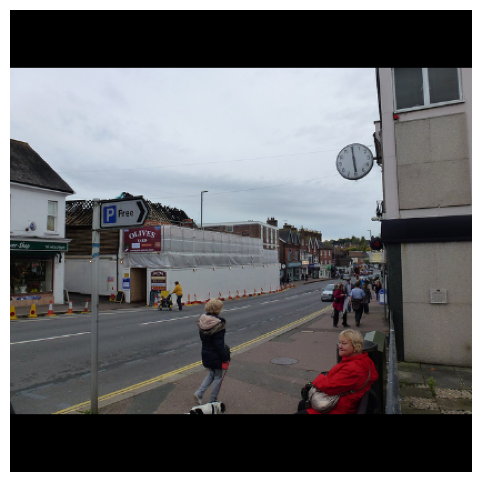

Epoch: 8


  0%|                                                                                                                              | 0/549 [00:07<?, ?it/s, loss=0.795]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                   | 2/549 [00:30<2:06:40, 13.89s/it, loss=0.801]

batch_idx: 1


  1%|▋                                                                                                                   | 3/549 [00:37<1:36:08, 10.57s/it, loss=0.871]

batch_idx: 2


  1%|▊                                                                                                                   | 4/549 [00:43<1:21:58,  9.02s/it, loss=0.842]

batch_idx: 3


  1%|█▍                                                                                                                  | 7/549 [01:05<1:10:00,  7.75s/it, loss=0.793]

batch_idx: 6


  1%|█▋                                                                                                                  | 8/549 [01:12<1:08:23,  7.58s/it, loss=0.815]

batch_idx: 7


  2%|█▉                                                                                                                  | 9/549 [01:19<1:04:31,  7.17s/it, loss=0.819]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:26<1:04:00,  7.13s/it, loss=0.83]

batch_idx: 9


  2%|██▎                                                                                                                | 11/549 [01:33<1:04:33,  7.20s/it, loss=0.818]

batch_idx: 10


  2%|██▌                                                                                                                | 12/549 [01:40<1:04:38,  7.22s/it, loss=0.814]

batch_idx: 11


  2%|██▋                                                                                                                | 13/549 [01:48<1:05:28,  7.33s/it, loss=0.813]

batch_idx: 12


  3%|██▉                                                                                                                | 14/549 [01:54<1:03:16,  7.10s/it, loss=0.826]

batch_idx: 13


  3%|███▏                                                                                                               | 15/549 [02:02<1:03:44,  7.16s/it, loss=0.826]

batch_idx: 14


  3%|███▎                                                                                                               | 16/549 [02:09<1:04:14,  7.23s/it, loss=0.843]

batch_idx: 15


  3%|███▌                                                                                                               | 17/549 [02:16<1:03:32,  7.17s/it, loss=0.849]

batch_idx: 16


  3%|███▊                                                                                                               | 18/549 [02:23<1:03:02,  7.12s/it, loss=0.851]

batch_idx: 17


  3%|███▉                                                                                                               | 19/549 [02:30<1:02:59,  7.13s/it, loss=0.845]

batch_idx: 18


  4%|████▏                                                                                                              | 20/549 [02:37<1:02:48,  7.12s/it, loss=0.837]

batch_idx: 19


  4%|████▍                                                                                                              | 21/549 [02:44<1:02:09,  7.06s/it, loss=0.836]

batch_idx: 20
batch_idx: 21


  4%|████▌                                                                                                              | 22/549 [02:51<1:01:46,  7.03s/it, loss=0.831]

batch_idx: 22


  5%|█████▍                                                                                                             | 26/549 [03:21<1:03:47,  7.32s/it, loss=0.818]

batch_idx: 25
batch_idx: 26


  5%|█████▊                                                                                                             | 28/549 [03:34<1:00:40,  6.99s/it, loss=0.812]

batch_idx: 27


  5%|██████                                                                                                             | 29/549 [03:42<1:01:35,  7.11s/it, loss=0.811]

batch_idx: 28
batch_idx: 29


  5%|██████▎                                                                                                            | 30/549 [03:48<1:00:33,  7.00s/it, loss=0.807]

batch_idx: 30


  6%|██████▋                                                                                                            | 32/549 [04:03<1:00:56,  7.07s/it, loss=0.814]

batch_idx: 31


  6%|██████▉                                                                                                            | 33/549 [04:10<1:02:18,  7.25s/it, loss=0.818]

batch_idx: 32
batch_idx: 33


  6%|███████▎                                                                                                           | 35/549 [04:25<1:02:09,  7.26s/it, loss=0.815]

batch_idx: 34
batch_idx: 35


  7%|███████▊                                                                                                           | 37/549 [04:40<1:03:25,  7.43s/it, loss=0.812]

batch_idx: 36


  7%|███████▉                                                                                                           | 38/549 [04:47<1:02:29,  7.34s/it, loss=0.811]

batch_idx: 37


  7%|████████▏                                                                                                          | 39/549 [04:54<1:01:59,  7.29s/it, loss=0.809]

batch_idx: 38


  7%|████████▍                                                                                                          | 40/549 [05:01<1:01:41,  7.27s/it, loss=0.806]

batch_idx: 39


  7%|████████▋                                                                                                           | 41/549 [05:09<1:01:23,  7.25s/it, loss=0.82]

batch_idx: 40


  9%|█████████▊                                                                                                         | 47/549 [05:52<1:01:41,  7.37s/it, loss=0.812]

batch_idx: 46


  9%|██████████                                                                                                         | 48/549 [06:00<1:02:08,  7.44s/it, loss=0.812]

batch_idx: 47


  9%|██████████▍                                                                                                          | 49/549 [06:07<59:37,  7.15s/it, loss=0.807]

batch_idx: 48


  9%|██████████▋                                                                                                          | 50/549 [06:14<59:03,  7.10s/it, loss=0.807]

batch_idx: 49


  9%|██████████▊                                                                                                          | 51/549 [06:21<59:49,  7.21s/it, loss=0.803]

batch_idx: 50


 10%|███████████▋                                                                                                       | 56/549 [06:58<1:00:34,  7.37s/it, loss=0.804]

batch_idx: 55


 10%|████████████▏                                                                                                        | 57/549 [07:05<59:48,  7.29s/it, loss=0.805]

batch_idx: 56


 11%|████████████▎                                                                                                        | 58/549 [07:13<59:31,  7.27s/it, loss=0.808]

batch_idx: 57


 11%|████████████▍                                                                                                       | 59/549 [07:21<1:00:54,  7.46s/it, loss=0.81]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:27<59:12,  7.27s/it, loss=0.81]

batch_idx: 59


 11%|█████████████                                                                                                        | 61/549 [07:35<58:54,  7.24s/it, loss=0.809]

batch_idx: 60


 11%|█████████████▏                                                                                                       | 62/549 [07:42<59:26,  7.32s/it, loss=0.808]

batch_idx: 61


 11%|█████████████▏                                                                                                     | 63/549 [07:50<1:00:02,  7.41s/it, loss=0.809]

batch_idx: 62


 12%|█████████████▋                                                                                                       | 64/549 [07:57<58:26,  7.23s/it, loss=0.808]

batch_idx: 63


 12%|█████████████▊                                                                                                       | 65/549 [08:04<58:09,  7.21s/it, loss=0.808]

batch_idx: 64


 12%|██████████████                                                                                                       | 66/549 [08:11<58:23,  7.25s/it, loss=0.811]

batch_idx: 65


 12%|██████████████▎                                                                                                      | 67/549 [08:18<57:53,  7.21s/it, loss=0.809]

batch_idx: 66


 12%|██████████████▍                                                                                                      | 68/549 [08:25<56:55,  7.10s/it, loss=0.807]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:32<57:13,  7.15s/it, loss=0.81]

batch_idx: 68


 13%|██████████████▉                                                                                                      | 70/549 [08:40<58:09,  7.29s/it, loss=0.812]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:47<57:34,  7.23s/it, loss=0.81]

batch_idx: 70


 13%|███████████████▎                                                                                                     | 72/549 [08:54<56:34,  7.12s/it, loss=0.808]

batch_idx: 71


 13%|███████████████▌                                                                                                     | 73/549 [09:01<56:13,  7.09s/it, loss=0.806]

batch_idx: 72


 14%|████████████████▏                                                                                                    | 76/549 [09:22<55:13,  7.01s/it, loss=0.812]

batch_idx: 75


 14%|████████████████▍                                                                                                    | 77/549 [09:29<54:42,  6.95s/it, loss=0.811]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:35<54:34,  6.95s/it, loss=0.81]

batch_idx: 77


 14%|████████████████▊                                                                                                    | 79/549 [09:43<55:29,  7.08s/it, loss=0.809]

batch_idx: 78


 15%|█████████████████                                                                                                    | 80/549 [09:50<54:23,  6.96s/it, loss=0.809]

batch_idx: 79


 15%|█████████████████▎                                                                                                   | 81/549 [09:57<54:32,  6.99s/it, loss=0.809]

batch_idx: 80


 15%|█████████████████▍                                                                                                   | 82/549 [10:03<53:13,  6.84s/it, loss=0.807]

batch_idx: 81


 15%|█████████████████▋                                                                                                   | 83/549 [10:10<54:01,  6.96s/it, loss=0.806]

batch_idx: 82


 15%|█████████████████▉                                                                                                   | 84/549 [10:18<54:44,  7.06s/it, loss=0.805]

batch_idx: 83


 15%|██████████████████                                                                                                   | 85/549 [10:25<54:20,  7.03s/it, loss=0.807]

batch_idx: 84


 16%|██████████████████▎                                                                                                  | 86/549 [10:32<56:01,  7.26s/it, loss=0.807]

batch_idx: 85


 16%|██████████████████▌                                                                                                  | 87/549 [10:39<54:27,  7.07s/it, loss=0.807]

batch_idx: 86


 16%|██████████████████▊                                                                                                  | 88/549 [10:45<52:41,  6.86s/it, loss=0.806]

batch_idx: 87


 16%|██████████████████▉                                                                                                  | 89/549 [10:52<53:03,  6.92s/it, loss=0.806]

batch_idx: 88


 16%|███████████████████▏                                                                                                 | 90/549 [10:59<52:57,  6.92s/it, loss=0.805]

batch_idx: 89


 17%|███████████████████▍                                                                                                 | 91/549 [11:06<52:37,  6.89s/it, loss=0.803]

batch_idx: 90


 17%|███████████████████▌                                                                                                 | 92/549 [11:13<53:24,  7.01s/it, loss=0.804]

batch_idx: 91
batch_idx: 92


 17%|████████████████████                                                                                                 | 94/549 [11:28<53:20,  7.04s/it, loss=0.803]

batch_idx: 93


 17%|████████████████████▏                                                                                                | 95/549 [11:35<54:59,  7.27s/it, loss=0.805]

batch_idx: 94


 17%|████████████████████▍                                                                                                | 96/549 [11:42<53:14,  7.05s/it, loss=0.804]

batch_idx: 95


 18%|████████████████████▋                                                                                                | 97/549 [11:49<52:51,  7.02s/it, loss=0.803]

batch_idx: 96


 18%|████████████████████▉                                                                                                | 98/549 [11:55<51:30,  6.85s/it, loss=0.804]

batch_idx: 97


 18%|█████████████████████                                                                                                | 99/549 [12:03<52:49,  7.04s/it, loss=0.803]

batch_idx: 98


 18%|█████████████████████▏                                                                                              | 100/549 [12:10<53:39,  7.17s/it, loss=0.803]

batch_idx: 99


 18%|█████████████████████▎                                                                                              | 101/549 [12:18<53:34,  7.17s/it, loss=0.802]

batch_idx: 100


 19%|█████████████████████▌                                                                                              | 102/549 [12:25<53:56,  7.24s/it, loss=0.803]

batch_idx: 101


 19%|█████████████████████▊                                                                                              | 103/549 [12:32<54:01,  7.27s/it, loss=0.806]

batch_idx: 102


 19%|█████████████████████▉                                                                                              | 104/549 [12:40<54:00,  7.28s/it, loss=0.806]

batch_idx: 103


 19%|██████████████████████▏                                                                                             | 105/549 [12:48<55:23,  7.49s/it, loss=0.806]

batch_idx: 104


 19%|██████████████████████▍                                                                                             | 106/549 [12:54<53:36,  7.26s/it, loss=0.807]

batch_idx: 105


 19%|██████████████████████▌                                                                                             | 107/549 [13:02<53:49,  7.31s/it, loss=0.806]

batch_idx: 106


 20%|██████████████████████▊                                                                                             | 108/549 [13:09<53:48,  7.32s/it, loss=0.806]

batch_idx: 107


 20%|███████████████████████                                                                                             | 109/549 [13:16<53:10,  7.25s/it, loss=0.805]

batch_idx: 108


 20%|███████████████████████▏                                                                                            | 110/549 [13:23<53:18,  7.29s/it, loss=0.806]

batch_idx: 109


 20%|███████████████████████▍                                                                                            | 111/549 [13:30<52:10,  7.15s/it, loss=0.806]

batch_idx: 110


 20%|███████████████████████▋                                                                                            | 112/549 [13:37<51:44,  7.10s/it, loss=0.804]

batch_idx: 111


 21%|███████████████████████▉                                                                                            | 113/549 [13:45<52:05,  7.17s/it, loss=0.804]

batch_idx: 112


 21%|████████████████████████                                                                                            | 114/549 [13:52<51:50,  7.15s/it, loss=0.802]

batch_idx: 113


 21%|████████████████████████▎                                                                                           | 115/549 [13:59<51:05,  7.06s/it, loss=0.801]

batch_idx: 114


 21%|████████████████████████▌                                                                                           | 116/549 [14:06<51:10,  7.09s/it, loss=0.801]

batch_idx: 115


 21%|█████████████████████████▏                                                                                            | 117/549 [14:13<51:30,  7.15s/it, loss=0.8]

batch_idx: 116


 21%|████████████████████████▉                                                                                           | 118/549 [14:20<51:03,  7.11s/it, loss=0.799]

batch_idx: 117


 22%|█████████████████████████▏                                                                                          | 119/549 [14:27<50:45,  7.08s/it, loss=0.798]

batch_idx: 118


 22%|█████████████████████████▎                                                                                          | 120/549 [14:34<50:56,  7.13s/it, loss=0.799]

batch_idx: 119


 22%|█████████████████████████▌                                                                                          | 121/549 [14:41<50:47,  7.12s/it, loss=0.801]

batch_idx: 120


 23%|██████████████████████████▌                                                                                         | 126/549 [15:17<50:21,  7.14s/it, loss=0.801]

batch_idx: 125


 23%|██████████████████████████▊                                                                                         | 127/549 [15:24<50:06,  7.12s/it, loss=0.801]

batch_idx: 126


 23%|███████████████████████████                                                                                         | 128/549 [15:30<48:16,  6.88s/it, loss=0.801]

batch_idx: 127


 23%|███████████████████████████▎                                                                                        | 129/549 [15:38<49:53,  7.13s/it, loss=0.801]

batch_idx: 128


 24%|███████████████████████████▍                                                                                        | 130/549 [15:45<49:39,  7.11s/it, loss=0.801]

batch_idx: 129


 24%|███████████████████████████▋                                                                                        | 131/549 [15:52<49:03,  7.04s/it, loss=0.801]

batch_idx: 130


 24%|███████████████████████████▉                                                                                        | 132/549 [15:59<47:59,  6.90s/it, loss=0.803]

batch_idx: 131


 24%|████████████████████████████                                                                                        | 133/549 [16:06<48:03,  6.93s/it, loss=0.802]

batch_idx: 132


 24%|████████████████████████████▊                                                                                         | 134/549 [16:12<47:22,  6.85s/it, loss=0.8]

batch_idx: 133


 25%|█████████████████████████████                                                                                         | 135/549 [16:19<47:20,  6.86s/it, loss=0.8]

batch_idx: 134


 25%|█████████████████████████████▏                                                                                        | 136/549 [16:26<47:56,  6.96s/it, loss=0.8]

batch_idx: 135


 25%|████████████████████████████▉                                                                                       | 137/549 [16:34<48:30,  7.06s/it, loss=0.799]

batch_idx: 136


 25%|█████████████████████████████▏                                                                                      | 138/549 [16:41<48:44,  7.12s/it, loss=0.799]

batch_idx: 137


 25%|█████████████████████████████▎                                                                                      | 139/549 [16:48<49:21,  7.22s/it, loss=0.799]

batch_idx: 138


 26%|█████████████████████████████▌                                                                                      | 140/549 [16:55<48:29,  7.11s/it, loss=0.799]

batch_idx: 139


 26%|█████████████████████████████▊                                                                                      | 141/549 [17:02<47:39,  7.01s/it, loss=0.798]

batch_idx: 140


 26%|██████████████████████████████                                                                                      | 142/549 [17:09<48:13,  7.11s/it, loss=0.798]

batch_idx: 141


 26%|██████████████████████████████▏                                                                                     | 143/549 [17:16<46:45,  6.91s/it, loss=0.798]

batch_idx: 142


 26%|██████████████████████████████▍                                                                                     | 144/549 [17:23<47:00,  6.97s/it, loss=0.798]

batch_idx: 143


 26%|██████████████████████████████▋                                                                                     | 145/549 [17:30<46:37,  6.92s/it, loss=0.797]

batch_idx: 144


 27%|██████████████████████████████▊                                                                                     | 146/549 [17:37<46:44,  6.96s/it, loss=0.796]

batch_idx: 145


 27%|███████████████████████████████                                                                                     | 147/549 [17:44<46:33,  6.95s/it, loss=0.795]

batch_idx: 146


 27%|███████████████████████████████▎                                                                                    | 148/549 [17:52<48:20,  7.23s/it, loss=0.796]

batch_idx: 147


 27%|███████████████████████████████▍                                                                                    | 149/549 [17:59<47:30,  7.13s/it, loss=0.796]

batch_idx: 148


 27%|███████████████████████████████▋                                                                                    | 150/549 [18:06<47:07,  7.09s/it, loss=0.796]

batch_idx: 149


 28%|███████████████████████████████▉                                                                                    | 151/549 [18:13<47:56,  7.23s/it, loss=0.796]

batch_idx: 150


 28%|████████████████████████████████                                                                                    | 152/549 [18:20<46:40,  7.05s/it, loss=0.796]

batch_idx: 151


 28%|████████████████████████████████▎                                                                                   | 153/549 [18:27<46:17,  7.01s/it, loss=0.796]

batch_idx: 152


 28%|████████████████████████████████▌                                                                                   | 154/549 [18:34<47:12,  7.17s/it, loss=0.796]

batch_idx: 153


 28%|████████████████████████████████▊                                                                                   | 155/549 [18:42<48:06,  7.33s/it, loss=0.796]

batch_idx: 154


 28%|████████████████████████████████▉                                                                                   | 156/549 [18:49<47:32,  7.26s/it, loss=0.797]

batch_idx: 155


 29%|█████████████████████████████████▏                                                                                  | 157/549 [18:56<47:30,  7.27s/it, loss=0.796]

batch_idx: 156


 29%|█████████████████████████████████▍                                                                                  | 158/549 [19:04<47:38,  7.31s/it, loss=0.795]

batch_idx: 157


 29%|█████████████████████████████████▌                                                                                  | 159/549 [19:11<46:45,  7.19s/it, loss=0.796]

batch_idx: 158
batch_idx: 159


 29%|██████████████████████████████████                                                                                  | 161/549 [19:25<46:37,  7.21s/it, loss=0.796]

batch_idx: 160


 30%|██████████████████████████████████▏                                                                                 | 162/549 [19:32<45:37,  7.07s/it, loss=0.795]

batch_idx: 161


 30%|██████████████████████████████████▏                                                                                 | 162/549 [19:39<45:37,  7.07s/it, loss=0.794]

batch_idx: 162


 30%|██████████████████████████████████▋                                                                                 | 164/549 [19:46<45:23,  7.07s/it, loss=0.796]

batch_idx: 163


 30%|██████████████████████████████████▊                                                                                 | 165/549 [19:54<46:14,  7.23s/it, loss=0.796]

batch_idx: 164
batch_idx: 165


 30%|███████████████████████████████████                                                                                 | 166/549 [20:00<44:59,  7.05s/it, loss=0.795]

batch_idx: 166


 31%|███████████████████████████████████▍                                                                                | 168/549 [20:14<43:51,  6.91s/it, loss=0.795]

batch_idx: 167


 31%|███████████████████████████████████▋                                                                                | 169/549 [20:21<44:53,  7.09s/it, loss=0.794]

batch_idx: 168


 31%|███████████████████████████████████▉                                                                                | 170/549 [20:28<44:24,  7.03s/it, loss=0.794]

batch_idx: 169


 31%|████████████████████████████████████▏                                                                               | 171/549 [20:35<43:39,  6.93s/it, loss=0.794]

batch_idx: 170


 31%|████████████████████████████████████▎                                                                               | 172/549 [20:43<44:56,  7.15s/it, loss=0.794]

batch_idx: 171


 32%|████████████████████████████████████▌                                                                               | 173/549 [20:50<44:43,  7.14s/it, loss=0.794]

batch_idx: 172


 32%|████████████████████████████████████▊                                                                               | 174/549 [20:57<44:38,  7.14s/it, loss=0.794]

batch_idx: 173


 32%|████████████████████████████████████▉                                                                               | 175/549 [21:04<43:48,  7.03s/it, loss=0.793]

batch_idx: 174


 32%|█████████████████████████████████████▏                                                                              | 176/549 [21:11<44:10,  7.11s/it, loss=0.794]

batch_idx: 175


 32%|█████████████████████████████████████▍                                                                              | 177/549 [21:18<43:40,  7.04s/it, loss=0.794]

batch_idx: 176


 32%|█████████████████████████████████████▌                                                                              | 178/549 [21:25<44:29,  7.20s/it, loss=0.793]

batch_idx: 177


 33%|█████████████████████████████████████▊                                                                              | 179/549 [21:32<44:14,  7.18s/it, loss=0.793]

batch_idx: 178


 33%|██████████████████████████████████████                                                                              | 180/549 [21:40<44:27,  7.23s/it, loss=0.793]

batch_idx: 179


 33%|██████████████████████████████████████▏                                                                             | 181/549 [21:47<44:53,  7.32s/it, loss=0.793]

batch_idx: 180


 33%|██████████████████████████████████████▍                                                                             | 182/549 [21:54<44:29,  7.27s/it, loss=0.793]

batch_idx: 181


 33%|██████████████████████████████████████▋                                                                             | 183/549 [22:02<44:32,  7.30s/it, loss=0.793]

batch_idx: 182


 34%|██████████████████████████████████████▉                                                                             | 184/549 [22:09<43:54,  7.22s/it, loss=0.792]

batch_idx: 183


 34%|███████████████████████████████████████                                                                             | 185/549 [22:16<43:04,  7.10s/it, loss=0.792]

batch_idx: 184


 34%|███████████████████████████████████████▎                                                                            | 186/549 [22:22<41:45,  6.90s/it, loss=0.791]

batch_idx: 185


 34%|███████████████████████████████████████▌                                                                            | 187/549 [22:30<42:56,  7.12s/it, loss=0.792]

batch_idx: 186


 34%|███████████████████████████████████████▋                                                                            | 188/549 [22:37<42:53,  7.13s/it, loss=0.792]

batch_idx: 187


 34%|███████████████████████████████████████▉                                                                            | 189/549 [22:44<42:15,  7.04s/it, loss=0.791]

batch_idx: 188


 35%|████████████████████████████████████████▏                                                                           | 190/549 [22:51<41:57,  7.01s/it, loss=0.792]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [22:57<41:11,  6.90s/it, loss=0.79]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:05<41:53,  7.04s/it, loss=0.79]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:12<42:15,  7.12s/it, loss=0.79]

batch_idx: 192


 35%|████████████████████████████████████████▉                                                                           | 194/549 [23:19<41:56,  7.09s/it, loss=0.791]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [23:26<41:18,  7.00s/it, loss=0.79]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [23:33<41:15,  7.01s/it, loss=0.79]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [23:40<41:39,  7.10s/it, loss=0.79]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [23:48<42:04,  7.19s/it, loss=0.79]

batch_idx: 197


 36%|██████████████████████████████████████████                                                                          | 199/549 [23:55<41:42,  7.15s/it, loss=0.791]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:02<41:51,  7.20s/it, loss=0.79]

batch_idx: 199


 36%|██████████████████████████████████████████▎                                                                         | 200/549 [24:09<41:51,  7.20s/it, loss=0.791]

batch_idx: 200
==> Saving checkpoint


 37%|██████████████████████████████████████████▋                                                                         | 202/549 [24:29<56:52,  9.83s/it, loss=0.791]

batch_idx: 201


 37%|██████████████████████████████████████████▉                                                                         | 203/549 [24:36<52:52,  9.17s/it, loss=0.792]

batch_idx: 202


 37%|███████████████████████████████████████████                                                                         | 204/549 [24:43<48:27,  8.43s/it, loss=0.791]

batch_idx: 203


 37%|███████████████████████████████████████████▎                                                                        | 205/549 [24:51<46:42,  8.15s/it, loss=0.791]

batch_idx: 204


 38%|███████████████████████████████████████████▌                                                                        | 206/549 [24:57<44:08,  7.72s/it, loss=0.791]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:04<42:46,  7.51s/it, loss=0.79]

batch_idx: 206


 38%|███████████████████████████████████████████▉                                                                        | 208/549 [25:11<41:28,  7.30s/it, loss=0.791]

batch_idx: 207


 38%|████████████████████████████████████████████▏                                                                       | 209/549 [25:18<40:46,  7.19s/it, loss=0.791]

batch_idx: 208


 38%|████████████████████████████████████████████▎                                                                       | 210/549 [25:25<40:18,  7.13s/it, loss=0.791]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [25:32<40:11,  7.13s/it, loss=0.79]

batch_idx: 210


 39%|████████████████████████████████████████████▊                                                                       | 212/549 [25:40<40:24,  7.19s/it, loss=0.792]

batch_idx: 211


 39%|█████████████████████████████████████████████                                                                       | 213/549 [25:47<40:18,  7.20s/it, loss=0.792]

batch_idx: 212
batch_idx: 213


 39%|█████████████████████████████████████████████▍                                                                      | 215/549 [26:01<40:32,  7.28s/it, loss=0.791]

batch_idx: 214


 39%|█████████████████████████████████████████████▋                                                                      | 216/549 [26:09<40:29,  7.30s/it, loss=0.791]

batch_idx: 215


 40%|█████████████████████████████████████████████▊                                                                      | 217/549 [26:15<39:13,  7.09s/it, loss=0.791]

batch_idx: 216


 40%|██████████████████████████████████████████████                                                                      | 218/549 [26:23<40:04,  7.26s/it, loss=0.791]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [26:30<40:00,  7.28s/it, loss=0.79]

batch_idx: 218


 40%|██████████████████████████████████████████████▍                                                                     | 220/549 [26:37<38:59,  7.11s/it, loss=0.791]

batch_idx: 219
batch_idx: 220


 40%|███████████████████████████████████████████████                                                                      | 221/549 [26:44<38:32,  7.05s/it, loss=0.79]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [26:58<37:40,  6.93s/it, loss=0.79]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:05<37:23,  6.90s/it, loss=0.79]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:12<37:58,  7.03s/it, loss=0.79]

batch_idx: 224


 41%|███████████████████████████████████████████████▊                                                                    | 226/549 [27:19<37:38,  6.99s/it, loss=0.789]

batch_idx: 225


 41%|███████████████████████████████████████████████▉                                                                    | 227/549 [27:26<37:46,  7.04s/it, loss=0.789]

batch_idx: 226


 42%|████████████████████████████████████████████████▏                                                                   | 228/549 [27:34<38:33,  7.21s/it, loss=0.789]

batch_idx: 227


 42%|████████████████████████████████████████████████▍                                                                   | 229/549 [27:41<37:58,  7.12s/it, loss=0.789]

batch_idx: 228


 42%|████████████████████████████████████████████████▌                                                                   | 230/549 [27:48<38:28,  7.24s/it, loss=0.789]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [27:55<38:40,  7.30s/it, loss=0.79]

batch_idx: 230


 42%|█████████████████████████████████████████████████▍                                                                   | 232/549 [28:02<37:30,  7.10s/it, loss=0.79]

batch_idx: 231


 42%|█████████████████████████████████████████████████▋                                                                   | 233/549 [28:09<37:28,  7.12s/it, loss=0.79]

batch_idx: 232


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [28:16<37:20,  7.11s/it, loss=0.79]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [28:23<37:12,  7.11s/it, loss=0.79]

batch_idx: 234


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [28:45<36:47,  7.10s/it, loss=0.79]

batch_idx: 237


 44%|██████████████████████████████████████████████████▍                                                                 | 239/549 [28:52<36:35,  7.08s/it, loss=0.791]

batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [28:59<36:55,  7.17s/it, loss=0.79]

batch_idx: 239


 44%|██████████████████████████████████████████████████▉                                                                 | 241/549 [29:06<36:30,  7.11s/it, loss=0.789]

batch_idx: 240


 44%|███████████████████████████████████████████████████▏                                                                | 242/549 [29:13<35:43,  6.98s/it, loss=0.789]

batch_idx: 241


 44%|███████████████████████████████████████████████████▎                                                                | 243/549 [29:21<36:19,  7.12s/it, loss=0.789]

batch_idx: 242


 44%|███████████████████████████████████████████████████▌                                                                | 244/549 [29:28<36:07,  7.11s/it, loss=0.789]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [29:35<35:43,  7.05s/it, loss=0.79]

batch_idx: 244


 45%|███████████████████████████████████████████████████▉                                                                | 246/549 [29:42<35:34,  7.04s/it, loss=0.789]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [29:49<35:27,  7.04s/it, loss=0.79]

batch_idx: 246


 45%|████████████████████████████████████████████████████▍                                                               | 248/549 [29:56<35:32,  7.09s/it, loss=0.789]

batch_idx: 247


 45%|████████████████████████████████████████████████████▍                                                               | 248/549 [30:03<35:32,  7.09s/it, loss=0.789]

batch_idx: 248


 46%|████████████████████████████████████████████████████▊                                                               | 250/549 [30:10<35:50,  7.19s/it, loss=0.788]

batch_idx: 249


 46%|█████████████████████████████████████████████████████                                                               | 251/549 [30:17<35:03,  7.06s/it, loss=0.787]

batch_idx: 250


 46%|█████████████████████████████████████████████████████▏                                                              | 252/549 [30:24<34:37,  6.99s/it, loss=0.788]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▍                                                              | 253/549 [30:31<34:25,  6.98s/it, loss=0.788]

batch_idx: 252


 46%|█████████████████████████████████████████████████████▋                                                              | 254/549 [30:38<34:10,  6.95s/it, loss=0.787]

batch_idx: 253


 46%|█████████████████████████████████████████████████████▉                                                              | 255/549 [30:44<33:51,  6.91s/it, loss=0.787]

batch_idx: 254


 47%|██████████████████████████████████████████████████████                                                              | 256/549 [30:51<33:49,  6.93s/it, loss=0.787]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▎                                                             | 257/549 [30:59<34:22,  7.06s/it, loss=0.787]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▌                                                             | 258/549 [31:06<34:36,  7.14s/it, loss=0.786]

batch_idx: 257


 47%|██████████████████████████████████████████████████████▋                                                             | 259/549 [31:13<34:17,  7.09s/it, loss=0.786]

batch_idx: 258


 47%|██████████████████████████████████████████████████████▉                                                             | 260/549 [31:20<34:07,  7.09s/it, loss=0.786]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▏                                                            | 261/549 [31:27<33:50,  7.05s/it, loss=0.786]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▎                                                            | 262/549 [31:34<33:12,  6.94s/it, loss=0.786]

batch_idx: 261


 48%|███████████████████████████████████████████████████████▌                                                            | 263/549 [31:41<33:44,  7.08s/it, loss=0.785]

batch_idx: 262


 48%|███████████████████████████████████████████████████████▊                                                            | 264/549 [31:49<34:42,  7.31s/it, loss=0.785]

batch_idx: 263


 48%|███████████████████████████████████████████████████████▉                                                            | 265/549 [31:56<34:26,  7.28s/it, loss=0.785]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▏                                                           | 266/549 [32:04<34:46,  7.37s/it, loss=0.785]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▍                                                           | 267/549 [32:11<34:18,  7.30s/it, loss=0.786]

batch_idx: 266


 49%|████████████████████████████████████████████████████████▋                                                           | 268/549 [32:18<33:19,  7.12s/it, loss=0.785]

batch_idx: 267


 49%|████████████████████████████████████████████████████████▊                                                           | 269/549 [32:24<32:42,  7.01s/it, loss=0.785]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████                                                           | 270/549 [32:31<32:16,  6.94s/it, loss=0.785]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▎                                                          | 271/549 [32:38<32:27,  7.01s/it, loss=0.784]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▍                                                          | 272/549 [32:46<33:08,  7.18s/it, loss=0.784]

batch_idx: 271


 50%|█████████████████████████████████████████████████████████▋                                                          | 273/549 [32:53<32:36,  7.09s/it, loss=0.784]

batch_idx: 272


 50%|█████████████████████████████████████████████████████████▉                                                          | 274/549 [33:00<32:28,  7.08s/it, loss=0.784]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████                                                          | 275/549 [33:07<32:37,  7.14s/it, loss=0.784]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▎                                                         | 276/549 [33:14<32:26,  7.13s/it, loss=0.784]

batch_idx: 275


 50%|██████████████████████████████████████████████████████████▌                                                         | 277/549 [33:21<32:09,  7.09s/it, loss=0.784]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                        | 280/549 [33:43<32:21,  7.22s/it, loss=0.783]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▎                                                        | 281/549 [33:50<32:07,  7.19s/it, loss=0.783]

batch_idx: 280


 51%|███████████████████████████████████████████████████████████▌                                                        | 282/549 [33:57<31:35,  7.10s/it, loss=0.783]

batch_idx: 281


 52%|███████████████████████████████████████████████████████████▊                                                        | 283/549 [34:04<31:41,  7.15s/it, loss=0.782]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████                                                        | 284/549 [34:11<31:06,  7.04s/it, loss=0.782]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▏                                                       | 285/549 [34:18<30:48,  7.00s/it, loss=0.782]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▍                                                       | 286/549 [34:25<31:15,  7.13s/it, loss=0.782]

batch_idx: 285


 52%|████████████████████████████████████████████████████████████▋                                                       | 287/549 [34:32<30:13,  6.92s/it, loss=0.781]

batch_idx: 286


 52%|████████████████████████████████████████████████████████████▊                                                       | 288/549 [34:40<31:21,  7.21s/it, loss=0.782]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████                                                       | 289/549 [34:46<29:44,  6.86s/it, loss=0.782]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▎                                                      | 290/549 [34:53<29:34,  6.85s/it, loss=0.781]

batch_idx: 289


 53%|█████████████████████████████████████████████████████████████▍                                                      | 291/549 [35:00<29:47,  6.93s/it, loss=0.781]

batch_idx: 290


 53%|█████████████████████████████████████████████████████████████▋                                                      | 292/549 [35:07<30:06,  7.03s/it, loss=0.782]

batch_idx: 291


 53%|█████████████████████████████████████████████████████████████▉                                                      | 293/549 [35:15<30:50,  7.23s/it, loss=0.781]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████                                                      | 294/549 [35:22<31:27,  7.40s/it, loss=0.782]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▎                                                     | 295/549 [35:30<30:57,  7.31s/it, loss=0.781]

batch_idx: 294


 54%|██████████████████████████████████████████████████████████████▌                                                     | 296/549 [35:37<30:30,  7.24s/it, loss=0.781]

batch_idx: 295


 54%|██████████████████████████████████████████████████████████████▊                                                     | 297/549 [35:43<29:47,  7.09s/it, loss=0.782]

batch_idx: 296


 54%|██████████████████████████████████████████████████████████████▉                                                     | 298/549 [35:51<29:46,  7.12s/it, loss=0.782]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▏                                                    | 299/549 [35:58<29:45,  7.14s/it, loss=0.782]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▍                                                    | 300/549 [36:05<29:33,  7.12s/it, loss=0.782]

batch_idx: 299


 55%|███████████████████████████████████████████████████████████████▌                                                    | 301/549 [36:12<29:31,  7.14s/it, loss=0.781]

batch_idx: 300


 55%|███████████████████████████████████████████████████████████████▊                                                    | 302/549 [36:19<28:53,  7.02s/it, loss=0.781]

batch_idx: 301


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [36:39<28:06,  6.91s/it, loss=0.78]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [36:46<27:42,  6.84s/it, loss=0.78]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [36:53<27:27,  6.81s/it, loss=0.78]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [37:00<28:06,  7.00s/it, loss=0.78]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [37:07<28:06,  7.03s/it, loss=0.78]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [37:15<28:31,  7.16s/it, loss=0.78]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [37:22<28:09,  7.10s/it, loss=0.78]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [37:29<28:01,  7.10s/it, loss=0.78]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [37:35<27:08,  6.90s/it, loss=0.78]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [37:43<27:43,  7.08s/it, loss=0.78]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [37:50<28:17,  7.25s/it, loss=0.78]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▎                                                 | 316/549 [37:58<28:12,  7.27s/it, loss=0.78]

batch_idx: 315


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 317/549 [38:05<27:57,  7.23s/it, loss=0.779]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▏                                                | 318/549 [38:12<28:14,  7.34s/it, loss=0.779]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▍                                                | 319/549 [38:20<27:47,  7.25s/it, loss=0.779]

batch_idx: 318


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [38:27<27:45,  7.27s/it, loss=0.78]

batch_idx: 319


 58%|███████████████████████████████████████████████████████████████████▊                                                | 321/549 [38:34<27:48,  7.32s/it, loss=0.779]

batch_idx: 320


 60%|█████████████████████████████████████████████████████████████████████▎                                              | 328/549 [39:24<26:19,  7.15s/it, loss=0.778]

batch_idx: 327


 60%|█████████████████████████████████████████████████████████████████████▌                                              | 329/549 [39:31<26:02,  7.10s/it, loss=0.778]

batch_idx: 328


 60%|█████████████████████████████████████████████████████████████████████▋                                              | 330/549 [39:39<26:37,  7.30s/it, loss=0.778]

batch_idx: 329


 60%|█████████████████████████████████████████████████████████████████████▉                                              | 331/549 [39:46<26:31,  7.30s/it, loss=0.778]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▏                                             | 332/549 [39:53<26:02,  7.20s/it, loss=0.778]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▎                                             | 333/549 [40:00<25:46,  7.16s/it, loss=0.778]

batch_idx: 332


 61%|██████████████████████████████████████████████████████████████████████▌                                             | 334/549 [40:07<25:44,  7.18s/it, loss=0.777]

batch_idx: 333


 61%|██████████████████████████████████████████████████████████████████████▊                                             | 335/549 [40:14<25:29,  7.15s/it, loss=0.778]

batch_idx: 334


 61%|██████████████████████████████████████████████████████████████████████▉                                             | 336/549 [40:22<25:29,  7.18s/it, loss=0.778]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▏                                            | 337/549 [40:29<25:22,  7.18s/it, loss=0.778]

batch_idx: 336


 62%|███████████████████████████████████████████████████████████████████████▍                                            | 338/549 [40:36<25:01,  7.12s/it, loss=0.778]

batch_idx: 337


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 339/549 [40:43<25:08,  7.18s/it, loss=0.778]

batch_idx: 338


 62%|███████████████████████████████████████████████████████████████████████▊                                            | 340/549 [40:50<25:01,  7.18s/it, loss=0.777]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████                                            | 341/549 [40:57<24:26,  7.05s/it, loss=0.777]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 342/549 [41:04<23:57,  6.95s/it, loss=0.778]

batch_idx: 341


 62%|████████████████████████████████████████████████████████████████████████▍                                           | 343/549 [41:11<24:01,  7.00s/it, loss=0.778]

batch_idx: 342


 63%|████████████████████████████████████████████████████████████████████████▋                                           | 344/549 [41:17<23:12,  6.79s/it, loss=0.778]

batch_idx: 343


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 345/549 [41:24<23:00,  6.77s/it, loss=0.778]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████                                           | 346/549 [41:31<23:27,  6.93s/it, loss=0.778]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▎                                          | 347/549 [41:39<23:47,  7.07s/it, loss=0.778]

batch_idx: 346


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 348/549 [41:46<23:37,  7.05s/it, loss=0.778]

batch_idx: 347


 64%|█████████████████████████████████████████████████████████████████████████▋                                          | 349/549 [41:53<23:30,  7.05s/it, loss=0.778]

batch_idx: 348


 64%|█████████████████████████████████████████████████████████████████████████▉                                          | 350/549 [42:00<23:19,  7.03s/it, loss=0.778]

batch_idx: 349


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 351/549 [42:07<23:11,  7.03s/it, loss=0.778]

batch_idx: 350


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 352/549 [42:14<23:06,  7.04s/it, loss=0.778]

batch_idx: 351


 64%|██████████████████████████████████████████████████████████████████████████▌                                         | 353/549 [42:21<22:57,  7.03s/it, loss=0.778]

batch_idx: 352


 64%|██████████████████████████████████████████████████████████████████████████▊                                         | 354/549 [42:28<22:44,  7.00s/it, loss=0.778]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████                                         | 355/549 [42:35<22:29,  6.96s/it, loss=0.778]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▏                                        | 356/549 [42:42<22:44,  7.07s/it, loss=0.778]

batch_idx: 355


 65%|███████████████████████████████████████████████████████████████████████████▍                                        | 357/549 [42:50<23:38,  7.39s/it, loss=0.778]

batch_idx: 356


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 358/549 [42:57<23:17,  7.32s/it, loss=0.777]

batch_idx: 357


 65%|███████████████████████████████████████████████████████████████████████████▊                                        | 359/549 [43:04<22:36,  7.14s/it, loss=0.778]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████                                        | 360/549 [43:11<22:31,  7.15s/it, loss=0.778]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 361/549 [43:18<22:04,  7.05s/it, loss=0.778]

batch_idx: 360


 66%|████████████████████████████████████████████████████████████████████████████▍                                       | 362/549 [43:25<22:00,  7.06s/it, loss=0.777]

batch_idx: 361


 66%|████████████████████████████████████████████████████████████████████████████▋                                       | 363/549 [43:32<21:49,  7.04s/it, loss=0.777]

batch_idx: 362


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 364/549 [43:39<21:51,  7.09s/it, loss=0.777]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████                                       | 365/549 [43:46<21:36,  7.05s/it, loss=0.777]

batch_idx: 364


 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 366/549 [43:53<21:31,  7.06s/it, loss=0.777]

batch_idx: 365


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 367/549 [44:01<21:54,  7.22s/it, loss=0.777]

batch_idx: 366


 67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 368/549 [44:08<22:03,  7.31s/it, loss=0.778]

batch_idx: 367


 67%|█████████████████████████████████████████████████████████████████████████████▉                                      | 369/549 [44:16<21:53,  7.30s/it, loss=0.778]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 370/549 [44:23<21:47,  7.30s/it, loss=0.778]

batch_idx: 369


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 371/549 [44:29<20:37,  6.95s/it, loss=0.778]

batch_idx: 370


 68%|██████████████████████████████████████████████████████████████████████████████▌                                     | 372/549 [44:37<21:00,  7.12s/it, loss=0.778]

batch_idx: 371


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 373/549 [44:44<20:49,  7.10s/it, loss=0.778]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 374/549 [44:51<20:52,  7.16s/it, loss=0.778]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▏                                    | 375/549 [44:58<20:28,  7.06s/it, loss=0.778]

batch_idx: 374


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 376/549 [45:05<20:31,  7.12s/it, loss=0.778]

batch_idx: 375


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 377/549 [45:12<20:10,  7.04s/it, loss=0.778]

batch_idx: 376


 69%|███████████████████████████████████████████████████████████████████████████████▊                                    | 378/549 [45:19<20:23,  7.15s/it, loss=0.778]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 379/549 [45:26<19:56,  7.04s/it, loss=0.777]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 380/549 [45:33<19:59,  7.10s/it, loss=0.777]

batch_idx: 379


 69%|████████████████████████████████████████████████████████████████████████████████▌                                   | 381/549 [45:40<19:33,  6.99s/it, loss=0.778]

batch_idx: 380


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 382/549 [45:47<19:37,  7.05s/it, loss=0.777]

batch_idx: 381


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 383/549 [45:54<19:16,  6.97s/it, loss=0.777]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▏                                  | 384/549 [46:01<19:19,  7.03s/it, loss=0.777]

batch_idx: 383


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 385/549 [46:08<18:50,  6.90s/it, loss=0.779]

batch_idx: 384


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 386/549 [46:15<18:49,  6.93s/it, loss=0.779]

batch_idx: 385


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                  | 387/549 [46:22<18:59,  7.03s/it, loss=0.778]

batch_idx: 386


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 388/549 [46:29<18:45,  6.99s/it, loss=0.778]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 389/549 [46:36<18:28,  6.93s/it, loss=0.778]

batch_idx: 388


 71%|██████████████████████████████████████████████████████████████████████████████████▍                                 | 390/549 [46:43<18:41,  7.05s/it, loss=0.778]

batch_idx: 389


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 391/549 [46:50<18:47,  7.14s/it, loss=0.778]

batch_idx: 390


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 392/549 [46:57<18:27,  7.05s/it, loss=0.778]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 393/549 [47:04<18:09,  6.98s/it, loss=0.778]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▏                                | 394/549 [47:11<18:08,  7.02s/it, loss=0.778]

batch_idx: 393


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 395/549 [47:18<17:55,  6.98s/it, loss=0.778]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 398/549 [47:40<17:47,  7.07s/it, loss=0.778]

batch_idx: 397


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 399/549 [47:47<18:03,  7.23s/it, loss=0.778]

batch_idx: 398


 73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 400/549 [47:55<18:10,  7.32s/it, loss=0.778]

batch_idx: 399


 73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 400/549 [48:02<18:10,  7.32s/it, loss=0.778]

batch_idx: 400
==> Saving checkpoint


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 402/549 [48:24<25:27, 10.39s/it, loss=0.778]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                              | 403/549 [48:31<22:42,  9.33s/it, loss=0.778]

batch_idx: 402


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 404/549 [48:38<21:01,  8.70s/it, loss=0.778]

batch_idx: 403


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 405/549 [48:45<19:52,  8.28s/it, loss=0.778]

batch_idx: 404


 74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 406/549 [48:52<18:43,  7.86s/it, loss=0.778]

batch_idx: 405
batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 408/549 [49:07<17:40,  7.52s/it, loss=0.778]

batch_idx: 407


 74%|██████████████████████████████████████████████████████████████████████████████████████▍                             | 409/549 [49:14<17:05,  7.32s/it, loss=0.778]

batch_idx: 408
batch_idx: 409


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 411/549 [49:28<16:34,  7.20s/it, loss=0.778]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 412/549 [49:35<16:21,  7.16s/it, loss=0.778]

batch_idx: 411


 75%|███████████████████████████████████████████████████████████████████████████████████████▎                            | 413/549 [49:42<16:20,  7.21s/it, loss=0.778]

batch_idx: 412


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 414/549 [49:50<16:30,  7.34s/it, loss=0.778]

batch_idx: 413


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 415/549 [49:58<16:39,  7.46s/it, loss=0.778]

batch_idx: 414


 76%|███████████████████████████████████████████████████████████████████████████████████████▉                            | 416/549 [50:05<16:17,  7.35s/it, loss=0.778]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 417/549 [50:12<16:17,  7.41s/it, loss=0.778]

batch_idx: 416


 76%|████████████████████████████████████████████████████████████████████████████████████████▎                           | 418/549 [50:19<15:51,  7.26s/it, loss=0.778]

batch_idx: 417


 76%|████████████████████████████████████████████████████████████████████████████████████████▌                           | 419/549 [50:27<15:58,  7.37s/it, loss=0.777]

batch_idx: 418


 77%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 420/549 [50:33<15:24,  7.17s/it, loss=0.778]

batch_idx: 419


 77%|████████████████████████████████████████████████████████████████████████████████████████▉                           | 421/549 [50:41<15:19,  7.18s/it, loss=0.777]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▏                          | 422/549 [50:48<15:19,  7.24s/it, loss=0.777]

batch_idx: 421


 77%|█████████████████████████████████████████████████████████████████████████████████████████▍                          | 423/549 [50:55<14:49,  7.06s/it, loss=0.777]

batch_idx: 422


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 424/549 [51:02<14:35,  7.00s/it, loss=0.776]

batch_idx: 423


 77%|█████████████████████████████████████████████████████████████████████████████████████████▊                          | 425/549 [51:10<15:10,  7.34s/it, loss=0.776]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████                          | 426/549 [51:17<15:03,  7.34s/it, loss=0.776]

batch_idx: 425


 78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 427/549 [51:24<14:55,  7.34s/it, loss=0.776]

batch_idx: 426


 78%|██████████████████████████████████████████████████████████████████████████████████████████▍                         | 428/549 [51:32<14:54,  7.39s/it, loss=0.776]

batch_idx: 427


 78%|██████████████████████████████████████████████████████████████████████████████████████████▋                         | 429/549 [51:39<14:35,  7.29s/it, loss=0.776]

batch_idx: 428


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                         | 430/549 [51:47<14:41,  7.41s/it, loss=0.776]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████                         | 431/549 [51:54<14:29,  7.37s/it, loss=0.776]

batch_idx: 430


 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                        | 432/549 [52:02<14:31,  7.45s/it, loss=0.776]

batch_idx: 431


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 433/549 [52:08<14:01,  7.26s/it, loss=0.776]

batch_idx: 432
batch_idx: 433


 79%|███████████████████████████████████████████████████████████████████████████████████████████▉                        | 435/549 [52:23<13:58,  7.35s/it, loss=0.776]

batch_idx: 434
batch_idx: 435


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 436/549 [52:31<13:59,  7.43s/it, loss=0.776]

batch_idx: 436


 80%|████████████████████████████████████████████████████████████████████████████████████████████▌                       | 438/549 [52:46<13:35,  7.34s/it, loss=0.777]

batch_idx: 437


 80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 439/549 [52:53<13:27,  7.34s/it, loss=0.777]

batch_idx: 438


 80%|████████████████████████████████████████████████████████████████████████████████████████████▉                       | 440/549 [53:00<12:55,  7.11s/it, loss=0.777]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                      | 441/549 [53:07<12:54,  7.17s/it, loss=0.776]

batch_idx: 440


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                      | 442/549 [53:14<12:34,  7.05s/it, loss=0.776]

batch_idx: 441


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▌                      | 443/549 [53:22<13:11,  7.47s/it, loss=0.776]

batch_idx: 442


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▊                      | 444/549 [53:29<13:04,  7.47s/it, loss=0.776]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████                      | 445/549 [53:38<13:13,  7.63s/it, loss=0.776]

batch_idx: 444


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                     | 446/549 [53:44<12:39,  7.38s/it, loss=0.776]

batch_idx: 445


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▊                     | 449/549 [54:06<12:07,  7.28s/it, loss=0.776]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████                     | 450/549 [54:14<12:08,  7.36s/it, loss=0.775]

batch_idx: 449


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                    | 451/549 [54:21<12:00,  7.35s/it, loss=0.775]

batch_idx: 450


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 452/549 [54:28<11:55,  7.37s/it, loss=0.775]

batch_idx: 451


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                    | 453/549 [54:36<11:46,  7.36s/it, loss=0.775]

batch_idx: 452


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                    | 454/549 [54:43<11:26,  7.22s/it, loss=0.775]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 455/549 [54:50<11:30,  7.34s/it, loss=0.775]

batch_idx: 454


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 458/549 [55:12<10:52,  7.17s/it, loss=0.774]

batch_idx: 457


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 459/549 [55:19<10:41,  7.13s/it, loss=0.774]

batch_idx: 458


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 460/549 [55:26<10:32,  7.10s/it, loss=0.774]

batch_idx: 459


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 461/549 [55:33<10:30,  7.17s/it, loss=0.774]

batch_idx: 460


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 462/549 [55:41<10:33,  7.28s/it, loss=0.774]

batch_idx: 461


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 463/549 [55:48<10:20,  7.21s/it, loss=0.774]

batch_idx: 462


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 464/549 [55:55<10:18,  7.27s/it, loss=0.775]

batch_idx: 463


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 465/549 [56:02<10:12,  7.29s/it, loss=0.775]

batch_idx: 464


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 466/549 [56:10<10:01,  7.24s/it, loss=0.774]

batch_idx: 465


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 467/549 [56:16<09:40,  7.08s/it, loss=0.774]

batch_idx: 466


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 468/549 [56:24<09:46,  7.24s/it, loss=0.774]

batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                 | 469/549 [56:31<09:26,  7.08s/it, loss=0.774]

batch_idx: 468


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 470/549 [56:38<09:33,  7.26s/it, loss=0.774]

batch_idx: 469


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 471/549 [56:45<09:19,  7.17s/it, loss=0.774]

batch_idx: 470


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                | 472/549 [56:52<09:03,  7.05s/it, loss=0.774]

batch_idx: 471


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                | 473/549 [56:59<09:01,  7.12s/it, loss=0.775]

batch_idx: 472


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 479/549 [57:42<08:18,  7.12s/it, loss=0.775]

batch_idx: 478


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 480/549 [57:49<08:13,  7.15s/it, loss=0.775]

batch_idx: 479


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 481/549 [57:56<08:13,  7.25s/it, loss=0.774]

batch_idx: 480


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 482/549 [58:04<08:07,  7.28s/it, loss=0.774]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 483/549 [58:11<07:53,  7.17s/it, loss=0.775]

batch_idx: 482


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 484/549 [58:18<07:51,  7.25s/it, loss=0.775]

batch_idx: 483


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 485/549 [58:25<07:34,  7.10s/it, loss=0.774]

batch_idx: 484


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 486/549 [58:32<07:23,  7.04s/it, loss=0.775]

batch_idx: 485


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 487/549 [58:39<07:20,  7.10s/it, loss=0.774]

batch_idx: 486


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 488/549 [58:46<07:13,  7.11s/it, loss=0.775]

batch_idx: 487


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 489/549 [58:53<07:06,  7.12s/it, loss=0.775]

batch_idx: 488


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 490/549 [59:00<07:00,  7.13s/it, loss=0.775]

batch_idx: 489


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 491/549 [59:08<07:00,  7.25s/it, loss=0.775]

batch_idx: 490


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 492/549 [59:15<06:58,  7.34s/it, loss=0.775]

batch_idx: 491


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 493/549 [59:22<06:40,  7.15s/it, loss=0.775]

batch_idx: 492


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 494/549 [59:29<06:35,  7.18s/it, loss=0.775]

batch_idx: 493


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 495/549 [59:37<06:33,  7.29s/it, loss=0.775]

batch_idx: 494


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 496/549 [59:45<06:31,  7.39s/it, loss=0.775]

batch_idx: 495


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [59:52<06:22,  7.35s/it, loss=0.775]

batch_idx: 496


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 498/549 [59:59<06:11,  7.28s/it, loss=0.775]

batch_idx: 497


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:00:06<06:01,  7.24s/it, loss=0.775]

batch_idx: 498


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 500/549 [1:00:13<05:53,  7.22s/it, loss=0.775]

batch_idx: 499


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████          | 501/549 [1:00:20<05:39,  7.08s/it, loss=0.775]

batch_idx: 500


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:00:27<05:33,  7.09s/it, loss=0.775]

batch_idx: 501


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 503/549 [1:00:34<05:22,  7.01s/it, loss=0.775]

batch_idx: 502


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 504/549 [1:00:41<05:22,  7.17s/it, loss=0.774]

batch_idx: 503


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:00:48<05:08,  7.01s/it, loss=0.774]

batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████         | 506/549 [1:00:56<05:07,  7.15s/it, loss=0.774]

batch_idx: 505


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 512/549 [1:01:39<04:25,  7.17s/it, loss=0.774]

batch_idx: 511


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 513/549 [1:01:46<04:14,  7.06s/it, loss=0.773]

batch_idx: 512


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:01:54<04:12,  7.20s/it, loss=0.774]

batch_idx: 513


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:02:01<04:06,  7.26s/it, loss=0.773]

batch_idx: 514


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 516/549 [1:02:08<03:53,  7.08s/it, loss=0.773]

batch_idx: 515


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:02:15<03:45,  7.05s/it, loss=0.773]

batch_idx: 516


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:02:22<03:42,  7.17s/it, loss=0.773]

batch_idx: 517


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 519/549 [1:02:30<03:38,  7.28s/it, loss=0.773]

batch_idx: 518


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:02:37<03:31,  7.30s/it, loss=0.774]

batch_idx: 519


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:02:45<03:29,  7.50s/it, loss=0.773]

batch_idx: 520


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 522/549 [1:02:52<03:17,  7.33s/it, loss=0.773]

batch_idx: 521


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:02:59<03:05,  7.13s/it, loss=0.773]

batch_idx: 522


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:03:06<03:00,  7.20s/it, loss=0.773]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 525/549 [1:03:13<02:53,  7.23s/it, loss=0.773]

batch_idx: 524


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:03:20<02:44,  7.16s/it, loss=0.773]

batch_idx: 525


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:03:28<02:40,  7.29s/it, loss=0.773]

batch_idx: 526


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 528/549 [1:03:35<02:31,  7.23s/it, loss=0.773]

batch_idx: 527


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:03:42<02:22,  7.11s/it, loss=0.773]

batch_idx: 528


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:03:49<02:14,  7.09s/it, loss=0.773]

batch_idx: 529


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 531/549 [1:03:56<02:06,  7.05s/it, loss=0.773]

batch_idx: 530


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:04:03<01:58,  7.00s/it, loss=0.772]

batch_idx: 531


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:04:10<01:52,  7.05s/it, loss=0.773]

batch_idx: 532


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 534/549 [1:04:17<01:48,  7.24s/it, loss=0.773]

batch_idx: 533


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:04:25<01:42,  7.36s/it, loss=0.772]

batch_idx: 534


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:04:33<01:38,  7.56s/it, loss=0.773]

batch_idx: 535


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 537/549 [1:04:43<01:37,  8.13s/it, loss=0.773]

batch_idx: 536


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:04:51<01:29,  8.17s/it, loss=0.772]

batch_idx: 537


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:05:00<01:24,  8.48s/it, loss=0.773]

batch_idx: 538


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 540/549 [1:05:09<01:16,  8.52s/it, loss=0.773]

batch_idx: 539


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:05:17<01:08,  8.60s/it, loss=0.773]

batch_idx: 540


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:05:27<01:02,  8.96s/it, loss=0.773]

batch_idx: 541


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 543/549 [1:05:37<00:54,  9.10s/it, loss=0.773]

batch_idx: 542


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:05:46<00:45,  9.03s/it, loss=0.773]

batch_idx: 543


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 546/549 [1:06:03<00:26,  8.94s/it, loss=0.773]

batch_idx: 545


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:06:12<00:17,  8.73s/it, loss=0.773]

batch_idx: 546


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:06:20<00:08,  8.53s/it, loss=0.773]

batch_idx: 547


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:06:21<00:00,  7.25s/it, loss=0.774]

batch_idx: 548
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


  1%|█                                                                                                                   | 5/549 [00:53<1:18:55,  8.70s/it, loss=0.732]

batch_idx: 4


  1%|█▎                                                                                                                  | 6/549 [01:00<1:14:36,  8.24s/it, loss=0.736]

batch_idx: 5


  1%|█▍                                                                                                                  | 7/549 [01:07<1:10:37,  7.82s/it, loss=0.732]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:14<1:07:37,  7.50s/it, loss=0.73]

batch_idx: 7


  2%|█▉                                                                                                                  | 9/549 [01:21<1:06:04,  7.34s/it, loss=0.716]

batch_idx: 8


  2%|██                                                                                                                 | 10/549 [01:28<1:05:48,  7.33s/it, loss=0.725]

batch_idx: 9


  2%|██▎                                                                                                                | 11/549 [01:36<1:06:28,  7.41s/it, loss=0.733]

batch_idx: 10


  2%|██▌                                                                                                                | 12/549 [01:43<1:05:45,  7.35s/it, loss=0.733]

batch_idx: 11


  2%|██▋                                                                                                                | 13/549 [01:51<1:06:22,  7.43s/it, loss=0.735]

batch_idx: 12


  3%|██▉                                                                                                                | 14/549 [01:58<1:05:32,  7.35s/it, loss=0.728]

batch_idx: 13


  3%|███▏                                                                                                               | 15/549 [02:05<1:05:23,  7.35s/it, loss=0.729]

batch_idx: 14


  3%|███▎                                                                                                               | 16/549 [02:13<1:05:21,  7.36s/it, loss=0.729]

batch_idx: 15


  3%|███▌                                                                                                               | 17/549 [02:19<1:03:56,  7.21s/it, loss=0.726]

batch_idx: 16


  3%|███▊                                                                                                               | 18/549 [02:26<1:03:11,  7.14s/it, loss=0.726]

batch_idx: 17


  3%|███▉                                                                                                               | 19/549 [02:33<1:02:15,  7.05s/it, loss=0.722]

batch_idx: 18


  4%|████▏                                                                                                              | 20/549 [02:40<1:02:34,  7.10s/it, loss=0.718]

batch_idx: 19


  4%|████▍                                                                                                              | 21/549 [02:48<1:02:43,  7.13s/it, loss=0.724]

batch_idx: 20


  4%|████▌                                                                                                              | 22/549 [02:55<1:02:53,  7.16s/it, loss=0.724]

batch_idx: 21


  4%|████▊                                                                                                              | 23/549 [03:02<1:02:56,  7.18s/it, loss=0.722]

batch_idx: 22


  4%|█████                                                                                                              | 24/549 [03:09<1:02:02,  7.09s/it, loss=0.725]

batch_idx: 23


  5%|█████▏                                                                                                             | 25/549 [03:16<1:01:57,  7.09s/it, loss=0.728]

batch_idx: 24


  5%|██████▎                                                                                                            | 30/549 [03:52<1:01:55,  7.16s/it, loss=0.737]

batch_idx: 29


  6%|██████▍                                                                                                            | 31/549 [03:59<1:01:30,  7.12s/it, loss=0.737]

batch_idx: 30


  6%|██████▊                                                                                                              | 32/549 [04:06<59:58,  6.96s/it, loss=0.731]

batch_idx: 31


  6%|██████▉                                                                                                            | 33/549 [04:13<1:01:03,  7.10s/it, loss=0.733]

batch_idx: 32


  6%|███████                                                                                                            | 34/549 [04:20<1:00:41,  7.07s/it, loss=0.731]

batch_idx: 33


  6%|███████▎                                                                                                           | 35/549 [04:27<1:00:11,  7.03s/it, loss=0.729]

batch_idx: 34


  7%|███████▌                                                                                                           | 36/549 [04:34<1:01:05,  7.15s/it, loss=0.724]

batch_idx: 35


  7%|███████▊                                                                                                           | 37/549 [04:41<1:00:48,  7.13s/it, loss=0.719]

batch_idx: 36


  7%|███████▉                                                                                                           | 38/549 [04:49<1:00:52,  7.15s/it, loss=0.719]

batch_idx: 37


  7%|████████▏                                                                                                          | 39/549 [04:57<1:02:39,  7.37s/it, loss=0.717]

batch_idx: 38


  7%|████████▍                                                                                                          | 40/549 [05:03<1:00:34,  7.14s/it, loss=0.713]

batch_idx: 39
batch_idx: 40


  8%|████████▉                                                                                                            | 42/549 [05:17<58:55,  6.97s/it, loss=0.714]

batch_idx: 41


  8%|█████████▏                                                                                                           | 43/549 [05:23<57:17,  6.79s/it, loss=0.715]

batch_idx: 42


  8%|█████████▍                                                                                                           | 44/549 [05:30<57:34,  6.84s/it, loss=0.714]

batch_idx: 43


  8%|█████████▌                                                                                                           | 45/549 [05:37<57:22,  6.83s/it, loss=0.713]

batch_idx: 44


  8%|█████████▉                                                                                                            | 46/549 [05:45<59:31,  7.10s/it, loss=0.71]

batch_idx: 45


  9%|██████████                                                                                                           | 47/549 [05:51<58:22,  6.98s/it, loss=0.707]

batch_idx: 46


  9%|██████████▏                                                                                                          | 48/549 [05:59<58:53,  7.05s/it, loss=0.707]

batch_idx: 47


  9%|██████████▍                                                                                                          | 49/549 [06:06<59:26,  7.13s/it, loss=0.706]

batch_idx: 48


  9%|██████████▋                                                                                                          | 50/549 [06:13<58:42,  7.06s/it, loss=0.704]

batch_idx: 49


  9%|██████████▊                                                                                                          | 51/549 [06:20<58:41,  7.07s/it, loss=0.707]

batch_idx: 50


  9%|███████████                                                                                                          | 52/549 [06:27<59:56,  7.24s/it, loss=0.706]

batch_idx: 51


 10%|███████████▎                                                                                                         | 53/549 [06:34<58:49,  7.12s/it, loss=0.708]

batch_idx: 52


 10%|███████████▌                                                                                                         | 54/549 [06:42<58:59,  7.15s/it, loss=0.707]

batch_idx: 53


 10%|███████████▋                                                                                                         | 55/549 [06:49<58:32,  7.11s/it, loss=0.705]

batch_idx: 54


 10%|███████████▉                                                                                                         | 56/549 [06:56<58:22,  7.11s/it, loss=0.704]

batch_idx: 55


 10%|████████████▏                                                                                                        | 57/549 [07:02<57:15,  6.98s/it, loss=0.703]

batch_idx: 56


 11%|████████████▎                                                                                                        | 58/549 [07:10<59:06,  7.22s/it, loss=0.706]

batch_idx: 57


 11%|████████████▌                                                                                                        | 59/549 [07:17<59:18,  7.26s/it, loss=0.704]

batch_idx: 58


 11%|████████████▊                                                                                                        | 60/549 [07:24<58:13,  7.14s/it, loss=0.704]

batch_idx: 59


 11%|█████████████                                                                                                        | 61/549 [07:32<58:19,  7.17s/it, loss=0.705]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:38<57:28,  7.08s/it, loss=0.71]

batch_idx: 61


 11%|█████████████▍                                                                                                       | 63/549 [07:46<57:57,  7.16s/it, loss=0.711]

batch_idx: 62


 12%|█████████████▋                                                                                                       | 64/549 [07:53<58:25,  7.23s/it, loss=0.709]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:00<58:22,  7.24s/it, loss=0.71]

batch_idx: 64


 12%|██████████████                                                                                                       | 66/549 [08:07<57:27,  7.14s/it, loss=0.708]

batch_idx: 65


 12%|██████████████▎                                                                                                      | 67/549 [08:15<58:02,  7.23s/it, loss=0.707]

batch_idx: 66


 12%|██████████████▍                                                                                                      | 68/549 [08:22<58:04,  7.24s/it, loss=0.708]

batch_idx: 67


 13%|██████████████▋                                                                                                      | 69/549 [08:29<58:18,  7.29s/it, loss=0.707]

batch_idx: 68


 13%|██████████████▉                                                                                                      | 70/549 [08:37<58:43,  7.36s/it, loss=0.707]

batch_idx: 69


 13%|███████████████▏                                                                                                     | 71/549 [08:44<58:17,  7.32s/it, loss=0.707]

batch_idx: 70


 13%|███████████████▎                                                                                                     | 72/549 [08:52<59:55,  7.54s/it, loss=0.705]

batch_idx: 71


 13%|███████████████▌                                                                                                     | 73/549 [08:59<59:01,  7.44s/it, loss=0.704]

batch_idx: 72


 13%|███████████████▊                                                                                                     | 74/549 [09:07<58:35,  7.40s/it, loss=0.703]

batch_idx: 73


 14%|███████████████▉                                                                                                     | 75/549 [09:14<57:54,  7.33s/it, loss=0.707]

batch_idx: 74


 14%|████████████████▏                                                                                                    | 76/549 [09:21<56:57,  7.23s/it, loss=0.707]

batch_idx: 75


 14%|████████████████▍                                                                                                    | 77/549 [09:28<56:45,  7.22s/it, loss=0.705]

batch_idx: 76


 14%|████████████████▌                                                                                                    | 78/549 [09:36<58:20,  7.43s/it, loss=0.703]

batch_idx: 77


 14%|████████████████▊                                                                                                    | 79/549 [09:43<56:22,  7.20s/it, loss=0.702]

batch_idx: 78


 15%|█████████████████                                                                                                    | 80/549 [09:50<56:11,  7.19s/it, loss=0.702]

batch_idx: 79


 15%|█████████████████▌                                                                                                     | 81/549 [09:57<54:50,  7.03s/it, loss=0.7]

batch_idx: 80


 15%|█████████████████▍                                                                                                   | 82/549 [10:04<55:15,  7.10s/it, loss=0.701]

batch_idx: 81


 15%|█████████████████▋                                                                                                   | 83/549 [10:11<55:58,  7.21s/it, loss=0.702]

batch_idx: 82


 15%|█████████████████▉                                                                                                   | 84/549 [10:18<55:42,  7.19s/it, loss=0.701]

batch_idx: 83


 15%|██████████████████                                                                                                   | 85/549 [10:26<55:52,  7.23s/it, loss=0.702]

batch_idx: 84


 16%|██████████████████▎                                                                                                  | 86/549 [10:33<55:58,  7.25s/it, loss=0.701]

batch_idx: 85


 16%|██████████████████▌                                                                                                  | 87/549 [10:40<56:08,  7.29s/it, loss=0.703]

batch_idx: 86


 16%|██████████████████▊                                                                                                  | 88/549 [10:48<57:16,  7.46s/it, loss=0.702]

batch_idx: 87


 16%|███████████████████▎                                                                                                   | 89/549 [10:56<58:16,  7.60s/it, loss=0.7]

batch_idx: 88


 16%|███████████████████▌                                                                                                   | 90/549 [11:04<57:46,  7.55s/it, loss=0.7]

batch_idx: 89


 17%|███████████████████▍                                                                                                 | 91/549 [11:11<57:20,  7.51s/it, loss=0.698]

batch_idx: 90


 17%|███████████████████▌                                                                                                 | 92/549 [11:18<55:52,  7.34s/it, loss=0.698]

batch_idx: 91


 17%|███████████████████▊                                                                                                 | 93/549 [11:25<54:55,  7.23s/it, loss=0.699]

batch_idx: 92


 17%|████████████████████                                                                                                 | 94/549 [11:32<54:36,  7.20s/it, loss=0.701]

batch_idx: 93


 17%|████████████████████▌                                                                                                  | 95/549 [11:39<54:56,  7.26s/it, loss=0.7]

batch_idx: 94


 19%|█████████████████████▊                                                                                              | 103/549 [12:36<52:27,  7.06s/it, loss=0.698]

batch_idx: 102


 19%|█████████████████████▉                                                                                              | 104/549 [12:44<52:31,  7.08s/it, loss=0.696]

batch_idx: 103


 19%|██████████████████████▏                                                                                             | 105/549 [12:51<52:53,  7.15s/it, loss=0.696]

batch_idx: 104


 19%|██████████████████████▍                                                                                             | 106/549 [12:58<52:55,  7.17s/it, loss=0.697]

batch_idx: 105


 19%|██████████████████████▌                                                                                             | 107/549 [13:05<52:47,  7.17s/it, loss=0.696]

batch_idx: 106


 20%|██████████████████████▊                                                                                             | 108/549 [13:13<52:51,  7.19s/it, loss=0.697]

batch_idx: 107


 20%|███████████████████████                                                                                             | 109/549 [13:20<52:29,  7.16s/it, loss=0.697]

batch_idx: 108


 20%|███████████████████████▏                                                                                            | 110/549 [13:27<52:23,  7.16s/it, loss=0.695]

batch_idx: 109


 20%|███████████████████████▍                                                                                            | 111/549 [13:34<52:23,  7.18s/it, loss=0.696]

batch_idx: 110


 20%|███████████████████████▋                                                                                            | 112/549 [13:41<52:42,  7.24s/it, loss=0.696]

batch_idx: 111


 21%|███████████████████████▉                                                                                            | 113/549 [13:49<52:29,  7.22s/it, loss=0.696]

batch_idx: 112


 21%|████████████████████████                                                                                            | 114/549 [13:56<52:01,  7.18s/it, loss=0.696]

batch_idx: 113


 21%|████████████████████████▎                                                                                           | 115/549 [14:03<52:31,  7.26s/it, loss=0.695]

batch_idx: 114


 21%|████████████████████████▌                                                                                           | 116/549 [14:10<52:34,  7.29s/it, loss=0.695]

batch_idx: 115


 21%|████████████████████████▋                                                                                           | 117/549 [14:18<52:48,  7.33s/it, loss=0.693]

batch_idx: 116


 21%|████████████████████████▉                                                                                           | 118/549 [14:25<52:34,  7.32s/it, loss=0.693]

batch_idx: 117


 22%|█████████████████████████▏                                                                                          | 119/549 [14:33<52:46,  7.36s/it, loss=0.693]

batch_idx: 118


 22%|█████████████████████████▎                                                                                          | 120/549 [14:40<52:15,  7.31s/it, loss=0.694]

batch_idx: 119


 22%|█████████████████████████▌                                                                                          | 121/549 [14:47<52:22,  7.34s/it, loss=0.694]

batch_idx: 120


 22%|█████████████████████████▊                                                                                          | 122/549 [14:55<52:37,  7.39s/it, loss=0.695]

batch_idx: 121
batch_idx: 122


 23%|██████████████████████████▏                                                                                         | 124/549 [15:09<50:56,  7.19s/it, loss=0.695]

batch_idx: 123


 23%|██████████████████████████▍                                                                                         | 125/549 [15:16<51:23,  7.27s/it, loss=0.695]

batch_idx: 124


 23%|██████████████████████████▌                                                                                         | 126/549 [15:24<52:09,  7.40s/it, loss=0.695]

batch_idx: 125


 23%|██████████████████████████▊                                                                                         | 127/549 [15:31<50:08,  7.13s/it, loss=0.697]

batch_idx: 126


 23%|███████████████████████████                                                                                         | 128/549 [15:37<49:05,  7.00s/it, loss=0.696]

batch_idx: 127


 23%|███████████████████████████▎                                                                                        | 129/549 [15:44<49:04,  7.01s/it, loss=0.696]

batch_idx: 128


 24%|███████████████████████████▍                                                                                        | 130/549 [15:51<48:14,  6.91s/it, loss=0.697]

batch_idx: 129


 24%|███████████████████████████▋                                                                                        | 131/549 [15:58<48:16,  6.93s/it, loss=0.696]

batch_idx: 130


 24%|███████████████████████████▉                                                                                        | 132/549 [16:05<48:34,  6.99s/it, loss=0.696]

batch_idx: 131


 24%|████████████████████████████                                                                                        | 133/549 [16:12<49:12,  7.10s/it, loss=0.696]

batch_idx: 132


 24%|████████████████████████████▎                                                                                       | 134/549 [16:20<49:54,  7.22s/it, loss=0.695]

batch_idx: 133


 25%|████████████████████████████▌                                                                                       | 135/549 [16:27<49:41,  7.20s/it, loss=0.696]

batch_idx: 134


 25%|████████████████████████████▋                                                                                       | 136/549 [16:34<49:46,  7.23s/it, loss=0.696]

batch_idx: 135


 25%|████████████████████████████▉                                                                                       | 137/549 [16:42<50:06,  7.30s/it, loss=0.696]

batch_idx: 136


 25%|█████████████████████████████▏                                                                                      | 138/549 [16:49<49:23,  7.21s/it, loss=0.697]

batch_idx: 137


 25%|█████████████████████████████▎                                                                                      | 139/549 [16:56<48:34,  7.11s/it, loss=0.697]

batch_idx: 138


 26%|█████████████████████████████▌                                                                                      | 140/549 [17:03<48:23,  7.10s/it, loss=0.697]

batch_idx: 139


 26%|█████████████████████████████▊                                                                                      | 141/549 [17:10<48:14,  7.09s/it, loss=0.697]

batch_idx: 140


 26%|██████████████████████████████                                                                                      | 142/549 [17:17<48:54,  7.21s/it, loss=0.697]

batch_idx: 141


 26%|██████████████████████████████▏                                                                                     | 143/549 [17:24<48:26,  7.16s/it, loss=0.696]

batch_idx: 142


 26%|██████████████████████████████▍                                                                                     | 144/549 [17:32<48:42,  7.22s/it, loss=0.697]

batch_idx: 143


 26%|██████████████████████████████▋                                                                                     | 145/549 [17:39<48:17,  7.17s/it, loss=0.696]

batch_idx: 144


 27%|██████████████████████████████▊                                                                                     | 146/549 [17:46<48:05,  7.16s/it, loss=0.696]

batch_idx: 145


 27%|███████████████████████████████                                                                                     | 147/549 [17:53<48:23,  7.22s/it, loss=0.696]

batch_idx: 146


 27%|███████████████████████████████▎                                                                                    | 148/549 [18:00<46:55,  7.02s/it, loss=0.696]

batch_idx: 147


 27%|███████████████████████████████▍                                                                                    | 149/549 [18:07<48:00,  7.20s/it, loss=0.695]

batch_idx: 148


 27%|███████████████████████████████▋                                                                                    | 150/549 [18:15<48:33,  7.30s/it, loss=0.696]

batch_idx: 149


 28%|███████████████████████████████▉                                                                                    | 151/549 [18:22<48:08,  7.26s/it, loss=0.696]

batch_idx: 150


 28%|████████████████████████████████                                                                                    | 152/549 [18:29<47:21,  7.16s/it, loss=0.696]

batch_idx: 151


 28%|████████████████████████████████▎                                                                                   | 153/549 [18:36<46:59,  7.12s/it, loss=0.695]

batch_idx: 152


 28%|████████████████████████████████▌                                                                                   | 154/549 [18:43<46:52,  7.12s/it, loss=0.695]

batch_idx: 153


 28%|████████████████████████████████▊                                                                                   | 155/549 [18:50<45:20,  6.91s/it, loss=0.696]

batch_idx: 154


 28%|████████████████████████████████▉                                                                                   | 156/549 [18:57<45:23,  6.93s/it, loss=0.695]

batch_idx: 155


 29%|█████████████████████████████████▏                                                                                  | 157/549 [19:04<45:16,  6.93s/it, loss=0.695]

batch_idx: 156


 29%|█████████████████████████████████▍                                                                                  | 158/549 [19:11<45:56,  7.05s/it, loss=0.694]

batch_idx: 157


 29%|█████████████████████████████████▌                                                                                  | 159/549 [19:18<45:27,  6.99s/it, loss=0.694]

batch_idx: 158


 29%|█████████████████████████████████▊                                                                                  | 160/549 [19:25<46:00,  7.10s/it, loss=0.697]

batch_idx: 159


 29%|██████████████████████████████████                                                                                  | 161/549 [19:32<46:02,  7.12s/it, loss=0.698]

batch_idx: 160


 30%|██████████████████████████████████▏                                                                                 | 162/549 [19:39<45:54,  7.12s/it, loss=0.697]

batch_idx: 161


 30%|██████████████████████████████████▍                                                                                 | 163/549 [19:47<46:23,  7.21s/it, loss=0.699]

batch_idx: 162


 30%|██████████████████████████████████▋                                                                                 | 164/549 [19:53<44:07,  6.88s/it, loss=0.699]

batch_idx: 163


 30%|██████████████████████████████████▊                                                                                 | 165/549 [20:00<43:51,  6.85s/it, loss=0.699]

batch_idx: 164


 30%|███████████████████████████████████▋                                                                                  | 166/549 [20:07<43:45,  6.86s/it, loss=0.7]

batch_idx: 165


 30%|███████████████████████████████████▎                                                                                | 167/549 [20:13<43:15,  6.80s/it, loss=0.699]

batch_idx: 166


 31%|███████████████████████████████████▍                                                                                | 168/549 [20:20<42:22,  6.67s/it, loss=0.699]

batch_idx: 167


 31%|████████████████████████████████████▎                                                                                 | 169/549 [20:27<43:05,  6.80s/it, loss=0.7]

batch_idx: 168


 31%|███████████████████████████████████▉                                                                                | 170/549 [20:34<43:47,  6.93s/it, loss=0.701]

batch_idx: 169


 31%|████████████████████████████████████▏                                                                               | 171/549 [20:41<44:44,  7.10s/it, loss=0.701]

batch_idx: 170


 31%|████████████████████████████████████▎                                                                               | 172/549 [20:48<43:27,  6.92s/it, loss=0.701]

batch_idx: 171


 32%|████████████████████████████████████▌                                                                               | 173/549 [20:55<43:49,  6.99s/it, loss=0.701]

batch_idx: 172


 32%|█████████████████████████████████████▍                                                                                | 174/549 [21:02<43:16,  6.92s/it, loss=0.7]

batch_idx: 173


 32%|█████████████████████████████████████▌                                                                                | 175/549 [21:08<42:27,  6.81s/it, loss=0.7]

batch_idx: 174


 32%|█████████████████████████████████████▊                                                                                | 176/549 [21:16<43:19,  6.97s/it, loss=0.7]

batch_idx: 175


 32%|█████████████████████████████████████▍                                                                              | 177/549 [21:23<43:12,  6.97s/it, loss=0.699]

batch_idx: 176


 32%|█████████████████████████████████████▌                                                                              | 178/549 [21:29<41:59,  6.79s/it, loss=0.699]

batch_idx: 177


 33%|█████████████████████████████████████▊                                                                              | 179/549 [21:36<41:55,  6.80s/it, loss=0.699]

batch_idx: 178


 33%|██████████████████████████████████████                                                                              | 180/549 [21:43<42:02,  6.84s/it, loss=0.699]

batch_idx: 179


 33%|██████████████████████████████████████▉                                                                               | 181/549 [21:50<42:16,  6.89s/it, loss=0.7]

batch_idx: 180


 33%|███████████████████████████████████████                                                                               | 182/549 [21:57<43:03,  7.04s/it, loss=0.7]

batch_idx: 181


 33%|███████████████████████████████████████▎                                                                              | 183/549 [22:05<43:41,  7.16s/it, loss=0.7]

batch_idx: 182


 34%|███████████████████████████████████████▌                                                                              | 184/549 [22:12<44:04,  7.25s/it, loss=0.7]

batch_idx: 183


 34%|███████████████████████████████████████▊                                                                              | 185/549 [22:19<43:48,  7.22s/it, loss=0.7]

batch_idx: 184


 34%|███████████████████████████████████████▎                                                                            | 186/549 [22:26<43:22,  7.17s/it, loss=0.701]

batch_idx: 185


 34%|███████████████████████████████████████▌                                                                            | 187/549 [22:34<44:25,  7.36s/it, loss=0.701]

batch_idx: 186


 34%|███████████████████████████████████████▋                                                                            | 188/549 [22:41<43:17,  7.20s/it, loss=0.701]

batch_idx: 187


 34%|████████████████████████████████████████▌                                                                             | 189/549 [22:49<44:12,  7.37s/it, loss=0.7]

batch_idx: 188


 35%|████████████████████████████████████████▊                                                                             | 190/549 [22:56<44:19,  7.41s/it, loss=0.7]

batch_idx: 189


 35%|█████████████████████████████████████████                                                                             | 191/549 [23:03<44:00,  7.37s/it, loss=0.7]

batch_idx: 190


 35%|█████████████████████████████████████████▎                                                                            | 192/549 [23:11<43:24,  7.30s/it, loss=0.7]

batch_idx: 191


 35%|████████████████████████████████████████▊                                                                           | 193/549 [23:18<44:06,  7.43s/it, loss=0.699]

batch_idx: 192


 35%|████████████████████████████████████████▉                                                                           | 194/549 [23:25<43:05,  7.28s/it, loss=0.699]

batch_idx: 193


 36%|█████████████████████████████████████████▏                                                                          | 195/549 [23:32<42:40,  7.23s/it, loss=0.699]

batch_idx: 194


 36%|█████████████████████████████████████████▍                                                                          | 196/549 [23:40<42:56,  7.30s/it, loss=0.699]

batch_idx: 195


 36%|█████████████████████████████████████████▌                                                                          | 197/549 [23:47<43:00,  7.33s/it, loss=0.699]

batch_idx: 196


 36%|█████████████████████████████████████████▊                                                                          | 198/549 [23:55<43:14,  7.39s/it, loss=0.699]

batch_idx: 197


 36%|██████████████████████████████████████████                                                                          | 199/549 [24:02<43:06,  7.39s/it, loss=0.699]

batch_idx: 198


 36%|██████████████████████████████████████████▎                                                                         | 200/549 [24:10<43:15,  7.44s/it, loss=0.699]

batch_idx: 199


 36%|██████████████████████████████████████████▎                                                                         | 200/549 [24:17<43:15,  7.44s/it, loss=0.699]

batch_idx: 200
==> Saving checkpoint


 37%|█████████████████████████████████████████▉                                                                        | 202/549 [24:40<1:01:42, 10.67s/it, loss=0.699]

batch_idx: 201


 37%|██████████████████████████████████████████▉                                                                         | 203/549 [24:47<55:27,  9.62s/it, loss=0.699]

batch_idx: 202


 37%|███████████████████████████████████████████                                                                         | 204/549 [24:55<51:36,  8.98s/it, loss=0.698]

batch_idx: 203


 37%|████████████████████████████████████████████                                                                          | 205/549 [25:02<48:21,  8.43s/it, loss=0.7]

batch_idx: 204


 38%|███████████████████████████████████████████▌                                                                        | 206/549 [25:09<46:28,  8.13s/it, loss=0.699]

batch_idx: 205


 38%|███████████████████████████████████████████▋                                                                        | 207/549 [25:17<44:52,  7.87s/it, loss=0.699]

batch_idx: 206


 38%|████████████████████████████████████████████▋                                                                         | 208/549 [25:24<43:45,  7.70s/it, loss=0.7]

batch_idx: 207


 38%|████████████████████████████████████████████▉                                                                         | 209/549 [25:31<42:49,  7.56s/it, loss=0.7]

batch_idx: 208


 38%|████████████████████████████████████████████▎                                                                       | 210/549 [25:38<41:14,  7.30s/it, loss=0.699]

batch_idx: 209


 38%|████████████████████████████████████████████▌                                                                       | 211/549 [25:44<39:53,  7.08s/it, loss=0.698]

batch_idx: 210


 39%|████████████████████████████████████████████▊                                                                       | 212/549 [25:51<39:21,  7.01s/it, loss=0.698]

batch_idx: 211


 39%|█████████████████████████████████████████████                                                                       | 213/549 [25:59<40:12,  7.18s/it, loss=0.698]

batch_idx: 212


 39%|█████████████████████████████████████████████▏                                                                      | 214/549 [26:06<39:41,  7.11s/it, loss=0.699]

batch_idx: 213


 39%|█████████████████████████████████████████████▍                                                                      | 215/549 [26:13<39:42,  7.13s/it, loss=0.699]

batch_idx: 214


 39%|█████████████████████████████████████████████▋                                                                      | 216/549 [26:20<38:46,  6.99s/it, loss=0.699]

batch_idx: 215


 40%|█████████████████████████████████████████████▊                                                                      | 217/549 [26:27<38:59,  7.05s/it, loss=0.699]

batch_idx: 216


 40%|██████████████████████████████████████████████                                                                      | 218/549 [26:34<38:51,  7.04s/it, loss=0.699]

batch_idx: 217


 40%|██████████████████████████████████████████████▎                                                                     | 219/549 [26:41<39:09,  7.12s/it, loss=0.699]

batch_idx: 218


 40%|██████████████████████████████████████████████▍                                                                     | 220/549 [26:48<38:26,  7.01s/it, loss=0.699]

batch_idx: 219


 40%|██████████████████████████████████████████████▋                                                                     | 221/549 [26:56<39:20,  7.20s/it, loss=0.699]

batch_idx: 220


 40%|██████████████████████████████████████████████▉                                                                     | 222/549 [27:02<38:48,  7.12s/it, loss=0.699]

batch_idx: 221


 41%|███████████████████████████████████████████████▉                                                                      | 223/549 [27:10<38:34,  7.10s/it, loss=0.7]

batch_idx: 222


 41%|███████████████████████████████████████████████▎                                                                    | 224/549 [27:17<38:54,  7.18s/it, loss=0.701]

batch_idx: 223


 41%|███████████████████████████████████████████████▊                                                                    | 226/549 [27:31<37:53,  7.04s/it, loss=0.699]

batch_idx: 225


 41%|████████████████████████████████████████████████▊                                                                     | 227/549 [27:37<37:23,  6.97s/it, loss=0.7]

batch_idx: 226


 42%|█████████████████████████████████████████████████                                                                     | 228/549 [27:44<36:24,  6.80s/it, loss=0.7]

batch_idx: 227


 42%|████████████████████████████████████████████████▍                                                                   | 229/549 [27:51<36:58,  6.93s/it, loss=0.699]

batch_idx: 228


 42%|████████████████████████████████████████████████▌                                                                   | 230/549 [27:58<36:42,  6.90s/it, loss=0.699]

batch_idx: 229


 42%|████████████████████████████████████████████████▊                                                                   | 231/549 [28:05<36:17,  6.85s/it, loss=0.699]

batch_idx: 230


 42%|█████████████████████████████████████████████████                                                                   | 232/549 [28:12<36:05,  6.83s/it, loss=0.699]

batch_idx: 231


 42%|█████████████████████████████████████████████████▏                                                                  | 233/549 [28:18<36:14,  6.88s/it, loss=0.699]

batch_idx: 232


 43%|██████████████████████████████████████████████████▎                                                                   | 234/549 [28:26<36:53,  7.03s/it, loss=0.7]

batch_idx: 233


 43%|██████████████████████████████████████████████████▌                                                                   | 235/549 [28:33<36:53,  7.05s/it, loss=0.7]

batch_idx: 234


 43%|██████████████████████████████████████████████████▋                                                                   | 236/549 [28:40<37:21,  7.16s/it, loss=0.7]

batch_idx: 235


 43%|██████████████████████████████████████████████████▉                                                                   | 237/549 [28:48<37:55,  7.29s/it, loss=0.7]

batch_idx: 236


 43%|███████████████████████████████████████████████████▏                                                                  | 238/549 [28:55<37:29,  7.23s/it, loss=0.7]

batch_idx: 237


 44%|██████████████████████████████████████████████████▍                                                                 | 239/549 [29:02<36:43,  7.11s/it, loss=0.699]

batch_idx: 238


 44%|██████████████████████████████████████████████████▋                                                                 | 240/549 [29:09<37:19,  7.25s/it, loss=0.699]

batch_idx: 239


 44%|██████████████████████████████████████████████████▉                                                                 | 241/549 [29:16<36:20,  7.08s/it, loss=0.699]

batch_idx: 240


 44%|███████████████████████████████████████████████████▏                                                                | 242/549 [29:24<36:48,  7.19s/it, loss=0.699]

batch_idx: 241


 44%|███████████████████████████████████████████████████▎                                                                | 243/549 [29:31<36:47,  7.21s/it, loss=0.699]

batch_idx: 242


 44%|███████████████████████████████████████████████████▌                                                                | 244/549 [29:38<36:32,  7.19s/it, loss=0.698]

batch_idx: 243


 45%|███████████████████████████████████████████████████▊                                                                | 245/549 [29:45<35:59,  7.10s/it, loss=0.699]

batch_idx: 244


 45%|███████████████████████████████████████████████████▉                                                                | 246/549 [29:52<35:49,  7.09s/it, loss=0.698]

batch_idx: 245


 45%|████████████████████████████████████████████████████▏                                                               | 247/549 [29:59<35:29,  7.05s/it, loss=0.698]

batch_idx: 246


 45%|████████████████████████████████████████████████████▍                                                               | 248/549 [30:06<34:57,  6.97s/it, loss=0.698]

batch_idx: 247


 45%|████████████████████████████████████████████████████▌                                                               | 249/549 [30:13<34:45,  6.95s/it, loss=0.699]

batch_idx: 248


 46%|████████████████████████████████████████████████████▊                                                               | 250/549 [30:19<34:05,  6.84s/it, loss=0.699]

batch_idx: 249


 46%|█████████████████████████████████████████████████████                                                               | 251/549 [30:26<33:50,  6.81s/it, loss=0.699]

batch_idx: 250


 46%|█████████████████████████████████████████████████████▏                                                              | 252/549 [30:32<33:01,  6.67s/it, loss=0.699]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▍                                                              | 253/549 [30:40<33:47,  6.85s/it, loss=0.699]

batch_idx: 252


 46%|█████████████████████████████████████████████████████▋                                                              | 254/549 [30:47<33:51,  6.89s/it, loss=0.698]

batch_idx: 253


 46%|█████████████████████████████████████████████████████▉                                                              | 255/549 [30:54<34:16,  6.99s/it, loss=0.698]

batch_idx: 254


 47%|██████████████████████████████████████████████████████                                                              | 256/549 [31:01<34:09,  6.99s/it, loss=0.698]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▎                                                             | 257/549 [31:08<34:01,  6.99s/it, loss=0.697]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▌                                                             | 258/549 [31:15<34:11,  7.05s/it, loss=0.698]

batch_idx: 257


 47%|██████████████████████████████████████████████████████▋                                                             | 259/549 [31:22<34:14,  7.08s/it, loss=0.698]

batch_idx: 258


 47%|██████████████████████████████████████████████████████▉                                                             | 260/549 [31:29<33:46,  7.01s/it, loss=0.699]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▏                                                            | 261/549 [31:36<33:36,  7.00s/it, loss=0.699]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▎                                                            | 262/549 [31:43<33:58,  7.10s/it, loss=0.699]

batch_idx: 261


 48%|███████████████████████████████████████████████████████▌                                                            | 263/549 [31:50<33:51,  7.10s/it, loss=0.699]

batch_idx: 262


 48%|███████████████████████████████████████████████████████▊                                                            | 264/549 [31:57<33:08,  6.98s/it, loss=0.699]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▉                                                             | 265/549 [32:04<33:11,  7.01s/it, loss=0.7]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▏                                                           | 266/549 [32:11<32:52,  6.97s/it, loss=0.699]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▍                                                           | 267/549 [32:18<33:05,  7.04s/it, loss=0.699]

batch_idx: 266


 49%|████████████████████████████████████████████████████████▋                                                           | 268/549 [32:25<33:09,  7.08s/it, loss=0.699]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▊                                                            | 269/549 [32:32<32:57,  7.06s/it, loss=0.7]

batch_idx: 268


 49%|██████████████████████████████████████████████████████████                                                            | 270/549 [32:40<32:53,  7.07s/it, loss=0.7]

batch_idx: 269


 49%|██████████████████████████████████████████████████████████▏                                                           | 271/549 [32:47<33:23,  7.21s/it, loss=0.7]

batch_idx: 270


 50%|██████████████████████████████████████████████████████████▍                                                           | 272/549 [32:55<33:46,  7.32s/it, loss=0.7]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▋                                                           | 273/549 [33:02<33:18,  7.24s/it, loss=0.7]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▉                                                           | 274/549 [33:09<33:20,  7.28s/it, loss=0.7]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████                                                          | 275/549 [33:16<32:54,  7.20s/it, loss=0.701]

batch_idx: 274


 50%|███████████████████████████████████████████████████████████▎                                                          | 276/549 [33:23<32:13,  7.08s/it, loss=0.7]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████▌                                                          | 277/549 [33:30<32:23,  7.15s/it, loss=0.7]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▊                                                          | 278/549 [33:37<31:26,  6.96s/it, loss=0.7]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▉                                                          | 279/549 [33:44<31:28,  6.99s/it, loss=0.7]

batch_idx: 278


 51%|████████████████████████████████████████████████████████████▏                                                         | 280/549 [33:51<31:37,  7.05s/it, loss=0.7]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▎                                                        | 281/549 [33:57<30:36,  6.85s/it, loss=0.699]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████▌                                                         | 282/549 [34:04<30:53,  6.94s/it, loss=0.7]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▊                                                         | 283/549 [34:12<31:32,  7.11s/it, loss=0.7]

batch_idx: 282


 52%|█████████████████████████████████████████████████████████████                                                         | 284/549 [34:19<31:01,  7.03s/it, loss=0.7]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▏                                                       | 285/549 [34:26<30:39,  6.97s/it, loss=0.701]

batch_idx: 284


 52%|█████████████████████████████████████████████████████████████▍                                                        | 286/549 [34:33<30:56,  7.06s/it, loss=0.7]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▋                                                        | 287/549 [34:40<31:12,  7.15s/it, loss=0.7]

batch_idx: 286


 52%|████████████████████████████████████████████████████████████▊                                                       | 288/549 [34:47<30:48,  7.08s/it, loss=0.699]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████                                                       | 289/549 [34:54<30:22,  7.01s/it, loss=0.699]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▎                                                      | 290/549 [35:01<30:20,  7.03s/it, loss=0.699]

batch_idx: 289


 53%|█████████████████████████████████████████████████████████████▍                                                      | 291/549 [35:09<31:18,  7.28s/it, loss=0.699]

batch_idx: 290


 53%|█████████████████████████████████████████████████████████████▋                                                      | 292/549 [35:16<31:09,  7.28s/it, loss=0.699]

batch_idx: 291


 53%|█████████████████████████████████████████████████████████████▉                                                      | 293/549 [35:24<31:02,  7.28s/it, loss=0.699]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████                                                      | 294/549 [35:31<31:17,  7.36s/it, loss=0.699]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▎                                                     | 295/549 [35:38<30:54,  7.30s/it, loss=0.698]

batch_idx: 294


 54%|██████████████████████████████████████████████████████████████▌                                                     | 296/549 [35:46<31:01,  7.36s/it, loss=0.698]

batch_idx: 295


 54%|██████████████████████████████████████████████████████████████▊                                                     | 297/549 [35:53<30:41,  7.31s/it, loss=0.698]

batch_idx: 296


 54%|██████████████████████████████████████████████████████████████▉                                                     | 298/549 [36:00<30:40,  7.33s/it, loss=0.699]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▏                                                    | 299/549 [36:07<30:03,  7.21s/it, loss=0.699]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▍                                                    | 300/549 [36:15<30:03,  7.24s/it, loss=0.698]

batch_idx: 299


 56%|█████████████████████████████████████████████████████████████████                                                   | 308/549 [37:12<28:49,  7.18s/it, loss=0.697]

batch_idx: 307


In [ ]:
epochs = 100000000
# Training the model 
for e in range(0, epochs+1): 
	print("Epoch:", e) 
    ################# dos
    	# Creating a progress bar 
	progress_bar = tqdm(train_loader, leave=True) 

	# Initializing a list to store the losses 
	losses = [] 

	# Iterating over the training data 
	for batch_idx, (x, y) in enumerate(progress_bar): 
		print("batch_idx:", batch_idx)
		x = x.to(device) 
		y0, y1, y2 = ( 
			y[0].to(device), 
			y[1].to(device), 
			y[2].to(device), 
		) 

		with torch.amp.autocast(device_type=device): 
			# Getting the model predictions 
			outputs = model(x) 
			# Calculating the loss at each scale 
			loss = ( 
				loss_fn(outputs[0], y0, scaled_anchors[0]) 
				+ loss_fn(outputs[1], y1, scaled_anchors[1]) 
				+ loss_fn(outputs[2], y2, scaled_anchors[2]) 
			) 

		# Add the loss to the list 
		losses.append(loss.item()) 

		# Reset gradients 
		optimizer.zero_grad() 

		# Backpropagate the loss 
		scaler.scale(loss).backward() 

		# Optimization step 
		scaler.step(optimizer) 

		# Update the scaler for next iteration 
		scaler.update() 

		# update progress bar with loss 
		mean_loss = sum(losses) / len(losses) 
		progress_bar.set_postfix(loss=mean_loss)
  
        # Log the loss to TensorBoard
		writer.add_scalar('Loss/train', mean_loss, e * len(train_loader) + batch_idx)

		# Log images to TensorBoard every 100 batches
		if batch_idx % 200 == 0:
			# Saving the model 
			if save_model: 
				save_checkpoint(model, optimizer, filename=model_path_base +f"b{batch_idx}_vgg16_checkpoint.pth.tar")

   
	# Saving the model 
	if save_model: 
		save_checkpoint(model, optimizer, filename=model_path_base +f"e{e}_vgg16_checkpoint.pth.tar")
        # delete batch checkpoints
		for i in range(0, batch_idx+1, 200):
			os.remove(model_path_base + f"b{i}_vgg16_checkpoint.pth.tar")
		for i in range(0,e-3):
			if os.path.exists(model_path_base + f"e{i}_vgg16_checkpoint.pth.tar"):
				os.remove(model_path_base + f"e{i}_vgg16_checkpoint.pth.tar")
   
	model.eval()
 
	# Getting a sample image from the test data loader 
	try:
		x, y = next(val_loader_iter)
	except StopIteration:
		val_loader_iter = iter(val_loader)
		x, y = next(val_loader_iter)
	x = x.to(device) 
	
	print("display and report image")
	with torch.no_grad():
		output = model(x)
		y0, y1, y2 = ( 
			y[0].to(device), 
			y[1].to(device), 
			y[2].to(device), 
		) 

		with torch.amp.autocast(device_type=device): 
			# Getting the model predictions 
			outputs = model(x) 
			# Calculating the loss at each scale 
			loss = ( 
				loss_fn(outputs[0], y0, scaled_anchors[0]) 
				+ loss_fn(outputs[1], y1, scaled_anchors[1]) 
				+ loss_fn(outputs[2], y2, scaled_anchors[2]) 
			) 
   
		writer.add_scalar('Loss/val', loss.item(), e)
  
		bboxes = [[] for _ in range(x.shape[0])]
		for i in range(3):
			batch_size, A, S, _, _ = output[i].shape
			anchor = scaled_anchors[i]
			boxes_scale_i = convert_cells_to_bboxes(output[i], anchor, s=S, is_predictions=True)
			for idx, box in enumerate(boxes_scale_i):
				bboxes[idx] += box
		i = 0
		nms_boxes = nms(bboxes[i], iou_threshold=0.5, threshold=0.6)
		img_with_boxes = plot_image(x[i].permute(1, 2, 0).detach().cpu(), nms_boxes, categories)
		img_with_boxes = T.ToTensor()(img_with_boxes)
		writer.add_image(f'Val/Image_{e}_{i}_before', img_with_boxes, e * len(train_loader) + batch_idx)

	model.train()


    #################
	# training_loop(train_loader, model, optimizer, loss_fn, scaler, scaled_anchors) 
